Context "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split as tts

import seaborn as sns
from imblearn.over_sampling import SMOTE


In [256]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_send = pd.read_csv('sample.csv')

In [257]:
df_test.shape

(1761, 21)

In [258]:
df_send.shape

(1761, 2)

In [259]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   object 


In [260]:
df_train.describe()

SeniorCitizen       tenure  MonthlyCharges        Churn           id
count    5282.000000  5282.000000     5282.000000  5282.000000  5282.000000
mean        0.159788    32.414237       64.762609     0.263158  2640.500000
std         0.366444    24.489554       30.125932     0.440389  1524.926392
min         0.000000     0.000000       18.250000     0.000000     0.000000
25%         0.000000     9.000000       35.450000     0.000000  1320.250000
50%         0.000000    29.000000       70.400000     0.000000  2640.500000
75%         0.000000    55.000000       89.850000     1.000000  3960.750000
max         1.000000    72.000000      118.600000     1.000000  5281.000000

In [261]:
df_train.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7242-QZLXF    Male              0      No        Yes       1           No   
1  8325-QRPZR  Female              0      No         No       7          Yes   
2  7874-ECPQJ  Female              0      No        Yes       4          Yes   
3  2476-YGEFM  Female              0      No         No      29          Yes   
4  2276-YDAVZ  Female              0      No         No       3          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service             DSL                   No  ...   
1                No     Fiber optic                   No  ...   
2                No              No  No internet service  ...   
3               Yes     Fiber optic                   No  ...   
4               Yes     Fiber optic                   No  ...   

           TechSupport          StreamingTV      StreamingMovies  \
0                   No                   No                   No   
1                   No                   No                   No   
2  No internet service  No internet service  No internet service   
3                   No                   No                   No   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month              Yes           Electronic check          25.30   
1  Month-to-month              Yes           Electronic check          75.15   
2  Month-to-month              Yes  Bank transfer (automatic)          20.05   
3  Month-to-month              Yes    Credit card (automatic)          76.00   
4  Month-to-month              Yes    Credit card (automatic)          75.10   

  TotalCharges  Churn id  
0         25.3      1  0  
1          525      0  1  
2         85.5      0  2  
3      2215.25      0  3  
4        270.7      1  4  

[5 rows x 22 columns]

In [262]:
df_test.profile_report()

## First transformations to do : 

No phone service por NO

No internet service por NO 

Tenure ver que pasa porque unos 71 y 72 y el resto balanceado

Ver si cambio el Payment method Electronic/Mailed/BT(auto) CC(auto)

Total charges pasar a float


In [263]:
df_train = df_train.drop(['customerID'], axis=1)
df_test = df_test.drop(['customerID'], axis=1)

df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1) 

In [264]:
df_train = df_train.replace('No phone service','No')
df_test = df_test.replace('No phone service','No')

df_train = df_train.replace('No internet service','No')
df_test = df_test.replace('No internet service','No')

df_train["TotalCharges"] = df_train["TotalCharges"].replace(' ','0')
df_test["TotalCharges"] = df_test["TotalCharges"].replace(' ','0')

df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges)
df_test.TotalCharges = pd.to_numeric(df_test.TotalCharges)

df_train = df_train.replace('Male', 0)
df_test = df_test.replace('Male', 0)

df_train = df_train.replace('Female', 1)
df_test = df_test.replace('Female', 1)

df_train = df_train.replace('False', 0)
df_test = df_test.replace('False', 0)

df_train = df_train.replace('True', 1)
df_test = df_test.replace('True', 1)

df_train = df_train.replace(False, 0)
df_test = df_test.replace(False, 0)

df_train = df_train.replace(True, 1)
df_test = df_test.replace(True, 1)

df_train = df_train.replace('Male', 0)
df_test = df_test.replace('Male', 0)

df_train = df_train.replace('Female', 1)
df_test = df_test.replace('Female', 1)

df_train = df_train.replace('Month-to-month', 0)
df_train = df_train.replace('One year', 1)
df_train = df_train.replace('Two year', 2)

df_test = df_test.replace('Month-to-month', 0)
df_test = df_test.replace('One year', 1)
df_test = df_test.replace('Two year', 2)

In [265]:
df_train = df_train.replace('No',0)
df_test = df_test.replace('No',0)

df_train = df_train.replace('Yes',1)
df_test = df_test.replace('Yes',1)

In [266]:
df_train.InternetService = df_train.InternetService.replace(0,'No')
df_test.InternetService = df_test.InternetService.replace(0,'No')

In [267]:
df_train = df_train.replace('0',0)
df_test = df_test.replace('0',0)

df_train = df_train.replace('1',1)
df_test = df_test.replace('1',1)

In [168]:
df_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           1       1             0   
1       1              0        0           0       7             1   
2       1              0        0           1       4             1   
3       1              0        0           0      29             1   
4       1              0        0           0       3             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             0   
1              0     Fiber optic               0             0   
2              0              No               0             0   
3              1     Fiber optic               0             0   
4              1     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         0   
2                 0            0            0                0         0   
3                 0            0            0                0         0   
4                 0            0            0                0         0   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           25.30         25.30   
1                 1           Electronic check           75.15        525.00   
2                 1  Bank transfer (automatic)           20.05         85.50   
3                 1    Credit card (automatic)           76.00       2215.25   
4                 1    Credit card (automatic)           75.10        270.70   

   Churn  
0      1  
1      0  
2      0  
3      0  
4      1

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   int64  
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   int64  
 3   Dependents        5282 non-null   int64  
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   int64  
 6   MultipleLines     5282 non-null   int64  
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   int64  
 9   OnlineBackup      5282 non-null   int64  
 10  DeviceProtection  5282 non-null   int64  
 11  TechSupport       5282 non-null   int64  
 12  StreamingTV       5282 non-null   int64  
 13  StreamingMovies   5282 non-null   int64  
 14  Contract          5282 non-null   int64  
 15  PaperlessBilling  5282 non-null   int64  
 16  PaymentMethod     5282 non-null   object 


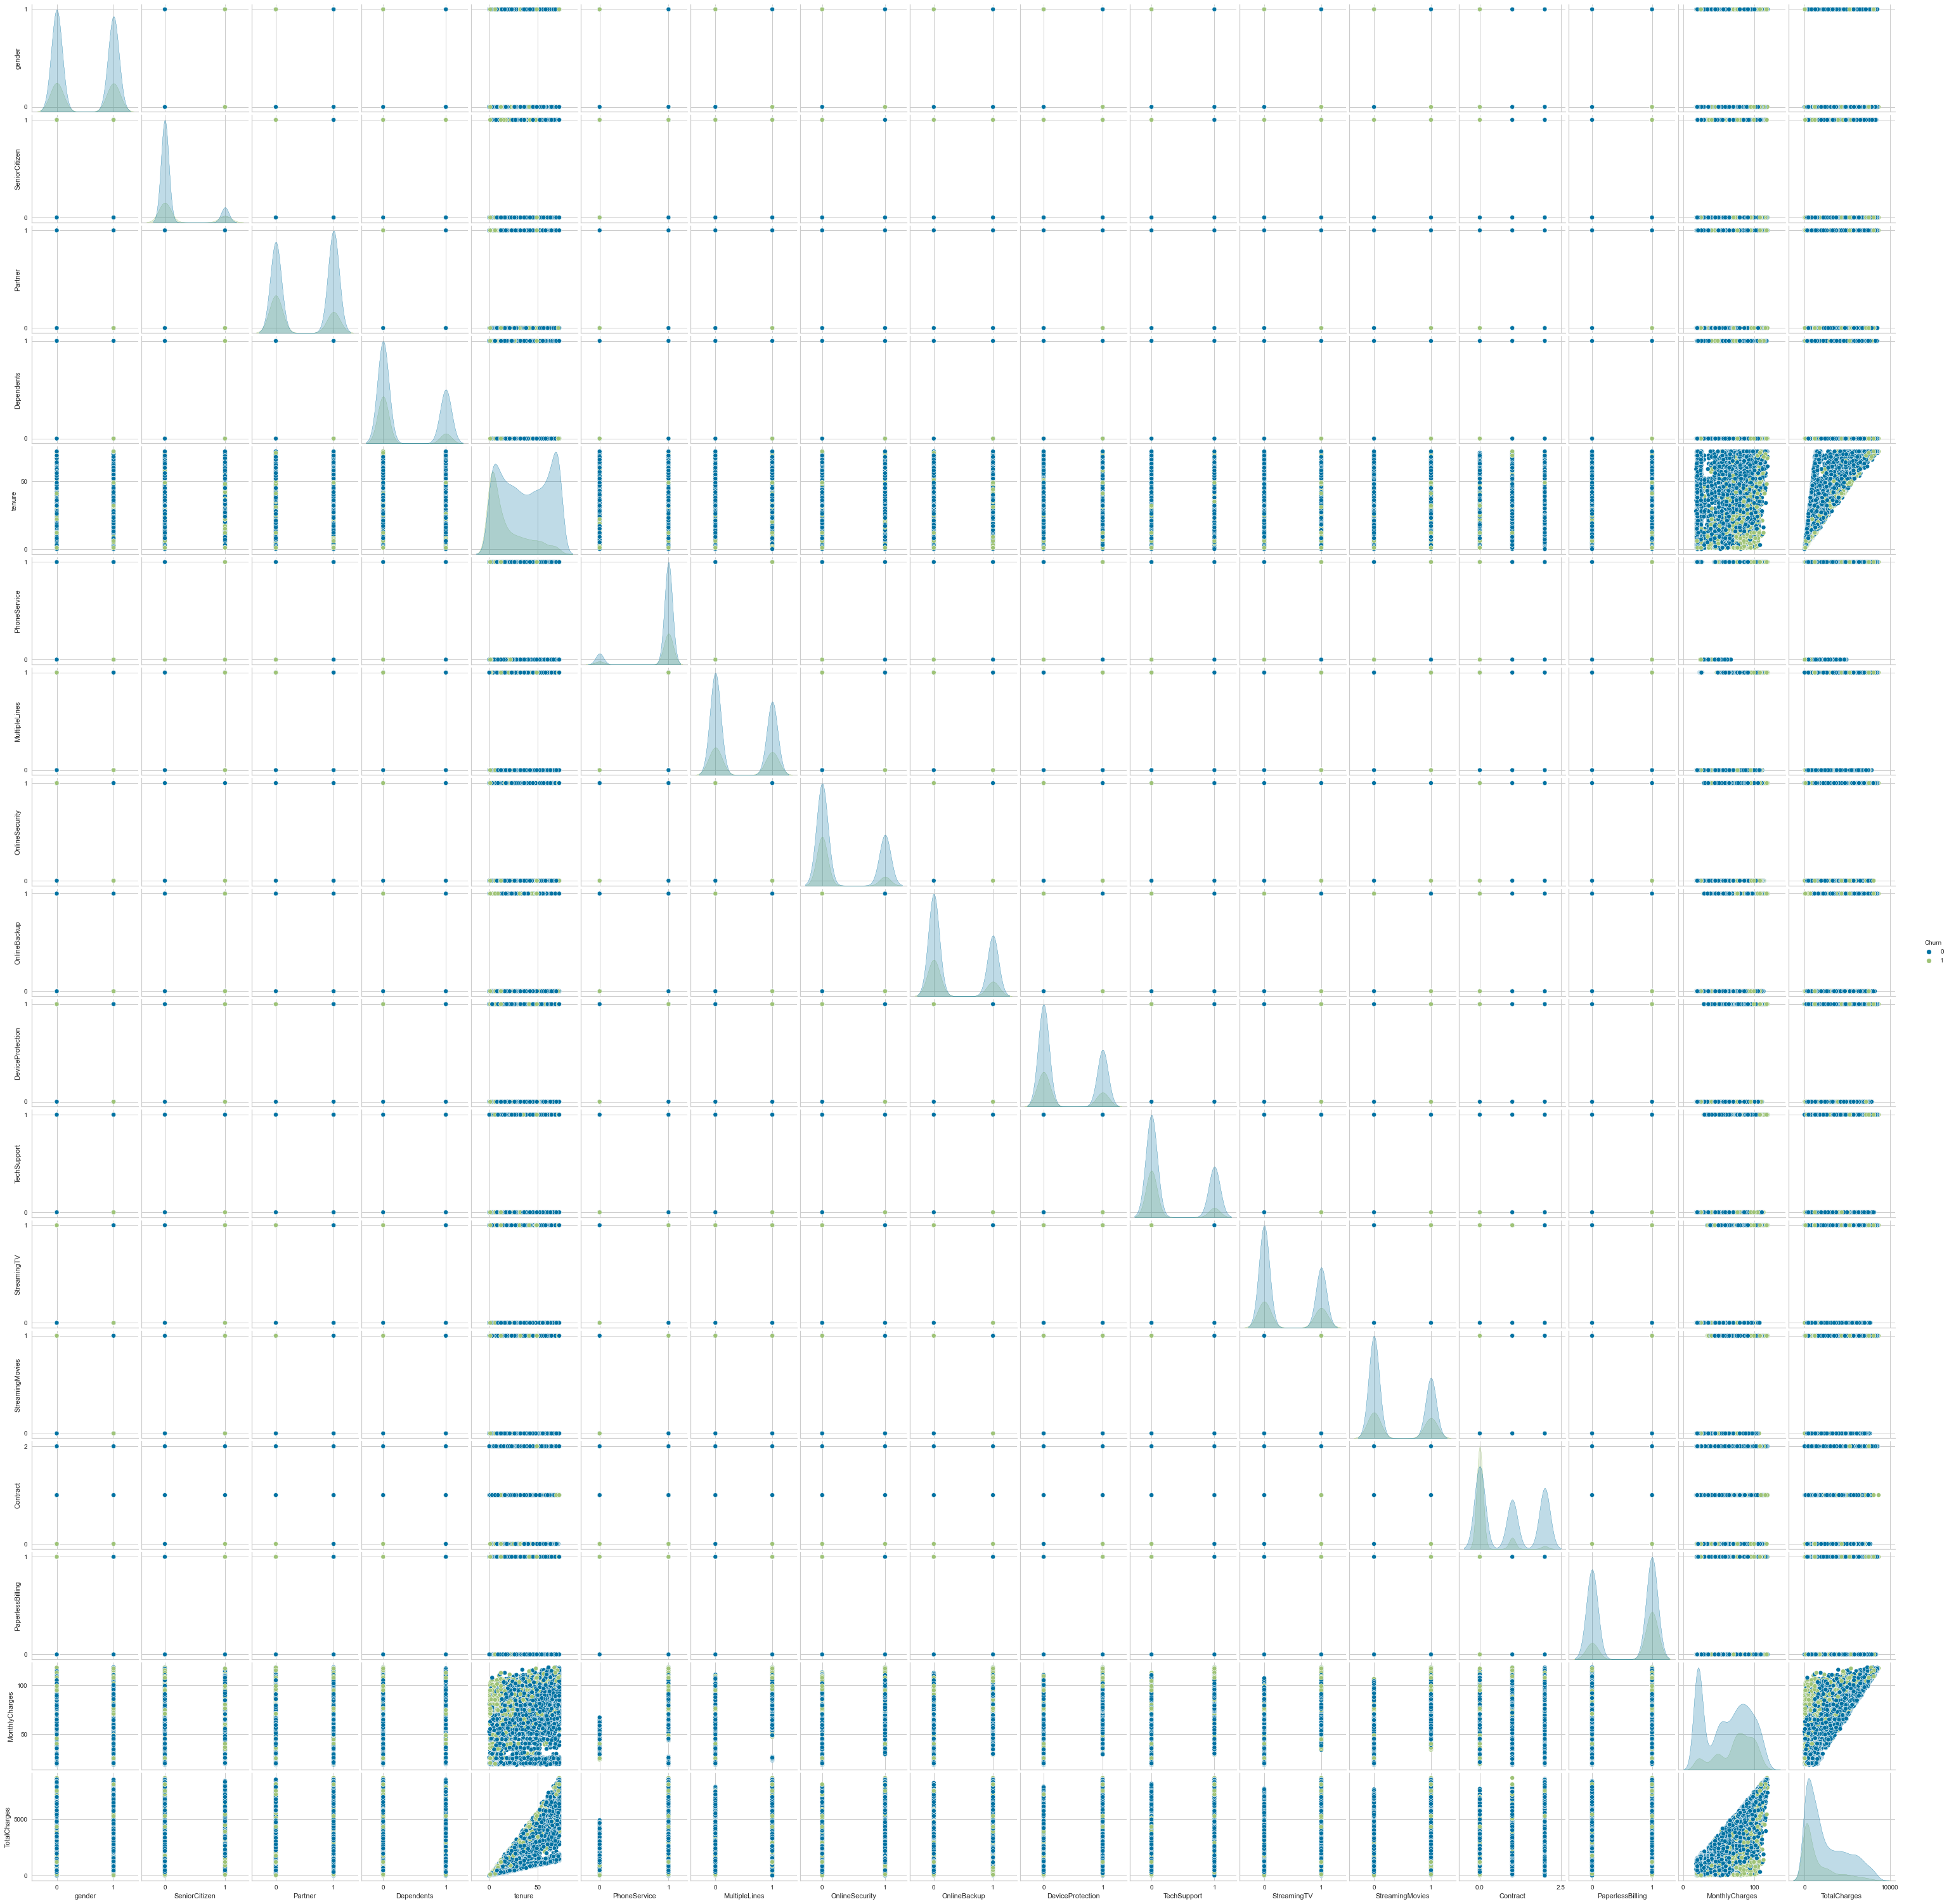

In [170]:
sns.pairplot(df_train, hue="Churn")

mpl.rc('ytick', labelsize=30) 
mpl.rc('xtick', labelsize=30)


<AxesSubplot:>

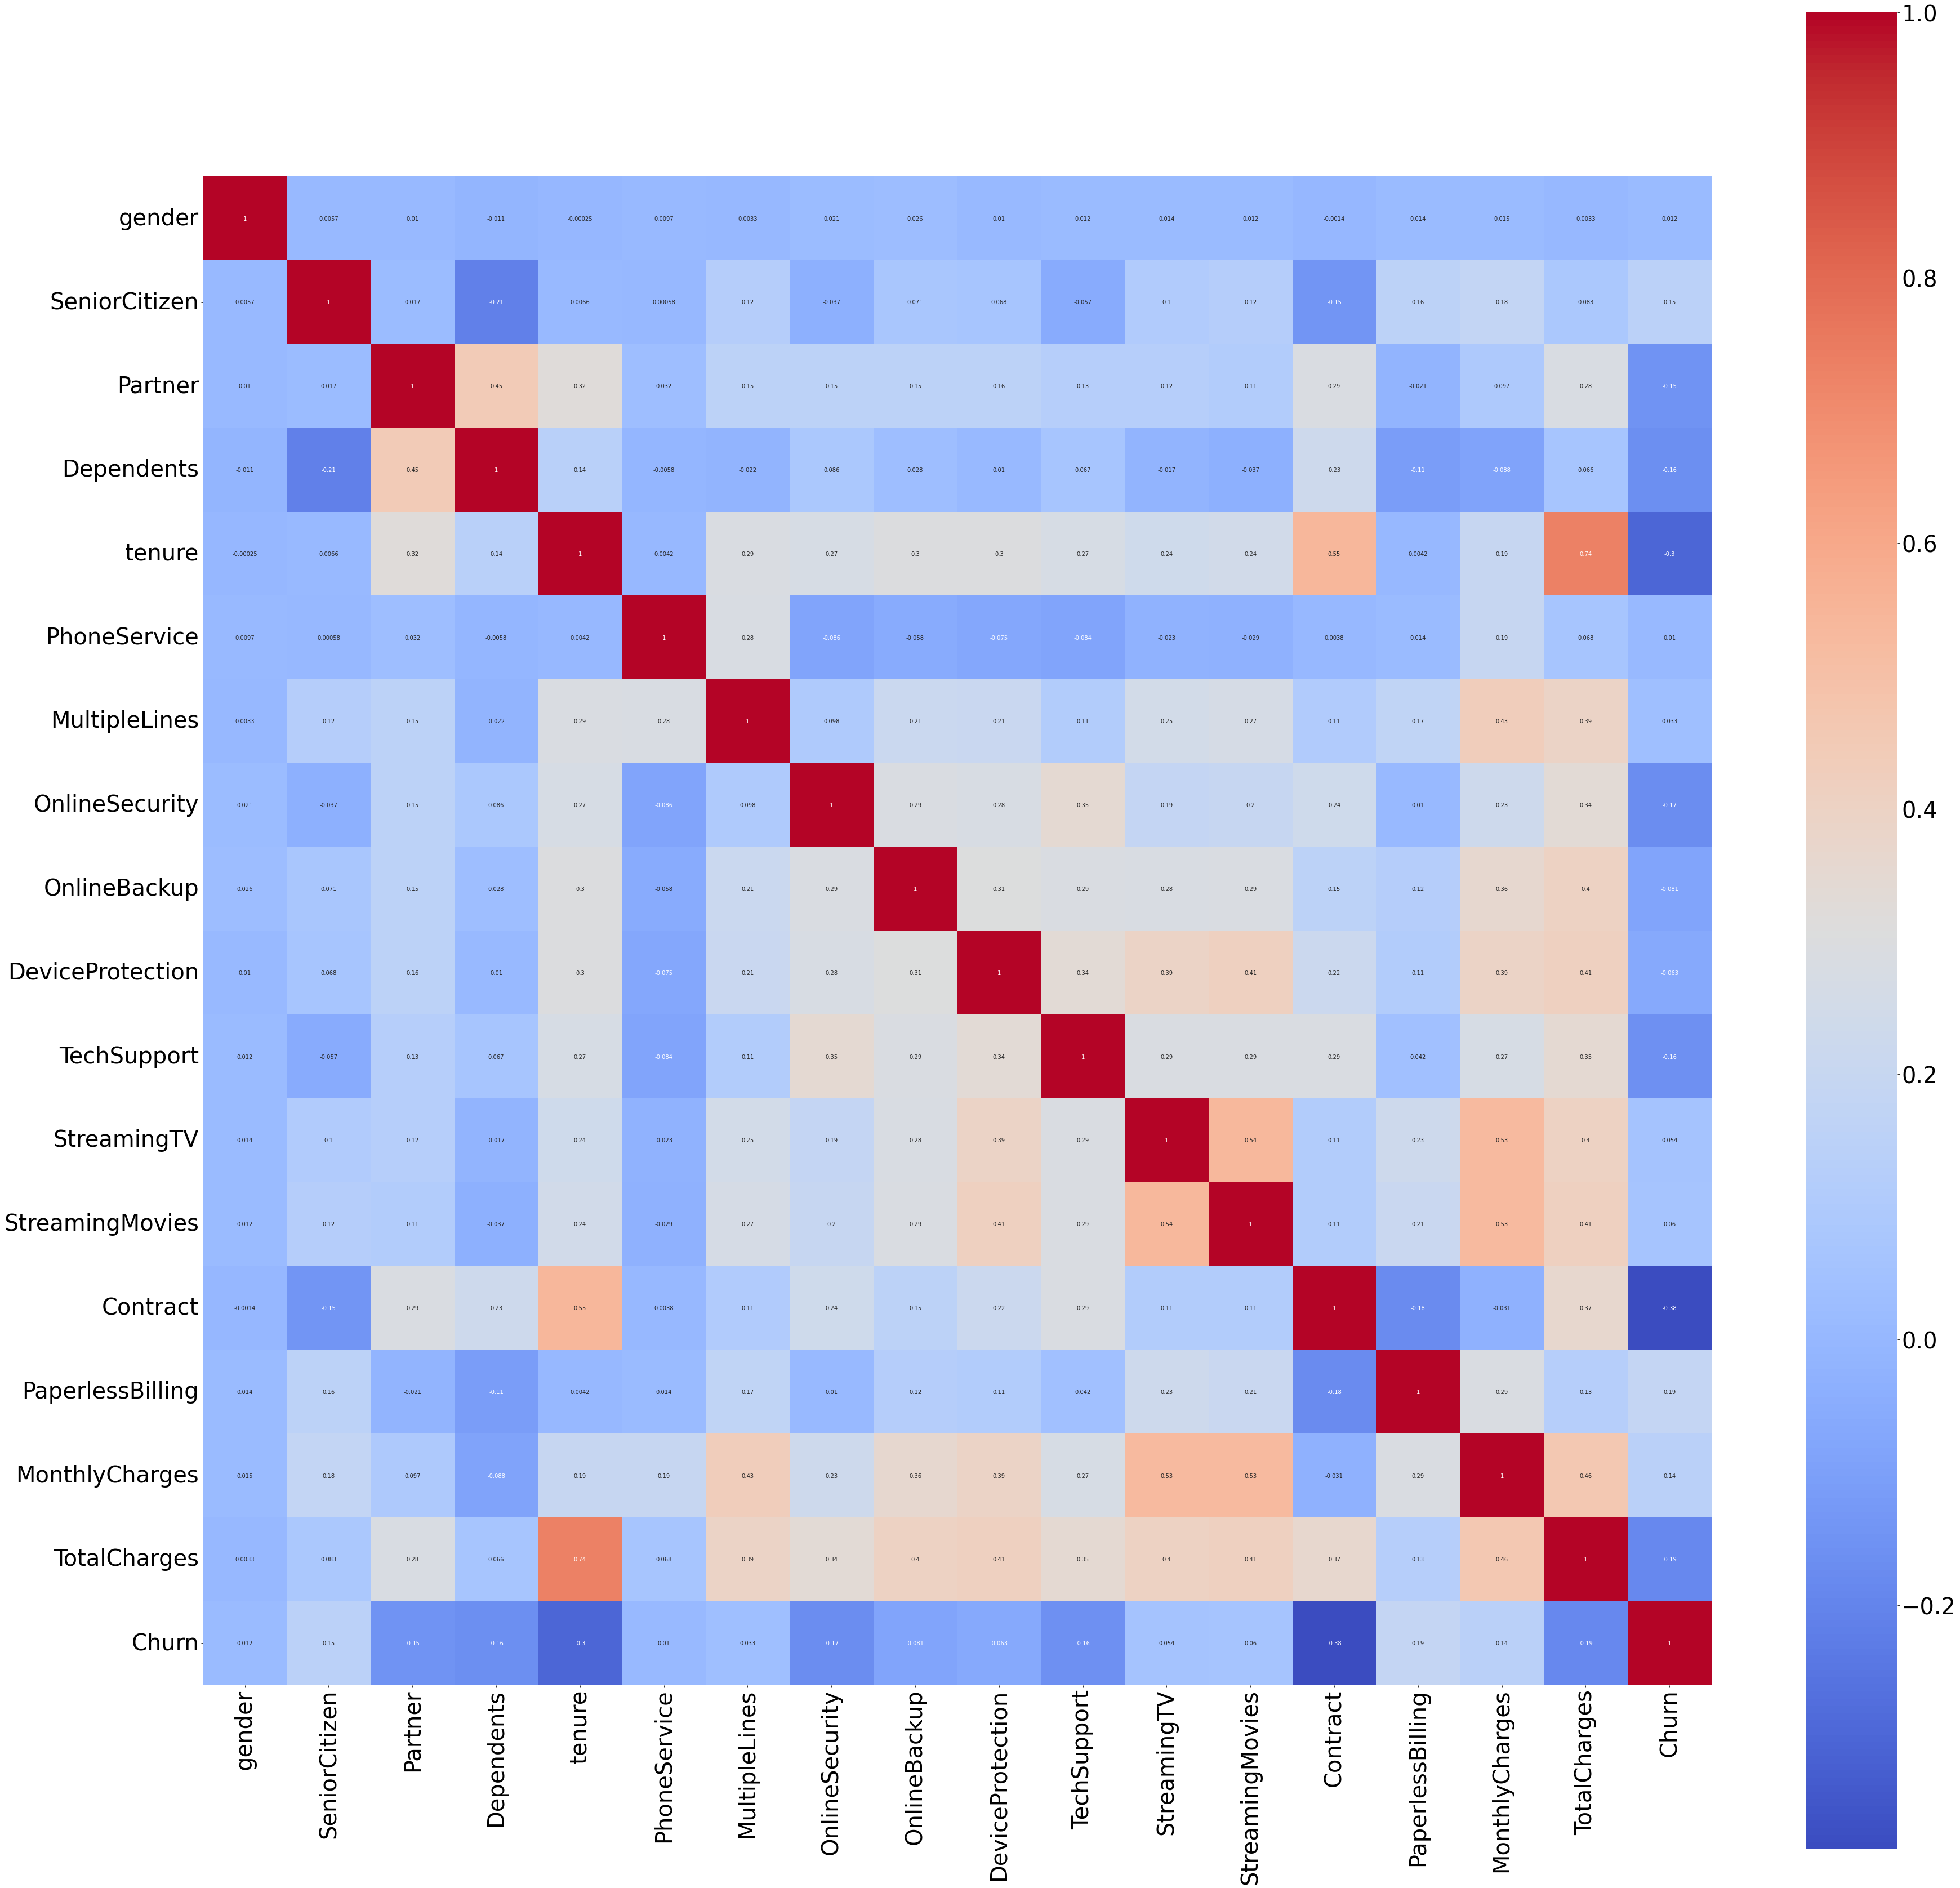

In [14]:
plt.figure(figsize=(60,60))
mpl.rc('xtick', labelsize=40) 
mpl.rc('ytick', labelsize=40) 
sns.heatmap(df_train.corr(method='kendall'), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})


In [47]:
for column in df_train:
    print(df_train[[column, 'Churn']].groupby([column]).mean())


           Churn
gender          
0       0.258017
1       0.268587
                  Churn
SeniorCitizen          
0              0.235016
1              0.411137
            Churn
Partner          
0        0.327213
1        0.194998
               Churn
Dependents          
0           0.310606
1           0.152585
           Churn
tenure          
0       0.000000
1       0.612832
2       0.512048
3       0.483660
4       0.488889
...          ...
68      0.103896
69      0.089552
70      0.109589
71      0.031008
72      0.014599

[73 rows x 1 columns]
                 Churn
PhoneService          
0             0.249509
1             0.264613
                  Churn
MultipleLines          
0              0.250579
1              0.279965
                    Churn
InternetService          
DSL              0.191104
Fiber optic      0.412884
No               0.075784
                   Churn
OnlineSecurity          
0               0.311158
1               0.143141
                 C

ValueError: Grouper for 'Churn' not 1-dimensional

In [26]:
df_train[['PaperlessBilling', 'PaymentMethod', 'Churn']].groupby(['PaymentMethod', 'PaperlessBilling']).mean()



Churn
PaymentMethod             PaperlessBilling          
Bank transfer (automatic) 0                 0.121457
                          1                 0.213433
Credit card (automatic)   0                 0.099796
                          1                 0.184496
Electronic check          0                 0.324786
                          1                 0.488515
Mailed check              0                 0.132414
                          1                 0.275362

In [72]:
df_train[['PhoneService', 'MultipleLines', 'Churn']].groupby(['PhoneService', 'MultipleLines']).mean()

Churn
PhoneService MultipleLines          
0            0              0.249509
1            0              0.250796
             1              0.279965

In [30]:
df_train[['InternetService', 'OnlineBackup', 'Churn']].groupby(['InternetService', 'OnlineBackup']).mean()

Churn
InternetService OnlineBackup          
DSL             0             0.258551
                1             0.110036
Fiber optic     0             0.502315
                1             0.298918
No              0             0.075784

In [31]:
df_train[['InternetService', 'DeviceProtection', 'Churn']].groupby(['InternetService', 'DeviceProtection']).mean()

Churn
InternetService DeviceProtection          
DSL             0                 0.252918
                1                 0.110971
Fiber optic     0                 0.488177
                1                 0.314371
No              0                 0.075784

In [32]:
df_train[['InternetService', 'TechSupport', 'Churn']].groupby(['InternetService', 'TechSupport']).mean()

Churn
InternetService TechSupport          
DSL             0            0.279241
                1            0.095183
Fiber optic     0            0.483774
                1            0.231125
No              0            0.075784

In [39]:
df_train[['InternetService', 'StreamingMovies', 'Churn']].groupby(['InternetService', 'StreamingMovies']).mean()

Churn
InternetService StreamingMovies          
DSL             0                0.223881
                1                0.144192
Fiber optic     0                0.450844
                1                0.383614
No              0                0.075784

In [40]:
df_train[['InternetService', 'StreamingTV', 'Churn']].groupby(['InternetService', 'StreamingTV']).mean()

Churn
InternetService StreamingTV          
DSL             0            0.237132
                1            0.122783
Fiber optic     0            0.444223
                1            0.388846
No              0            0.075784

In [41]:
df_train[['InternetService', 'StreamingTV','StreamingMovies', 'Churn']].groupby(['InternetService', 'StreamingTV','StreamingMovies']).mean()

Churn
InternetService StreamingTV StreamingMovies          
DSL             0           0                0.253333
                            1                0.186312
                1           0                0.125506
                            1                0.121399
Fiber optic     0           0                0.457353
                            1                0.416667
                1           0                0.437309
                            1                0.372709
No              0           0                0.075784

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

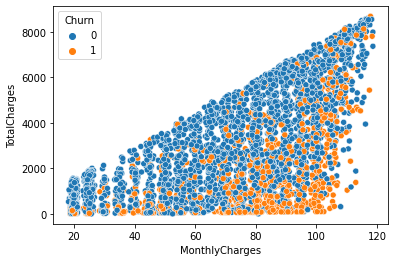

In [71]:
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue="Churn", data=df_train)

In [ ]:
Gender fuera
Total charges fuera
tenure fuera
Phoneservice fuera



Contract - normalizar a mano 42 , 11 , 2.6

monthly charges: normalizar

me quedo con multiple lines pero pesa poco 25 28
Senior directa 23.5  -- 41 
Partner inversa 32.7 - 19.4
Dependents 31 -- 15

Hacer columna pago
Hacer columna streaming con la tv que pesa más. mas streaming menos churn

Hacer columna internet services por categoria (3): mas servicios menos churn




In [ ]:
df_train['payment'] = 

In [ ]:
churn_by("Churn", "Partner")

In [26]:
def correlation_1_vs_all(df, feature, threshold):
    pd.set_option('display.max_rows', None)
    df = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    df.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    df = df.drop(df[df['Correlation Coefficient'] == 1.0].index)
    return df[(df['Feature 1'] == feature) & (df['Correlation Coefficient'] > threshold)]

def correlation_all_vs_all(df, threshold):
    pd.set_option('display.max_rows', None)
    df = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    df.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    df.drop(df.iloc[1::2].index, inplace=True)
    df = df.drop(df[df['Correlation Coefficient'] == 1.0].index)
    return df[df['Correlation Coefficient'] > threshold]

In [29]:
correlation_all_vs_all(df_train, 0.5)


Feature 1         Feature 2  Correlation Coefficient
18     TotalCharges            tenure                 0.827561
20           tenure          Contract                 0.671162
22     TotalCharges    MonthlyCharges                 0.654350
24   MonthlyCharges       StreamingTV                 0.630747
26  StreamingMovies    MonthlyCharges                 0.630638
28      StreamingTV   StreamingMovies                 0.537105
30  StreamingMovies      TotalCharges                 0.525159
32     TotalCharges  DeviceProtection                 0.522219
34     TotalCharges       StreamingTV                 0.513513
36     OnlineBackup      TotalCharges                 0.511171

In [31]:
correlation_1_vs_all(df_train, 'Churn', 0.0)
        

Feature 1         Feature 2  Correlation Coefficient
56      Churn          Contract                 0.394490
73      Churn            tenure                 0.345513
141     Churn      TotalCharges                 0.193972
145     Churn  PaperlessBilling                 0.188793
147     Churn    MonthlyCharges                 0.186615
150     Churn    OnlineSecurity                 0.172364
154     Churn        Dependents                 0.164490
161     Churn       TechSupport                 0.158814
176     Churn           Partner                 0.150053
178     Churn     SeniorCitizen                 0.146549
222     Churn      OnlineBackup                 0.081411
237     Churn  DeviceProtection                 0.062966
239     Churn   StreamingMovies                 0.060152
244     Churn       StreamingTV                 0.054414
252     Churn     MultipleLines                 0.033019
285     Churn            gender                 0.011997
299     Churn      PhoneService                 0.010122

In [16]:
def feature_selector(df, y, threshold_y, threshold_x):

    temp_features_list = correlation_1_vs_all(df, y, threshold_y)['Feature 2'].tolist() # take main variables
    chosen_features = []

    while len(temp_features_list) > 0:

        x = temp_features_list[0]
        chosen_features.append(x)
        temp_features_list.remove(x)
        temp_correlation_list = correlation_1_vs_all(df, x, threshold_x)['Feature 2'].tolist() # take main variables

        for x in temp_correlation_list:
            if x in temp_features_list:
                temp_features_list.remove(x)

    return chosen_features

feature_selector(df_all, 'diagnosis', 0.5, 0.8)

['worst concave points', 'worst radius', 'radius error']

## h2o

In [268]:
BT= 0.174399

CC= 0.147887
EC= 0.445321
MC= 0.189570

DSL= 0.191104
FO= 0.412884
No= 0.075784

df_train_2 = df_train.copy()
df_test_2 = df_test.copy()

df_train_2=df_train_2.replace('Bank transfer (automatic)', BT/EC )
df_train_2=df_train_2.replace('Credit card (automatic)', CC/EC)
df_train_2=df_train_2.replace('Electronic check', 1)
df_train_2=df_train_2.replace('Mailed check', MC/EC)
df_train_2=df_train_2.replace('Fiber optic', 1 )
df_train_2=df_train_2.replace('DSL', DSL/FO)
df_train_2=df_train_2.replace('No', No/FO)

df_test_2=df_test_2.replace('Bank transfer (automatic)', BT/EC )
df_test_2=df_test_2.replace('Credit card (automatic)', CC/EC)
df_test_2=df_test_2.replace('Electronic check', 1)
df_test_2=df_test_2.replace('Mailed check', MC/EC)
df_test_2=df_test_2.replace('Fiber optic', 1 )
df_test_2=df_test_2.replace('DSL', DSL/FO)
df_test_2=df_test_2.replace('No', No/FO)


In [269]:
df_test_2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      41             1   
2          1              0        1           1      52             1   
3          1              0        0           0       1             1   
4          0              0        0           0      67             1   
...      ...            ...      ...         ...     ...           ...   
1756       1              0        0           0       3             1   
1757       1              0        1           0       8             1   
1758       0              0        0           0      29             1   
1759       1              0        0           0       2             0   
1760       1              1        0           0      53             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0         0.462852               0             0   
1                 1         0.183548               0             0   
2                 0         0.183548               0             0   
3                 0         1.000000               0             0   
4                 0         0.462852               0             0   
...             ...              ...             ...           ...   
1756              1         1.000000               0             0   
1757              1         1.000000               0             0   
1758              1         0.462852               0             1   
1759              0         0.462852               0             0   
1760              0         1.000000               0             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    0            0            0                0         0   
2                    0            0            0                0         2   
3                    1            0            0                0         0   
4                    0            1            0                0         2   
...                ...          ...          ...              ...       ...   
1756                 0            0            0                0         0   
1757                 0            1            0                1         0   
1758                 1            0            0                1         1   
1759                 0            0            0                1         0   
1760                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1       1.000000           24.80         24.80  
1                    1       0.391625           25.25        996.45  
2                    0       0.425693           19.35       1031.70  
3                    0       1.000000           76.35         76.35  
4                    0       0.391625           50.55       3260.10  
...                ...            ...             ...           ...  
1756                 1       1.000000           75.80        246.30  
1757                 1       1.000000           90.25        743.75  
1758                 0       0.332091           70.90       1964.60  
1759                 1       1.000000           34.70         62.25  
1760                 1       0.332091           73.80       4003.85  

[1761 rows x 19 columns]

In [207]:
y = df_train_2['Churn']
X = df_train_2.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3697, 19)
Number transactions y_train dataset:  (3697,)
Number transactions X_test dataset:  (1585, 19)
Number transactions y_test dataset:  (1585,)


In [209]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 962
Before OverSampling, counts of label '0': 2735 

After OverSampling, the shape of train_X: (5470, 19)
After OverSampling, the shape of train_y: (5470,) 

After OverSampling, counts of label '1': 2735
After OverSampling, counts of label '0': 2735


In [294]:
from sklearn.metrics import f1_score as f1



from catboost import CatBoost, Pool
from catboost import CatBoostClassifier
cat_variables=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling' 
       ]      
#para density y isadiamond  rf = CatBoostRegressor(depth=8, learning_rate=0.02, l2_leaf_reg=4, iterations=3200, loss_function='RMSE', logging_level='Silent', thread_count=10)
rf = CatBoostClassifier(verbose=0, depth=7, learning_rate=0.02, l2_leaf_reg=3, iterations=2000, thread_count=10)

rf.fit(X_train_res, y_train_res,
             cat_variables
      )
y_pred = rf.predict(X_test)



f1_score= f1(y_test, y_pred, average='macro')

print('f1_score=',f1_score)



Custom logger is already specified. Specify more than one logger at same time is not thread safe.

f1_score= 0.6946946790610892


In [210]:
import h2o
from h2o.automl import H2OAutoML

In [211]:
h2o.init(nthreads=7)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  -------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 49 mins
H2O_cluster_timezone:       Europe/Paris
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.2
H2O_cluster_version_age:    24 days
H2O_cluster_name:           H2O_from_python_manue_czqijx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.219 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  7
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, Infogram, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.11 final
--------------------------  -------------------------------------------------------------------

In [215]:
y_train_res

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [225]:
df_train_2 = pd.DataFrame(X_train_res).join(pd.DataFrame(y_train_res))
df_test_2 = pd.DataFrame(X_test).join(pd.DataFrame(y_test))
df_train_2.columns = [*df_train_2.columns[:-1], 'Churn']

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0      61             1   
1          0              1        1           1       8             1   
2          0              0        1           1      12             1   
3          0              0        1           1      51             1   
4          1              0        0           0      25             1   
...      ...            ...      ...         ...     ...           ...   
5465       0              0        1           1      60             1   
5466       0              0        0           0       1             1   
5467       0              0        0           0       3             1   
5468       1              0        0           0       3             1   
5469       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1         0.183548               0             0   
1                 0         1.000000               0             0   
2                 1         0.183548               0             0   
3                 1         0.183548               0             0   
4                 0         1.000000               0             1   
...             ...              ...             ...           ...   
5465              1         0.666266               0             0   
5466              0         1.000000               0             0   
5467              0         1.000000               0             0   
5468              0         0.462852               0             1   
5469              0         0.462852               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         2   
1                    0            0            1                0         0   
2                    0            0            0                0         2   
3                    0            0            0                0         1   
4                    1            0            1                1         0   
...                ...          ...          ...              ...       ...   
5465                 1            0            1                1         2   
5466                 0            0            0                1         0   
5467                 0            0            0                0         0   
5468                 0            0            0                0         0   
5469                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    0       0.391625       25.300000   1554.900000      0  
1                    1       0.332091       80.450000    583.450000      1  
2                    1       0.391625       25.400000    313.000000      0  
3                    1       0.425693       23.950000   1216.350000      0  
4                    1       1.000000       99.500000   2369.050000      1  
...                ...            ...             ...           ...    ...  
5465                 1       0.769612       90.398102   5293.324261      1  
5466                 0       1.000000       79.743057     79.743057      1  
5467                 0       1.000000       81.683691    266.473664      1  
5468                 0       0.937823       54.917122    163.906021      1  
5469                 0       0.425693       44.339464     44.339464      1  

[5470 rows x 20 columns]

In [271]:
df_train_2.to_csv('train_h2o.csv', index=False)
df_test_2.to_csv('test_h2o.csv' , index=False)

train=h2o.import_file('train_h2o.csv')
test=h2o.import_file('test_h2o.csv')
graded =h2o.import_file('test_h2o.csv')

X=train.columns
y='Churn'
X.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [248]:
df_test_2.shape

(1585, 20)

In [227]:
# factor para clasificacion binaria

train[y]=train[y].asfactor()
test[y]=test[y].asfactor()

In [228]:
# 20 modelos

aml=H2OAutoML(max_models=20, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |█
23:06:17.832: AutoML: XGBoost is not available; skipping it.
23:06:17.846: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
23:06:17.846: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05001222367882666
RMSE: 0.22363412905642704
LogLoss: 0.18161053883203612
Null degrees of freedom: 5469
Residual degrees of freedom: 5463
Null deviance: 7583.030155325806
Residual deviance: 1986.819294822475
AIC: 2000.819294822475
AUC: 0.9884599059520268
AUCPR: 0.9889558830512167
Gini: 0.9769198119040536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4956893573441636: 


0       1   Error             Rate
0      0  2573.0   162.0  0.0592   (162.0/2735.0)
1      1   152.0  2583.0  0.0556   (152.0/2735.0)
2  Total  2725.0  2745.0  0.0574   (314.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.495689     0.942701  203.0
1                        max f2   0.317103     0.958963  256.0
2                  max f0point5   0.633160     0.954180  159.0
3                  max accuracy   0.495689     0.942596  203.0
4                 max precision   0.997938     1.000000    0.0
5                    max recall   0.110872     1.000000  332.0
6               max specificity   0.997938     1.000000    0.0
7              max absolute_mcc   0.495689     0.885198  203.0
8    max min_per_class_accuracy   0.500577     0.941865  201.0
9   max mean_per_class_accuracy   0.495689     0.942596  203.0
10                      max tns   0.997938  2735.000000    0.0
11                      max fns   0.997938  2673.000000    0.0
12                      max fps   0.001259  2735.000000  399.0
13                      max tps   0.110872  2735.000000  332.0
14                      max tnr   0.997938     1.000000    0.0
15                      max fnr   0.997938     0.977331    0.0
16                      max fpr   0.001259     1.000000  399.0
17                      max tpr   0.110872     1.000000  332.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,71 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997600  2.000000   
1       2                  0.020110         0.997121  2.000000   
2       3                  0.030165         0.996567  2.000000   
3       4                  0.040037         0.995894  2.000000   
4       5                  0.050091         0.995123  2.000000   
5       6                  0.100000         0.989631  2.000000   
6       7                  0.150091         0.975583  2.000000   
7       8                  0.200000         0.961769  2.000000   
8       9                  0.300000         0.894471  2.000000   
9      10                  0.400000         0.741621  1.934186   
10     11                  0.500000         0.498175  1.488117   
11     12                  0.600000         0.244346  0.489945   
12     13                  0.700000         0.105644  0.087751   
13     14                  0.800000         0.036938  0.000000   
14     15                  0.900000         0.005859  0.000000   
15     16                  1.000000         0.000678  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997996                  1.000000   
1          2.000000       1.000000  0.997338                  1.000000   
2          2.000000       1.000000  0.996819                  1.000000   
3          2.000000       1.000000  0.996290                  1.000000   
4          2.000000       1.000000  0.995433                  1.000000   
5          2.000000       1.000000  0.992919                  1.000000   
6          2.000000       1.000000  0.982640                  1.000000   
7          2.000000       1.000000  0.968948                  1.000000   
8          2.000000       1.000000  0.932325                  1.000000   
9          1.983547       0.967093  0.825521                  0.991773   
10         1.884461       0.744059  0.626285                  0.942230   
11         1.652041       0.244973  0.360808                  0.826021   
12         1.428571       0.043876  0.166325                  0.714286   
13         1.250000       0.000000  0.067257                  0.625000   
14         1.111111       0.000000  0.019221                  0.555556   
15         1.000000       0.000000  0.002992                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997996      0.020110                 0.020110  100.000000   
1           0.997667      0.020110                 0.040219  100.000000   
2           0.997384      0.020110                 0.060329  100.000000   
3           0.997115      0.019744                 0.080073  100.000000   
4           0.996777      0.020110                 0.100183  100.000000   
5           0.994851      0.099817                 0.200000  100.000000   
6           0.990776      0.100183                 0.300183  100.000000   
7           0.985329      0.099817                 0.400000  100.000000   
8           0.967661      0.200000                 0.600000  100.000000   
9           0.932126      0.193419                 0.793419   93.418647   
10          0.870958      0.148812                 0.942230   48.811700   
11          0.785933      0.048995                 0.991225  -51.005484   
12          0.697417      0.008775                 1.000000  -91.224863   
13          0.618647      0.000000                 1.000000 -100.000000   
14          0.552044      0.000000                 1.000000 -100.000000   
15          0.497139      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10006434214071984
RMSE: 0.3163294835147679
LogLoss: 0.31851142919307146
Null degrees of freedom: 5469
Residual degrees of freedom: 5462
Null deviance: 7584.247883742411
Residual deviance: 3484.5150353722015
AIC: 3500.5150353722015
AUC: 0.9378514015286974
AUCPR: 0.9435060353234324
Gini: 0.8757028030573948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49743252555674705: 


0       1   Error             Rate
0      0  2345.0   390.0  0.1426   (390.0/2735.0)
1      1   377.0  2358.0  0.1378   (377.0/2735.0)
2  Total  2722.0  2748.0  0.1402   (767.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.497433     0.860113  202.0
1                        max f2   0.162522     0.901840  316.0
2                  max f0point5   0.717901     0.885494  131.0
3                  max accuracy   0.559260     0.861974  185.0
4                 max precision   0.997986     1.000000    0.0
5                    max recall   0.001274     1.000000  399.0
6               max specificity   0.997986     1.000000    0.0
7              max absolute_mcc   0.559260     0.724706  185.0
8    max min_per_class_accuracy   0.501351     0.858501  201.0
9   max mean_per_class_accuracy   0.535887     0.861974  191.0
10                      max tns   0.997986  2735.000000    0.0
11                      max fns   0.997986  2696.000000    0.0
12                      max fps   0.001274  2735.000000  399.0
13                      max tps   0.001274  2735.000000  399.0
14                      max tnr   0.997986     1.000000    0.0
15                      max fnr   0.997986     0.985740    0.0
16                      max fpr   0.001274     1.000000  399.0
17                      max tpr   0.001274     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,01 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997222  2.000000   
1       2                  0.020110         0.996351  2.000000   
2       3                  0.030165         0.995346  2.000000   
3       4                  0.040037         0.994204  2.000000   
4       5                  0.050091         0.993179  2.000000   
5       6                  0.100000         0.980709  1.992674   
6       7                  0.150091         0.967117  1.992701   
7       8                  0.200000         0.945874  1.963370   
8       9                  0.300000         0.863297  1.890311   
9      10                  0.400000         0.719268  1.572212   
10     11                  0.500000         0.500996  1.159049   
11     12                  0.600000         0.289468  0.723949   
12     13                  0.700000         0.139336  0.398537   
13     14                  0.800000         0.050401  0.190128   
14     15                  0.900000         0.013631  0.076782   
15     16                  1.000000         0.000635  0.014625   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997869                  1.000000   
1          2.000000       1.000000  0.996754                  1.000000   
2          2.000000       1.000000  0.995853                  1.000000   
3          2.000000       1.000000  0.994685                  1.000000   
4          2.000000       1.000000  0.993683                  1.000000   
5          1.996344       0.996337  0.987686                  0.998172   
6          1.995128       0.996350  0.974086                  0.997564   
7          1.987203       0.981685  0.957121                  0.993601   
8          1.954906       0.945155  0.909862                  0.977453   
9          1.859232       0.786106  0.796525                  0.929616   
10         1.719196       0.579525  0.614967                  0.859598   
11         1.553321       0.361974  0.393173                  0.776661   
12         1.388352       0.199269  0.209078                  0.694176   
13         1.238574       0.095064  0.086008                  0.619287   
14         1.109486       0.038391  0.028850                  0.554743   
15         1.000000       0.007313  0.005181                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997869      0.020110                 0.020110  100.000000   
1           0.997311      0.020110                 0.040219  100.000000   
2           0.996825      0.020110                 0.060329  100.000000   
3           0.996298      0.019744                 0.080073  100.000000   
4           0.995773      0.020110                 0.100183  100.000000   
5           0.991737      0.099452                 0.199634   99.267399   
6           0.985846      0.099817                 0.299452   99.270073   
7           0.978678      0.097989                 0.397441   96.336996   
8           0.955739      0.189031                 0.586472   89.031079   
9           0.915936      0.157221                 0.743693   57.221207   
10          0.855742      0.115905                 0.859598   15.904936   
11          0.778647      0.072395                 0.931993  -27.605119   
12          0.697280      0.039854                 0.971846  -60.146252   
13          0.620871      0.019013                 0.990859  -80.987203   
14          0.555091      0.007678                 0.998537  -92.321755   
15          0.500100      0.001463                 1.000000  -98.537477   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         99.634369            0.199269  
6         99.512789            0.298720  
7         

In [229]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_6_AutoML_1_20220218_230617 0.937851 0.318511 0.943506 0.140219 0.316329 0.100064 
 StackedEnsemble_AllModels_3_AutoML_1_20220218_230617 0.937834 0.318752 0.94332 0.140037 0.316353 0.10008 
 StackedEnsemble_AllModels_4_AutoML_1_20220218_230617 0.937782 0.318599 0.943393 0.137477 0.316468 0.100152 
 StackedEnsemble_BestOfFamily_6_AutoML_1_20220218_230617 0.937116 0.321086 0.942268 0.144059 0.317518 0.100818 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220218_230617 0.936902 0.320762 0.94235 0.14351 0.317823 0.101012 
 GBM_grid_1_AutoML_1_20220218_230617_model_4 0.935665 0.323146 0.940995 0.145887 0.319697 0.102206 
 StackedEnsemble_AllModels_2_AutoML_1_20220218_230617 0.93542 0.325425 0.941427 0.145338 0.32004 0.102425 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220218_230617 0.935195 0.326551 0.940539 0.141133 0.319913 0.102344 
 GBM_grid_1_AutoML_1_20220218_230617_model_1 0.934996 0.326548 0.940489 0.141316 0.320703 0.10285 
 StackedEnsemble_AllModels_1_AutoML_1_20220218_230617 0.934903 0.326496 0.940853 0.148629 0.320714 0.102857 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20220218_230617 0.934875 0.321469 0.941462 0.145704 0.319061 0.1018 
 StackedEnsemble_AllModels_5_AutoML_1_20220218_230617 0.934858 0.32247 0.942472 0.143144 0.319117 0.101836 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220218_230617 0.93458 0.327646 0.940575 0.147715 0.321197 0.103167 
 GBM_5_AutoML_1_20220218_230617 0.933105 0.331448 0.939204 0.142779 0.322985 0.104319 
 GBM_2_AutoML_1_20220218_230617 0.9322 0.33327 0.938529 0.155759 0.324769 0.105475 
 GBM_3_AutoML_1_20220218_230617 0.931897 0.334339 0.938285 0.150091 0.325047 0.105656 
 GBM_4_AutoML_1_20220218_230617 0.9315 0.336356 0.937617 0.150823 0.326391 0.106531 
 GBM_grid_1_AutoML_1_20220218_230617_model_2 0.93065 0.338107 0.936326 0.147166 0.326247 0.106437 
 GBM_grid_1_AutoML_1_20220218_230617_model_3 0.930097 0.338703 0.936118 0.146984 0.326161 0.106381 
 GBM_grid_1_AutoML_1_20220218_230617_model_5 0.929627 0.340142 0.936558 0.151737 0.328287 0.107772 
 StackedEnsemble_BestOfFamily_1_AutoML_1_20220218_230617 0.929617 0.337547 0.936319 0.153748 0.32777 0.107433 
 GBM_1_AutoML_1_20220218_230617 0.928191 0.340192 0.934244 0.159781 0.329053 0.108276 
 DRF_1_AutoML_1_20220218_230617 0.926764 0.3792 0.929103 0.148812 0.328591 0.107972 
 GLM_1_AutoML_1_20220218_230617 0.915994 0.373077 0.924341 0.178793 0.345927 0.119666 
 XRT_1_AutoML_1_20220218_230617 0.915788 0.406213 0.915175 0.164899 0.354393 0.125595 
 DeepLearning_grid_1_AutoML_1_20220218_230617_model_1 0.88451 0.476025 0.872395 0.192139 0.379624 0.144114 
 DeepLearning_grid_2_AutoML_1_20220218_230617_model_2 0.883064 0.472015 0.85689 0.199086 0.392358 0.153945 
 DeepLearning_grid_1_AutoML_1_20220218_230617_model_2 0.876821 0.4771 0.863122 0.207313 0.387177 0.149906 
 DeepLearning_grid_3_AutoML_1_20220218_230617_model_1 0.875691 0.483914 0.853742 0.206033 0.380728 0.144954 
 DeepLearning_1_AutoML_1_20220218_230617 0.872272 0.487626 0.852909 0.202559 0.398465 0.158775 
 DeepLearning_grid_2_AutoML_1_20220218_230617_model_1 0.864235 0.516101 0.826898 0.20841 0.403483 0.162799 
 DeepLearning_grid_3_AutoML_1_20220218_230617_model_2 0.861196 0.484656 0.836054 0.220658 0.394751 0.155828

In [290]:
aml.predict(graded)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict p0 p1 
 
 
 1 0.410274 0.589726 
 0 0.911664 0.0883362 
 0 0.990467 0.00953307 
 1 0.123319 0.876681 
 0 0.979271 0.020729 
 0 0.724989 0.275011 
 0 0.97306 0.0269401 
 0 0.990986 0.00901439 
 0 0.934695 0.0653046 
 1 0.451295 0.548705

In [289]:
aml.model[["GBM_grid_1_AutoML_1_20220218_230617_model_5"]].predict(graded)

AttributeError: 'H2OAutoML' object has no attribute 'model'

In [276]:
resultado=aml.leader.predict(graded).as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [277]:
resultado

predict        p0        p1
0           1  0.410274  0.589726
1           0  0.911664  0.088336
2           0  0.990467  0.009533
3           1  0.123319  0.876681
4           0  0.979271  0.020729
...       ...       ...       ...
1756        1  0.138725  0.861275
1757        1  0.462947  0.537053
1758        0  0.960855  0.039145
1759        1  0.108200  0.891800
1760        0  0.599226  0.400774

[1761 rows x 3 columns]

In [280]:
df_send.Churn=resultado.predict
df_send.to_csv('Cabanillas2.csv', index=False)
GBM_grid_1_AutoML_1_20220218_230617_model_1

ModelMetricsBinomial: gbm



In [281]:
for m in aml.leaderboard.as_data_frame()['model_id']:
    print(m)
    print(h2o.get_model(m))

StackedEnsemble_AllModels_6_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05001222367882666
RMSE: 0.22363412905642704
LogLoss: 0.18161053883203612
Null degrees of freedom: 5469
Residual degrees of freedom: 5463
Null deviance: 7583.030155325806
Residual deviance: 1986.819294822475
AIC: 2000.819294822475
AUC: 0.9884599059520268
AUCPR: 0.9889558830512167
Gini: 0.9769198119040536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4956893573441636: 


0       1   Error             Rate
0      0  2573.0   162.0  0.0592   (162.0/2735.0)
1      1   152.0  2583.0  0.0556   (152.0/2735.0)
2  Total  2725.0  2745.0  0.0574   (314.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.495689     0.942701  203.0
1                        max f2   0.317103     0.958963  256.0
2                  max f0point5   0.633160     0.954180  159.0
3                  max accuracy   0.495689     0.942596  203.0
4                 max precision   0.997938     1.000000    0.0
5                    max recall   0.110872     1.000000  332.0
6               max specificity   0.997938     1.000000    0.0
7              max absolute_mcc   0.495689     0.885198  203.0
8    max min_per_class_accuracy   0.500577     0.941865  201.0
9   max mean_per_class_accuracy   0.495689     0.942596  203.0
10                      max tns   0.997938  2735.000000    0.0
11                      max fns   0.997938  2673.000000    0.0
12                      max fps   0.001259  2735.000000  399.0
13                      max tps   0.110872  2735.000000  332.0
14                      max tnr   0.997938     1.000000    0.0
15                      max fnr   0.997938     0.977331    0.0
16                      max fpr   0.001259     1.000000  399.0
17                      max tpr   0.110872     1.000000  332.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,71 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997600  2.000000   
1       2                  0.020110         0.997121  2.000000   
2       3                  0.030165         0.996567  2.000000   
3       4                  0.040037         0.995894  2.000000   
4       5                  0.050091         0.995123  2.000000   
5       6                  0.100000         0.989631  2.000000   
6       7                  0.150091         0.975583  2.000000   
7       8                  0.200000         0.961769  2.000000   
8       9                  0.300000         0.894471  2.000000   
9      10                  0.400000         0.741621  1.934186   
10     11                  0.500000         0.498175  1.488117   
11     12                  0.600000         0.244346  0.489945   
12     13                  0.700000         0.105644  0.087751   
13     14                  0.800000         0.036938  0.000000   
14     15                  0.900000         0.005859  0.000000   
15     16                  1.000000         0.000678  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997996                  1.000000   
1          2.000000       1.000000  0.997338                  1.000000   
2          2.000000       1.000000  0.996819                  1.000000   
3          2.000000       1.000000  0.996290                  1.000000   
4          2.000000       1.000000  0.995433                  1.000000   
5          2.000000       1.000000  0.992919                  1.000000   
6          2.000000       1.000000  0.982640                  1.000000   
7          2.000000       1.000000  0.968948                  1.000000   
8          2.000000       1.000000  0.932325                  1.000000   
9          1.983547       0.967093  0.825521                  0.991773   
10         1.884461       0.744059  0.626285                  0.942230   
11         1.652041       0.244973  0.360808                  0.826021   
12         1.428571       0.043876  0.166325                  0.714286   
13         1.250000       0.000000  0.067257                  0.625000   
14         1.111111       0.000000  0.019221                  0.555556   
15         1.000000       0.000000  0.002992                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997996      0.020110                 0.020110  100.000000   
1           0.997667      0.020110                 0.040219  100.000000   
2           0.997384      0.020110                 0.060329  100.000000   
3           0.997115      0.019744                 0.080073  100.000000   
4           0.996777      0.020110                 0.100183  100.000000   
5           0.994851      0.099817                 0.200000  100.000000   
6           0.990776      0.100183                 0.300183  100.000000   
7           0.985329      0.099817                 0.400000  100.000000   
8           0.967661      0.200000                 0.600000  100.000000   
9           0.932126      0.193419                 0.793419   93.418647   
10          0.870958      0.148812                 0.942230   48.811700   
11          0.785933      0.048995                 0.991225  -51.005484   
12          0.697417      0.008775                 1.000000  -91.224863   
13          0.618647      0.000000                 1.000000 -100.000000   
14          0.552044      0.000000                 1.000000 -100.000000   
15          0.497139      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10006434214071984
RMSE: 0.3163294835147679
LogLoss: 0.31851142919307146
Null degrees of freedom: 5469
Residual degrees of freedom: 5462
Null deviance: 7584.247883742411
Residual deviance: 3484.5150353722015
AIC: 3500.5150353722015
AUC: 0.9378514015286974
AUCPR: 0.9435060353234324
Gini: 0.8757028030573948

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49743252555674705: 


0       1   Error             Rate
0      0  2345.0   390.0  0.1426   (390.0/2735.0)
1      1   377.0  2358.0  0.1378   (377.0/2735.0)
2  Total  2722.0  2748.0  0.1402   (767.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.497433     0.860113  202.0
1                        max f2   0.162522     0.901840  316.0
2                  max f0point5   0.717901     0.885494  131.0
3                  max accuracy   0.559260     0.861974  185.0
4                 max precision   0.997986     1.000000    0.0
5                    max recall   0.001274     1.000000  399.0
6               max specificity   0.997986     1.000000    0.0
7              max absolute_mcc   0.559260     0.724706  185.0
8    max min_per_class_accuracy   0.501351     0.858501  201.0
9   max mean_per_class_accuracy   0.535887     0.861974  191.0
10                      max tns   0.997986  2735.000000    0.0
11                      max fns   0.997986  2696.000000    0.0
12                      max fps   0.001274  2735.000000  399.0
13                      max tps   0.001274  2735.000000  399.0
14                      max tnr   0.997986     1.000000    0.0
15                      max fnr   0.997986     0.985740    0.0
16                      max fpr   0.001274     1.000000  399.0
17                      max tpr   0.001274     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,01 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997222  2.000000   
1       2                  0.020110         0.996351  2.000000   
2       3                  0.030165         0.995346  2.000000   
3       4                  0.040037         0.994204  2.000000   
4       5                  0.050091         0.993179  2.000000   
5       6                  0.100000         0.980709  1.992674   
6       7                  0.150091         0.967117  1.992701   
7       8                  0.200000         0.945874  1.963370   
8       9                  0.300000         0.863297  1.890311   
9      10                  0.400000         0.719268  1.572212   
10     11                  0.500000         0.500996  1.159049   
11     12                  0.600000         0.289468  0.723949   
12     13                  0.700000         0.139336  0.398537   
13     14                  0.800000         0.050401  0.190128   
14     15                  0.900000         0.013631  0.076782   
15     16                  1.000000         0.000635  0.014625   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997869                  1.000000   
1          2.000000       1.000000  0.996754                  1.000000   
2          2.000000       1.000000  0.995853                  1.000000   
3          2.000000       1.000000  0.994685                  1.000000   
4          2.000000       1.000000  0.993683                  1.000000   
5          1.996344       0.996337  0.987686                  0.998172   
6          1.995128       0.996350  0.974086                  0.997564   
7          1.987203       0.981685  0.957121                  0.993601   
8          1.954906       0.945155  0.909862                  0.977453   
9          1.859232       0.786106  0.796525                  0.929616   
10         1.719196       0.579525  0.614967                  0.859598   
11         1.553321       0.361974  0.393173                  0.776661   
12         1.388352       0.199269  0.209078                  0.694176   
13         1.238574       0.095064  0.086008                  0.619287   
14         1.109486       0.038391  0.028850                  0.554743   
15         1.000000       0.007313  0.005181                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997869      0.020110                 0.020110  100.000000   
1           0.997311      0.020110                 0.040219  100.000000   
2           0.996825      0.020110                 0.060329  100.000000   
3           0.996298      0.019744                 0.080073  100.000000   
4           0.995773      0.020110                 0.100183  100.000000   
5           0.991737      0.099452                 0.199634   99.267399   
6           0.985846      0.099817                 0.299452   99.270073   
7           0.978678      0.097989                 0.397441   96.336996   
8           0.955739      0.189031                 0.586472   89.031079   
9           0.915936      0.157221                 0.743693   57.221207   
10          0.855742      0.115905                 0.859598   15.904936   
11          0.778647      0.072395                 0.931993  -27.605119   
12          0.697280      0.039854                 0.971846  -60.146252   
13          0.620871      0.019013                 0.990859  -80.987203   
14          0.555091      0.007678                 0.998537  -92.321755   
15          0.500100      0.001463                 1.000000  -98.537477   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         99.634369            0.199269  
6         99.512789            0.298720  
7         



StackedEnsemble_AllModels_3_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05016024551825031
RMSE: 0.2239648309852471
LogLoss: 0.1809455704840158
Null degrees of freedom: 5469
Residual degrees of freedom: 5464
Null deviance: 7583.030155325806
Residual deviance: 1979.544541095133
AIC: 1991.544541095133
AUC: 0.988054303179383
AUCPR: 0.9885899951415009
Gini: 0.9761086063587661

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49369372989510696: 


0       1   Error             Rate
0      0  2572.0   163.0  0.0596   (163.0/2735.0)
1      1   155.0  2580.0  0.0567   (155.0/2735.0)
2  Total  2727.0  2743.0  0.0581   (318.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.493694     0.941950  201.0
1                        max f2   0.308709     0.957636  254.0
2                  max f0point5   0.632333     0.953594  157.0
3                  max accuracy   0.493694     0.941865  201.0
4                 max precision   0.998100     1.000000    0.0
5                    max recall   0.104544     1.000000  332.0
6               max specificity   0.998100     1.000000    0.0
7              max absolute_mcc   0.493694     0.883733  201.0
8    max min_per_class_accuracy   0.500314     0.940402  199.0
9   max mean_per_class_accuracy   0.493694     0.941865  201.0
10                      max tns   0.998100  2735.000000    0.0
11                      max fns   0.998100  2671.000000    0.0
12                      max fps   0.000904  2735.000000  399.0
13                      max tps   0.104544  2735.000000  332.0
14                      max tnr   0.998100     1.000000    0.0
15                      max fnr   0.998100     0.976600    0.0
16                      max fpr   0.000904     1.000000  399.0
17                      max tpr   0.104544     1.000000  332.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,70 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997792  2.000000   
1       2                  0.020110         0.997317  2.000000   
2       3                  0.030165         0.996790  2.000000   
3       4                  0.040037         0.996122  2.000000   
4       5                  0.050091         0.995362  2.000000   
5       6                  0.100000         0.990213  2.000000   
6       7                  0.150091         0.977484  2.000000   
7       8                  0.200000         0.964200  2.000000   
8       9                  0.300000         0.898318  1.996344   
9      10                  0.400000         0.743454  1.934186   
10     11                  0.500000         0.495601  1.477148   
11     12                  0.600000         0.240518  0.493601   
12     13                  0.700000         0.101899  0.098720   
13     14                  0.800000         0.034625  0.000000   
14     15                  0.900000         0.005583  0.000000   
15     16                  1.000000         0.000587  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998167                  1.000000   
1          2.000000       1.000000  0.997538                  1.000000   
2          2.000000       1.000000  0.997031                  1.000000   
3          2.000000       1.000000  0.996506                  1.000000   
4          2.000000       1.000000  0.995686                  1.000000   
5          2.000000       1.000000  0.993273                  1.000000   
6          2.000000       1.000000  0.983940                  1.000000   
7          2.000000       1.000000  0.970942                  1.000000   
8          1.998781       0.998172  0.935335                  0.999391   
9          1.982633       0.967093  0.828773                  0.991316   
10         1.881536       0.738574  0.626834                  0.940768   
11         1.650213       0.246801  0.358874                  0.825107   
12         1.428571       0.049360  0.162902                  0.714286   
13         1.250000       0.000000  0.064348                  0.625000   
14         1.111111       0.000000  0.017907                  0.555556   
15         1.000000       0.000000  0.002779                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998167      0.020110                 0.020110  100.000000   
1           0.997853      0.020110                 0.040219  100.000000   
2           0.997579      0.020110                 0.060329  100.000000   
3           0.997314      0.019744                 0.080073  100.000000   
4           0.996987      0.020110                 0.100183  100.000000   
5           0.995134      0.099817                 0.200000  100.000000   
6           0.991398      0.100183                 0.300183  100.000000   
7           0.986293      0.099817                 0.400000  100.000000   
8           0.969307      0.199634                 0.599634   99.634369   
9           0.934174      0.193419                 0.793053   93.418647   
10          0.872706      0.147715                 0.940768   47.714808   
11          0.787067      0.049360                 0.990128  -50.639854   
12          0.697901      0.009872                 1.000000  -90.127971   
13          0.618707      0.000000                 1.000000 -100.000000   
14          0.551951      0.000000                 1.000000 -100.000000   
15          0.497034      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10007950674006916
RMSE: 0.31635345223352496
LogLoss: 0.3187524542608889
Null degrees of freedom: 5469
Residual degrees of freedom: 5462
Null deviance: 7585.791521763086
Residual deviance: 3487.1518496141243
AIC: 3503.1518496141243
AUC: 0.9378337550006851
AUCPR: 0.9433201154442376
Gini: 0.8756675100013702

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4923632809617896: 


0       1   Error             Rate
0      0  2342.0   393.0  0.1437   (393.0/2735.0)
1      1   373.0  2362.0  0.1364   (373.0/2735.0)
2  Total  2715.0  2755.0    0.14   (766.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.492363     0.860474  205.0
1                        max f2   0.158861     0.901181  318.0
2                  max f0point5   0.734467     0.884979  126.0
3                  max accuracy   0.540354     0.861792  191.0
4                 max precision   0.998529     1.000000    0.0
5                    max recall   0.000919     1.000000  399.0
6               max specificity   0.998529     1.000000    0.0
7              max absolute_mcc   0.540354     0.723925  191.0
8    max min_per_class_accuracy   0.498665     0.858867  203.0
9   max mean_per_class_accuracy   0.538027     0.861792  192.0
10                      max tns   0.998529  2735.000000    0.0
11                      max fns   0.998529  2703.000000    0.0
12                      max fps   0.000919  2735.000000  399.0
13                      max tps   0.000919  2735.000000  399.0
14                      max tnr   0.998529     1.000000    0.0
15                      max fnr   0.998529     0.988300    0.0
16                      max fpr   0.000919     1.000000  399.0
17                      max tpr   0.000919     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997698  2.000000   
1       2                  0.020110         0.996910  2.000000   
2       3                  0.030165         0.995882  2.000000   
3       4                  0.040037         0.994810  2.000000   
4       5                  0.050091         0.993504  1.963636   
5       6                  0.100000         0.982409  1.992674   
6       7                  0.150091         0.969556  1.985401   
7       8                  0.200000         0.949610  1.970696   
8       9                  0.300000         0.869234  1.890311   
9      10                  0.400000         0.720424  1.561243   
10     11                  0.500000         0.498524  1.173675   
11     12                  0.600000         0.287664  0.709324   
12     13                  0.700000         0.132146  0.405850   
13     14                  0.800000         0.046534  0.193784   
14     15                  0.900000         0.012215  0.076782   
15     16                  1.000000         0.000430  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998282                  1.000000   
1          2.000000       1.000000  0.997316                  1.000000   
2          2.000000       1.000000  0.996465                  1.000000   
3          2.000000       1.000000  0.995365                  1.000000   
4          1.992701       0.981818  0.994137                  0.996350   
5          1.992687       0.996337  0.988564                  0.996344   
6          1.990256       0.992701  0.976183                  0.995128   
7          1.985375       0.985348  0.960291                  0.992687   
8          1.953687       0.945155  0.914756                  0.976843   
9          1.855576       0.780622  0.801520                  0.927788   
10         1.719196       0.586837  0.616376                  0.859598   
11         1.550884       0.354662  0.390576                  0.775442   
12         1.387307       0.202925  0.203308                  0.693654   
13         1.238117       0.096892  0.081323                  0.619059   
14         1.109080       0.038391  0.026139                  0.554540   
15         1.000000       0.009141  0.004606                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998282      0.020110                 0.020110  100.000000   
1           0.997799      0.020110                 0.040219  100.000000   
2           0.997354      0.020110                 0.060329  100.000000   
3           0.996864      0.019744                 0.080073  100.000000   
4           0.996316      0.019744                 0.099817   96.363636   
5           0.992447      0.099452                 0.199269   99.267399   
6           0.987019      0.099452                 0.298720   98.540146   
7           0.980349      0.098355                 0.397075   97.069597   
8           0.958485      0.189031                 0.586106   89.031079   
9           0.919244      0.156124                 0.742230   56.124314   
10          0.858670      0.117367                 0.859598   17.367459   
11          0.780655      0.070932                 0.930530  -29.067642   
12          0.698177      0.040585                 0.971115  -59.414991   
13          0.621070      0.019378                 0.990494  -80.621572   
14          0.554966      0.007678                 0.998172  -92.321755   
15          0.499930      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4         99.270073            0.099452  
5         99.268739            0.198537  
6         99.025579            0.297258  
7         



StackedEnsemble_AllModels_4_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05016024551825031
RMSE: 0.2239648309852471
LogLoss: 0.1809455704840158
Null degrees of freedom: 5469
Residual degrees of freedom: 5464
Null deviance: 7583.030155325806
Residual deviance: 1979.544541095133
AIC: 1991.544541095133
AUC: 0.988054303179383
AUCPR: 0.9885899951415009
Gini: 0.9761086063587661

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49369372989510696: 


0       1   Error             Rate
0      0  2572.0   163.0  0.0596   (163.0/2735.0)
1      1   155.0  2580.0  0.0567   (155.0/2735.0)
2  Total  2727.0  2743.0  0.0581   (318.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.493694     0.941950  201.0
1                        max f2   0.308709     0.957636  254.0
2                  max f0point5   0.632333     0.953594  157.0
3                  max accuracy   0.493694     0.941865  201.0
4                 max precision   0.998100     1.000000    0.0
5                    max recall   0.104544     1.000000  332.0
6               max specificity   0.998100     1.000000    0.0
7              max absolute_mcc   0.493694     0.883733  201.0
8    max min_per_class_accuracy   0.500314     0.940402  199.0
9   max mean_per_class_accuracy   0.493694     0.941865  201.0
10                      max tns   0.998100  2735.000000    0.0
11                      max fns   0.998100  2671.000000    0.0
12                      max fps   0.000904  2735.000000  399.0
13                      max tps   0.104544  2735.000000  332.0
14                      max tnr   0.998100     1.000000    0.0
15                      max fnr   0.998100     0.976600    0.0
16                      max fpr   0.000904     1.000000  399.0
17                      max tpr   0.104544     1.000000  332.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,70 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997792  2.000000   
1       2                  0.020110         0.997317  2.000000   
2       3                  0.030165         0.996790  2.000000   
3       4                  0.040037         0.996122  2.000000   
4       5                  0.050091         0.995362  2.000000   
5       6                  0.100000         0.990213  2.000000   
6       7                  0.150091         0.977484  2.000000   
7       8                  0.200000         0.964200  2.000000   
8       9                  0.300000         0.898318  1.996344   
9      10                  0.400000         0.743454  1.934186   
10     11                  0.500000         0.495601  1.477148   
11     12                  0.600000         0.240518  0.493601   
12     13                  0.700000         0.101899  0.098720   
13     14                  0.800000         0.034625  0.000000   
14     15                  0.900000         0.005583  0.000000   
15     16                  1.000000         0.000587  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998167                  1.000000   
1          2.000000       1.000000  0.997538                  1.000000   
2          2.000000       1.000000  0.997031                  1.000000   
3          2.000000       1.000000  0.996506                  1.000000   
4          2.000000       1.000000  0.995686                  1.000000   
5          2.000000       1.000000  0.993273                  1.000000   
6          2.000000       1.000000  0.983940                  1.000000   
7          2.000000       1.000000  0.970942                  1.000000   
8          1.998781       0.998172  0.935335                  0.999391   
9          1.982633       0.967093  0.828773                  0.991316   
10         1.881536       0.738574  0.626834                  0.940768   
11         1.650213       0.246801  0.358874                  0.825107   
12         1.428571       0.049360  0.162902                  0.714286   
13         1.250000       0.000000  0.064348                  0.625000   
14         1.111111       0.000000  0.017907                  0.555556   
15         1.000000       0.000000  0.002779                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998167      0.020110                 0.020110  100.000000   
1           0.997853      0.020110                 0.040219  100.000000   
2           0.997579      0.020110                 0.060329  100.000000   
3           0.997314      0.019744                 0.080073  100.000000   
4           0.996987      0.020110                 0.100183  100.000000   
5           0.995134      0.099817                 0.200000  100.000000   
6           0.991398      0.100183                 0.300183  100.000000   
7           0.986293      0.099817                 0.400000  100.000000   
8           0.969307      0.199634                 0.599634   99.634369   
9           0.934174      0.193419                 0.793053   93.418647   
10          0.872706      0.147715                 0.940768   47.714808   
11          0.787067      0.049360                 0.990128  -50.639854   
12          0.697901      0.009872                 1.000000  -90.127971   
13          0.618707      0.000000                 1.000000 -100.000000   
14          0.551951      0.000000                 1.000000 -100.000000   
15          0.497034      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10015168704019639
RMSE: 0.31646751340413504
LogLoss: 0.31859885100238533
Null degrees of freedom: 5469
Residual degrees of freedom: 5464
Null deviance: 7586.053970692912
Residual deviance: 3485.4714299660955
AIC: 3497.4714299660955
AUC: 0.937782486489377
AUCPR: 0.9433931587876523
Gini: 0.875564972978754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5278502321745271: 


0       1   Error             Rate
0      0  2388.0   347.0  0.1269   (347.0/2735.0)
1      1   405.0  2330.0  0.1481   (405.0/2735.0)
2  Total  2793.0  2677.0  0.1375   (752.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.527850     0.861050  189.0
1                        max f2   0.216160     0.901219  292.0
2                  max f0point5   0.737323     0.885089  118.0
3                  max accuracy   0.527850     0.862523  189.0
4                 max precision   0.998049     1.000000    0.0
5                    max recall   0.001130     1.000000  399.0
6               max specificity   0.998049     1.000000    0.0
7              max absolute_mcc   0.527850     0.725209  189.0
8    max min_per_class_accuracy   0.504985     0.859232  197.0
9   max mean_per_class_accuracy   0.527850     0.862523  189.0
10                      max tns   0.998049  2735.000000    0.0
11                      max fns   0.998049  2678.000000    0.0
12                      max fps   0.001130  2735.000000  399.0
13                      max tps   0.001130  2735.000000  399.0
14                      max tnr   0.998049     1.000000    0.0
15                      max fnr   0.998049     0.979159    0.0
16                      max fpr   0.001130     1.000000  399.0
17                      max tpr   0.001130     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,00 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997534  2.000000   
1       2                  0.020110         0.996756  2.000000   
2       3                  0.030165         0.995685  2.000000   
3       4                  0.040037         0.994628  2.000000   
4       5                  0.050091         0.993701  2.000000   
5       6                  0.100000         0.982369  1.992674   
6       7                  0.150091         0.969467  1.985401   
7       8                  0.200000         0.949143  1.970696   
8       9                  0.300000         0.868160  1.875686   
9      10                  0.400000         0.721661  1.579525   
10     11                  0.500000         0.502219  1.166362   
11     12                  0.600000         0.289223  0.702011   
12     13                  0.700000         0.132313  0.424132   
13     14                  0.800000         0.047050  0.186472   
14     15                  0.900000         0.011885  0.073126   
15     16                  1.000000         0.000587  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998091                  1.000000   
1          2.000000       1.000000  0.997083                  1.000000   
2          2.000000       1.000000  0.996200                  1.000000   
3          2.000000       1.000000  0.995166                  1.000000   
4          2.000000       1.000000  0.994194                  1.000000   
5          1.996344       0.996337  0.988663                  0.998172   
6          1.992692       0.992701  0.976337                  0.996346   
7          1.987203       0.985348  0.960265                  0.993601   
8          1.950030       0.937843  0.914057                  0.975015   
9          1.857404       0.789762  0.801073                  0.928702   
10         1.719196       0.583181  0.617054                  0.859598   
11         1.549665       0.351005  0.391410                  0.774832   
12         1.388874       0.212066  0.203077                  0.694437   
13         1.238574       0.093236  0.081530                  0.619287   
14         1.109080       0.036563  0.026375                  0.554540   
15         1.000000       0.009141  0.004623                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998091      0.020110                 0.020110  100.000000   
1           0.997587      0.020110                 0.040219  100.000000   
2           0.997125      0.020110                 0.060329  100.000000   
3           0.996642      0.019744                 0.080073  100.000000   
4           0.996150      0.020110                 0.100183  100.000000   
5           0.992413      0.099452                 0.199634   99.267399   
6           0.987048      0.099452                 0.299086   98.540146   
7           0.980364      0.098355                 0.397441   97.069597   
8           0.958262      0.187569                 0.585009   87.568556   
9           0.918965      0.157952                 0.742962   57.952468   
10          0.858583      0.116636                 0.859598   16.636197   
11          0.780720      0.070201                 0.929799  -29.798903   
12          0.698200      0.042413                 0.972212  -57.586837   
13          0.621116      0.018647                 0.990859  -81.352834   
14          0.555034      0.007313                 0.998172  -92.687386   
15          0.499993      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         99.634369            0.199269  
6         99.269184            0.297989  
7         



StackedEnsemble_BestOfFamily_6_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_6_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05656684420590738
RMSE: 0.23783785276088282
LogLoss: 0.1979370625725332
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7583.030155325806
Residual deviance: 2165.431464543514
AIC: 2173.431464543514
AUC: 0.9839880484878463
AUCPR: 0.9850272131761403
Gini: 0.9679760969756925

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4461006244189196: 


0       1   Error             Rate
0      0  2497.0   238.0   0.087   (238.0/2735.0)
1      1   149.0  2586.0  0.0545   (149.0/2735.0)
2  Total  2646.0  2824.0  0.0707   (387.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.446101     0.930383  214.0
1                        max f2   0.350867     0.950629  244.0
2                  max f0point5   0.601506     0.947439  168.0
3                  max accuracy   0.544765     0.929982  185.0
4                 max precision   0.998991     1.000000    0.0
5                    max recall   0.081873     1.000000  349.0
6               max specificity   0.998991     1.000000    0.0
7              max absolute_mcc   0.544765     0.860698  185.0
8    max min_per_class_accuracy   0.489910     0.928702  201.0
9   max mean_per_class_accuracy   0.541333     0.929982  186.0
10                      max tns   0.998991  2735.000000    0.0
11                      max fns   0.998991  2667.000000    0.0
12                      max fps   0.000759  2735.000000  399.0
13                      max tps   0.081873  2735.000000  349.0
14                      max tnr   0.998991     1.000000    0.0
15                      max fnr   0.998991     0.975137    0.0
16                      max fpr   0.000759     1.000000  399.0
17                      max tpr   0.081873     1.000000  349.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,69 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998847  2.000000   
1       2                  0.020110         0.998459  2.000000   
2       3                  0.030165         0.998152  2.000000   
3       4                  0.040037         0.997703  2.000000   
4       5                  0.050091         0.997360  2.000000   
5       6                  0.100000         0.992538  2.000000   
6       7                  0.150091         0.977146  2.000000   
7       8                  0.200000         0.960655  2.000000   
8       9                  0.300000         0.885639  1.992687   
9      10                  0.400000         0.722693  1.908592   
10     11                  0.500000         0.488577  1.389397   
11     12                  0.600000         0.259395  0.563071   
12     13                  0.700000         0.117273  0.127971   
13     14                  0.800000         0.039645  0.018282   
14     15                  0.900000         0.003845  0.000000   
15     16                  1.000000         0.000289  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999038                  1.000000   
1          2.000000       1.000000  0.998647                  1.000000   
2          2.000000       1.000000  0.998312                  1.000000   
3          2.000000       1.000000  0.997935                  1.000000   
4          2.000000       1.000000  0.997525                  1.000000   
5          2.000000       1.000000  0.995742                  1.000000   
6          2.000000       1.000000  0.984878                  1.000000   
7          2.000000       1.000000  0.968713                  1.000000   
8          1.997562       0.996344  0.929923                  0.998781   
9          1.975320       0.954296  0.811221                  0.987660   
10         1.858135       0.694698  0.608237                  0.929068   
11         1.642291       0.281536  0.369646                  0.821146   
12         1.425960       0.063985  0.181720                  0.712980   
13         1.250000       0.009141  0.074187                  0.625000   
14         1.111111       0.000000  0.018414                  0.555556   
15         1.000000       0.000000  0.001766                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999038      0.020110                 0.020110  100.000000   
1           0.998842      0.020110                 0.040219  100.000000   
2           0.998665      0.020110                 0.060329  100.000000   
3           0.998485      0.019744                 0.080073  100.000000   
4           0.998293      0.020110                 0.100183  100.000000   
5           0.997020      0.099817                 0.200000  100.000000   
6           0.992967      0.100183                 0.300183  100.000000   
7           0.986915      0.099817                 0.400000  100.000000   
8           0.967918      0.199269                 0.599269   99.268739   
9           0.928743      0.190859                 0.790128   90.859232   
10          0.864642      0.138940                 0.929068   38.939671   
11          0.782143      0.056307                 0.985375  -43.692870   
12          0.696368      0.012797                 0.998172  -87.202925   
13          0.618595      0.001828                 1.000000  -98.171846   
14          0.551909      0.000000                 1.000000 -100.000000   
15          0.496894      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10081793774768279
RMSE: 0.31751840536838616
LogLoss: 0.3210855537406992
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7586.766916901075
Residual deviance: 3512.675957923249
AIC: 3520.675957923249
AUC: 0.9371157953136436
AUCPR: 0.9422677308960077
Gini: 0.8742315906272873

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44258869709098103: 


0       1   Error             Rate
0      0  2267.0   468.0  0.1711   (468.0/2735.0)
1      1   320.0  2415.0   0.117   (320.0/2735.0)
2  Total  2587.0  2883.0  0.1441   (788.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.442589     0.859737  219.0
1                        max f2   0.227516     0.900892  292.0
2                  max f0point5   0.703457     0.884117  135.0
3                  max accuracy   0.518377     0.859598  194.0
4                 max precision   0.999132     1.000000    0.0
5                    max recall   0.000619     1.000000  399.0
6               max specificity   0.999132     1.000000    0.0
7              max absolute_mcc   0.518377     0.719306  194.0
8    max min_per_class_accuracy   0.500409     0.856307  200.0
9   max mean_per_class_accuracy   0.518377     0.859598  194.0
10                      max tns   0.999132  2735.000000    0.0
11                      max fns   0.999132  2692.000000    0.0
12                      max fps   0.000619  2735.000000  399.0
13                      max tps   0.000619  2735.000000  399.0
14                      max tnr   0.999132     1.000000    0.0
15                      max fnr   0.999132     0.984278    0.0
16                      max fpr   0.000619     1.000000  399.0
17                      max tpr   0.000619     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,00 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998705  2.000000   
1       2                  0.020110         0.998222  2.000000   
2       3                  0.030165         0.997624  2.000000   
3       4                  0.040037         0.996744  1.962963   
4       5                  0.050091         0.995751  2.000000   
5       6                  0.100000         0.981954  1.992674   
6       7                  0.150091         0.964326  1.992701   
7       8                  0.200000         0.942415  1.963370   
8       9                  0.300000         0.856050  1.882998   
9      10                  0.400000         0.703580  1.568556   
10     11                  0.500000         0.499442  1.140768   
11     12                  0.600000         0.303627  0.738574   
12     13                  0.700000         0.147192  0.416819   
13     14                  0.800000         0.054289  0.182815   
14     15                  0.900000         0.012723  0.080439   
15     16                  1.000000         0.000166  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999063                  1.000000   
1          2.000000       1.000000  0.998436                  1.000000   
2          2.000000       1.000000  0.997896                  1.000000   
3          1.990868       0.981481  0.997192                  0.995434   
4          1.992701       1.000000  0.996252                  0.996350   
5          1.992687       0.996337  0.990105                  0.996344   
6          1.992692       0.996350  0.973254                  0.996346   
7          1.985375       0.981685  0.954131                  0.992687   
8          1.951249       0.941499  0.904667                  0.975625   
9          1.855576       0.784278  0.783579                  0.927788   
10         1.712614       0.570384  0.602987                  0.856307   
11         1.550274       0.369287  0.401728                  0.775137   
12         1.388352       0.208410  0.220286                  0.694176   
13         1.237660       0.091408  0.094841                  0.618830   
14         1.109080       0.040219  0.030743                  0.554540   
15         1.000000       0.009141  0.003954                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999063      0.020110                 0.020110  100.000000   
1           0.998749      0.020110                 0.040219  100.000000   
2           0.998465      0.020110                 0.060329  100.000000   
3           0.998151      0.019378                 0.079707   96.296296   
4           0.997770      0.020110                 0.099817  100.000000   
5           0.993944      0.099452                 0.199269   99.267399   
6           0.987039      0.099817                 0.299086   99.270073   
7           0.978827      0.097989                 0.397075   96.336996   
8           0.954107      0.188300                 0.585375   88.299817   
9           0.911475      0.156856                 0.742230   56.855576   
10          0.849778      0.114077                 0.856307   14.076782   
11          0.775103      0.073857                 0.930165  -26.142596   
12          0.695843      0.041682                 0.971846  -58.318099   
13          0.620718      0.018282                 0.990128  -81.718464   
14          0.555165      0.008044                 0.998172  -91.956124   
15          0.500044      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3         99.086758            0.079342  
4         99.270073            0.099452  
5         99.268739            0.198537  
6         99.269184            0.297989  
7         



StackedEnsemble_BestOfFamily_4_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05649220974358154
RMSE: 0.23768089898765854
LogLoss: 0.19638738892805688
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7583.030155325806
Residual deviance: 2148.4780348729423
AIC: 2156.4780348729423
AUC: 0.9835190786373404
AUCPR: 0.9845640095367643
Gini: 0.9670381572746809

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46674263631981816: 


0       1   Error             Rate
0      0  2515.0   220.0  0.0804   (220.0/2735.0)
1      1   170.0  2565.0  0.0622   (170.0/2735.0)
2  Total  2685.0  2785.0  0.0713   (390.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.466743     0.929348  204.0
1                        max f2   0.353207     0.949571  242.0
2                  max f0point5   0.611914     0.946107  159.0
3                  max accuracy   0.520526     0.929068  187.0
4                 max precision   0.998948     1.000000    0.0
5                    max recall   0.073095     1.000000  352.0
6               max specificity   0.998948     1.000000    0.0
7              max absolute_mcc   0.520526     0.858416  187.0
8    max min_per_class_accuracy   0.490288     0.927605  197.0
9   max mean_per_class_accuracy   0.520526     0.929068  187.0
10                      max tns   0.998948  2735.000000    0.0
11                      max fns   0.998948  2655.000000    0.0
12                      max fps   0.000477  2735.000000  399.0
13                      max tps   0.073095  2735.000000  352.0
14                      max tnr   0.998948     1.000000    0.0
15                      max fnr   0.998948     0.970750    0.0
16                      max fpr   0.000477     1.000000  399.0
17                      max tpr   0.073095     1.000000  352.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,68 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998852  2.000000   
1       2                  0.020110         0.998443  2.000000   
2       3                  0.030165         0.998130  2.000000   
3       4                  0.040037         0.997647  2.000000   
4       5                  0.050091         0.997261  2.000000   
5       6                  0.100000         0.992781  2.000000   
6       7                  0.150091         0.979282  2.000000   
7       8                  0.200000         0.964505  2.000000   
8       9                  0.300000         0.892411  1.992687   
9      10                  0.400000         0.727928  1.908592   
10     11                  0.500000         0.490026  1.374771   
11     12                  0.600000         0.252275  0.566728   
12     13                  0.700000         0.110683  0.131627   
13     14                  0.800000         0.035588  0.025594   
14     15                  0.900000         0.004046  0.000000   
15     16                  1.000000         0.000268  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999043                  1.000000   
1          2.000000       1.000000  0.998640                  1.000000   
2          2.000000       1.000000  0.998284                  1.000000   
3          2.000000       1.000000  0.997888                  1.000000   
4          2.000000       1.000000  0.997444                  1.000000   
5          2.000000       1.000000  0.995593                  1.000000   
6          2.000000       1.000000  0.986317                  1.000000   
7          2.000000       1.000000  0.971853                  1.000000   
8          1.997562       0.996344  0.934737                  0.998781   
9          1.975320       0.954296  0.817065                  0.987660   
10         1.855210       0.687386  0.610963                  0.927605   
11         1.640463       0.283364  0.366423                  0.820232   
12         1.424915       0.065814  0.175133                  0.712458   
13         1.250000       0.012797  0.068961                  0.625000   
14         1.111111       0.000000  0.016886                  0.555556   
15         1.000000       0.000000  0.001793                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999043      0.020110                 0.020110  100.000000   
1           0.998842      0.020110                 0.040219  100.000000   
2           0.998656      0.020110                 0.060329  100.000000   
3           0.998466      0.019744                 0.080073  100.000000   
4           0.998261      0.020110                 0.100183  100.000000   
5           0.996930      0.099817                 0.200000  100.000000   
6           0.993388      0.100183                 0.300183  100.000000   
7           0.988014      0.099817                 0.400000  100.000000   
8           0.970255      0.199269                 0.599269   99.268739   
9           0.931958      0.190859                 0.790128   90.859232   
10          0.867759      0.137477                 0.927605   37.477148   
11          0.784203      0.056673                 0.984278  -43.327239   
12          0.697193      0.013163                 0.997441  -86.837294   
13          0.618664      0.002559                 1.000000  -97.440585   
14          0.551800      0.000000                 1.000000 -100.000000   
15          0.496799      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1010117458272029
RMSE: 0.3178234507194252
LogLoss: 0.32076210696540447
Null degrees of freedom: 5469
Residual degrees of freedom: 5465
Null deviance: 7586.776831037007
Residual deviance: 3509.137450201524
AIC: 3519.137450201524
AUC: 0.9369022322189506
AUCPR: 0.9423496202079635
Gini: 0.8738044644379013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4592822948894501: 


0       1   Error             Rate
0      0  2293.0   442.0  0.1616   (442.0/2735.0)
1      1   343.0  2392.0  0.1254   (343.0/2735.0)
2  Total  2636.0  2834.0  0.1435   (785.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.459282     0.859041  213.0
1                        max f2   0.202015     0.901831  302.0
2                  max f0point5   0.722627     0.882068  128.0
3                  max accuracy   0.534265     0.858684  189.0
4                 max precision   0.999069     1.000000    0.0
5                    max recall   0.000692     1.000000  399.0
6               max specificity   0.999069     1.000000    0.0
7              max absolute_mcc   0.534265     0.717748  189.0
8    max min_per_class_accuracy   0.498901     0.857770  200.0
9   max mean_per_class_accuracy   0.534265     0.858684  189.0
10                      max tns   0.999069  2735.000000    0.0
11                      max fns   0.999069  2689.000000    0.0
12                      max fps   0.000692  2735.000000  399.0
13                      max tps   0.000692  2735.000000  399.0
14                      max tnr   0.999069     1.000000    0.0
15                      max fnr   0.999069     0.983181    0.0
16                      max fpr   0.000692     1.000000  399.0
17                      max tpr   0.000692     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,01 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998631  2.000000   
1       2                  0.020110         0.998025  2.000000   
2       3                  0.030165         0.997418  2.000000   
3       4                  0.040037         0.996693  2.000000   
4       5                  0.050091         0.995711  2.000000   
5       6                  0.100000         0.984312  1.985348   
6       7                  0.150091         0.969496  1.985401   
7       8                  0.200000         0.949384  1.978022   
8       9                  0.300000         0.864926  1.872029   
9      10                  0.400000         0.710729  1.557587   
10     11                  0.500000         0.497764  1.173675   
11     12                  0.600000         0.297362  0.720293   
12     13                  0.700000         0.136918  0.405850   
13     14                  0.800000         0.048012  0.201097   
14     15                  0.900000         0.010961  0.076782   
15     16                  1.000000         0.000153  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999037                  1.000000   
1          2.000000       1.000000  0.998365                  1.000000   
2          2.000000       1.000000  0.997713                  1.000000   
3          2.000000       1.000000  0.997072                  1.000000   
4          2.000000       1.000000  0.996258                  1.000000   
5          1.992687       0.992674  0.991068                  0.996344   
6          1.990256       0.992701  0.977276                  0.995128   
7          1.987203       0.989011  0.959795                  0.993601   
8          1.948812       0.936015  0.912746                  0.974406   
9          1.851005       0.778793  0.792225                  0.925503   
10         1.715539       0.586837  0.607271                  0.857770   
11         1.549665       0.360146  0.397839                  0.774832   
12         1.386263       0.202925  0.210674                  0.693131   
13         1.238117       0.100548  0.086858                  0.619059   
14         1.109080       0.038391  0.026688                  0.554540   
15         1.000000       0.009141  0.003531                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999037      0.020110                 0.020110  100.000000   
1           0.998701      0.020110                 0.040219  100.000000   
2           0.998372      0.020110                 0.060329  100.000000   
3           0.998051      0.019744                 0.080073  100.000000   
4           0.997691      0.020110                 0.100183  100.000000   
5           0.994386      0.099086                 0.199269   98.534799   
6           0.988675      0.099452                 0.298720   98.540146   
7           0.981469      0.098720                 0.397441   97.802198   
8           0.958561      0.187203                 0.584644   87.202925   
9           0.916977      0.155759                 0.740402   55.758684   
10          0.855036      0.117367                 0.857770   17.367459   
11          0.778836      0.072029                 0.929799  -27.970750   
12          0.697670      0.040585                 0.970384  -59.414991   
13          0.621319      0.020110                 0.990494  -79.890311   
14          0.555249      0.007678                 0.998172  -92.321755   
15          0.500077      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         99.268739            0.198537  
6         99.025579            0.297258  
7         



GBM_grid_1_AutoML_1_20220218_230617_model_4
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220218_230617_model_4


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               80.0                      80.0              92006.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        7.0       17.0     13.3625        36.0       100.0       86.725



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.058148849955745256
RMSE: 0.24114072645603699
LogLoss: 0.20350448206086094
Mean Per-Class Error: 0.07294332723948813
AUC: 0.9824238575711293
AUCPR: 0.98306816975876
Gini: 0.9648477151422585

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4608920677118775: 


0       1   Error             Rate
0      0  2491.0   244.0  0.0892   (244.0/2735.0)
1      1   155.0  2580.0  0.0567   (155.0/2735.0)
2  Total  2646.0  2824.0  0.0729   (399.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.460892     0.928225  207.0
1                        max f2   0.302990     0.949045  257.0
2                  max f0point5   0.605987     0.941107  160.0
3                  max accuracy   0.527341     0.928154  185.0
4                 max precision   0.997067     1.000000    0.0
5                    max recall   0.062358     1.000000  353.0
6               max specificity   0.997067     1.000000    0.0
7              max absolute_mcc   0.527341     0.856506  185.0
8    max min_per_class_accuracy   0.499036     0.925411  195.0
9   max mean_per_class_accuracy   0.527341     0.928154  185.0
10                      max tns   0.997067  2735.000000    0.0
11                      max fns   0.997067  2701.000000    0.0
12                      max fps   0.001898  2735.000000  399.0
13                      max tps   0.062358  2735.000000  353.0
14                      max tnr   0.997067     1.000000    0.0
15                      max fnr   0.997067     0.987569    0.0
16                      max fpr   0.001898     1.000000  399.0
17                      max tpr   0.062358     1.000000  353.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.996003  2.000000   
1       2                  0.020110         0.995197  2.000000   
2       3                  0.030165         0.994221  2.000000   
3       4                  0.040037         0.993312  2.000000   
4       5                  0.050091         0.992207  2.000000   
5       6                  0.100000         0.986578  2.000000   
6       7                  0.150091         0.978997  2.000000   
7       8                  0.200000         0.962180  2.000000   
8       9                  0.300000         0.886008  1.989031   
9      10                  0.400000         0.731289  1.864717   
10     11                  0.500000         0.497161  1.400366   
11     12                  0.600000         0.260162  0.603291   
12     13                  0.700000         0.109719  0.127971   
13     14                  0.800000         0.044950  0.014625   
14     15                  0.900000         0.014073  0.000000   
15     16                  1.000000         0.001086  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.996738                  1.000000   
1          2.000000       1.000000  0.995590                  1.000000   
2          2.000000       1.000000  0.994709                  1.000000   
3          2.000000       1.000000  0.993743                  1.000000   
4          2.000000       1.000000  0.992759                  1.000000   
5          2.000000       1.000000  0.989502                  1.000000   
6          2.000000       1.000000  0.983368                  1.000000   
7          2.000000       1.000000  0.971030                  1.000000   
8          1.996344       0.994516  0.929574                  0.998172   
9          1.963437       0.932358  0.813979                  0.981718   
10         1.850823       0.700183  0.620131                  0.925411   
11         1.642901       0.301645  0.377680                  0.821450   
12         1.426482       0.063985  0.181392                  0.713241   
13         1.250000       0.007313  0.075577                  0.625000   
14         1.111111       0.000000  0.026921                  0.555556   
15         1.000000       0.000000  0.007355                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.996738      0.020110                 0.020110  100.000000   
1           0.996164      0.020110                 0.040219  100.000000   
2           0.995679      0.020110                 0.060329  100.000000   
3           0.995202      0.019744                 0.080073  100.000000   
4           0.994711      0.020110                 0.100183  100.000000   
5           0.992111      0.099817                 0.200000  100.000000   
6           0.989193      0.100183                 0.300183  100.000000   
7           0.984661      0.099817                 0.400000  100.000000   
8           0.966298      0.198903                 0.598903   98.903108   
9           0.928219      0.186472                 0.785375   86.471664   
10          0.866601      0.140037                 0.925411   40.036563   
11          0.785114      0.060329                 0.985740  -39.670932   
12          0.698868      0.012797                 0.998537  -87.202925   
13          0.620957      0.001463                 1.000000  -98.537477   
14          0.554953      0.000000                 1.000000 -100.000000   
15          0.500193      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10220644508322242
RMSE: 0.3196974273953771
LogLoss: 0.3231458495521023
Mean Per-Class Error: 0.14588665447897622
AUC: 0.9356651704995504
AUCPR: 0.9409951171014423
Gini: 0.8713303409991009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4596394871268219: 


0       1   Error             Rate
0      0  2275.0   460.0  0.1682   (460.0/2735.0)
1      1   338.0  2397.0  0.1236   (338.0/2735.0)
2  Total  2613.0  2857.0  0.1459   (798.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.459639     0.857296  212.0
1                        max f2   0.200105     0.902238  299.0
2                  max f0point5   0.761357     0.879844  114.0
3                  max accuracy   0.498485     0.855027  199.0
4                 max precision   0.997759     1.000000    0.0
5                    max recall   0.002928     1.000000  398.0
6               max specificity   0.997759     1.000000    0.0
7              max absolute_mcc   0.498485     0.710107  199.0
8    max min_per_class_accuracy   0.515066     0.852651  193.0
9   max mean_per_class_accuracy   0.498485     0.855027  199.0
10                      max tns   0.997759  2735.000000    0.0
11                      max fns   0.997759  2712.000000    0.0
12                      max fps   0.001910  2735.000000  399.0
13                      max tps   0.002928  2735.000000  398.0
14                      max tnr   0.997759     1.000000    0.0
15                      max fnr   0.997759     0.991590    0.0
16                      max fpr   0.001910     1.000000  399.0
17                      max tpr   0.002928     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,34 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.995768  2.000000   
1       2                  0.020110         0.994430  2.000000   
2       3                  0.030165         0.992857  2.000000   
3       4                  0.040037         0.991570  2.000000   
4       5                  0.050091         0.990319  2.000000   
5       6                  0.100000         0.982494  2.000000   
6       7                  0.150091         0.971348  1.978102   
7       8                  0.200000         0.952061  1.978022   
8       9                  0.300000         0.864883  1.835466   
9      10                  0.400000         0.717069  1.550274   
10     11                  0.500000         0.512397  1.162706   
11     12                  0.600000         0.301576  0.734918   
12     13                  0.700000         0.136494  0.442413   
13     14                  0.800000         0.051587  0.212066   
14     15                  0.900000         0.015923  0.069470   
15     16                  1.000000         0.000664  0.014625   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.996892                  1.000000   
1          2.000000       1.000000  0.995130                  1.000000   
2          2.000000       1.000000  0.993654                  1.000000   
3          2.000000       1.000000  0.992091                  1.000000   
4          2.000000       1.000000  0.990946                  1.000000   
5          2.000000       1.000000  0.986479                  1.000000   
6          1.992692       0.989051  0.977705                  0.996346   
7          1.989031       0.989011  0.962221                  0.994516   
8          1.937843       0.917733  0.915304                  0.968921   
9          1.840951       0.775137  0.799176                  0.920475   
10         1.705302       0.581353  0.617126                  0.852651   
11         1.543571       0.367459  0.404199                  0.771785   
12         1.386263       0.221207  0.211746                  0.693131   
13         1.239488       0.106033  0.087744                  0.619744   
14         1.109486       0.034735  0.030591                  0.554743   
15         1.000000       0.007313  0.007859                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.996892      0.020110                 0.020110  100.000000   
1           0.996011      0.020110                 0.040219  100.000000   
2           0.995226      0.020110                 0.060329  100.000000   
3           0.994453      0.019744                 0.080073  100.000000   
4           0.993749      0.020110                 0.100183  100.000000   
5           0.990121      0.099817                 0.200000  100.000000   
6           0.985977      0.099086                 0.299086   97.810219   
7           0.980049      0.098720                 0.397806   97.802198   
8           0.958467      0.183547                 0.581353   83.546618   
9           0.918644      0.155027                 0.736380   55.027422   
10          0.858341      0.116271                 0.852651   16.270567   
11          0.782650      0.073492                 0.926143  -26.508227   
12          0.701093      0.044241                 0.970384  -55.758684   
13          0.624424      0.021207                 0.991590  -78.793419   
14          0.558443      0.006947                 0.998537  -93.053016   
15          0.503384      0.001463                 1.000000  -98.537477   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.856124   0.015070    0.872029    0.853748   
1                       auc    0.935481   0.009719    0.942388    0.934745   
2                       err    0.143876   0.015070    0.127971    0.146252   
3                 err_count  157.400000  16.486359  140.000000  160.000000   
4                  f0point5    0.847163   0.022688    0.867234    0.852333   
5                        f1    0.860412   0.008250    0.870130    0.858657   
6                        f2    0.874617   0.012035    0.873045    0.865077   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.323467   0.024166    0.306596    0.326671   
9       max_per_class_error    0.173084   0.052400    0.130824    0.162617   
10                      mcc    0.714539   0.026361    0.744056    0.707422   
11  mean_per_class_accuracy    0.855800   0.015729    0.872088    0.853396   
12     mean_per_class_error    0.144200   0.015729    0.127912    0.146604   
13                      mse    0.102443   0.007450    0.097076    0.102823   
14                   pr_auc    0.940880   0.009734    0.944974    0.943799   
15                precision    0.838802   0.032119    0.865314    0.848168   
16                       r2    0.590118   0.029820    0.611540    0.588509   
17                   recall    0.884683   0.024067    0.875000    0.869410   
18                     rmse    0.319902   0.011475    0.311570    0.320661   
19              specificity    0.826916   0.052400    0.869176    0.837383   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.831810    0.861060    0.861974  
1     0.919436    0.943835    0.937002  
2     0.168190    0.138940    0.138026  
3   184.000000  152.000000  151.000000  
4     0.808638    0.848464    0.859145  
5     0.847934    0.864769    0.860572  
6     0.891244    0.881713    0.862005  
7     1.967626    2.011029    2.025926  
8     0.362696    0.301319    0.320051  
9     0.262082    0.170909    0.138989  
10    0.673502    0.723781    0.723934  
11    0.830290    0.861237    0.861987  
12    0.169710    0.138763    0.138013  
13    0.114677    0.095894    0.101744  
14    0.924198    0.949501    0.941928  
15    0.784404    0.837931    0.858195  
16    0.541168    0.616412    0.592959  
17    0.922662    0.893382    0.862963  
18    0.338640    0.309668    0.318973  
19    0.737918    0.829091    0.861011


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:46   5.300 sec              0.0       0.500000   
1     2022-02-18 23:06:46   5.316 sec              5.0       0.424129   
2     2022-02-18 23:06:46   5.340 sec             10.0       0.375066   
3     2022-02-18 23:06:46   5.364 sec             15.0       0.340637   
4     2022-02-18 23:06:46   5.385 sec             20.0       0.324232   
5     2022-02-18 23:06:46   5.407 sec             25.0       0.309664   
6     2022-02-18 23:06:46   5.431 sec             30.0       0.299746   
7     2022-02-18 23:06:46   5.454 sec             35.0       0.291789   
8     2022-02-18 23:06:46   5.476 sec             40.0       0.284120   
9     2022-02-18 23:06:46   5.500 sec             45.0       0.278435   
10    2022-02-18 23:06:46   5.526 sec             50.0       0.272557   
11    2022-02-18 23:06:46   5.551 sec             55.0       0.267087   
12    2022-02-18 23:06:46   5.585 sec             60.0       0.260927   
13    2022-02-18 23:06:46   5.607 sec             65.0       0.256625   
14    2022-02-18 23:06:46   5.633 sec             70.0       0.250873   
15    2022-02-18 23:06:46   5.657 sec             75.0       0.246632   
16    2022-02-18 23:06:46   5.685 sec             80.0       0.241141   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.549332      0.921849         0.924585            2.0   
2           0.459328      0.935947         0.936557            2.0   
3           0.393913      0.945418         0.947407            2.0   
4           0.360029      0.949336         0.951296            2.0   
5           0.329878      0.954483         0.957017            2.0   
6           0.308479      0.957873         0.959984            2.0   
7           0.292141      0.960937         0.962952            2.0   
8           0.276608      0.964215         0.966365            2.0   
9           0.264759      0.966636         0.968716            2.0   
10          0.254370      0.969282         0.970978            2.0   
11          0.244290      0.971822         0.973365            2.0   
12          0.233972      0.974623         0.975981            2.0   
13          0.226722      0.976431         0.977602            2.0   
14          0.217911      0.978693         0.979700            2.0   
15          0.211235      0.980292         0.981177            2.0   
16          0.203504      0.982424         0.983068            2.0   

    training_classification_error  
0                        0.500000  
1                        0.161792  
2                        0.142413  
3                        0.134918  
4                        0.127971  
5                        0.122486  
6                        0.117367  
7                        0.114991  
8                        0.110055  
9                        0.101828  
10                       0.096344  
11                       0.095064  
12                       0.088483  
13                       0.085192  
14                       0.081170  
15                       0.078062  
16                       0.072943


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod          1052.831787           1.000000    0.223855
1             tenure           933.252625           0.886421    0.198430
2       TotalCharges           597.994080           0.567986    0.127147
3     MonthlyCharges           505.163605           0.479814    0.107409
4           Contract           395.026428           0.375204    0.083991
5        TechSupport           217.579468           0.206661    0.046262
6     OnlineSecurity           174.756409           0.165987    0.037157
7    InternetService           161.691803           0.153578    0.034379
8            Partner           132.975800           0.126303    0.028274
9         Dependents           106.707878           0.101353    0.022688
10      OnlineBackup            70.252083           0.066727    0.014937
11   StreamingMovies            66.237976           0.062914    0.014084
12      PhoneService            64.508865           0.061272    0.013716
13            gender            64.236412           0.061013    0.013658
14       StreamingTV            45.367493           0.043091    0.009646
15  PaperlessBilling            35.611267           0.033824    0.007572
16  DeviceProtection            33.437408           0.031759    0.007110
17     MultipleLines            29.533316           0.028051    0.006279
18     SeniorCitizen            16.014273           0.015211    0.003405


StackedEnsemble_AllModels_2_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05586499310308144
RMSE: 0.23635776505772227
LogLoss: 0.19696635214311897
Null degrees of freedom: 5469
Residual degrees of freedom: 5463
Null deviance: 7583.030155325806
Residual deviance: 2154.8118924457217
AIC: 2168.8118924457217
AUC: 0.9835982874846679
AUCPR: 0.9842353400123464
Gini: 0.9671965749693359

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44499643733022537: 


0       1   Error             Rate
0      0  2474.0   261.0  0.0954   (261.0/2735.0)
1      1   117.0  2618.0  0.0428   (117.0/2735.0)
2  Total  2591.0  2879.0  0.0691   (378.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.444996     0.932668  217.0
1                        max f2   0.319088     0.954245  252.0
2                  max f0point5   0.649093     0.941181  152.0
3                  max accuracy   0.444996     0.930896  217.0
4                 max precision   0.998028     1.000000    0.0
5                    max recall   0.039294     1.000000  369.0
6               max specificity   0.998028     1.000000    0.0
7              max absolute_mcc   0.444996     0.862989  217.0
8    max min_per_class_accuracy   0.507941     0.927971  197.0
9   max mean_per_class_accuracy   0.444996     0.930896  217.0
10                      max tns   0.998028  2735.000000    0.0
11                      max fns   0.998028  2679.000000    0.0
12                      max fps   0.001418  2735.000000  399.0
13                      max tps   0.039294  2735.000000  369.0
14                      max tnr   0.998028     1.000000    0.0
15                      max fnr   0.998028     0.979525    0.0
16                      max fpr   0.001418     1.000000  399.0
17                      max tpr   0.039294     1.000000  369.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,84 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997644  2.000000   
1       2                  0.020110         0.997087  2.000000   
2       3                  0.030165         0.996541  2.000000   
3       4                  0.040037         0.996147  2.000000   
4       5                  0.050091         0.995637  2.000000   
5       6                  0.100000         0.988439  2.000000   
6       7                  0.150091         0.972502  2.000000   
7       8                  0.200000         0.952957  2.000000   
8       9                  0.300000         0.888324  1.992687   
9      10                  0.400000         0.741895  1.857404   
10     11                  0.500000         0.507329  1.429616   
11     12                  0.600000         0.249309  0.588665   
12     13                  0.700000         0.108811  0.117002   
13     14                  0.800000         0.039826  0.010969   
14     15                  0.900000         0.005315  0.003656   
15     16                  1.000000         0.001112  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998035                  1.000000   
1          2.000000       1.000000  0.997355                  1.000000   
2          2.000000       1.000000  0.996830                  1.000000   
3          2.000000       1.000000  0.996351                  1.000000   
4          2.000000       1.000000  0.995904                  1.000000   
5          2.000000       1.000000  0.993284                  1.000000   
6          2.000000       1.000000  0.979846                  1.000000   
7          2.000000       1.000000  0.963394                  1.000000   
8          1.997562       0.996344  0.924837                  0.998781   
9          1.962523       0.928702  0.822485                  0.981261   
10         1.855941       0.714808  0.632955                  0.927971   
11         1.644729       0.294333  0.372331                  0.822364   
12         1.426482       0.058501  0.172403                  0.713241   
13         1.249543       0.005484  0.069580                  0.624771   
14         1.111111       0.001828  0.019970                  0.555556   
15         1.000000       0.000000  0.003023                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998035      0.020110                 0.020110  100.000000   
1           0.997695      0.020110                 0.040219  100.000000   
2           0.997407      0.020110                 0.060329  100.000000   
3           0.997146      0.019744                 0.080073  100.000000   
4           0.996897      0.020110                 0.100183  100.000000   
5           0.995094      0.099817                 0.200000  100.000000   
6           0.990005      0.100183                 0.300183  100.000000   
7           0.983364      0.099817                 0.400000  100.000000   
8           0.963855      0.199269                 0.599269   99.268739   
9           0.928513      0.185740                 0.785009   85.740402   
10          0.869401      0.142962                 0.927971   42.961609   
11          0.786556      0.058867                 0.986837  -41.133455   
12          0.698820      0.011700                 0.998537  -88.299817   
13          0.620165      0.001097                 0.999634  -98.903108   
14          0.553477      0.000366                 1.000000  -99.634369   
15          0.498431      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10242532137168527
RMSE: 0.32003956219768404
LogLoss: 0.3254245145380552
Null degrees of freedom: 5469
Residual degrees of freedom: 5463
Null deviance: 7586.904187715561
Residual deviance: 3560.144189046324
AIC: 3574.144189046324
AUC: 0.935420191237563
AUCPR: 0.9414272338429066
Gini: 0.8708403824751261

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47886459442789053: 


0       1   Error             Rate
0      0  2303.0   432.0   0.158   (432.0/2735.0)
1      1   363.0  2372.0  0.1327   (363.0/2735.0)
2  Total  2666.0  2804.0  0.1453   (795.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.478865     0.856472  210.0
1                        max f2   0.195710     0.901109  301.0
2                  max f0point5   0.716322     0.882835  134.0
3                  max accuracy   0.564765     0.855941  183.0
4                 max precision   0.998238     1.000000    0.0
5                    max recall   0.001250     1.000000  399.0
6               max specificity   0.998238     1.000000    0.0
7              max absolute_mcc   0.564765     0.712616  183.0
8    max min_per_class_accuracy   0.511003     0.854845  199.0
9   max mean_per_class_accuracy   0.564765     0.855941  183.0
10                      max tns   0.998238  2735.000000    0.0
11                      max fns   0.998238  2702.000000    0.0
12                      max fps   0.001250  2735.000000  399.0
13                      max tps   0.001250  2735.000000  399.0
14                      max tnr   0.998238     1.000000    0.0
15                      max fnr   0.998238     0.987934    0.0
16                      max fpr   0.001250     1.000000  399.0
17                      max tpr   0.001250     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997586  2.000000   
1       2                  0.020110         0.996715  2.000000   
2       3                  0.030165         0.995973  2.000000   
3       4                  0.040037         0.995293  2.000000   
4       5                  0.050091         0.993925  2.000000   
5       6                  0.100000         0.978197  1.985348   
6       7                  0.150091         0.963172  2.000000   
7       8                  0.200000         0.940788  1.970696   
8       9                  0.300000         0.864716  1.879342   
9      10                  0.400000         0.725818  1.535649   
10     11                  0.500000         0.507929  1.155393   
11     12                  0.600000         0.287170  0.712980   
12     13                  0.700000         0.130380  0.446069   
13     14                  0.800000         0.051003  0.182815   
14     15                  0.900000         0.014217  0.091408   
15     16                  1.000000         0.000610  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998122                  1.000000   
1          2.000000       1.000000  0.997122                  1.000000   
2          2.000000       1.000000  0.996380                  1.000000   
3          2.000000       1.000000  0.995633                  1.000000   
4          2.000000       1.000000  0.994616                  1.000000   
5          1.992687       0.992674  0.986842                  0.996344   
6          1.995128       1.000000  0.970830                  0.997564   
7          1.989031       0.985348  0.952791                  0.994516   
8          1.952468       0.939671  0.908084                  0.976234   
9          1.848263       0.767824  0.800128                  0.924132   
10         1.709689       0.577697  0.622361                  0.854845   
11         1.543571       0.356490  0.391835                  0.771785   
12         1.386785       0.223035  0.203998                  0.693393   
13         1.236289       0.091408  0.084488                  0.618144   
14         1.109080       0.045704  0.029433                  0.554540   
15         1.000000       0.009141  0.005198                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998122      0.020110                 0.020110  100.000000   
1           0.997622      0.020110                 0.040219  100.000000   
2           0.997208      0.020110                 0.060329  100.000000   
3           0.996820      0.019744                 0.080073  100.000000   
4           0.996377      0.020110                 0.100183  100.000000   
5           0.991619      0.099086                 0.199269   98.534799   
6           0.984681      0.100183                 0.299452  100.000000   
7           0.976723      0.098355                 0.397806   97.069597   
8           0.953843      0.187934                 0.585740   87.934186   
9           0.915414      0.153565                 0.739305   53.564899   
10          0.856804      0.115539                 0.854845   15.539305   
11          0.779309      0.071298                 0.926143  -28.702011   
12          0.697122      0.044607                 0.970750  -55.393053   
13          0.620542      0.018282                 0.989031  -81.718464   
14          0.554864      0.009141                 0.998172  -90.859232   
15          0.499897      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         99.268739            0.198537  
6         99.512789            0.298720  
7         



StackedEnsemble_BestOfFamily_3_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_3_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.061300215528401814
RMSE: 0.24758880331792432
LogLoss: 0.21028589808709952
Null degrees of freedom: 5469
Residual degrees of freedom: 5465
Null deviance: 7583.030155325806
Residual deviance: 2300.5277250728686
AIC: 2310.5277250728686
AUC: 0.9790861237462777
AUCPR: 0.9803449172468635
Gini: 0.9581722474925554

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41521321068762435: 


0       1   Error             Rate
0      0  2421.0   314.0  0.1148   (314.0/2735.0)
1      1   131.0  2604.0  0.0479   (131.0/2735.0)
2  Total  2552.0  2918.0  0.0814   (445.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.415213     0.921281  229.0
1                        max f2   0.321707     0.945725  257.0
2                  max f0point5   0.690938     0.935599  141.0
3                  max accuracy   0.509817     0.920841  200.0
4                 max precision   0.998645     1.000000    0.0
5                    max recall   0.020309     1.000000  384.0
6               max specificity   0.998645     1.000000    0.0
7              max absolute_mcc   0.509817     0.841689  200.0
8    max min_per_class_accuracy   0.505881     0.920293  201.0
9   max mean_per_class_accuracy   0.509817     0.920841  200.0
10                      max tns   0.998645  2735.000000    0.0
11                      max fns   0.998645  2598.000000    0.0
12                      max fps   0.000871  2735.000000  399.0
13                      max tps   0.020309  2735.000000  384.0
14                      max tnr   0.998645     1.000000    0.0
15                      max fnr   0.998645     0.949909    0.0
16                      max fpr   0.000871     1.000000  399.0
17                      max tpr   0.020309     1.000000  384.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,80 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998670  2.000000   
1       2                  0.020110         0.998381  2.000000   
2       3                  0.030165         0.998019  2.000000   
3       4                  0.040037         0.997747  2.000000   
4       5                  0.050091         0.997472  2.000000   
5       6                  0.100000         0.992533  2.000000   
6       7                  0.150091         0.971957  2.000000   
7       8                  0.200000         0.952513  2.000000   
8       9                  0.300000         0.884536  1.985375   
9      10                  0.400000         0.735744  1.850091   
10     11                  0.500000         0.504453  1.371115   
11     12                  0.600000         0.256025  0.610603   
12     13                  0.700000         0.115013  0.146252   
13     14                  0.800000         0.039861  0.032907   
14     15                  0.900000         0.003121  0.003656   
15     16                  1.000000         0.000598  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998926                  1.000000   
1          2.000000       1.000000  0.998530                  1.000000   
2          2.000000       1.000000  0.998210                  1.000000   
3          2.000000       1.000000  0.997890                  1.000000   
4          2.000000       1.000000  0.997599                  1.000000   
5          2.000000       1.000000  0.995983                  1.000000   
6          2.000000       1.000000  0.981101                  1.000000   
7          2.000000       1.000000  0.962313                  1.000000   
8          1.995125       0.992687  0.922432                  0.997562   
9          1.958867       0.925046  0.817777                  0.979433   
10         1.841316       0.685558  0.624898                  0.920658   
11         1.636197       0.305302  0.373637                  0.818099   
12         1.423348       0.073126  0.180478                  0.711674   
13         1.249543       0.016453  0.071705                  0.624771   
14         1.111111       0.001828  0.018169                  0.555556   
15         1.000000       0.000000  0.001715                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998926      0.020110                 0.020110  100.000000   
1           0.998728      0.020110                 0.040219  100.000000   
2           0.998555      0.020110                 0.060329  100.000000   
3           0.998391      0.019744                 0.080073  100.000000   
4           0.998232      0.020110                 0.100183  100.000000   
5           0.997110      0.099817                 0.200000  100.000000   
6           0.991767      0.100183                 0.300183  100.000000   
7           0.984417      0.099817                 0.400000  100.000000   
8           0.963755      0.198537                 0.598537   98.537477   
9           0.927261      0.185009                 0.783547   85.009141   
10          0.866788      0.137112                 0.920658   37.111517   
11          0.784596      0.061060                 0.981718  -38.939671   
12          0.698294      0.014625                 0.996344  -85.374771   
13          0.619970      0.003291                 0.999634  -96.709324   
14          0.553103      0.000366                 1.000000  -99.634369   
15          0.497965      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10234441114342198
RMSE: 0.3199131306205201
LogLoss: 0.32655064242379844
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7584.703002551416
Residual deviance: 3572.4640281163543
AIC: 3580.4640281163543
AUC: 0.9351947969479528
AUCPR: 0.9405391541244111
Gini: 0.8703895938959056

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5136409326782175: 


0       1   Error             Rate
0      0  2354.0   381.0  0.1393   (381.0/2735.0)
1      1   391.0  2344.0   0.143   (391.0/2735.0)
2  Total  2745.0  2725.0  0.1411   (772.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.513641     0.858608  200.0
1                        max f2   0.190603     0.899540  306.0
2                  max f0point5   0.717888     0.880138  133.0
3                  max accuracy   0.534963     0.859415  194.0
4                 max precision   0.999090     1.000000    0.0
5                    max recall   0.000723     1.000000  399.0
6               max specificity   0.999090     1.000000    0.0
7              max absolute_mcc   0.534963     0.718965  194.0
8    max min_per_class_accuracy   0.513641     0.857038  200.0
9   max mean_per_class_accuracy   0.534963     0.859415  194.0
10                      max tns   0.999090  2735.000000    0.0
11                      max fns   0.999090  2686.000000    0.0
12                      max fps   0.000723  2735.000000  399.0
13                      max tps   0.000723  2735.000000  399.0
14                      max tnr   0.999090     1.000000    0.0
15                      max fnr   0.999090     0.982084    0.0
16                      max fpr   0.000723     1.000000  399.0
17                      max tpr   0.000723     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,01 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998640  2.000000   
1       2                  0.020110         0.998149  2.000000   
2       3                  0.030165         0.997561  1.963636   
3       4                  0.040037         0.997018  2.000000   
4       5                  0.050091         0.996436  2.000000   
5       6                  0.100000         0.977244  1.992674   
6       7                  0.150091         0.960334  1.985401   
7       8                  0.200000         0.937418  1.970696   
8       9                  0.300000         0.857374  1.893967   
9      10                  0.400000         0.720831  1.517367   
10     11                  0.500000         0.507677  1.195612   
11     12                  0.600000         0.289757  0.676417   
12     13                  0.700000         0.135299  0.442413   
13     14                  0.800000         0.052044  0.201097   
14     15                  0.900000         0.013019  0.084095   
15     16                  1.000000         0.000305  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999082                  1.000000   
1          2.000000       1.000000  0.998381                  1.000000   
2          1.987879       0.981818  0.997876                  0.993939   
3          1.990868       1.000000  0.997300                  0.995434   
4          1.992701       1.000000  0.996764                  0.996350   
5          1.992687       0.996337  0.988799                  0.996344   
6          1.990256       0.992701  0.968799                  0.995128   
7          1.985375       0.985348  0.950094                  0.992687   
8          1.954906       0.946984  0.903411                  0.977453   
9          1.845521       0.758684  0.795928                  0.922761   
10         1.715539       0.597806  0.622703                  0.857770   
11         1.542352       0.338208  0.395168                  0.771176   
12         1.385218       0.221207  0.210401                  0.692609   
13         1.237203       0.100548  0.087430                  0.618601   
14         1.109080       0.042048  0.029338                  0.554540   
15         1.000000       0.009141  0.004003                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999082      0.020110                 0.020110  100.000000   
1           0.998732      0.020110                 0.040219  100.000000   
2           0.998447      0.019744                 0.059963   96.363636   
3           0.998164      0.019744                 0.079707  100.000000   
4           0.997883      0.020110                 0.099817  100.000000   
5           0.993349      0.099452                 0.199269   99.267399   
6           0.985156      0.099452                 0.298720   98.540146   
7           0.976406      0.098355                 0.397075   97.069597   
8           0.952074      0.189397                 0.586472   89.396709   
9           0.913038      0.151737                 0.738208   51.736746   
10          0.854971      0.119561                 0.857770   19.561243   
11          0.778337      0.067642                 0.925411  -32.358318   
12          0.697203      0.044241                 0.969653  -55.758684   
13          0.620982      0.020110                 0.989762  -79.890311   
14          0.555244      0.008410                 0.998172  -91.590494   
15          0.500119      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2         98.787879            0.059598  
3         99.086758            0.079342  
4         99.270073            0.099452  
5         99.268739            0.198537  
6         99.025579            0.297258  
7         



GBM_grid_1_AutoML_1_20220218_230617_model_1
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220218_230617_model_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               66.0                      66.0             163894.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        7.0       16.0   14.106061        68.0       255.0    192.86363



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03903938800102496
RMSE: 0.1975838758629483
LogLoss: 0.1537497517587623
Mean Per-Class Error: 0.03930530164533821
AUC: 0.9940975705944675
AUCPR: 0.9941388634164025
Gini: 0.9881951411889349

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4813630717942969: 


0       1   Error             Rate
0      0  2608.0   127.0  0.0464   (127.0/2735.0)
1      1    88.0  2647.0  0.0322    (88.0/2735.0)
2  Total  2696.0  2774.0  0.0393   (215.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.481363     0.960973  207.0
1                        max f2   0.355258     0.973690  243.0
2                  max f0point5   0.656489     0.967880  160.0
3                  max accuracy   0.490064     0.960695  204.0
4                 max precision   0.996289     1.000000    0.0
5                    max recall   0.156806     1.000000  308.0
6               max specificity   0.996289     1.000000    0.0
7              max absolute_mcc   0.481363     0.921483  207.0
8    max min_per_class_accuracy   0.505346     0.958684  200.0
9   max mean_per_class_accuracy   0.490064     0.960695  204.0
10                      max tns   0.996289  2735.000000    0.0
11                      max fns   0.996289  2699.000000    0.0
12                      max fps   0.002031  2735.000000  399.0
13                      max tps   0.156806  2735.000000  308.0
14                      max tnr   0.996289     1.000000    0.0
15                      max fnr   0.996289     0.986837    0.0
16                      max fpr   0.002031     1.000000  399.0
17                      max tpr   0.156806     1.000000  308.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.994973  2.000000   
1       2                  0.020110         0.993932  2.000000   
2       3                  0.030165         0.992829  2.000000   
3       4                  0.040037         0.991476  2.000000   
4       5                  0.050091         0.990552  2.000000   
5       6                  0.100000         0.984907  2.000000   
6       7                  0.150091         0.978127  2.000000   
7       8                  0.200000         0.965159  2.000000   
8       9                  0.300000         0.907971  2.000000   
9      10                  0.400000         0.789415  1.970750   
10     11                  0.500000         0.499251  1.619744   
11     12                  0.600000         0.214865  0.394881   
12     13                  0.700000         0.085344  0.014625   
13     14                  0.800000         0.034736  0.000000   
14     15                  0.900000         0.012214  0.000000   
15     16                  1.000000         0.001115  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.995910                  1.000000   
1          2.000000       1.000000  0.994414                  1.000000   
2          2.000000       1.000000  0.993377                  1.000000   
3          2.000000       1.000000  0.992163                  1.000000   
4          2.000000       1.000000  0.990976                  1.000000   
5          2.000000       1.000000  0.987851                  1.000000   
6          2.000000       1.000000  0.981706                  1.000000   
7          2.000000       1.000000  0.972261                  1.000000   
8          2.000000       1.000000  0.941048                  1.000000   
9          1.992687       0.985375  0.855447                  0.996344   
10         1.918099       0.809872  0.669071                  0.959049   
11         1.664229       0.197441  0.344626                  0.832115   
12         1.428571       0.007313  0.140730                  0.714286   
13         1.250000       0.000000  0.055992                  0.625000   
14         1.111111       0.000000  0.021651                  0.555556   
15         1.000000       0.000000  0.006672                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.995910      0.020110                 0.020110  100.000000   
1           0.995162      0.020110                 0.040219  100.000000   
2           0.994567      0.020110                 0.060329  100.000000   
3           0.993974      0.019744                 0.080073  100.000000   
4           0.993372      0.020110                 0.100183  100.000000   
5           0.990617      0.099817                 0.200000  100.000000   
6           0.987643      0.100183                 0.300183  100.000000   
7           0.983804      0.099817                 0.400000  100.000000   
8           0.969552      0.200000                 0.600000  100.000000   
9           0.941026      0.197075                 0.797075   97.074954   
10          0.886635      0.161974                 0.959049   61.974406   
11          0.796300      0.039488                 0.998537  -60.511883   
12          0.702647      0.001463                 1.000000  -98.537477   
13          0.621815      0.000000                 1.000000 -100.000000   
14          0.555130      0.000000                 1.000000 -100.000000   
15          0.500285      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10285019001320346
RMSE: 0.3207026504617688
LogLoss: 0.32654819813208036
Mean Per-Class Error: 0.1413162705667276
AUC: 0.9349963403507248
AUCPR: 0.9404889139733841
Gini: 0.8699926807014495

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5336176773975149: 


0       1   Error             Rate
0      0  2366.0   369.0  0.1349   (369.0/2735.0)
1      1   404.0  2331.0  0.1477   (404.0/2735.0)
2  Total  2770.0  2700.0  0.1413   (773.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.533618     0.857774  187.0
1                        max f2   0.140595     0.900879  318.0
2                  max f0point5   0.787218     0.880182  107.0
3                  max accuracy   0.538429     0.858867  186.0
4                 max precision   0.996429     1.000000    0.0
5                    max recall   0.004053     1.000000  397.0
6               max specificity   0.996429     1.000000    0.0
7              max absolute_mcc   0.623401     0.718039  161.0
8    max min_per_class_accuracy   0.517444     0.856673  192.0
9   max mean_per_class_accuracy   0.538429     0.858867  186.0
10                      max tns   0.996429  2735.000000    0.0
11                      max fns   0.996429  2705.000000    0.0
12                      max fps   0.002163  2735.000000  399.0
13                      max tps   0.004053  2735.000000  397.0
14                      max tnr   0.996429     1.000000    0.0
15                      max fnr   0.996429     0.989031    0.0
16                      max fpr   0.002163     1.000000  399.0
17                      max tpr   0.004053     1.000000  397.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,36 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.994674  2.000000   
1       2                  0.020110         0.993239  2.000000   
2       3                  0.030165         0.991826  2.000000   
3       4                  0.040037         0.990600  2.000000   
4       5                  0.050091         0.989219  2.000000   
5       6                  0.100000         0.982344  2.000000   
6       7                  0.150091         0.972990  1.978102   
7       8                  0.200000         0.955097  1.963370   
8       9                  0.300000         0.881276  1.842779   
9      10                  0.400183         0.750116  1.551095   
10     11                  0.500000         0.514173  1.201465   
11     12                  0.600000         0.279744  0.691042   
12     13                  0.700000         0.118934  0.460695   
13     14                  0.800000         0.041528  0.179159   
14     15                  0.900000         0.013785  0.073126   
15     16                  1.000000         0.001093  0.029250   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.995804                  1.000000   
1          2.000000       1.000000  0.993954                  1.000000   
2          2.000000       1.000000  0.992534                  1.000000   
3          2.000000       1.000000  0.991206                  1.000000   
4          2.000000       1.000000  0.989912                  1.000000   
5          2.000000       1.000000  0.985990                  1.000000   
6          1.992692       0.989051  0.978114                  0.996346   
7          1.985375       0.981685  0.965278                  0.992687   
8          1.937843       0.921389  0.922933                  0.968921   
9          1.841023       0.775547  0.821988                  0.920512   
10         1.713346       0.600733  0.638347                  0.856673   
11         1.542962       0.345521  0.395239                  0.771481   
12         1.388352       0.230347  0.188990                  0.694176   
13         1.237203       0.089580  0.073872                  0.618601   
14         1.107861       0.036563  0.025459                  0.553931   
15         1.000000       0.014625  0.007314                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.995804      0.020110                 0.020110  100.000000   
1           0.994879      0.020110                 0.040219  100.000000   
2           0.994097      0.020110                 0.060329  100.000000   
3           0.993384      0.019744                 0.080073  100.000000   
4           0.992687      0.020110                 0.100183  100.000000   
5           0.989345      0.099817                 0.200000  100.000000   
6           0.985597      0.099086                 0.299086   97.810219   
7           0.980526      0.097989                 0.397075   96.336996   
8           0.961329      0.184278                 0.581353   84.277879   
9           0.926446      0.155393                 0.736746   55.109489   
10          0.868931      0.119927                 0.856673   20.146520   
11          0.789983      0.069104                 0.925777  -30.895795   
12          0.704127      0.046069                 0.971846  -53.930530   
13          0.625345      0.017916                 0.989762  -82.084095   
14          0.558691      0.007313                 0.997075  -92.687386   
15          0.503553      0.002925                 1.000000  -97.074954   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.860329   0.012982    0.867459    0.857404   
1                       auc    0.934612   0.011013    0.943094    0.935343   
2                       err    0.139671   0.012982    0.132541    0.142596   
3                 err_count  152.800000  14.202112  145.000000  156.000000   
4                  f0point5    0.860843   0.010629    0.862963    0.855840   
5                        f1    0.860226   0.011969    0.865367    0.862191   
6                        f2    0.859672   0.015499    0.867784    0.868637   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.327310   0.025885    0.306481    0.327654   
9       max_per_class_error    0.148207   0.016876    0.134409    0.158879   
10                      mcc    0.720737   0.025848    0.734890    0.714745   
11  mean_per_class_accuracy    0.860296   0.012915    0.867497    0.857055   
12     mean_per_class_error    0.139704   0.012915    0.132503    0.142946   
13                      mse    0.103091   0.009261    0.096151    0.102581   
14                   pr_auc    0.940160   0.010480    0.945445    0.944041   
15                precision    0.861291   0.011414    0.861368    0.851658   
16                       r2    0.587525   0.037061    0.615240    0.589478   
17                   recall    0.859338   0.018481    0.869403    0.872987   
18                     rmse    0.320828   0.014143    0.310082    0.320283   
19              specificity    0.861254   0.016090    0.865591    0.841121   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.839122    0.872029    0.865631  
1     0.915886    0.942258    0.936482  
2     0.160878    0.127971    0.134369  
3   176.000000  140.000000  147.000000  
4     0.846834    0.875749    0.862832  
5     0.839416    0.869888    0.864266  
6     0.832127    0.864106    0.865705  
7     1.967626    2.011029    2.025926  
8     0.370340    0.307659    0.324414  
9     0.172662    0.139706    0.135379  
10    0.678603    0.744199    0.731247  
11    0.839320    0.871965    0.865644  
12    0.160680    0.128035    0.134356  
13    0.118627    0.095841    0.102255  
14    0.921977    0.948206    0.941133  
15    0.851852    0.879699    0.861878  
16    0.525365    0.616626    0.590915  
17    0.827338    0.860294    0.866667  
18    0.344422    0.309581    0.319773  
19    0.851301    0.883636    0.864621


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:42   1.240 sec              0.0       0.500000   
1     2022-02-18 23:06:42   1.264 sec              5.0       0.410917   
2     2022-02-18 23:06:42   1.291 sec             10.0       0.368336   
3     2022-02-18 23:06:42   1.317 sec             15.0       0.333079   
4     2022-02-18 23:06:42   1.343 sec             20.0       0.310773   
5     2022-02-18 23:06:42   1.385 sec             25.0       0.287757   
6     2022-02-18 23:06:42   1.417 sec             30.0       0.269674   
7     2022-02-18 23:06:42   1.441 sec             35.0       0.259983   
8     2022-02-18 23:06:42   1.464 sec             40.0       0.251488   
9     2022-02-18 23:06:42   1.491 sec             45.0       0.241597   
10    2022-02-18 23:06:42   1.520 sec             50.0       0.229140   
11    2022-02-18 23:06:42   1.551 sec             55.0       0.216583   
12    2022-02-18 23:06:42   1.577 sec             60.0       0.210136   
13    2022-02-18 23:06:42   1.607 sec             65.0       0.199940   
14    2022-02-18 23:06:42   1.619 sec             66.0       0.197584   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.525976      0.940263         0.942484            2.0   
2           0.449252      0.950352         0.951511            2.0   
3           0.383758      0.956671         0.958313            2.0   
4           0.339976      0.961752         0.964074            2.0   
5           0.296988      0.969361         0.970983            2.0   
6           0.263814      0.975399         0.976799            2.0   
7           0.245542      0.978252         0.979342            2.0   
8           0.230400      0.980705         0.981564            2.0   
9           0.213790      0.983528         0.984117            2.0   
10          0.195764      0.987392         0.987824            2.0   
11          0.178490      0.990575         0.990791            2.0   
12          0.169187      0.991774         0.991864            2.0   
13          0.156489      0.993681         0.993722            2.0   
14          0.153750      0.994098         0.994139            2.0   

    training_classification_error  
0                        0.500000  
1                        0.138940  
2                        0.127788  
3                        0.120110  
4                        0.110238  
5                        0.096161  
6                        0.087751  
7                        0.080804  
8                        0.076600  
9                        0.069653  
10                       0.060512  
11                       0.052834  
12                       0.048995  
13                       0.041133  
14                       0.039305


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod           860.513733           1.000000    0.174214
1       TotalCharges           815.747559           0.947977    0.165151
2             tenure           692.106079           0.804294    0.140119
3           Contract           560.867981           0.651783    0.113550
4     MonthlyCharges           475.865875           0.553002    0.096341
5    InternetService           262.724670           0.305311    0.053189
6         Dependents           216.819595           0.251965    0.043896
7     OnlineSecurity           201.744629           0.234447    0.040844
8            Partner           155.524170           0.180734    0.031486
9        TechSupport           138.220383           0.160625    0.027983
10  DeviceProtection            99.550537           0.115687    0.020154
11  PaperlessBilling            71.451836           0.083034    0.014466
12      OnlineBackup            68.543205           0.079654    0.013877
13            gender            67.751648           0.078734    0.013717
14   StreamingMovies            66.171257           0.076897    0.013397
15     MultipleLines            63.003502           0.073216    0.012755
16       StreamingTV            59.604736           0.069266    0.012067
17      PhoneService            38.667305           0.044935    0.007828
18     SeniorCitizen            24.533995           0.028511    0.004967


StackedEnsemble_AllModels_1_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05394684364293404
RMSE: 0.2322645983419213
LogLoss: 0.19263762709212712
Null degrees of freedom: 5469
Residual degrees of freedom: 5464
Null deviance: 7583.030155325806
Residual deviance: 2107.4556403878705
AIC: 2119.4556403878705
AUC: 0.985285402511288
AUCPR: 0.9858489101382202
Gini: 0.9705708050225761

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4812881365477661: 


0       1   Error             Rate
0      0  2522.0   213.0  0.0779   (213.0/2735.0)
1      1   143.0  2592.0  0.0523   (143.0/2735.0)
2  Total  2665.0  2805.0  0.0651   (356.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.481288     0.935740  206.0
1                        max f2   0.337711     0.957629  247.0
2                  max f0point5   0.671319     0.943880  147.0
3                  max accuracy   0.488055     0.934918  204.0
4                 max precision   0.997944     1.000000    0.0
5                    max recall   0.044034     1.000000  367.0
6               max specificity   0.997944     1.000000    0.0
7              max absolute_mcc   0.481288     0.870121  206.0
8    max min_per_class_accuracy   0.516284     0.934186  196.0
9   max mean_per_class_accuracy   0.488055     0.934918  204.0
10                      max tns   0.997944  2735.000000    0.0
11                      max fns   0.997944  2659.000000    0.0
12                      max fps   0.001363  2735.000000  399.0
13                      max tps   0.044034  2735.000000  367.0
14                      max tnr   0.997944     1.000000    0.0
15                      max fnr   0.997944     0.972212    0.0
16                      max fpr   0.001363     1.000000  399.0
17                      max tpr   0.044034     1.000000  367.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,88 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997630  2.000000   
1       2                  0.020110         0.997126  2.000000   
2       3                  0.030165         0.996513  2.000000   
3       4                  0.040037         0.996113  2.000000   
4       5                  0.050091         0.995625  2.000000   
5       6                  0.100000         0.988407  2.000000   
6       7                  0.150091         0.972427  2.000000   
7       8                  0.200000         0.952774  2.000000   
8       9                  0.300000         0.887418  1.996344   
9      10                  0.400000         0.739342  1.886654   
10     11                  0.500000         0.514831  1.458867   
11     12                  0.600000         0.250613  0.555759   
12     13                  0.700000         0.107282  0.087751   
13     14                  0.800000         0.040370  0.014625   
14     15                  0.900000         0.005228  0.000000   
15     16                  1.000000         0.000924  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998099                  1.000000   
1          2.000000       1.000000  0.997367                  1.000000   
2          2.000000       1.000000  0.996818                  1.000000   
3          2.000000       1.000000  0.996337                  1.000000   
4          2.000000       1.000000  0.995862                  1.000000   
5          2.000000       1.000000  0.993355                  1.000000   
6          2.000000       1.000000  0.979595                  1.000000   
7          2.000000       1.000000  0.962746                  1.000000   
8          1.998781       0.998172  0.924587                  0.999391   
9          1.970750       0.943327  0.822386                  0.985375   
10         1.868373       0.729433  0.634731                  0.934186   
11         1.649604       0.277879  0.373924                  0.824802   
12         1.426482       0.043876  0.171878                  0.713241   
13         1.250000       0.007313  0.070362                  0.625000   
14         1.111111       0.000000  0.020499                  0.555556   
15         1.000000       0.000000  0.002937                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998099      0.020110                 0.020110  100.000000   
1           0.997733      0.020110                 0.040219  100.000000   
2           0.997428      0.020110                 0.060329  100.000000   
3           0.997159      0.019744                 0.080073  100.000000   
4           0.996899      0.020110                 0.100183  100.000000   
5           0.995130      0.099817                 0.200000  100.000000   
6           0.989945      0.100183                 0.300183  100.000000   
7           0.983158      0.099817                 0.400000  100.000000   
8           0.963634      0.199634                 0.599634   99.634369   
9           0.928322      0.188665                 0.788300   88.665448   
10          0.869604      0.145887                 0.934186   45.886654   
11          0.786991      0.055576                 0.989762  -44.424132   
12          0.699117      0.008775                 0.998537  -91.224863   
13          0.620523      0.001463                 1.000000  -98.537477   
14          0.553854      0.000000                 1.000000 -100.000000   
15          0.498762      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10285747176416825
RMSE: 0.32071400306841646
LogLoss: 0.3264957043290131
Null degrees of freedom: 5469
Residual degrees of freedom: 5463
Null deviance: 7586.396974887084
Residual deviance: 3571.863005359403
AIC: 3585.863005359403
AUC: 0.9349027602779328
AUCPR: 0.9408526690818069
Gini: 0.8698055205558657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46446073372890856: 


0       1   Error             Rate
0      0  2270.0   465.0    0.17   (465.0/2735.0)
1      1   348.0  2387.0  0.1272   (348.0/2735.0)
2  Total  2618.0  2852.0  0.1486   (813.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.464461     0.854484  215.0
1                        max f2   0.201953     0.899876  301.0
2                  max f0point5   0.719312     0.881819  133.0
3                  max accuracy   0.591804     0.855393  176.0
4                 max precision   0.998190     1.000000    0.0
5                    max recall   0.001276     1.000000  399.0
6               max specificity   0.998190     1.000000    0.0
7              max absolute_mcc   0.630064     0.712638  164.0
8    max min_per_class_accuracy   0.515383     0.850823  200.0
9   max mean_per_class_accuracy   0.591804     0.855393  176.0
10                      max tns   0.998190  2735.000000    0.0
11                      max fns   0.998190  2689.000000    0.0
12                      max fps   0.001276  2735.000000  399.0
13                      max tps   0.001276  2735.000000  399.0
14                      max tnr   0.998190     1.000000    0.0
15                      max fnr   0.998190     0.983181    0.0
16                      max fpr   0.001276     1.000000  399.0
17                      max tpr   0.001276     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997536  2.000000   
1       2                  0.020110         0.996890  2.000000   
2       3                  0.030165         0.996082  2.000000   
3       4                  0.040037         0.994980  2.000000   
4       5                  0.050091         0.993776  1.963636   
5       6                  0.100000         0.978730  1.992674   
6       7                  0.150091         0.962427  2.000000   
7       8                  0.200000         0.940857  1.963370   
8       9                  0.300000         0.864536  1.882998   
9      10                  0.400000         0.722476  1.550274   
10     11                  0.500000         0.509085  1.107861   
11     12                  0.600000         0.287202  0.734918   
12     13                  0.700000         0.131083  0.453382   
13     14                  0.800000         0.051502  0.182815   
14     15                  0.900000         0.014014  0.095064   
15     16                  1.000000         0.000553  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998119                  1.000000   
1          2.000000       1.000000  0.997197                  1.000000   
2          2.000000       1.000000  0.996504                  1.000000   
3          2.000000       1.000000  0.995544                  1.000000   
4          1.992701       0.981818  0.994401                  0.996350   
5          1.992687       0.996337  0.987324                  0.996344   
6          1.995128       1.000000  0.970817                  0.997564   
7          1.987203       0.981685  0.952387                  0.993601   
8          1.952468       0.941499  0.908148                  0.976234   
9          1.851920       0.775137  0.798265                  0.925960   
10         1.703108       0.553931  0.619412                  0.851554   
11         1.541743       0.367459  0.393991                  0.770871   
12         1.386263       0.226691  0.205098                  0.693131   
13         1.235832       0.091408  0.085422                  0.617916   
14         1.109080       0.047532  0.030376                  0.554540   
15         1.000000       0.009141  0.005210                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998119      0.020110                 0.020110  100.000000   
1           0.997658      0.020110                 0.040219  100.000000   
2           0.997273      0.020110                 0.060329  100.000000   
3           0.996847      0.019744                 0.080073  100.000000   
4           0.996356      0.019744                 0.099817   96.363636   
5           0.991848      0.099452                 0.199269   99.267399   
6           0.984829      0.100183                 0.299452  100.000000   
7           0.976733      0.097989                 0.397441   96.336996   
8           0.953872      0.188300                 0.585740   88.299817   
9           0.914970      0.155027                 0.740768   55.027422   
10          0.855858      0.110786                 0.851554   10.786106   
11          0.778880      0.073492                 0.925046  -26.508227   
12          0.696911      0.045338                 0.970384  -54.661792   
13          0.620475      0.018282                 0.988665  -81.718464   
14          0.554909      0.009506                 0.998172  -90.493601   
15          0.499939      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4         99.270073            0.099452  
5         99.268739            0.198537  
6         99.512789            0.298720  
7         



StackedEnsemble_BestOfFamily_5_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_5_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.04574975814158991
RMSE: 0.21389193098756648
LogLoss: 0.17347180381535207
Mean Per-Class Error: 0.043327239488117
AUC: 0.9901537052695607
AUCPR: 0.9891941950255343
Gini: 0.9803074105391214

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4925197829786223: 


0       1   Error             Rate
0      0  2598.0   137.0  0.0501   (137.0/2735.0)
1      1   100.0  2635.0  0.0366   (100.0/2735.0)
2  Total  2698.0  2772.0  0.0433   (237.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.492520     0.956964  198.0
1                        max f2   0.344033     0.969825  248.0
2                  max f0point5   0.606123     0.959669  165.0
3                  max accuracy   0.497448     0.956673  197.0
4                 max precision   0.991902     1.000000    0.0
5                    max recall   0.223059     1.000000  288.0
6               max specificity   0.991902     1.000000    0.0
7              max absolute_mcc   0.492520     0.913429  198.0
8    max min_per_class_accuracy   0.515101     0.953931  192.0
9   max mean_per_class_accuracy   0.497448     0.956673  197.0
10                      max tns   0.991902  2735.000000    0.0
11                      max fns   0.991902  2565.000000    0.0
12                      max fps   0.017612  2735.000000  399.0
13                      max tps   0.223059  2735.000000  288.0
14                      max tnr   0.991902     1.000000    0.0
15                      max fnr   0.991902     0.937843    0.0
16                      max fpr   0.017612     1.000000  399.0
17                      max tpr   0.223059     1.000000  288.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,86 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.013711         0.991877  2.000000   
1       2                  0.029068         0.991821  2.000000   
2       3                  0.030347         0.991774  2.000000   
3       4                  0.045704         0.991668  2.000000   
4       5                  0.052285         0.991659  2.000000   
5       6                  0.102194         0.991045  2.000000   
6       7                  0.150457         0.986422  2.000000   
7       8                  0.200000         0.982794  2.000000   
8       9                  0.300000         0.915874  1.967093   
9      10                  0.400000         0.758279  1.882998   
10     11                  0.500000         0.513491  1.696527   
11     12                  0.600000         0.236436  0.449726   
12     13                  0.700548         0.101146  0.003636   
13     14                  0.800000         0.048601  0.000000   
14     15                  0.901280         0.023098  0.000000   
15     16                  1.000000         0.017521  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.992009                  1.000000   
1          2.000000       1.000000  0.991824                  1.000000   
2          2.000000       1.000000  0.991787                  1.000000   
3          2.000000       1.000000  0.991692                  1.000000   
4          2.000000       1.000000  0.991659                  1.000000   
5          2.000000       1.000000  0.991481                  1.000000   
6          2.000000       1.000000  0.989502                  1.000000   
7          2.000000       1.000000  0.984903                  1.000000   
8          1.989031       0.983547  0.967388                  0.994516   
9          1.962523       0.941499  0.831244                  0.981261   
10         1.909324       0.848263  0.652066                  0.954662   
11         1.666057       0.224863  0.374562                  0.833029   
12         1.427453       0.001818  0.154981                  0.713727   
13         1.250000       0.000000  0.073484                  0.625000   
14         1.109533       0.000000  0.032743                  0.554767   
15         1.000000       0.000000  0.020419                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.992009      0.027422                 0.027422  100.000000   
1           0.991911      0.030713                 0.058135  100.000000   
2           0.991906      0.002559                 0.060695  100.000000   
3           0.991834      0.030713                 0.091408  100.000000   
4           0.991812      0.013163                 0.104570  100.000000   
5           0.991650      0.099817                 0.204388  100.000000   
6           0.990961      0.096527                 0.300914  100.000000   
7           0.989461      0.099086                 0.400000  100.000000   
8           0.982103      0.196709                 0.596709   96.709324   
9           0.944388      0.188300                 0.785009   88.299817   
10          0.885924      0.169653                 0.954662   69.652651   
11          0.800697      0.044973                 0.999634  -55.027422   
12          0.708018      0.000366                 1.000000  -99.636364   
13          0.629137      0.000000                 1.000000 -100.000000   
14          0.562118      0.000000                 1.000000 -100.000000   
15          0.508641      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.027422  
1        100.000000            0.058135  
2        100.000000            0.060695  
3        100.000000            0.091408  
4        100.000000            0.104570  
5        100.000000            0.204388  
6        100.000000            0.300914  
7        1



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10180001513689707
RMSE: 0.31906114639187433
LogLoss: 0.3214686893119704
Mean Per-Class Error: 0.1457038391224863
AUC: 0.9348752878422775
AUCPR: 0.9414618211114661
Gini: 0.8697505756845549

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4644219761448302: 


0       1   Error             Rate
0      0  2337.0   398.0  0.1455   (398.0/2735.0)
1      1   399.0  2336.0  0.1459   (399.0/2735.0)
2  Total  2736.0  2734.0  0.1457   (797.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.464422     0.854270  198.0
1                        max f2   0.145409     0.899109  322.0
2                  max f0point5   0.723469     0.884790  110.0
3                  max accuracy   0.507270     0.855393  185.0
4                 max precision   0.988474     0.998599    5.0
5                    max recall   0.016133     1.000000  398.0
6               max specificity   0.991382     0.999634    0.0
7              max absolute_mcc   0.579552     0.714675  159.0
8    max min_per_class_accuracy   0.464422     0.854113  198.0
9   max mean_per_class_accuracy   0.507270     0.855393  185.0
10                      max tns   0.991382  2734.000000    0.0
11                      max fns   0.991382  2647.000000    0.0
12                      max fps   0.015146  2735.000000  399.0
13                      max tps   0.016133  2735.000000  398.0
14                      max tnr   0.991382     0.999634    0.0
15                      max fnr   0.991382     0.967824    0.0
16                      max fpr   0.015146     1.000000  399.0
17                      max tpr   0.016133     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.013711         0.991240  1.973333   
1       2                  0.020110         0.990823  2.000000   
2       3                  0.032724         0.990671  2.000000   
3       4                  0.040768         0.990434  2.000000   
4       5                  0.050091         0.990331  2.000000   
5       6                  0.101463         0.989597  2.000000   
6       7                  0.150091         0.985997  1.984962   
7       8                  0.200183         0.979292  1.985401   
8       9                  0.300000         0.891000  1.904762   
9      10                  0.400000         0.692765  1.521024   
10     11                  0.500000         0.462793  1.133455   
11     12                  0.600000         0.259214  0.716636   
12     13                  0.700000         0.131988  0.438757   
13     14                  0.800000         0.055707  0.182815   
14     15                  0.900914         0.025332  0.086957   
15     16                  1.000000         0.014964  0.033210   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.973333       0.986667  0.991447                  0.986667   
1          1.981818       1.000000  0.991039                  0.990909   
2          1.988827       1.000000  0.990723                  0.994413   
3          1.991031       1.000000  0.990540                  0.995516   
4          1.992701       1.000000  0.990400                  0.996350   
5          1.996396       1.000000  0.989904                  0.998198   
6          1.992692       0.992481  0.988060                  0.996346   
7          1.990868       0.992701  0.982851                  0.995434   
8          1.962218       0.952381  0.956866                  0.981109   
9          1.851920       0.760512  0.792385                  0.925960   
10         1.708227       0.566728  0.572019                  0.854113   
11         1.542962       0.358318  0.366440                  0.771481   
12         1.385218       0.219378  0.190910                  0.692609   
13         1.234918       0.091408  0.089662                  0.617459   
14         1.106331       0.043478  0.036005                  0.553166   
15         1.000000       0.016605  0.021350                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.991447      0.027057                 0.027057   97.333333   
1           0.991317      0.012797                 0.039854  100.000000   
2           0.991088      0.025229                 0.065082  100.000000   
3           0.990980      0.016088                 0.081170  100.000000   
4           0.990872      0.018647                 0.099817  100.000000   
5           0.990382      0.102742                 0.202559  100.000000   
6           0.989630      0.096527                 0.299086   98.496241   
7           0.987934      0.099452                 0.398537   98.540146   
8           0.977597      0.190128                 0.588665   90.476190   
9           0.931294      0.152102                 0.740768   52.102377   
10          0.859439      0.113346                 0.854113   13.345521   
11          0.777272      0.071664                 0.925777  -28.336380   
12          0.693506      0.043876                 0.969653  -56.124314   
13          0.618026      0.018282                 0.987934  -81.718464   
14          0.552832      0.008775                 0.996709  -91.304348   
15          0.500170      0.003291                 1.000000  -96.678967   

    cumulative_gain  kolmogorov_smirnov  
0         97.333333            0.026691  
1         98.181818            0.039488  
2         98.882682            0.064717  
3         99.103139            0.080804  
4         99.270073            0.099452  
5         99.639640            0.202194  
6         99.269184            0.297989  
7         



StackedEnsemble_AllModels_5_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.04455841057317082
RMSE: 0.2110886320320704
LogLoss: 0.1715884853280609
Mean Per-Class Error: 0.044424131627056676
AUC: 0.991224996574301
AUCPR: 0.9909387562388022
Gini: 0.9824499931486019

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5321704004859206: 


0       1   Error             Rate
0      0  2621.0   114.0  0.0417   (114.0/2735.0)
1      1   129.0  2606.0  0.0472   (129.0/2735.0)
2  Total  2750.0  2720.0  0.0444   (243.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.532170     0.955454  190.0
1                        max f2   0.366414     0.970010  239.0
2                  max f0point5   0.603448     0.961465  170.0
3                  max accuracy   0.532170     0.955576  190.0
4                 max precision   0.991424     1.000000    0.0
5                    max recall   0.136692     1.000000  323.0
6               max specificity   0.991424     1.000000    0.0
7              max absolute_mcc   0.532170     0.911165  190.0
8    max min_per_class_accuracy   0.523256     0.953931  193.0
9   max mean_per_class_accuracy   0.532170     0.955576  190.0
10                      max tns   0.991424  2735.000000    0.0
11                      max fns   0.991424  2464.000000    0.0
12                      max fps   0.022217  2735.000000  399.0
13                      max tps   0.136692  2735.000000  323.0
14                      max tnr   0.991424     1.000000    0.0
15                      max fnr   0.991424     0.900914    0.0
16                      max fpr   0.022217     1.000000  399.0
17                      max tpr   0.136692     1.000000  323.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 51,15 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.035283         0.991483  2.000000   
1       2                  0.040219         0.991339  2.000000   
2       3                  0.050091         0.990828  2.000000   
3       4                  0.100000         0.988698  2.000000   
4       5                  0.150091         0.983994  2.000000   
5       6                  0.200183         0.978960  2.000000   
6       7                  0.300000         0.933171  1.996337   
7       8                  0.400000         0.761017  1.893967   
8       9                  0.500000         0.519433  1.659963   
9      10                  0.600000         0.234766  0.424132   
10     11                  0.700000         0.107228  0.025594   
11     12                  0.800000         0.055052  0.000000   
12     13                  0.902742         0.032859  0.000000   
13     14                  1.000000         0.020556  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.991513                  1.000000   
1          2.000000       1.000000  0.991377                  1.000000   
2          2.000000       1.000000  0.991107                  1.000000   
3          2.000000       1.000000  0.989703                  1.000000   
4          2.000000       1.000000  0.986926                  1.000000   
5          2.000000       1.000000  0.981477                  1.000000   
6          1.998781       0.998168  0.964719                  0.999391   
7          1.972578       0.946984  0.842538                  0.986289   
8          1.910055       0.829982  0.657605                  0.955027   
9          1.662401       0.212066  0.365628                  0.831200   
10         1.428571       0.012797  0.162343                  0.714286   
11         1.250000       0.000000  0.076665                  0.625000   
12         1.107736       0.000000  0.041192                  0.553868   
13         1.000000       0.000000  0.029503                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.991513      0.070567                 0.070567  100.000000   
1           0.991496      0.009872                 0.080439  100.000000   
2           0.991419      0.019744                 0.100183  100.000000   
3           0.990563      0.099817                 0.200000  100.000000   
4           0.989349      0.100183                 0.300183  100.000000   
5           0.987379      0.100183                 0.400366  100.000000   
6           0.979839      0.199269                 0.599634   99.633700   
7           0.945514      0.189397                 0.789031   89.396709   
8           0.887932      0.165996                 0.955027   65.996344   
9           0.800882      0.042413                 0.997441  -57.586837   
10          0.709662      0.002559                 1.000000  -97.440585   
11          0.630537      0.000000                 1.000000 -100.000000   
12          0.563463      0.000000                 1.000000 -100.000000   
13          0.511531      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.070567  
1        100.000000            0.080439  
2        100.000000            0.100183  
3        100.000000            0.200000  
4        100.000000            0.300183  
5        100.000000            0.400366  
6         99.878123            0.599269  
7         97.257770            0.778062  
8         91.005484            0.910055  
9         66.240098            0.794881  
10        42.857143            0.600000  
11        25.000000            0.400000  
12        10.773593            0.194516  
13         0.000000            0.000000



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10183555715643457
RMSE: 0.3191168393495313
LogLoss: 0.3224697488163272
Mean Per-Class Error: 0.14314442413162706
AUC: 0.9348581092146292
AUCPR: 0.9424718209170427
Gini: 0.8697162184292584

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43703760432751504: 


0       1   Error             Rate
0      0  2332.0   403.0  0.1473   (403.0/2735.0)
1      1   380.0  2355.0  0.1389   (380.0/2735.0)
2  Total  2712.0  2758.0  0.1431   (783.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.437038     0.857455  213.0
1                        max f2   0.179766     0.898564  309.0
2                  max f0point5   0.731351     0.881116  116.0
3                  max accuracy   0.542056     0.857952  179.0
4                 max precision   0.990557     1.000000    0.0
5                    max recall   0.019825     1.000000  399.0
6               max specificity   0.990557     1.000000    0.0
7              max absolute_mcc   0.542056     0.717443  179.0
8    max min_per_class_accuracy   0.459419     0.855941  207.0
9   max mean_per_class_accuracy   0.542056     0.857952  179.0
10                      max tns   0.990557  2735.000000    0.0
11                      max fns   0.990557  2614.000000    0.0
12                      max fps   0.019825  2735.000000  399.0
13                      max tps   0.019825  2735.000000  399.0
14                      max tnr   0.990557     1.000000    0.0
15                      max fnr   0.990557     0.955759    0.0
16                      max fpr   0.019825     1.000000  399.0
17                      max tpr   0.019825     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.013346         0.990490  2.000000   
1       2                  0.020110         0.990240  2.000000   
2       3                  0.031079         0.989800  2.000000   
3       4                  0.040037         0.989532  2.000000   
4       5                  0.058684         0.989350  2.000000   
5       6                  0.100000         0.988143  2.000000   
6       7                  0.150091         0.982536  1.978102   
7       8                  0.200000         0.977128  1.992674   
8       9                  0.300000         0.903276  1.897623   
9      10                  0.400000         0.700969  1.510055   
10     11                  0.500000         0.453687  1.173675   
11     12                  0.600000         0.262414  0.683729   
12     13                  0.700000         0.132758  0.420475   
13     14                  0.800000         0.052763  0.208410   
14     15                  0.900914         0.026418  0.086957   
15     16                  1.000000         0.018553  0.033210   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.990736                  1.000000   
1          2.000000       1.000000  0.990366                  1.000000   
2          2.000000       1.000000  0.989971                  1.000000   
3          2.000000       1.000000  0.989629                  1.000000   
4          2.000000       1.000000  0.989382                  1.000000   
5          2.000000       1.000000  0.988733                  1.000000   
6          1.992692       0.989051  0.985712                  0.996346   
7          1.992687       0.996337  0.980028                  0.996344   
8          1.960999       0.948812  0.957124                  0.980500   
9          1.848263       0.755027  0.801654                  0.924132   
10         1.713346       0.586837  0.584359                  0.856673   
11         1.541743       0.341865  0.343732                  0.770871   
12         1.381562       0.210238  0.193957                  0.690781   
13         1.234918       0.104205  0.086501                  0.617459   
14         1.106331       0.043478  0.036365                  0.553166   
15         1.000000       0.016605  0.022446                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.990736      0.026691                 0.026691  100.000000   
1           0.990611      0.013528                 0.040219  100.000000   
2           0.990385      0.021938                 0.062157  100.000000   
3           0.990216      0.017916                 0.080073  100.000000   
4           0.989951      0.037294                 0.117367  100.000000   
5           0.989448      0.082633                 0.200000  100.000000   
6           0.988201      0.099086                 0.299086   97.810219   
7           0.986162      0.099452                 0.398537   99.267399   
8           0.976483      0.189762                 0.588300   89.762340   
9           0.932775      0.151005                 0.739305   51.005484   
10          0.863092      0.117367                 0.856673   17.367459   
11          0.776532      0.068373                 0.925046  -31.627057   
12          0.693307      0.042048                 0.967093  -57.952468   
13          0.617456      0.020841                 0.987934  -79.159049   
14          0.552367      0.008775                 0.996709  -91.304348   
15          0.499859      0.003291                 1.000000  -96.678967   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.026691  
1        100.000000            0.040219  
2        100.000000            0.062157  
3        100.000000            0.080073  
4        100.000000            0.117367  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



StackedEnsemble_BestOfFamily_2_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_2_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.059714976477957406
RMSE: 0.24436647985752344
LogLoss: 0.20694802616144542
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7583.030155325806
Residual deviance: 2264.011406206213
AIC: 2272.011406206213
AUC: 0.9810304502872574
AUCPR: 0.9820994796071003
Gini: 0.9620609005745149

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4466041989507262: 


0       1   Error             Rate
0      0  2465.0   270.0  0.0987   (270.0/2735.0)
1      1   146.0  2589.0  0.0534   (146.0/2735.0)
2  Total  2611.0  2859.0  0.0761   (416.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.446604     0.925635  209.0
1                        max f2   0.300443     0.949632  256.0
2                  max f0point5   0.683565     0.938201  135.0
3                  max accuracy   0.446604     0.923949  209.0
4                 max precision   0.998586     1.000000    0.0
5                    max recall   0.036365     1.000000  374.0
6               max specificity   0.998586     1.000000    0.0
7              max absolute_mcc   0.446604     0.848770  209.0
8    max min_per_class_accuracy   0.508114     0.921389  190.0
9   max mean_per_class_accuracy   0.446604     0.923949  209.0
10                      max tns   0.998586  2735.000000    0.0
11                      max fns   0.998586  2590.000000    0.0
12                      max fps   0.000853  2735.000000  399.0
13                      max tps   0.036365  2735.000000  374.0
14                      max tnr   0.998586     1.000000    0.0
15                      max fnr   0.998586     0.946984    0.0
16                      max fpr   0.000853     1.000000  399.0
17                      max tpr   0.036365     1.000000  374.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,86 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998661  2.000000   
1       2                  0.020110         0.998330  2.000000   
2       3                  0.030165         0.997994  2.000000   
3       4                  0.040037         0.997757  2.000000   
4       5                  0.050091         0.997424  2.000000   
5       6                  0.100000         0.992018  2.000000   
6       7                  0.150091         0.971283  2.000000   
7       8                  0.200000         0.950705  2.000000   
8       9                  0.300000         0.879135  1.996344   
9      10                  0.400000         0.727893  1.850091   
10     11                  0.500000         0.506480  1.371115   
11     12                  0.600000         0.261859  0.636197   
12     13                  0.700000         0.119181  0.124314   
13     14                  0.800000         0.042053  0.018282   
14     15                  0.900000         0.003401  0.003656   
15     16                  1.000000         0.000499  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998913                  1.000000   
1          2.000000       1.000000  0.998493                  1.000000   
2          2.000000       1.000000  0.998165                  1.000000   
3          2.000000       1.000000  0.997872                  1.000000   
4          2.000000       1.000000  0.997580                  1.000000   
5          2.000000       1.000000  0.995887                  1.000000   
6          2.000000       1.000000  0.981113                  1.000000   
7          2.000000       1.000000  0.961497                  1.000000   
8          1.998781       0.998172  0.919991                  0.999391   
9          1.961609       0.925046  0.813194                  0.980804   
10         1.843510       0.685558  0.625389                  0.921755   
11         1.642291       0.318099  0.378110                  0.821146   
12         1.425437       0.062157  0.183807                  0.712719   
13         1.249543       0.009141  0.075951                  0.624771   
14         1.111111       0.001828  0.019784                  0.555556   
15         1.000000       0.000000  0.001825                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998913      0.020110                 0.020110  100.000000   
1           0.998703      0.020110                 0.040219  100.000000   
2           0.998524      0.020110                 0.060329  100.000000   
3           0.998363      0.019744                 0.080073  100.000000   
4           0.998206      0.020110                 0.100183  100.000000   
5           0.997049      0.099817                 0.200000  100.000000   
6           0.991730      0.100183                 0.300183  100.000000   
7           0.984186      0.099817                 0.400000  100.000000   
8           0.962788      0.199634                 0.599634   99.634369   
9           0.925389      0.185009                 0.784644   85.009141   
10          0.865389      0.137112                 0.921755   37.111517   
11          0.784176      0.063620                 0.985375  -36.380256   
12          0.698409      0.012431                 0.997806  -87.568556   
13          0.620602      0.001828                 0.999634  -98.171846   
14          0.553844      0.000366                 1.000000  -99.634369   
15          0.498642      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10316734898082447
RMSE: 0.32119674497233697
LogLoss: 0.32764601970516294
Null degrees of freedom: 5469
Residual degrees of freedom: 5466
Null deviance: 7583.245616407185
Residual deviance: 3584.447455574483
AIC: 3592.447455574483
AUC: 0.9345800427126189
AUCPR: 0.9405749349386656
Gini: 0.8691600854252377

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4831911034996808: 


0       1   Error             Rate
0      0  2296.0   439.0  0.1605   (439.0/2735.0)
1      1   369.0  2366.0  0.1349   (369.0/2735.0)
2  Total  2665.0  2805.0  0.1477   (808.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.483191     0.854152  210.0
1                        max f2   0.161684     0.898807  317.0
2                  max f0point5   0.740124     0.883115  124.0
3                  max accuracy   0.571931     0.852834  182.0
4                 max precision   0.998878     1.000000    0.0
5                    max recall   0.000753     1.000000  399.0
6               max specificity   0.998878     1.000000    0.0
7              max absolute_mcc   0.622079     0.707844  167.0
8    max min_per_class_accuracy   0.504927     0.850457  203.0
9   max mean_per_class_accuracy   0.571931     0.852834  182.0
10                      max tns   0.998878  2735.000000    0.0
11                      max fns   0.998878  2665.000000    0.0
12                      max fps   0.000753  2735.000000  399.0
13                      max tps   0.000753  2735.000000  399.0
14                      max tnr   0.998878     1.000000    0.0
15                      max fnr   0.998878     0.974406    0.0
16                      max fpr   0.000753     1.000000  399.0
17                      max tpr   0.000753     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998635  2.000000   
1       2                  0.020110         0.998105  2.000000   
2       3                  0.030165         0.997673  2.000000   
3       4                  0.040037         0.996971  2.000000   
4       5                  0.050091         0.996293  1.963636   
5       6                  0.100000         0.978233  1.992674   
6       7                  0.150091         0.962132  2.000000   
7       8                  0.200000         0.938490  1.970696   
8       9                  0.300000         0.858527  1.890311   
9      10                  0.400000         0.718431  1.521024   
10     11                  0.500000         0.504399  1.122486   
11     12                  0.600000         0.295404  0.738574   
12     13                  0.700000         0.135306  0.449726   
13     14                  0.800000         0.053041  0.193784   
14     15                  0.900000         0.013959  0.087751   
15     16                  1.000000         0.000366  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998982                  1.000000   
1          2.000000       1.000000  0.998400                  1.000000   
2          2.000000       1.000000  0.997889                  1.000000   
3          2.000000       1.000000  0.997388                  1.000000   
4          1.992701       0.981818  0.996698                  0.996350   
5          1.992687       0.996337  0.989387                  0.996344   
6          1.995128       1.000000  0.970198                  0.997564   
7          1.989031       0.985348  0.951121                  0.994516   
8          1.956124       0.945155  0.903970                  0.978062   
9          1.847349       0.760512  0.792968                  0.923675   
10         1.702377       0.561243  0.616230                  0.851188   
11         1.541743       0.369287  0.397572                  0.770871   
12         1.385740       0.224863  0.210549                  0.692870   
13         1.236746       0.096892  0.088554                  0.618373   
14         1.109080       0.043876  0.030899                  0.554540   
15         1.000000       0.009141  0.004301                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998982      0.020110                 0.020110  100.000000   
1           0.998691      0.020110                 0.040219  100.000000   
2           0.998424      0.020110                 0.060329  100.000000   
3           0.998168      0.019744                 0.080073  100.000000   
4           0.997873      0.019744                 0.099817   96.363636   
5           0.993638      0.099452                 0.199269   99.267399   
6           0.985815      0.100183                 0.299452  100.000000   
7           0.977157      0.098355                 0.397806   97.069597   
8           0.952762      0.189031                 0.586837   89.031079   
9           0.912813      0.152102                 0.738940   52.102377   
10          0.853497      0.112249                 0.851188   12.248629   
11          0.777509      0.073857                 0.925046  -26.142596   
12          0.696515      0.044973                 0.970018  -55.027422   
13          0.620520      0.019378                 0.989397  -80.621572   
14          0.555006      0.008775                 0.998172  -91.224863   
15          0.499936      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4         99.270073            0.099452  
5         99.268739            0.198537  
6         99.512789            0.298720  
7         



GBM_5_AutoML_1_20220218_230617
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               67.0                      67.0              52351.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        6.0        6.0         6.0        35.0        64.0     57.58209



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0655378809197026
RMSE: 0.2560036736449354
LogLoss: 0.22696406886874046
Mean Per-Class Error: 0.08683729433272395
AUC: 0.9750063667870952
AUCPR: 0.9754869801159055
Gini: 0.9500127335741904

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41506441113313297: 


0       1   Error             Rate
0      0  2396.0   339.0  0.1239   (339.0/2735.0)
1      1   136.0  2599.0  0.0497   (136.0/2735.0)
2  Total  2532.0  2938.0  0.0868   (475.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.415064     0.916270  227.0
1                        max f2   0.356175     0.944719  244.0
2                  max f0point5   0.683564     0.928156  142.0
3                  max accuracy   0.415064     0.913163  227.0
4                 max precision   0.992560     1.000000    0.0
5                    max recall   0.022396     1.000000  387.0
6               max specificity   0.992560     1.000000    0.0
7              max absolute_mcc   0.415064     0.828611  227.0
8    max min_per_class_accuracy   0.513463     0.912249  194.0
9   max mean_per_class_accuracy   0.415064     0.913163  227.0
10                      max tns   0.992560  2735.000000    0.0
11                      max fns   0.992560  2717.000000    0.0
12                      max fps   0.009886  2735.000000  399.0
13                      max tps   0.022396  2735.000000  387.0
14                      max tnr   0.992560     1.000000    0.0
15                      max fnr   0.992560     0.993419    0.0
16                      max fpr   0.009886     1.000000  399.0
17                      max tpr   0.022396     1.000000  387.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,95 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.990466  2.000000   
1       2                  0.020293         0.989369  2.000000   
2       3                  0.030165         0.988239  2.000000   
3       4                  0.040037         0.987152  2.000000   
4       5                  0.050091         0.986033  2.000000   
5       6                  0.100000         0.979565  2.000000   
6       7                  0.150091         0.966156  2.000000   
7       8                  0.200000         0.938564  1.992674   
8       9                  0.300000         0.872139  1.952468   
9      10                  0.400548         0.740240  1.807273   
10     11                  0.500000         0.510305  1.367647   
11     12                  0.600000         0.262794  0.661792   
12     13                  0.700000         0.118044  0.175503   
13     14                  0.800000         0.048612  0.032907   
14     15                  0.900000         0.020445  0.003656   
15     16                  1.000000         0.008470  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.991579                  1.000000   
1          2.000000       1.000000  0.989910                  1.000000   
2          2.000000       1.000000  0.988803                  1.000000   
3          2.000000       1.000000  0.987712                  1.000000   
4          2.000000       1.000000  0.986659                  1.000000   
5          2.000000       1.000000  0.982923                  1.000000   
6          2.000000       1.000000  0.975067                  1.000000   
7          1.998172       0.996337  0.951842                  0.999086   
8          1.982937       0.976234  0.909851                  0.991469   
9          1.938841       0.903636  0.811520                  0.969420   
10         1.825229       0.683824  0.638343                  0.912614   
11         1.631322       0.330896  0.375617                  0.815661   
12         1.423348       0.087751  0.183700                  0.711674   
13         1.249543       0.016453  0.079234                  0.624771   
14         1.111111       0.001828  0.031322                  0.555556   
15         1.000000       0.000000  0.014845                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.991579      0.020110                 0.020110  100.000000   
1           0.990737      0.020475                 0.040585  100.000000   
2           0.990104      0.019744                 0.060329  100.000000   
3           0.989514      0.019744                 0.080073  100.000000   
4           0.988941      0.020110                 0.100183  100.000000   
5           0.985937      0.099817                 0.200000  100.000000   
6           0.982310      0.100183                 0.300183  100.000000   
7           0.974707      0.099452                 0.399634   99.267399   
8           0.953088      0.195247                 0.594881   95.246801   
9           0.917551      0.181718                 0.776600   80.727273   
10          0.862015      0.136015                 0.912614   36.764706   
11          0.780949      0.066179                 0.978793  -33.820841   
12          0.695628      0.017550                 0.996344  -82.449726   
13          0.618578      0.003291                 0.999634  -96.709324   
14          0.553328      0.000366                 1.000000  -99.634369   
15          0.499479      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040585  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7         



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10431939498224956
RMSE: 0.32298513120923933
LogLoss: 0.33144790022100035
Mean Per-Class Error: 0.14277879341864716
AUC: 0.9331052207654181
AUCPR: 0.9392036220802175
Gini: 0.8662104415308363

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5637804233528592: 


0       1   Error             Rate
0      0  2393.0   342.0   0.125   (342.0/2735.0)
1      1   439.0  2296.0  0.1605   (439.0/2735.0)
2  Total  2832.0  2638.0  0.1428   (781.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.563780     0.854644  182.0
1                        max f2   0.166568     0.899610  311.0
2                  max f0point5   0.734999     0.878419  126.0
3                  max accuracy   0.563780     0.857221  182.0
4                 max precision   0.992717     1.000000    0.0
5                    max recall   0.007595     1.000000  398.0
6               max specificity   0.992717     1.000000    0.0
7              max absolute_mcc   0.626339     0.715927  165.0
8    max min_per_class_accuracy   0.519481     0.852285  195.0
9   max mean_per_class_accuracy   0.563780     0.857221  182.0
10                      max tns   0.992717  2735.000000    0.0
11                      max fns   0.992717  2724.000000    0.0
12                      max fps   0.005929  2735.000000  399.0
13                      max tps   0.007595  2735.000000  398.0
14                      max tnr   0.992717     1.000000    0.0
15                      max fnr   0.992717     0.995978    0.0
16                      max fpr   0.005929     1.000000  399.0
17                      max tpr   0.007595     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,17 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.989306  2.000000   
1       2                  0.020293         0.987272  2.000000   
2       3                  0.030165         0.986072  2.000000   
3       4                  0.040037         0.984937  2.000000   
4       5                  0.050091         0.983739  2.000000   
5       6                  0.100000         0.975916  2.000000   
6       7                  0.150091         0.960365  1.985401   
7       8                  0.200000         0.933938  1.956044   
8       9                  0.300000         0.863151  1.861060   
9      10                  0.400000         0.735453  1.542962   
10     11                  0.500000         0.517047  1.151737   
11     12                  0.600000         0.287839  0.723949   
12     13                  0.700000         0.130155  0.438757   
13     14                  0.800000         0.052730  0.212066   
14     15                  0.900000         0.020452  0.073126   
15     16                  1.000000         0.005018  0.025594   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.990979                  1.000000   
1          2.000000       1.000000  0.988138                  1.000000   
2          2.000000       1.000000  0.986600                  1.000000   
3          2.000000       1.000000  0.985534                  1.000000   
4          2.000000       1.000000  0.984356                  1.000000   
5          2.000000       1.000000  0.980049                  1.000000   
6          1.995128       0.992701  0.969260                  0.997564   
7          1.985375       0.978022  0.947253                  0.992687   
8          1.943937       0.930530  0.902946                  0.971968   
9          1.843693       0.771481  0.803841                  0.921846   
10         1.705302       0.575868  0.637989                  0.852651   
11         1.541743       0.361974  0.395589                  0.770871   
12         1.384173       0.219378  0.201159                  0.692087   
13         1.237660       0.106033  0.085680                  0.618830   
14         1.108267       0.036563  0.033455                  0.554134   
15         1.000000       0.012797  0.014039                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.990979      0.020110                 0.020110  100.000000   
1           0.989546      0.020475                 0.040585  100.000000   
2           0.988582      0.019744                 0.060329  100.000000   
3           0.987830      0.019744                 0.080073  100.000000   
4           0.987133      0.020110                 0.100183  100.000000   
5           0.983597      0.099817                 0.200000  100.000000   
6           0.978812      0.099452                 0.299452   98.540146   
7           0.970937      0.097623                 0.397075   95.604396   
8           0.948273      0.186106                 0.583181   86.106033   
9           0.912165      0.154296                 0.737477   54.296161   
10          0.857330      0.115174                 0.852651   15.173675   
11          0.780373      0.072395                 0.925046  -27.605119   
12          0.697628      0.043876                 0.968921  -56.124314   
13          0.621135      0.021207                 0.990128  -78.793419   
14          0.555837      0.007313                 0.997441  -92.687386   
15          0.501657      0.002559                 1.000000  -97.440585   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040585  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.512789            0.298720  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.854662   0.021133    0.868373    0.852834   
1                       auc    0.932763   0.008967    0.938302    0.931904   
2                       err    0.145338   0.021133    0.131627    0.147166   
3                 err_count  159.000000  23.119257  144.000000  161.000000   
4                  f0point5    0.853304   0.033147    0.876953    0.861060   
5                        f1    0.856689   0.011794    0.861804    0.854034   
6                        f2    0.861186   0.016409    0.847170    0.847122   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.331801   0.020042    0.317534    0.335799   
9       max_per_class_error    0.176537   0.062479    0.162313    0.157424   
10                      mcc    0.711939   0.037318    0.737462    0.705968   
11  mean_per_class_accuracy    0.854232   0.021744    0.867768    0.853064   
12     mean_per_class_error    0.145768   0.021744    0.132232    0.146936   
13                      mse    0.104446   0.007529    0.099834    0.105088   
14                   pr_auc    0.939195   0.008922    0.941615    0.942885   
15                precision    0.851596   0.047142    0.887352    0.865809   
16                       r2    0.582101   0.030138    0.600501    0.579445   
17                   recall    0.864885   0.033490    0.837687    0.842576   
18                     rmse    0.323020   0.011437    0.315966    0.324173   
19              specificity    0.843579   0.073745    0.897849    0.863551   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.819013    0.861974    0.871115  
1     0.917582    0.939527    0.936501  
2     0.180987    0.138026    0.128885  
3   198.000000  151.000000  141.000000  
4     0.795031    0.863670    0.869807  
5     0.837971    0.860315    0.869323  
6     0.885813    0.856985    0.868840  
7     1.967626    2.011029    2.025926  
8     0.365085    0.317600    0.322989  
9     0.286245    0.145221    0.131481  
10    0.650103    0.723980    0.742183  
11    0.817309    0.861935    0.871082  
12    0.182691    0.138065    0.128918  
13    0.117305    0.099676    0.100329  
14    0.923543    0.946025    0.941904  
15    0.768769    0.865922    0.870130  
16    0.530654    0.601286    0.598617  
17    0.920863    0.854779    0.868519  
18    0.342498    0.315714    0.316748  
19    0.713755    0.869091    0.873646


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:36   0.904 sec              0.0       0.500000   
1     2022-02-18 23:06:36   0.922 sec              5.0       0.404654   
2     2022-02-18 23:06:36   0.941 sec             10.0       0.356187   
3     2022-02-18 23:06:36   0.961 sec             15.0       0.330208   
4     2022-02-18 23:06:37   0.981 sec             20.0       0.314482   
5     2022-02-18 23:06:37   1.002 sec             25.0       0.303650   
6     2022-02-18 23:06:37   1.036 sec             30.0       0.296060   
7     2022-02-18 23:06:37   1.057 sec             35.0       0.290268   
8     2022-02-18 23:06:37   1.076 sec             40.0       0.283983   
9     2022-02-18 23:06:37   1.096 sec             45.0       0.278310   
10    2022-02-18 23:06:37   1.114 sec             50.0       0.272947   
11    2022-02-18 23:06:37   1.132 sec             55.0       0.267404   
12    2022-02-18 23:06:37   1.151 sec             60.0       0.262804   
13    2022-02-18 23:06:37   1.170 sec             65.0       0.257648   
14    2022-02-18 23:06:37   1.181 sec             67.0       0.256004   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.514121      0.929391         0.931545            2.0   
2           0.424302      0.938207         0.939153            2.0   
3           0.372187      0.943937         0.944384            2.0   
4           0.338940      0.948391         0.948719            2.0   
5           0.315714      0.952678         0.953511            2.0   
6           0.299329      0.955856         0.956515            2.0   
7           0.286554      0.958528         0.959167            2.0   
8           0.273777      0.961684         0.962222            2.0   
9           0.263732      0.964843         0.965731            2.0   
10          0.254692      0.967504         0.968270            2.0   
11          0.245599      0.970114         0.970774            2.0   
12          0.237475      0.972208         0.972724            2.0   
13          0.229421      0.974360         0.974865            2.0   
14          0.226964      0.975006         0.975487            2.0   

    training_classification_error  
0                        0.500000  
1                        0.149543  
2                        0.140402  
3                        0.131444  
4                        0.123400  
5                        0.114991  
6                        0.112614  
7                        0.107861  
8                        0.105302  
9                        0.101645  
10                       0.097441  
11                       0.094333  
12                       0.091042  
13                       0.087934  
14                       0.086837


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod          1370.824097           1.000000    0.278007
1           Contract          1110.056274           0.809773    0.225122
2             tenure           477.808167           0.348555    0.096901
3    InternetService           444.996918           0.324620    0.090246
4       TotalCharges           402.065460           0.293302    0.081540
5     MonthlyCharges           384.370758           0.280394    0.077951
6     OnlineSecurity           149.352386           0.108951    0.030289
7        TechSupport           128.087585           0.093438    0.025976
8       OnlineBackup            73.150124           0.053362    0.014835
9         Dependents            66.863838           0.048776    0.013560
10           Partner            65.485680           0.047771    0.013281
11      PhoneService            60.890034           0.044419    0.012349
12  DeviceProtection            39.247952           0.028631    0.007960
13            gender            35.685101           0.026032    0.007237
14   StreamingMovies            34.126846           0.024895    0.006921
15     SeniorCitizen            34.097874           0.024874    0.006915
16     MultipleLines            20.969648           0.015297    0.004253
17  PaperlessBilling            19.904240           0.014520    0.004037
18       StreamingTV            12.922807           0.009427    0.002621


GBM_2_AutoML_1_20220218_230617
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               60.0                      60.0              58960.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        7.0        7.0         7.0        40.0       102.0    73.583336



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06121516752941168
RMSE: 0.24741699118979618
LogLoss: 0.21504036743760457
Mean Per-Class Error: 0.0769652650822669
AUC: 0.9792879893318717
AUCPR: 0.9795087806246925
Gini: 0.9585759786637433

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48009578251965523: 


0       1   Error             Rate
0      0  2481.0   254.0  0.0929   (254.0/2735.0)
1      1   167.0  2568.0  0.0611   (167.0/2735.0)
2  Total  2648.0  2822.0   0.077   (421.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.480096     0.924240  203.0
1                        max f2   0.275832     0.950550  267.0
2                  max f0point5   0.705628     0.931026  132.0
3                  max accuracy   0.495166     0.923035  198.0
4                 max precision   0.993210     1.000000    0.0
5                    max recall   0.059234     1.000000  359.0
6               max specificity   0.993210     1.000000    0.0
7              max absolute_mcc   0.480096     0.846498  203.0
8    max min_per_class_accuracy   0.518746     0.920293  190.0
9   max mean_per_class_accuracy   0.495166     0.923035  198.0
10                      max tns   0.993210  2735.000000    0.0
11                      max fns   0.993210  2718.000000    0.0
12                      max fps   0.007315  2735.000000  399.0
13                      max tps   0.059234  2735.000000  359.0
14                      max tnr   0.993210     1.000000    0.0
15                      max fnr   0.993210     0.993784    0.0
16                      max fpr   0.007315     1.000000  399.0
17                      max tpr   0.059234     1.000000  359.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010238         0.991739  2.000000   
1       2                  0.020110         0.990518  2.000000   
2       3                  0.030165         0.989927  2.000000   
3       4                  0.040037         0.989276  2.000000   
4       5                  0.050091         0.988344  2.000000   
5       6                  0.100000         0.983485  2.000000   
6       7                  0.150091         0.968344  2.000000   
7       8                  0.200000         0.940162  2.000000   
8       9                  0.300000         0.873899  1.970750   
9      10                  0.400000         0.740467  1.813528   
10     11                  0.500000         0.517458  1.418647   
11     12                  0.600000         0.255510  0.661792   
12     13                  0.700000         0.116530  0.109689   
13     14                  0.800000         0.049833  0.025594   
14     15                  0.900000         0.020742  0.000000   
15     16                  1.000000         0.005688  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.992516                  1.000000   
1          2.000000       1.000000  0.991146                  1.000000   
2          2.000000       1.000000  0.990214                  1.000000   
3          2.000000       1.000000  0.989632                  1.000000   
4          2.000000       1.000000  0.988808                  1.000000   
5          2.000000       1.000000  0.986010                  1.000000   
6          2.000000       1.000000  0.977735                  1.000000   
7          2.000000       1.000000  0.954064                  1.000000   
8          1.990250       0.985375  0.911607                  0.995125   
9          1.946069       0.906764  0.813805                  0.973035   
10         1.840585       0.709324  0.639326                  0.920293   
11         1.644119       0.330896  0.381721                  0.822060   
12         1.424915       0.054845  0.177003                  0.712458   
13         1.250000       0.012797  0.078734                  0.625000   
14         1.111111       0.000000  0.032234                  0.555556   
15         1.000000       0.000000  0.013780                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.992516      0.020475                 0.020475  100.000000   
1           0.991843      0.019744                 0.040219  100.000000   
2           0.991300      0.020110                 0.060329  100.000000   
3           0.990889      0.019744                 0.080073  100.000000   
4           0.990471      0.020110                 0.100183  100.000000   
5           0.988244      0.099817                 0.200000  100.000000   
6           0.984737      0.100183                 0.300183  100.000000   
7           0.977083      0.099817                 0.400000  100.000000   
8           0.955258      0.197075                 0.597075   97.074954   
9           0.919894      0.181353                 0.778428   81.352834   
10          0.863781      0.141865                 0.920293   41.864717   
11          0.783437      0.066179                 0.986472  -33.820841   
12          0.696804      0.010969                 0.997441  -89.031079   
13          0.619545      0.002559                 1.000000  -97.440585   
14          0.554288      0.000000                 1.000000 -100.000000   
15          0.500238      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020475  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10547513158050101
RMSE: 0.32476935135646806
LogLoss: 0.3332703188107375
Mean Per-Class Error: 0.15575868372943327
AUC: 0.9321997667182471
AUCPR: 0.9385286274756798
Gini: 0.8643995334364942

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4099195340481836: 


0       1   Error             Rate
0      0  2194.0   541.0  0.1978   (541.0/2735.0)
1      1   311.0  2424.0  0.1137   (311.0/2735.0)
2  Total  2505.0  2965.0  0.1558   (852.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.409920     0.850526  229.0
1                        max f2   0.133801     0.900102  323.0
2                  max f0point5   0.724940     0.879626  129.0
3                  max accuracy   0.541538     0.850091  188.0
4                 max precision   0.993847     1.000000    0.0
5                    max recall   0.008175     1.000000  398.0
6               max specificity   0.993847     1.000000    0.0
7              max absolute_mcc   0.643395     0.701623  155.0
8    max min_per_class_accuracy   0.513082     0.848629  198.0
9   max mean_per_class_accuracy   0.539728     0.850091  189.0
10                      max tns   0.993847  2735.000000    0.0
11                      max fns   0.993847  2715.000000    0.0
12                      max fps   0.006560  2735.000000  399.0
13                      max tps   0.008175  2735.000000  398.0
14                      max tnr   0.993847     1.000000    0.0
15                      max fnr   0.993847     0.992687    0.0
16                      max fpr   0.006560     1.000000  399.0
17                      max tpr   0.008175     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,08 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.991501  2.000000   
1       2                  0.020110         0.990096  2.000000   
2       3                  0.030165         0.988916  2.000000   
3       4                  0.040037         0.987691  2.000000   
4       5                  0.050091         0.986747  2.000000   
5       6                  0.100000         0.980963  2.000000   
6       7                  0.150091         0.965818  1.992701   
7       8                  0.200000         0.939013  1.948718   
8       9                  0.300000         0.867332  1.842779   
9      10                  0.400000         0.736408  1.568556   
10     11                  0.500000         0.512274  1.107861   
11     12                  0.600000         0.273529  0.731261   
12     13                  0.700000         0.122959  0.482633   
13     14                  0.800000         0.051928  0.179159   
14     15                  0.900000         0.020411  0.095064   
15     16                  1.000000         0.004756  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.992881                  1.000000   
1          2.000000       1.000000  0.990797                  1.000000   
2          2.000000       1.000000  0.989421                  1.000000   
3          2.000000       1.000000  0.988306                  1.000000   
4          2.000000       1.000000  0.987237                  1.000000   
5          2.000000       1.000000  0.983894                  1.000000   
6          1.997564       0.996350  0.974475                  0.998782   
7          1.985375       0.974359  0.951862                  0.992687   
8          1.937843       0.921389  0.908539                  0.968921   
9          1.845521       0.784278  0.805356                  0.922761   
10         1.697989       0.553931  0.634338                  0.848995   
11         1.536868       0.365631  0.390059                  0.768434   
12         1.386263       0.241316  0.192859                  0.693131   
13         1.235375       0.089580  0.080309                  0.617687   
14         1.108674       0.047532  0.033086                  0.554337   
15         1.000000       0.010969  0.013199                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.992881      0.020110                 0.020110  100.000000   
1           0.991839      0.020110                 0.040219  100.000000   
2           0.991033      0.020110                 0.060329  100.000000   
3           0.990360      0.019744                 0.080073  100.000000   
4           0.989734      0.020110                 0.100183  100.000000   
5           0.986819      0.099817                 0.200000  100.000000   
6           0.982699      0.099817                 0.299817   99.270073   
7           0.975004      0.097258                 0.397075   94.871795   
8           0.952849      0.184278                 0.581353   84.277879   
9           0.915976      0.156856                 0.738208   56.855576   
10          0.859648      0.110786                 0.848995   10.786106   
11          0.781383      0.073126                 0.922121  -26.873857   
12          0.697309      0.048263                 0.970384  -51.736746   
13          0.620184      0.017916                 0.988300  -82.084095   
14          0.554951      0.009506                 0.997806  -90.493601   
15          0.500775      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.756395            0.299452  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.853199   0.017849    0.867459    0.852834   
1                       auc    0.931868   0.009545    0.938899    0.932712   
2                       err    0.146801   0.017849    0.132541    0.147166   
3                 err_count  160.600000  19.526905  145.000000  161.000000   
4                  f0point5    0.849996   0.023906    0.872496    0.848632   
5                        f1    0.855248   0.011831    0.862036    0.858896   
6                        f2    0.860901   0.006328    0.851824    0.869411   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.333339   0.022044    0.313809    0.333521   
9       max_per_class_error    0.168664   0.038777    0.154851    0.171963   
10                      mcc    0.707083   0.034485    0.735149    0.705880   
11  mean_per_class_accuracy    0.852828   0.018163    0.867019    0.852301   
12     mean_per_class_error    0.147172   0.018163    0.132981    0.147699   
13                      mse    0.105496   0.007976    0.099243    0.105489   
14                   pr_auc    0.938469   0.009068    0.941902    0.942947   
15                precision    0.846703   0.032037    0.879612    0.841924   
16                       r2    0.577901   0.031920    0.602866    0.577840   
17                   recall    0.864904   0.013334    0.845149    0.876565   
18                     rmse    0.324622   0.012066    0.315029    0.324791   
19              specificity    0.840753   0.047164    0.888889    0.828037   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.822669    0.861974    0.861060  
1     0.915533    0.938509    0.933686  
2     0.177331    0.138026    0.138940  
3   194.000000  151.000000  152.000000  
4     0.810093    0.861561    0.857195  
5     0.834188    0.861086    0.860037  
6     0.859760    0.860611    0.862897  
7     1.967626    2.011029    2.025926  
8     0.369800    0.318210    0.331355  
9     0.234201    0.139706    0.142599  
10    0.648291    0.723939    0.722158  
11    0.821749    0.861965    0.861108  
12    0.178251    0.138035    0.138892  
13    0.118959    0.099875    0.103913  
14    0.922517    0.944756    0.940225  
15    0.794788    0.861878    0.855311  
16    0.524035    0.600487    0.584280  
17    0.877698    0.860294    0.864815  
18    0.344904    0.316031    0.322356  
19    0.765799    0.863636    0.857401


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:26   0.877 sec              0.0       0.500000   
1     2022-02-18 23:06:26   0.903 sec              5.0       0.398296   
2     2022-02-18 23:06:26   0.922 sec             10.0       0.347381   
3     2022-02-18 23:06:26   0.943 sec             15.0       0.320512   
4     2022-02-18 23:06:26   0.964 sec             20.0       0.304182   
5     2022-02-18 23:06:26   0.985 sec             25.0       0.292671   
6     2022-02-18 23:06:26   1.007 sec             30.0       0.283485   
7     2022-02-18 23:06:26   1.027 sec             35.0       0.276096   
8     2022-02-18 23:06:26   1.048 sec             40.0       0.270612   
9     2022-02-18 23:06:26   1.068 sec             45.0       0.264398   
10    2022-02-18 23:06:27   1.088 sec             50.0       0.258492   
11    2022-02-18 23:06:27   1.107 sec             55.0       0.252576   
12    2022-02-18 23:06:27   1.126 sec             60.0       0.247417   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.503615      0.937677         0.935587            2.0   
2           0.410533      0.946090         0.944942            2.0   
3           0.357089      0.951618         0.950940            2.0   
4           0.321876      0.956289         0.956353            2.0   
5           0.296857      0.960260         0.960490            2.0   
6           0.277332      0.963974         0.964453            2.0   
7           0.262519      0.967100         0.967393            2.0   
8           0.251760      0.969568         0.969893            2.0   
9           0.241221      0.972434         0.972871            2.0   
10          0.231348      0.974812         0.975125            2.0   
11          0.222767      0.977287         0.977473            2.0   
12          0.215040      0.979288         0.979509            2.0   

    training_classification_error  
0                        0.500000  
1                        0.135649  
2                        0.121572  
3                        0.117550  
4                        0.114260  
5                        0.107313  
6                        0.104936  
7                        0.098903  
8                        0.094333  
9                        0.091042  
10                       0.087020  
11                       0.081901  
12                       0.076965


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          1207.999023           1.000000    0.243126
1      PaymentMethod           700.088440           0.579544    0.140902
2    InternetService           667.477478           0.552548    0.134339
3             tenure           652.533386           0.540177    0.131331
4     MonthlyCharges           408.029968           0.337773    0.082122
5       TotalCharges           332.280273           0.275067    0.066876
6     OnlineSecurity           240.226624           0.198863    0.048349
7        TechSupport           168.918228           0.139833    0.033997
8       OnlineBackup            99.402405           0.082287    0.020006
9             gender            75.734558           0.062694    0.015243
10      PhoneService            68.545227           0.056743    0.013796
11        Dependents            66.078354           0.054701    0.013299
12  DeviceProtection            58.426010           0.048366    0.011759
13           Partner            55.958050           0.046323    0.011262
14   StreamingMovies            44.627045           0.036943    0.008982
15  PaperlessBilling            39.282307           0.032518    0.007906
16     SeniorCitizen            31.094212           0.025740    0.006258
17     MultipleLines            29.978823           0.024817    0.006034
18       StreamingTV            21.929031           0.018153    0.004414


GBM_3_AutoML_1_20220218_230617
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               58.0                      58.0              80789.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        8.0        8.0         8.0        58.0       144.0    106.24138



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.050819160992469546
RMSE: 0.22543105596272567
LogLoss: 0.18627625473810858
Mean Per-Class Error: 0.06142595978062157
AUC: 0.9863582980458476
AUCPR: 0.986244529951593
Gini: 0.9727165960916953

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42894121859909257: 


0       1   Error             Rate
0      0  2485.0   250.0  0.0914   (250.0/2735.0)
1      1    86.0  2649.0  0.0314    (86.0/2735.0)
2  Total  2571.0  2899.0  0.0614   (336.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.428941     0.940362  221.0
1                        max f2   0.325222     0.962170  251.0
2                  max f0point5   0.629077     0.944836  162.0
3                  max accuracy   0.507437     0.939671  199.0
4                 max precision   0.994770     1.000000    0.0
5                    max recall   0.056242     1.000000  360.0
6               max specificity   0.994770     1.000000    0.0
7              max absolute_mcc   0.507437     0.879427  199.0
8    max min_per_class_accuracy   0.529610     0.936746  193.0
9   max mean_per_class_accuracy   0.507437     0.939671  199.0
10                      max tns   0.994770  2735.000000    0.0
11                      max fns   0.994770  2721.000000    0.0
12                      max fps   0.006352  2735.000000  399.0
13                      max tps   0.056242  2735.000000  360.0
14                      max tnr   0.994770     1.000000    0.0
15                      max fnr   0.994770     0.994881    0.0
16                      max fpr   0.006352     1.000000  399.0
17                      max tpr   0.056242     1.000000  360.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.992961  2.000000   
1       2                  0.020110         0.991977  2.000000   
2       3                  0.030347         0.991111  2.000000   
3       4                  0.040037         0.989867  2.000000   
4       5                  0.050091         0.988973  2.000000   
5       6                  0.100000         0.984623  2.000000   
6       7                  0.150091         0.972966  2.000000   
7       8                  0.200000         0.951017  2.000000   
8       9                  0.300000         0.893508  1.985375   
9      10                  0.400000         0.765587  1.868373   
10     11                  0.500000         0.525645  1.517367   
11     12                  0.600000         0.232902  0.563071   
12     13                  0.700000         0.094371  0.058501   
13     14                  0.800000         0.039090  0.007313   
14     15                  0.900000         0.017927  0.000000   
15     16                  1.000000         0.005834  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.993840                  1.000000   
1          2.000000       1.000000  0.992407                  1.000000   
2          2.000000       1.000000  0.991588                  1.000000   
3          2.000000       1.000000  0.990415                  1.000000   
4          2.000000       1.000000  0.989408                  1.000000   
5          2.000000       1.000000  0.986910                  1.000000   
6          2.000000       1.000000  0.980143                  1.000000   
7          2.000000       1.000000  0.962194                  1.000000   
8          1.995125       0.992687  0.924220                  0.997562   
9          1.963437       0.934186  0.835058                  0.981718   
10         1.874223       0.758684  0.659128                  0.937112   
11         1.655698       0.281536  0.368521                  0.827849   
12         1.427527       0.029250  0.152286                  0.713763   
13         1.250000       0.003656  0.063145                  0.625000   
14         1.111111       0.000000  0.027513                  0.555556   
15         1.000000       0.000000  0.011910                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.993840      0.020110                 0.020110  100.000000   
1           0.993123      0.020110                 0.040219  100.000000   
2           0.992606      0.020475                 0.060695  100.000000   
3           0.992075      0.019378                 0.080073  100.000000   
4           0.991540      0.020110                 0.100183  100.000000   
5           0.989229      0.099817                 0.200000  100.000000   
6           0.986197      0.100183                 0.300183  100.000000   
7           0.980207      0.099817                 0.400000  100.000000   
8           0.961545      0.198537                 0.598537   98.537477   
9           0.929923      0.186837                 0.785375   86.837294   
10          0.875764      0.151737                 0.937112   51.736746   
11          0.791224      0.056307                 0.993419  -43.692870   
12          0.699947      0.005850                 0.999269  -94.149909   
13          0.620346      0.000731                 1.000000  -99.268739   
14          0.554476      0.000000                 1.000000 -100.000000   
15          0.500220      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060695  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10565559249687886
RMSE: 0.32504706197238403
LogLoss: 0.33433898330909817
Mean Per-Class Error: 0.15009140767824497
AUC: 0.9318965004394921
AUCPR: 0.9382853171698161
Gini: 0.8637930008789843

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4913160604232809: 


0       1   Error             Rate
0      0  2299.0   436.0  0.1594   (436.0/2735.0)
1      1   385.0  2350.0  0.1408   (385.0/2735.0)
2  Total  2684.0  2786.0  0.1501   (821.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.491316     0.851295  207.0
1                        max f2   0.116039     0.899025  331.0
2                  max f0point5   0.758313     0.880942  120.0
3                  max accuracy   0.587937     0.853931  179.0
4                 max precision   0.995913     1.000000    0.0
5                    max recall   0.007399     1.000000  397.0
6               max specificity   0.995913     1.000000    0.0
7              max absolute_mcc   0.587937     0.708942  179.0
8    max min_per_class_accuracy   0.519488     0.850091  200.0
9   max mean_per_class_accuracy   0.587937     0.853931  179.0
10                      max tns   0.995913  2735.000000    0.0
11                      max fns   0.995913  2724.000000    0.0
12                      max fps   0.004411  2735.000000  399.0
13                      max tps   0.007399  2735.000000  397.0
14                      max tnr   0.995913     1.000000    0.0
15                      max fnr   0.995913     0.995978    0.0
16                      max fpr   0.004411     1.000000  399.0
17                      max tpr   0.007399     1.000000  397.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,08 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.993029  2.000000   
1       2                  0.020110         0.991306  2.000000   
2       3                  0.030165         0.989837  2.000000   
3       4                  0.040037         0.988743  2.000000   
4       5                  0.050091         0.987573  2.000000   
5       6                  0.100000         0.980687  2.000000   
6       7                  0.150091         0.967371  1.978102   
7       8                  0.200000         0.947746  1.963370   
8       9                  0.300000         0.879398  1.842779   
9      10                  0.400000         0.738984  1.564899   
10     11                  0.500000         0.515335  1.122486   
11     12                  0.600000         0.268684  0.687386   
12     13                  0.700000         0.114460  0.519196   
13     14                  0.800000         0.045968  0.171846   
14     15                  0.900000         0.018173  0.098720   
15     16                  1.000000         0.002792  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.994297                  1.000000   
1          2.000000       1.000000  0.992168                  1.000000   
2          2.000000       1.000000  0.990513                  1.000000   
3          2.000000       1.000000  0.989292                  1.000000   
4          2.000000       1.000000  0.988110                  1.000000   
5          2.000000       1.000000  0.984257                  1.000000   
6          1.992692       0.989051  0.974839                  0.996346   
7          1.985375       0.981685  0.957486                  0.992687   
8          1.937843       0.921389  0.918089                  0.968921   
9          1.844607       0.782450  0.815163                  0.922303   
10         1.700183       0.561243  0.634412                  0.850091   
11         1.531383       0.343693  0.383119                  0.765692   
12         1.386785       0.259598  0.186452                  0.693393   
13         1.234918       0.085923  0.075686                  0.617459   
14         1.108674       0.049360  0.029462                  0.554337   
15         1.000000       0.010969  0.011625                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.994297      0.020110                 0.020110  100.000000   
1           0.993232      0.020110                 0.040219  100.000000   
2           0.992326      0.020110                 0.060329  100.000000   
3           0.991578      0.019744                 0.080073  100.000000   
4           0.990882      0.020110                 0.100183  100.000000   
5           0.987575      0.099817                 0.200000  100.000000   
6           0.983325      0.099086                 0.299086   97.810219   
7           0.976877      0.097989                 0.397075   96.336996   
8           0.957281      0.184278                 0.581353   84.277879   
9           0.921751      0.156490                 0.737843   56.489945   
10          0.864283      0.112249                 0.850091   12.248629   
11          0.784089      0.068739                 0.918830  -31.261426   
12          0.698713      0.051920                 0.970750  -48.080439   
13          0.620834      0.017185                 0.987934  -82.815356   
14          0.555126      0.009872                 0.997806  -90.127971   
15          0.500776      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.854479   0.017670    0.864717    0.850091   
1                       auc    0.931864   0.010116    0.939498    0.931565   
2                       err    0.145521   0.017670    0.135283    0.149909   
3                 err_count  159.200000  19.331322  148.000000  164.000000   
4                  f0point5    0.855762   0.022819    0.866261    0.852658   
5                        f1    0.854640   0.012430    0.860377    0.853571   
6                        f2    0.853762   0.006445    0.854573    0.854487   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.334965   0.024707    0.314427    0.338208   
9       max_per_class_error    0.162752   0.028162    0.149254    0.155140   
10                      mcc    0.709294   0.035188    0.729380    0.700019   
11  mean_per_class_accuracy    0.854208   0.017797    0.864441    0.849979   
12     mean_per_class_error    0.145792   0.017797    0.135559    0.150021   
13                      mse    0.105912   0.008880    0.099093    0.106222   
14                   pr_auc    0.938706   0.009297    0.943776    0.941742   
15                precision    0.856645   0.030103    0.870229    0.852050   
16                       r2    0.576237   0.035540    0.603469    0.574908   
17                   recall    0.853313   0.010359    0.850746    0.855098   
18                     rmse    0.325221   0.013399    0.314790    0.325917   
19              specificity    0.855102   0.041446    0.878136    0.844860   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.825411    0.863803    0.868373  
1     0.914796    0.939203    0.934261  
2     0.174589    0.136197    0.131627  
3   191.000000  149.000000  144.000000  
4     0.818493    0.862702    0.878694  
5     0.833479    0.863177    0.862595  
6     0.849023    0.863653    0.847077  
7     1.967626    2.011029    2.025926  
8     0.375562    0.316613    0.330017  
9     0.210037    0.136364    0.162963  
10    0.651699    0.727601    0.737771  
11    0.824838    0.863803    0.867977  
12    0.175162    0.136197    0.132023  
13    0.120750    0.099105    0.104390  
14    0.922416    0.945239    0.940359  
15    0.808799    0.862385    0.889764  
16    0.516869    0.603567    0.582371  
17    0.859712    0.863971    0.837037  
18    0.347491    0.314810    0.323095  
19    0.789963    0.863636    0.898917


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:28   0.974 sec              0.0       0.500000   
1     2022-02-18 23:06:28   0.994 sec              5.0       0.393439   
2     2022-02-18 23:06:28   1.018 sec             10.0       0.338082   
3     2022-02-18 23:06:28   1.042 sec             15.0       0.307378   
4     2022-02-18 23:06:29   1.064 sec             20.0       0.290419   
5     2022-02-18 23:06:29   1.087 sec             25.0       0.276499   
6     2022-02-18 23:06:29   1.109 sec             30.0       0.265905   
7     2022-02-18 23:06:29   1.131 sec             35.0       0.256980   
8     2022-02-18 23:06:29   1.155 sec             40.0       0.248669   
9     2022-02-18 23:06:29   1.178 sec             45.0       0.242382   
10    2022-02-18 23:06:29   1.202 sec             50.0       0.234601   
11    2022-02-18 23:06:29   1.223 sec             55.0       0.228972   
12    2022-02-18 23:06:29   1.238 sec             58.0       0.225431   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.495594      0.948673         0.948270            2.0   
2           0.395838      0.956387         0.955940            2.0   
3           0.336538      0.962316         0.962341            2.0   
4           0.301492      0.965587         0.965415            2.0   
5           0.273078      0.969464         0.969352            2.0   
6           0.252610      0.973122         0.972942            2.0   
7           0.236034      0.976303         0.976253            2.0   
8           0.221769      0.979190         0.979070            2.0   
9           0.211547      0.981329         0.981144            2.0   
10          0.199906      0.983779         0.983603            2.0   
11          0.191262      0.985333         0.985209            2.0   
12          0.186276      0.986358         0.986245            2.0   

    training_classification_error  
0                        0.500000  
1                        0.126874  
2                        0.115356  
3                        0.111883  
4                        0.103656  
5                        0.097441  
6                        0.090128  
7                        0.084644  
8                        0.076600  
9                        0.072761  
10                       0.065265  
11                       0.061792  
12                       0.061426


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          1205.011963           1.000000    0.229217
1      PaymentMethod           856.693848           0.710942    0.162960
2             tenure           678.867676           0.563370    0.129134
3    InternetService           672.670654           0.558227    0.127955
4     MonthlyCharges           461.204102           0.382738    0.087730
5       TotalCharges           442.723938           0.367402    0.084215
6     OnlineSecurity           178.177216           0.147863    0.033893
7        TechSupport           132.877426           0.110271    0.025276
8             gender            96.153931           0.079795    0.018290
9         Dependents            77.845154           0.064601    0.014808
10      OnlineBackup            76.235588           0.063265    0.014502
11           Partner            71.700134           0.059502    0.013639
12  DeviceProtection            67.025337           0.055622    0.012750
13   StreamingMovies            59.540653           0.049411    0.011326
14      PhoneService            44.732204           0.037122    0.008509
15  PaperlessBilling            38.300976           0.031785    0.007286
16     MultipleLines            35.637695           0.029575    0.006779
17     SeniorCitizen            31.276197           0.025955    0.005949
18       StreamingTV            30.402428           0.025230    0.005783


GBM_4_AutoML_1_20220218_230617
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               46.0                      46.0             108402.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       10.0       10.0        10.0        93.0       227.0    183.02174



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0421864088428761
RMSE: 0.20539330281894805
LogLoss: 0.16476091109819105
Mean Per-Class Error: 0.043510054844606946
AUC: 0.9918659532300165
AUCPR: 0.9916326999624238
Gini: 0.983731906460033

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46272355880254584: 


0       1   Error             Rate
0      0  2569.0   166.0  0.0607   (166.0/2735.0)
1      1    72.0  2663.0  0.0263    (72.0/2735.0)
2  Total  2641.0  2829.0  0.0435   (238.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.462724     0.957225  207.0
1                        max f2   0.367007     0.971863  235.0
2                  max f0point5   0.600766     0.958645  170.0
3                  max accuracy   0.483092     0.956490  201.0
4                 max precision   0.991826     1.000000    0.0
5                    max recall   0.089430     1.000000  336.0
6               max specificity   0.991826     1.000000    0.0
7              max absolute_mcc   0.462724     0.913520  207.0
8    max min_per_class_accuracy   0.527192     0.953565  189.0
9   max mean_per_class_accuracy   0.483092     0.956490  201.0
10                      max tns   0.991826  2735.000000    0.0
11                      max fns   0.991826  2724.000000    0.0
12                      max fps   0.008035  2735.000000  399.0
13                      max tps   0.089430  2735.000000  336.0
14                      max tnr   0.991826     1.000000    0.0
15                      max fnr   0.991826     0.995978    0.0
16                      max fpr   0.008035     1.000000  399.0
17                      max tpr   0.089430     1.000000  336.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010238         0.989122  2.000000   
1       2                  0.020110         0.988012  2.000000   
2       3                  0.030165         0.987406  2.000000   
3       4                  0.040037         0.986565  2.000000   
4       5                  0.050091         0.985734  2.000000   
5       6                  0.100000         0.980833  2.000000   
6       7                  0.150091         0.971084  2.000000   
7       8                  0.200000         0.955014  2.000000   
8       9                  0.300183         0.903728  1.992701   
9      10                  0.400183         0.776746  1.930530   
10     11                  0.500000         0.525374  1.611722   
11     12                  0.600000         0.213020  0.449726   
12     13                  0.700000         0.085974  0.014625   
13     14                  0.800000         0.039871  0.000000   
14     15                  0.900000         0.017708  0.000000   
15     16                  1.000000         0.006694  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.990159                  1.000000   
1          2.000000       1.000000  0.988535                  1.000000   
2          2.000000       1.000000  0.987746                  1.000000   
3          2.000000       1.000000  0.986998                  1.000000   
4          2.000000       1.000000  0.986157                  1.000000   
5          2.000000       1.000000  0.983540                  1.000000   
6          2.000000       1.000000  0.976734                  1.000000   
7          2.000000       1.000000  0.962203                  1.000000   
8          1.997564       0.996350  0.933126                  0.998782   
9          1.980813       0.965265  0.847579                  0.990407   
10         1.907130       0.805861  0.672490                  0.953565   
11         1.664229       0.224863  0.357537                  0.832115   
12         1.428571       0.007313  0.136860                  0.714286   
13         1.250000       0.000000  0.059832                  0.625000   
14         1.111111       0.000000  0.027058                  0.555556   
15         1.000000       0.000000  0.013013                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.990159      0.020475                 0.020475  100.000000   
1           0.989362      0.019744                 0.040219  100.000000   
2           0.988823      0.020110                 0.060329  100.000000   
3           0.988373      0.019744                 0.080073  100.000000   
4           0.987929      0.020110                 0.100183  100.000000   
5           0.985738      0.099817                 0.200000  100.000000   
6           0.982733      0.100183                 0.300183  100.000000   
7           0.977610      0.099817                 0.400000  100.000000   
8           0.962764      0.199634                 0.599634   99.270073   
9           0.933981      0.193053                 0.792687   93.053016   
10          0.881778      0.160878                 0.953565   61.172161   
11          0.794405      0.044973                 0.998537  -55.027422   
12          0.700470      0.001463                 1.000000  -98.537477   
13          0.620390      0.000000                 1.000000 -100.000000   
14          0.554464      0.000000                 1.000000 -100.000000   
15          0.500319      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020475  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10653119985787747
RMSE: 0.32639117613360424
LogLoss: 0.3363560009020714
Mean Per-Class Error: 0.15082266910420478
AUC: 0.9314996540879452
AUCPR: 0.9376165697316841
Gini: 0.8629993081758904

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5020201011265224: 


0       1   Error             Rate
0      0  2313.0   422.0  0.1543   (422.0/2735.0)
1      1   403.0  2332.0  0.1473   (403.0/2735.0)
2  Total  2716.0  2754.0  0.1508   (825.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.502020     0.849699  198.0
1                        max f2   0.152503     0.898438  313.0
2                  max f0point5   0.792325     0.879337  108.0
3                  max accuracy   0.606553     0.851371  168.0
4                 max precision   0.994736     1.000000    0.0
5                    max recall   0.008224     1.000000  397.0
6               max specificity   0.994736     1.000000    0.0
7              max absolute_mcc   0.606553     0.704610  168.0
8    max min_per_class_accuracy   0.513348     0.848263  195.0
9   max mean_per_class_accuracy   0.606553     0.851371  168.0
10                      max tns   0.994736  2735.000000    0.0
11                      max fns   0.994736  2733.000000    0.0
12                      max fps   0.005975  2735.000000  399.0
13                      max tps   0.008224  2735.000000  397.0
14                      max tnr   0.994736     1.000000    0.0
15                      max fnr   0.994736     0.999269    0.0
16                      max fpr   0.005975     1.000000  399.0
17                      max tpr   0.008224     1.000000  397.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,08 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.989604  2.000000   
1       2                  0.020110         0.987957  2.000000   
2       3                  0.030165         0.986515  2.000000   
3       4                  0.040037         0.985531  2.000000   
4       5                  0.050091         0.984376  2.000000   
5       6                  0.100000         0.977491  2.000000   
6       7                  0.150091         0.964345  1.985401   
7       8                  0.200000         0.947829  1.948718   
8       9                  0.300183         0.882820  1.832117   
9      10                  0.400000         0.746491  1.564103   
10     11                  0.500000         0.509843  1.126143   
11     12                  0.600000         0.269065  0.753199   
12     13                  0.700000         0.109375  0.438757   
13     14                  0.800000         0.045923  0.223035   
14     15                  0.900000         0.018981  0.076782   
15     16                  1.000000         0.005329  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.991083                  1.000000   
1          2.000000       1.000000  0.988767                  1.000000   
2          2.000000       1.000000  0.987255                  1.000000   
3          2.000000       1.000000  0.985956                  1.000000   
4          2.000000       1.000000  0.984976                  1.000000   
5          2.000000       1.000000  0.981144                  1.000000   
6          1.995128       0.992701  0.971820                  0.997564   
7          1.983547       0.974359  0.956250                  0.991773   
8          1.933009       0.916058  0.920647                  0.966504   
9          1.840951       0.782051  0.822343                  0.920475   
10         1.697989       0.563071  0.635971                  0.848995   
11         1.540524       0.376600  0.383988                  0.770262   
12         1.383129       0.219378  0.180349                  0.691564   
13         1.238117       0.111517  0.072970                  0.619059   
14         1.109080       0.038391  0.030396                  0.554540   
15         1.000000       0.009141  0.012464                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.991083      0.020110                 0.020110  100.000000   
1           0.989925      0.020110                 0.040219  100.000000   
2           0.989035      0.020110                 0.060329  100.000000   
3           0.988276      0.019744                 0.080073  100.000000   
4           0.987613      0.020110                 0.100183  100.000000   
5           0.984385      0.099817                 0.200000  100.000000   
6           0.980191      0.099452                 0.299452   98.540146   
7           0.974217      0.097258                 0.396709   94.871795   
8           0.956338      0.183547                 0.580256   83.211679   
9           0.922901      0.156124                 0.736380   56.410256   
10          0.865515      0.112614                 0.848995   12.614260   
11          0.785260      0.075320                 0.924314  -24.680073   
12          0.698845      0.043876                 0.968190  -56.124314   
13          0.620610      0.022303                 0.990494  -77.696527   
14          0.555031      0.007678                 0.998172  -92.321755   
15          0.500774      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.512789            0.298720  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.851554   0.015814    0.861060    0.843693   
1                       auc    0.930827   0.010957    0.938797    0.934190   
2                       err    0.148446   0.015814    0.138940    0.156307   
3                 err_count  162.400000  17.300290  152.000000  171.000000   
4                  f0point5    0.847652   0.019933    0.850795    0.824494   
5                        f1    0.853603   0.013168    0.861060    0.857143   
6                        f2    0.860187   0.023168    0.871577    0.892484   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.339453   0.027057    0.316730    0.333441   
9       max_per_class_error    0.173742   0.035093    0.155914    0.233645   
10                      mcc    0.704525   0.031170    0.722817    0.693566   
11  mean_per_class_accuracy    0.851230   0.016069    0.861409    0.842033   
12     mean_per_class_error    0.148770   0.016069    0.138591    0.157967   
13                      mse    0.107428   0.009456    0.100402    0.105105   
14                   pr_auc    0.937299   0.010143    0.942031    0.943411   
15                precision    0.844006   0.028697    0.844086    0.804075   
16                       r2    0.570173   0.037836    0.598229    0.579379   
17                   recall    0.864961   0.034136    0.878731    0.917710   
18                     rmse    0.327519   0.014084    0.316863    0.324198   
19              specificity    0.837499   0.045822    0.844086    0.766355   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.827240    0.862888    0.862888  
1     0.911580    0.936131    0.933435  
2     0.172761    0.137112    0.137112  
3   189.000000  150.000000  150.000000  
4     0.829741    0.867846    0.865385  
5     0.830189    0.860075    0.859551  
6     0.830636    0.852441    0.853795  
7     1.967626    2.011029    2.025926  
8     0.386293    0.327412    0.333388  
9     0.176580    0.152574    0.150000  
10    0.654376    0.726035    0.725830  
11    0.827178    0.862804    0.862726  
12    0.172822    0.137196    0.137274  
13    0.123925    0.102236    0.105471  
14    0.919492    0.943060    0.938500  
15    0.829443    0.873106    0.869318  
16    0.504167    0.591043    0.578047  
17    0.830935    0.847426    0.850000  
18    0.352029    0.319744    0.324763  
19    0.823420    0.878182    0.875451


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:31   1.050 sec              0.0       0.500000   
1     2022-02-18 23:06:31   1.078 sec              5.0       0.385690   
2     2022-02-18 23:06:31   1.108 sec             10.0       0.326383   
3     2022-02-18 23:06:31   1.138 sec             15.0       0.292061   
4     2022-02-18 23:06:31   1.168 sec             20.0       0.270218   
5     2022-02-18 23:06:31   1.197 sec             25.0       0.253813   
6     2022-02-18 23:06:31   1.226 sec             30.0       0.239489   
7     2022-02-18 23:06:31   1.254 sec             35.0       0.227045   
8     2022-02-18 23:06:31   1.291 sec             40.0       0.216516   
9     2022-02-18 23:06:31   1.320 sec             45.0       0.206798   
10    2022-02-18 23:06:31   1.330 sec             46.0       0.205393   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.482462      0.959678         0.960460            2.0   
2           0.377224      0.966590         0.967093            2.0   
3           0.313530      0.972001         0.972112            2.0   
4           0.272274      0.976342         0.976103            2.0   
5           0.241005      0.980306         0.980062            2.0   
6           0.216124      0.984268         0.983997            2.0   
7           0.196265      0.987314         0.987072            2.0   
8           0.180117      0.989611         0.989356            2.0   
9           0.166657      0.991589         0.991332            2.0   
10          0.164761      0.991866         0.991633            2.0   

    training_classification_error  
0                        0.500000  
1                        0.112066  
2                        0.103656  
3                        0.097258  
4                        0.083912  
5                        0.074589  
6                        0.065631  
7                        0.058318  
8                        0.050091  
9                        0.044424  
10                       0.043510


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod          1484.572632           1.000000    0.268527
1           Contract           895.892578           0.603468    0.162047
2             tenure           749.810059           0.505068    0.135624
3       TotalCharges           517.228271           0.348402    0.093555
4    InternetService           466.412964           0.314173    0.084364
5     MonthlyCharges           412.809967           0.278067    0.074668
6     OnlineSecurity           176.608887           0.118963    0.031945
7             gender           102.049995           0.068740    0.018459
8        TechSupport            97.760506           0.065851    0.017683
9         Dependents            80.121742           0.053970    0.014492
10           Partner            79.124596           0.053298    0.014312
11      OnlineBackup            73.767807           0.049690    0.013343
12  DeviceProtection            65.102577           0.043853    0.011776
13     MultipleLines            61.918823           0.041708    0.011200
14      PhoneService            60.306686           0.040622    0.010908
15  PaperlessBilling            58.905231           0.039678    0.010655
16       StreamingTV            53.635563           0.036129    0.009702
17   StreamingMovies            52.815563           0.035576    0.009553
18     SeniorCitizen            39.737316           0.026767    0.007188


GBM_grid_1_AutoML_1_20220218_230617_model_2
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220218_230617_model_2


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               90.0                      90.0              22370.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        4.0        4.0         4.0         9.0        16.0    15.177778



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08819439785410467
RMSE: 0.2969754162453597
LogLoss: 0.2888708217432286
Mean Per-Class Error: 0.11718464351005484
AUC: 0.9528431297186917
AUCPR: 0.9562301962780303
Gini: 0.9056862594373833

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5056721203591947: 


0       1   Error             Rate
0      0  2399.0   336.0  0.1229   (336.0/2735.0)
1      1   305.0  2430.0  0.1115   (305.0/2735.0)
2  Total  2704.0  2766.0  0.1172   (641.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.505672     0.883476  195.0
1                        max f2   0.327045     0.914961  250.0
2                  max f0point5   0.670273     0.897595  142.0
3                  max accuracy   0.505672     0.882815  195.0
4                 max precision   0.991361     1.000000    0.0
5                    max recall   0.021684     1.000000  390.0
6               max specificity   0.991361     1.000000    0.0
7              max absolute_mcc   0.505672     0.765680  195.0
8    max min_per_class_accuracy   0.516548     0.880073  191.0
9   max mean_per_class_accuracy   0.505672     0.882815  195.0
10                      max tns   0.991361  2735.000000    0.0
11                      max fns   0.991361  2723.000000    0.0
12                      max fps   0.011364  2735.000000  399.0
13                      max tps   0.021684  2735.000000  390.0
14                      max tnr   0.991361     1.000000    0.0
15                      max fnr   0.991361     0.995612    0.0
16                      max fpr   0.011364     1.000000  399.0
17                      max tpr   0.021684     1.000000  390.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.987268  2.000000   
1       2                  0.020110         0.985717  2.000000   
2       3                  0.030347         0.984413  2.000000   
3       4                  0.040585         0.983357  2.000000   
4       5                  0.050091         0.981679  2.000000   
5       6                  0.101097         0.975415  2.000000   
6       7                  0.150091         0.947612  2.000000   
7       8                  0.200000         0.920002  1.985348   
8       9                  0.300000         0.846597  1.904936   
9      10                  0.400000         0.711634  1.619744   
10     11                  0.500000         0.516209  1.287020   
11     12                  0.600000         0.299860  0.698355   
12     13                  0.700000         0.136053  0.296161   
13     14                  0.800000         0.062511  0.160878   
14     15                  0.900000         0.027139  0.032907   
15     16                  1.000000         0.010109  0.007313   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.989077                  1.000000   
1          2.000000       1.000000  0.986421                  1.000000   
2          2.000000       1.000000  0.984900                  1.000000   
3          2.000000       1.000000  0.983801                  1.000000   
4          2.000000       1.000000  0.982470                  1.000000   
5          2.000000       1.000000  0.978446                  1.000000   
6          2.000000       1.000000  0.964457                  1.000000   
7          1.996344       0.992674  0.934395                  0.998172   
8          1.965874       0.952468  0.885451                  0.982937   
9          1.879342       0.809872  0.785005                  0.939671   
10         1.760878       0.643510  0.623883                  0.880439   
11         1.583790       0.349177  0.408059                  0.791895   
12         1.399843       0.148080  0.215038                  0.699922   
13         1.244973       0.080439  0.092201                  0.622486   
14         1.110299       0.016453  0.041178                  0.555149   
15         1.000000       0.003656  0.019564                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.989077      0.020110                 0.020110  100.000000   
1           0.987749      0.020110                 0.040219  100.000000   
2           0.986788      0.020475                 0.060695  100.000000   
3           0.986034      0.020475                 0.081170  100.000000   
4           0.985358      0.019013                 0.100183  100.000000   
5           0.981871      0.102011                 0.202194  100.000000   
6           0.976187      0.097989                 0.300183  100.000000   
7           0.965758      0.099086                 0.399269   98.534799   
8           0.938989      0.190494                 0.589762   90.493601   
9           0.900493      0.161974                 0.751737   61.974406   
10          0.845171      0.128702                 0.880439   28.702011   
11          0.772319      0.069835                 0.950274  -30.164534   
12          0.692707      0.029616                 0.979890  -70.383912   
13          0.617644      0.016088                 0.995978  -83.912249   
14          0.553592      0.003291                 0.999269  -96.709324   
15          0.500189      0.000731                 1.000000  -99.268739   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060695  
3        100.000000            0.081170  
4        100.000000            0.100183  
5        100.000000            0.202194  
6        100.000000            0.300183  
7         



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10643739827848459
RMSE: 0.32624744945897216
LogLoss: 0.3381065039437402
Mean Per-Class Error: 0.14716636197440586
AUC: 0.9306501475557218
AUCPR: 0.9363255964299988
Gini: 0.8613002951114437

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4959811989623505: 


0       1   Error             Rate
0      0  2293.0   442.0  0.1616   (442.0/2735.0)
1      1   363.0  2372.0  0.1327   (363.0/2735.0)
2  Total  2656.0  2814.0  0.1472   (805.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.495981     0.854929  206.0
1                        max f2   0.142783     0.897948  323.0
2                  max f0point5   0.742879     0.871617  122.0
3                  max accuracy   0.502976     0.853016  204.0
4                 max precision   0.993554     1.000000    0.0
5                    max recall   0.010030     1.000000  398.0
6               max specificity   0.993554     1.000000    0.0
7              max absolute_mcc   0.502976     0.706214  204.0
8    max min_per_class_accuracy   0.533453     0.851188  194.0
9   max mean_per_class_accuracy   0.502976     0.853016  204.0
10                      max tns   0.993554  2735.000000    0.0
11                      max fns   0.993554  2726.000000    0.0
12                      max fps   0.007694  2735.000000  399.0
13                      max tps   0.010030  2735.000000  398.0
14                      max tnr   0.993554     1.000000    0.0
15                      max fnr   0.993554     0.996709    0.0
16                      max fpr   0.007694     1.000000  399.0
17                      max tpr   0.010030     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,05 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.988909  2.000000   
1       2                  0.020293         0.986467  2.000000   
2       3                  0.030165         0.984684  2.000000   
3       4                  0.040037         0.983177  2.000000   
4       5                  0.050091         0.981797  2.000000   
5       6                  0.100183         0.971970  2.000000   
6       7                  0.150274         0.944833  1.978102   
7       8                  0.200000         0.918759  1.941176   
8       9                  0.300000         0.839145  1.846435   
9      10                  0.400000         0.719386  1.502742   
10     11                  0.500000         0.531234  1.213894   
11     12                  0.600000         0.313556  0.698355   
12     13                  0.700000         0.141572  0.478976   
13     14                  0.800000         0.060779  0.197441   
14     15                  0.900000         0.027233  0.080439   
15     16                  1.000000         0.005489  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.990875                  1.000000   
1          2.000000       1.000000  0.987864                  1.000000   
2          2.000000       1.000000  0.985691                  1.000000   
3          2.000000       1.000000  0.983922                  1.000000   
4          2.000000       1.000000  0.982473                  1.000000   
5          2.000000       1.000000  0.976929                  1.000000   
6          1.992701       0.989051  0.960554                  0.996350   
7          1.979890       0.970588  0.931969                  0.989945   
8          1.935405       0.923218  0.883252                  0.967703   
9          1.827239       0.751371  0.784225                  0.913620   
10         1.704570       0.606947  0.622748                  0.852285   
11         1.536868       0.349177  0.414015                  0.768434   
12         1.385740       0.239488  0.218841                  0.692870   
13         1.237203       0.098720  0.094406                  0.618601   
14         1.108674       0.040219  0.040790                  0.554337   
15         1.000000       0.010969  0.018810                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.990875      0.020110                 0.020110  100.000000   
1           0.989356      0.020475                 0.040585  100.000000   
2           0.988156      0.019744                 0.060329  100.000000   
3           0.987112      0.019744                 0.080073  100.000000   
4           0.986181      0.020110                 0.100183  100.000000   
5           0.981555      0.100183                 0.200366  100.000000   
6           0.974555      0.099086                 0.299452   97.810219   
7           0.963967      0.096527                 0.395978   94.117647   
8           0.937062      0.184644                 0.580622   84.643510   
9           0.898853      0.150274                 0.730896   50.274223   
10          0.843632      0.121389                 0.852285   21.389397   
11          0.772029      0.069835                 0.922121  -30.164534   
12          0.693002      0.047898                 0.970018  -52.102377   
13          0.618178      0.019744                 0.989762  -80.255941   
14          0.554023      0.008044                 0.997806  -91.956124   
15          0.500502      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040585  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200366  
6         99.270073            0.298355  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.853565   0.014211    0.861974    0.851920   
1                       auc    0.930658   0.008399    0.935937    0.927410   
2                       err    0.146435   0.014211    0.138026    0.148080   
3                 err_count  160.200000  15.546704  151.000000  162.000000   
4                  f0point5    0.843402   0.019148    0.850719    0.851852   
5                        f1    0.858240   0.008724    0.862352    0.856383   
6                        f2    0.873899   0.007850    0.874307    0.860963   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.338243   0.019092    0.323856    0.347541   
9       max_per_class_error    0.178011   0.040883    0.157706    0.160748   
10                      mcc    0.709058   0.026245    0.724847    0.703695   
11  mean_per_class_accuracy    0.853412   0.014808    0.862378    0.851648   
12     mean_per_class_error    0.146588   0.014808    0.137622    0.148352   
13                      mse    0.106538   0.006683    0.101945    0.109114   
14                   pr_auc    0.936577   0.008794    0.938620    0.937517   
15                precision    0.833928   0.026072    0.843137    0.848858   
16                       r2    0.573733   0.026762    0.592056    0.563333   
17                   recall    0.884836   0.015726    0.882463    0.864043   
18                     rmse    0.326276   0.010117    0.319288    0.330324   
19              specificity    0.821989   0.040883    0.842294    0.839252   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.830896    0.854662    0.868373  
1     0.917423    0.937963    0.934558  
2     0.169104    0.145338    0.131627  
3   185.000000  159.000000  144.000000  
4     0.812339    0.839655    0.862445  
5     0.844668    0.859665    0.868132  
6     0.879678    0.880651    0.873894  
7     1.967626    2.011029    2.025926  
8     0.367565    0.323764    0.328489  
9     0.245353    0.185455    0.140794  
10    0.667934    0.711857    0.736954  
11    0.829662    0.854883    0.868492  
12    0.170338    0.145117    0.131508  
13    0.117181    0.101758    0.102690  
14    0.921529    0.944200    0.941021  
15    0.792126    0.826825    0.858696  
16    0.531151    0.592954    0.589171  
17    0.904676    0.895221    0.877778  
18    0.342316    0.318996    0.320453  
19    0.754647    0.814545    0.859206


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:43   2.568 sec              0.0       0.500000   
1     2022-02-18 23:06:43   2.581 sec              5.0       0.417251   
2     2022-02-18 23:06:43   2.592 sec             10.0       0.377512   
3     2022-02-18 23:06:43   2.606 sec             15.0       0.357081   
4     2022-02-18 23:06:43   2.620 sec             20.0       0.344575   
5     2022-02-18 23:06:43   2.636 sec             25.0       0.335689   
6     2022-02-18 23:06:43   2.651 sec             30.0       0.328864   
7     2022-02-18 23:06:43   2.667 sec             35.0       0.324506   
8     2022-02-18 23:06:43   2.682 sec             40.0       0.321719   
9     2022-02-18 23:06:43   2.695 sec             45.0       0.318245   
10    2022-02-18 23:06:43   2.710 sec             50.0       0.315271   
11    2022-02-18 23:06:43   2.731 sec             55.0       0.312273   
12    2022-02-18 23:06:43   2.747 sec             60.0       0.309334   
13    2022-02-18 23:06:43   2.764 sec             65.0       0.307046   
14    2022-02-18 23:06:43   2.779 sec             70.0       0.304801   
15    2022-02-18 23:06:43   2.793 sec             75.0       0.302489   
16    2022-02-18 23:06:43   2.808 sec             80.0       0.301066   
17    2022-02-18 23:06:43   2.823 sec             85.0       0.298846   
18    2022-02-18 23:06:43   2.838 sec             90.0       0.296975   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.536078      0.907541         0.910943            2.0   
2           0.460179      0.915158         0.917494            2.0   
3           0.417630      0.919897         0.922145            2.0   
4           0.390328      0.924311         0.926307            2.0   
5           0.370003      0.928523         0.930920            2.0   
6           0.354395      0.932529         0.935531            2.0   
7           0.344815      0.934789         0.937578            2.0   
8           0.338144      0.936440         0.939252            2.0   
9           0.330097      0.938447         0.941462            2.0   
10          0.324247      0.940603         0.943557            2.0   
11          0.318554      0.942643         0.945780            2.0   
12          0.312881      0.944732         0.947990            2.0   
13          0.308777      0.946378         0.949649            2.0   
14          0.304787      0.947771         0.950870            2.0   
15          0.299536      0.949306         0.952730            2.0   
16          0.296619      0.950169         0.953539            2.0   
17          0.292403      0.951710         0.955159            2.0   
18          0.288871      0.952843         0.956230            2.0   

    training_classification_error  
0                        0.500000  
1                        0.177879  
2                        0.173309  
3                        0.167276  
4                        0.153748  
5                        0.151005  
6                        0.144424  
7                        0.138391  
8                        0.136563  
9                        0.135101  
10                       0.133638  
11                       0.131444  
12                       0.129799  
13                       0.128519  
14                       0.127422  
15                       0.126508  
16                       0.125229  
17                       0.122486  
18                       0.117185


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          1403.080078           1.000000    0.312692
1      PaymentMethod          1123.607300           0.800815    0.250409
2    InternetService           491.095337           0.350012    0.109446
3             tenure           391.918915           0.279328    0.087344
4     MonthlyCharges           234.051117           0.166812    0.052161
5     OnlineSecurity           197.471390           0.140741    0.044009
6       TotalCharges           169.004074           0.120452    0.037664
7        TechSupport           124.138779           0.088476    0.027666
8         Dependents            88.733795           0.063242    0.019775
9            Partner            64.006142           0.045618    0.014265
10      OnlineBackup            52.020847           0.037076    0.011593
11      PhoneService            51.958584           0.037032    0.011580
12   StreamingMovies            23.879787           0.017020    0.005322
13            gender            22.370323           0.015944    0.004985
14  DeviceProtection            21.241610           0.015139    0.004734
15     SeniorCitizen            13.541507           0.009651    0.003018
16     MultipleLines             5.648249           0.004026    0.001259
17       StreamingTV             4.887747           0.003484    0.001089
18  PaperlessBilling             4.436987           0.003162    0.000989


GBM_grid_1_AutoML_1_20220218_230617_model_3
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220218_230617_model_3


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               72.0                      72.0              44898.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        6.0        6.0         6.0        26.0        57.0     44.97222



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07810652725937606
RMSE: 0.279475450190846
LogLoss: 0.2590286099292858
Mean Per-Class Error: 0.1060329067641682
AUC: 0.9638855114652299
AUCPR: 0.9654960598904461
Gini: 0.9277710229304599

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4577975309141228: 


0       1   Error             Rate
0      0  2378.0   357.0  0.1305   (357.0/2735.0)
1      1   223.0  2512.0  0.0815   (223.0/2735.0)
2  Total  2601.0  2869.0   0.106   (580.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.457798     0.896502  214.0
1                        max f2   0.302339     0.928707  265.0
2                  max f0point5   0.746848     0.910820  122.0
3                  max accuracy   0.470830     0.894150  210.0
4                 max precision   0.995364     1.000000    0.0
5                    max recall   0.031985     1.000000  378.0
6               max specificity   0.995364     1.000000    0.0
7              max absolute_mcc   0.468992     0.788998  211.0
8    max min_per_class_accuracy   0.521165     0.891042  194.0
9   max mean_per_class_accuracy   0.468992     0.894150  211.0
10                      max tns   0.995364  2735.000000    0.0
11                      max fns   0.995364  2732.000000    0.0
12                      max fps   0.006474  2735.000000  399.0
13                      max tps   0.031985  2735.000000  378.0
14                      max tnr   0.995364     1.000000    0.0
15                      max fnr   0.995364     0.998903    0.0
16                      max fpr   0.006474     1.000000  399.0
17                      max tpr   0.031985     1.000000  378.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.990012  2.000000   
1       2                  0.020110         0.987369  2.000000   
2       3                  0.030165         0.985876  2.000000   
3       4                  0.040037         0.984738  2.000000   
4       5                  0.050091         0.983576  2.000000   
5       6                  0.100000         0.975266  2.000000   
6       7                  0.150274         0.955841  2.000000   
7       8                  0.200000         0.929193  1.992647   
8       9                  0.300000         0.861656  1.934186   
9      10                  0.400000         0.731738  1.700183   
10     11                  0.500000         0.517779  1.283364   
11     12                  0.600000         0.282830  0.731261   
12     13                  0.700000         0.131450  0.270567   
13     14                  0.800000         0.053089  0.080439   
14     15                  0.900000         0.021402  0.003656   
15     16                  1.000000         0.005270  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.992015                  1.000000   
1          2.000000       1.000000  0.988574                  1.000000   
2          2.000000       1.000000  0.986590                  1.000000   
3          2.000000       1.000000  0.985132                  1.000000   
4          2.000000       1.000000  0.984171                  1.000000   
5          2.000000       1.000000  0.980468                  1.000000   
6          2.000000       1.000000  0.966453                  1.000000   
7          1.998172       0.996324  0.942016                  0.999086   
8          1.976843       0.967093  0.900283                  0.988422   
9          1.907678       0.850091  0.800078                  0.953839   
10         1.782815       0.641682  0.634933                  0.891408   
11         1.607556       0.365631  0.398218                  0.803778   
12         1.416558       0.135283  0.198907                  0.708279   
13         1.249543       0.040219  0.085371                  0.624771   
14         1.111111       0.001828  0.033921                  0.555556   
15         1.000000       0.000000  0.013552                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.992015      0.020110                 0.020110  100.000000   
1           0.990294      0.020110                 0.040219  100.000000   
2           0.989060      0.020110                 0.060329  100.000000   
3           0.988091      0.019744                 0.080073  100.000000   
4           0.987304      0.020110                 0.100183  100.000000   
5           0.983892      0.099817                 0.200000  100.000000   
6           0.978058      0.100548                 0.300548  100.000000   
7           0.969097      0.099086                 0.399634   99.264706   
8           0.946159      0.193419                 0.593053   93.418647   
9           0.909639      0.170018                 0.763071   70.018282   
10          0.854697      0.128336                 0.891408   28.336380   
11          0.778617      0.073126                 0.964534  -26.873857   
12          0.695802      0.027057                 0.991590  -72.943327   
13          0.619498      0.008044                 0.999634  -91.956124   
14          0.554434      0.000366                 1.000000  -99.634369   
15          0.500346      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300548  
7         



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10638082092258021
RMSE: 0.3261607286639215
LogLoss: 0.3387026058024088
Mean Per-Class Error: 0.1469835466179159
AUC: 0.9300972230113399
AUCPR: 0.9361181923049997
Gini: 0.8601944460226798

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5037973153562991: 


0       1   Error             Rate
0      0  2311.0   424.0   0.155   (424.0/2735.0)
1      1   380.0  2355.0  0.1389   (380.0/2735.0)
2  Total  2691.0  2779.0   0.147   (804.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.503797     0.854189  199.0
1                        max f2   0.147880     0.898193  319.0
2                  max f0point5   0.731901     0.872418  123.0
3                  max accuracy   0.534625     0.853931  189.0
4                 max precision   0.993491     1.000000    0.0
5                    max recall   0.007793     1.000000  397.0
6               max specificity   0.993491     1.000000    0.0
7              max absolute_mcc   0.534625     0.707901  189.0
8    max min_per_class_accuracy   0.520862     0.853748  193.0
9   max mean_per_class_accuracy   0.530882     0.853931  190.0
10                      max tns   0.993491  2735.000000    0.0
11                      max fns   0.993491  2721.000000    0.0
12                      max fps   0.003818  2735.000000  399.0
13                      max tps   0.007793  2735.000000  397.0
14                      max tnr   0.993491     1.000000    0.0
15                      max fnr   0.993491     0.994881    0.0
16                      max fpr   0.003818     1.000000  399.0
17                      max tpr   0.007793     1.000000  397.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,92 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.990031  2.000000   
1       2                  0.020110         0.987570  2.000000   
2       3                  0.030165         0.985240  2.000000   
3       4                  0.040037         0.983576  2.000000   
4       5                  0.050091         0.981936  2.000000   
5       6                  0.100000         0.970506  2.000000   
6       7                  0.150091         0.952057  1.992701   
7       8                  0.200000         0.926352  1.919414   
8       9                  0.300000         0.852006  1.842779   
9      10                  0.400000         0.716662  1.513711   
10     11                  0.500000         0.519550  1.221207   
11     12                  0.600000         0.293371  0.691042   
12     13                  0.700000         0.136562  0.468007   
13     14                  0.800000         0.055015  0.175503   
14     15                  0.900000         0.022494  0.106033   
15     16                  1.000000         0.002960  0.025594   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.991557                  1.000000   
1          2.000000       1.000000  0.988794                  1.000000   
2          2.000000       1.000000  0.986226                  1.000000   
3          2.000000       1.000000  0.984473                  1.000000   
4          2.000000       1.000000  0.982811                  1.000000   
5          2.000000       1.000000  0.976701                  1.000000   
6          1.997564       0.996350  0.962327                  0.998782   
7          1.978062       0.959707  0.940330                  0.989031   
8          1.932968       0.921389  0.892907                  0.966484   
9          1.828154       0.756856  0.786733                  0.914077   
10         1.706764       0.610603  0.625211                  0.853382   
11         1.537477       0.345521  0.406248                  0.768739   
12         1.384696       0.234004  0.209711                  0.692348   
13         1.233547       0.087751  0.089000                  0.616773   
14         1.108267       0.053016  0.035790                  0.554134   
15         1.000000       0.012797  0.013391                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.991557      0.020110                 0.020110  100.000000   
1           0.990176      0.020110                 0.040219  100.000000   
2           0.988859      0.020110                 0.060329  100.000000   
3           0.987778      0.019744                 0.080073  100.000000   
4           0.986781      0.020110                 0.100183  100.000000   
5           0.981750      0.099817                 0.200000  100.000000   
6           0.975268      0.099817                 0.299817   99.270073   
7           0.966549      0.095795                 0.395612   91.941392   
8           0.942002      0.184278                 0.579890   84.277879   
9           0.903185      0.151371                 0.731261   51.371115   
10          0.847590      0.122121                 0.853382   22.120658   
11          0.774033      0.069104                 0.922486  -30.895795   
12          0.693416      0.046801                 0.969287  -53.199269   
13          0.617864      0.017550                 0.986837  -82.449726   
14          0.553189      0.010603                 0.997441  -89.396709   
15          0.499209      0.002559                 1.000000  -97.440585   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.756395            0.299452  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.854845   0.014956    0.866545    0.855576   
1                       auc    0.929766   0.008435    0.937266    0.928601   
2                       err    0.145155   0.014956    0.133455    0.144424   
3                 err_count  158.800000  16.361540  146.000000  158.000000   
4                  f0point5    0.853392   0.027445    0.872678    0.869891   
5                        f1    0.856433   0.006488    0.860687    0.854512   
6                        f2    0.860497   0.019135    0.849021    0.839667   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.339230   0.019157    0.320312    0.343918   
9       max_per_class_error    0.176476   0.052241    0.158582    0.169946   
10                      mcc    0.712143   0.025518    0.733454    0.712602   
11  mean_per_class_accuracy    0.854544   0.015547    0.866049    0.856148   
12     mean_per_class_error    0.145456   0.015547    0.133951    0.143852   
13                      mse    0.106621   0.006752    0.100130    0.108248   
14                   pr_auc    0.936091   0.008514    0.940226    0.937810   
15                precision    0.851880   0.041310    0.880859    0.880455   
16                       r2    0.573401   0.027029    0.599318    0.566798   
17                   recall    0.863840   0.035809    0.841418    0.830054   
18                     rmse    0.326399   0.010279    0.316433    0.329011   
19              specificity    0.845248   0.064644    0.890681    0.882243   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.829068    0.860146    0.862888  
1     0.917071    0.937721    0.928172  
2     0.170932    0.139854    0.137112  
3   187.000000  153.000000  150.000000  
4     0.805590    0.856987    0.861813  
5     0.845837    0.860274    0.860853  
6     0.890316    0.863586    0.859896  
7     1.967626    2.011029    2.025926  
8     0.366893    0.321729    0.343297  
9     0.267658    0.145455    0.140741  
10    0.668573    0.720363    0.725724  
11    0.827502    0.860177    0.862843  
12    0.172498    0.139823    0.137157  
13    0.116638    0.100583    0.107504  
14    0.922139    0.944746    0.935536  
15    0.780822    0.854809    0.862453  
16    0.533320    0.597654    0.569913  
17    0.922662    0.865809    0.859259  
18    0.341524    0.317149    0.327878  
19    0.732342    0.854545    0.866426


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:44   3.713 sec              0.0       0.500000   
1     2022-02-18 23:06:44   3.724 sec              5.0       0.412296   
2     2022-02-18 23:06:44   3.739 sec             10.0       0.367356   
3     2022-02-18 23:06:44   3.755 sec             15.0       0.344599   
4     2022-02-18 23:06:44   3.771 sec             20.0       0.329211   
5     2022-02-18 23:06:44   3.786 sec             25.0       0.319157   
6     2022-02-18 23:06:44   3.813 sec             30.0       0.313355   
7     2022-02-18 23:06:44   3.828 sec             35.0       0.307751   
8     2022-02-18 23:06:44   3.846 sec             40.0       0.303124   
9     2022-02-18 23:06:44   3.862 sec             45.0       0.298876   
10    2022-02-18 23:06:45   3.878 sec             50.0       0.293770   
11    2022-02-18 23:06:45   3.893 sec             55.0       0.290398   
12    2022-02-18 23:06:45   3.909 sec             60.0       0.287377   
13    2022-02-18 23:06:45   3.924 sec             65.0       0.283743   
14    2022-02-18 23:06:45   3.940 sec             70.0       0.280552   
15    2022-02-18 23:06:45   3.951 sec             72.0       0.279475   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.527812      0.918133         0.914785            2.0   
2           0.443324      0.927697         0.927391            2.0   
3           0.396753      0.931366         0.930579            2.0   
4           0.363858      0.938057         0.938123            2.0   
5           0.341004      0.942147         0.942924            2.0   
6           0.327337      0.944528         0.945567            2.0   
7           0.314839      0.947293         0.948367            2.0   
8           0.304509      0.950112         0.951513            2.0   
9           0.296347      0.952701         0.954281            2.0   
10          0.286076      0.955673         0.957436            2.0   
11          0.279300      0.957584         0.959328            2.0   
12          0.273192      0.959510         0.961164            2.0   
13          0.266406      0.961513         0.963059            2.0   
14          0.260786      0.963293         0.964936            2.0   
15          0.259029      0.963886         0.965496            2.0   

    training_classification_error  
0                        0.500000  
1                        0.157221  
2                        0.149543  
3                        0.143327  
4                        0.138208  
5                        0.132176  
6                        0.130165  
7                        0.126508  
8                        0.123035  
9                        0.119927  
10                       0.116636  
11                       0.114442  
12                       0.112066  
13                       0.110786  
14                       0.107861  
15                       0.106033


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          1315.219116           1.000000    0.339852
1      PaymentMethod           600.293884           0.456421    0.155116
2             tenure           411.771484           0.313082    0.106402
3    InternetService           393.289978           0.299030    0.101626
4     MonthlyCharges           281.335388           0.213908    0.072697
5       TotalCharges           246.968353           0.187777    0.063816
6        TechSupport           113.565094           0.086347    0.029345
7         Dependents           105.837364           0.080471    0.027348
8     OnlineSecurity            94.291031           0.071692    0.024365
9       OnlineBackup            48.134880           0.036598    0.012438
10  DeviceProtection            40.246391           0.030601    0.010400
11           Partner            39.190041           0.029797    0.010127
12            gender            34.100746           0.025928    0.008812
13   StreamingMovies            32.787498           0.024929    0.008472
14      PhoneService            29.717077           0.022595    0.007679
15     SeniorCitizen            25.268570           0.019212    0.006529
16     MultipleLines            21.673693           0.016479    0.005600
17       StreamingTV            18.166304           0.013812    0.004694
18  PaperlessBilling            18.120712           0.013778    0.004682


GBM_grid_1_AutoML_1_20220218_230617_model_5
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220218_230617_model_5


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               45.0                      45.0             133198.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       15.0       17.0    16.88889       177.0       254.0    230.33333



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.035540022050596774
RMSE: 0.18852061439162768
LogLoss: 0.1454589985452102
Mean Per-Class Error: 0.03290676416819013
AUC: 0.995687362345384
AUCPR: 0.99559752219189
Gini: 0.991374724690768

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46457141521474465: 


0       1   Error             Rate
0      0  2618.0   117.0  0.0428   (117.0/2735.0)
1      1    63.0  2672.0   0.023    (63.0/2735.0)
2  Total  2681.0  2789.0  0.0329   (180.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.464571     0.967415  208.0
1                        max f2   0.373300     0.980534  233.0
2                  max f0point5   0.618454     0.970554  165.0
3                  max accuracy   0.473919     0.967093  206.0
4                 max precision   0.993242     1.000000    0.0
5                    max recall   0.120481     1.000000  321.0
6               max specificity   0.993242     1.000000    0.0
7              max absolute_mcc   0.464571     0.934369  208.0
8    max min_per_class_accuracy   0.502866     0.965631  197.0
9   max mean_per_class_accuracy   0.473919     0.967093  206.0
10                      max tns   0.993242  2735.000000    0.0
11                      max fns   0.993242  2714.000000    0.0
12                      max fps   0.005412  2735.000000  399.0
13                      max tps   0.120481  2735.000000  321.0
14                      max tnr   0.993242     1.000000    0.0
15                      max fnr   0.993242     0.992322    0.0
16                      max fpr   0.005412     1.000000  399.0
17                      max tpr   0.120481     1.000000  321.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,02 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.991740  2.000000   
1       2                  0.020110         0.990926  2.000000   
2       3                  0.030165         0.990029  2.000000   
3       4                  0.040037         0.989303  2.000000   
4       5                  0.050091         0.988588  2.000000   
5       6                  0.100000         0.985095  2.000000   
6       7                  0.150091         0.979266  2.000000   
7       8                  0.200000         0.969225  2.000000   
8       9                  0.300000         0.917363  2.000000   
9      10                  0.400000         0.788268  1.974406   
10     11                  0.500000         0.503673  1.681901   
11     12                  0.600000         0.200689  0.340037   
12     13                  0.700000         0.085135  0.003656   
13     14                  0.800000         0.035103  0.000000   
14     15                  0.900000         0.015492  0.000000   
15     16                  1.000000         0.004875  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.992521                  1.000000   
1          2.000000       1.000000  0.991328                  1.000000   
2          2.000000       1.000000  0.990476                  1.000000   
3          2.000000       1.000000  0.989626                  1.000000   
4          2.000000       1.000000  0.988924                  1.000000   
5          2.000000       1.000000  0.986882                  1.000000   
6          2.000000       1.000000  0.982608                  1.000000   
7          2.000000       1.000000  0.974287                  1.000000   
8          2.000000       1.000000  0.948003                  1.000000   
9          1.993601       0.987203  0.861767                  0.996801   
10         1.931261       0.840951  0.668349                  0.965631   
11         1.666057       0.170018  0.332605                  0.833029   
12         1.428571       0.001828  0.132795                  0.714286   
13         1.250000       0.000000  0.056898                  0.625000   
14         1.111111       0.000000  0.023881                  0.555556   
15         1.000000       0.000000  0.010067                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.992521      0.020110                 0.020110  100.000000   
1           0.991925      0.020110                 0.040219  100.000000   
2           0.991442      0.020110                 0.060329  100.000000   
3           0.990994      0.019744                 0.080073  100.000000   
4           0.990578      0.020110                 0.100183  100.000000   
5           0.988734      0.099817                 0.200000  100.000000   
6           0.986689      0.100183                 0.300183  100.000000   
7           0.983594      0.099817                 0.400000  100.000000   
8           0.971730      0.200000                 0.600000  100.000000   
9           0.944240      0.197441                 0.797441   97.440585   
10          0.889061      0.168190                 0.965631   68.190128   
11          0.796319      0.034004                 0.999634  -65.996344   
12          0.701530      0.000366                 1.000000  -99.634369   
13          0.620951      0.000000                 1.000000 -100.000000   
14          0.554610      0.000000                 1.000000 -100.000000   
15          0.500155      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7        1



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10777227534104603
RMSE: 0.3282868796358545
LogLoss: 0.3401418316541375
Mean Per-Class Error: 0.15173674588665448
AUC: 0.9296266489310148
AUCPR: 0.936558226496377
Gini: 0.8592532978620295

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5197292622364804: 


0       1   Error             Rate
0      0  2320.0   415.0  0.1517   (415.0/2735.0)
1      1   415.0  2320.0  0.1517   (415.0/2735.0)
2  Total  2735.0  2735.0  0.1517   (830.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.519729     0.848263  196.0
1                        max f2   0.132305     0.895969  324.0
2                  max f0point5   0.757603     0.878624  117.0
3                  max accuracy   0.556006     0.849909  187.0
4                 max precision   0.995238     1.000000    0.0
5                    max recall   0.005062     1.000000  398.0
6               max specificity   0.995238     1.000000    0.0
7              max absolute_mcc   0.556006     0.700040  187.0
8    max min_per_class_accuracy   0.519729     0.848263  196.0
9   max mean_per_class_accuracy   0.556006     0.849909  187.0
10                      max tns   0.995238  2735.000000    0.0
11                      max fns   0.995238  2723.000000    0.0
12                      max fps   0.004105  2735.000000  399.0
13                      max tps   0.005062  2735.000000  398.0
14                      max tnr   0.995238     1.000000    0.0
15                      max fnr   0.995238     0.995612    0.0
16                      max fpr   0.004105     1.000000  399.0
17                      max tpr   0.005062     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,35 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.993219  2.000000   
1       2                  0.020110         0.992013  2.000000   
2       3                  0.030165         0.990879  2.000000   
3       4                  0.040037         0.989787  2.000000   
4       5                  0.050091         0.988888  2.000000   
5       6                  0.100000         0.983194  2.000000   
6       7                  0.150091         0.976300  1.978102   
7       8                  0.200000         0.963829  1.963370   
8       9                  0.300000         0.896951  1.831810   
9      10                  0.400000         0.732979  1.557587   
10     11                  0.500000         0.518775  1.122486   
11     12                  0.600000         0.268601  0.712980   
12     13                  0.700000         0.115376  0.471664   
13     14                  0.800000         0.044621  0.223035   
14     15                  0.900000         0.017506  0.087751   
15     16                  1.000000         0.003176  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.994231                  1.000000   
1          2.000000       1.000000  0.992558                  1.000000   
2          2.000000       1.000000  0.991436                  1.000000   
3          2.000000       1.000000  0.990293                  1.000000   
4          2.000000       1.000000  0.989373                  1.000000   
5          2.000000       1.000000  0.986145                  1.000000   
6          1.992692       0.989051  0.979814                  0.996346   
7          1.985375       0.981685  0.971411                  0.992687   
8          1.934186       0.915905  0.936610                  0.967093   
9          1.840037       0.778793  0.822241                  0.920018   
10         1.696527       0.561243  0.631343                  0.848263   
11         1.532602       0.356490  0.382938                  0.766301   
12         1.381039       0.235832  0.186063                  0.690520   
13         1.236289       0.111517  0.072957                  0.618144   
14         1.108674       0.043876  0.028346                  0.554337   
15         1.000000       0.010969  0.010208                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.994231      0.020110                 0.020110  100.000000   
1           0.993394      0.020110                 0.040219  100.000000   
2           0.992742      0.020110                 0.060329  100.000000   
3           0.992138      0.019744                 0.080073  100.000000   
4           0.991583      0.020110                 0.100183  100.000000   
5           0.988869      0.099817                 0.200000  100.000000   
6           0.985847      0.099086                 0.299086   97.810219   
7           0.982245      0.097989                 0.397075   96.336996   
8           0.967033      0.183181                 0.580256   83.180987   
9           0.930835      0.155759                 0.736015   55.758684   
10          0.870937      0.112249                 0.848263   12.248629   
11          0.789604      0.071298                 0.919561  -28.702011   
12          0.703383      0.047166                 0.966728  -52.833638   
13          0.624580      0.022303                 0.989031  -77.696527   
14          0.558332      0.008775                 0.997806  -91.224863   
15          0.503520      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.852102   0.015122    0.861974    0.860146   
1                       auc    0.929862   0.010487    0.938866    0.932714   
2                       err    0.147898   0.015122    0.138026    0.139854   
3                 err_count  161.800000  16.543880  151.000000  153.000000   
4                  f0point5    0.849476   0.017713    0.858793    0.870528   
5                        f1    0.853437   0.012839    0.859273    0.860529   
6                        f2    0.857622   0.014708    0.859754    0.850757   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.343295   0.025524    0.319268    0.337863   
9       max_per_class_error    0.163327   0.020580    0.139925    0.155635   
10                      mcc    0.704735   0.030454    0.723849    0.720924   
11  mean_per_class_accuracy    0.852206   0.015314    0.861937    0.860500   
12     mean_per_class_error    0.147794   0.015314    0.138063    0.139500   
13                      mse    0.108234   0.008716    0.101315    0.104750   
14                   pr_auc    0.937189   0.008880    0.943130    0.942584   
15                precision    0.846956   0.022796    0.858473    0.877323   
16                       r2    0.566949   0.034865    0.594578    0.580799   
17                   recall    0.860540   0.019170    0.860075    0.844365   
18                     rmse    0.328785   0.012959    0.318300    0.323651   
19              specificity    0.843873   0.028111    0.863799    0.876636   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.825411    0.857404    0.855576  
1     0.911693    0.933605    0.932434  
2     0.174589    0.142596    0.144424  
3   191.000000  156.000000  158.000000  
4     0.823944    0.852601    0.841515  
5     0.830523    0.858182    0.858676  
6     0.837209    0.863836    0.876552  
7     1.967626    2.011029    2.025926  
8     0.386857    0.335262    0.337224  
9     0.191450    0.152727    0.176895  
10    0.650815    0.715006    0.713081  
11    0.825138    0.857460    0.855997  
12    0.174862    0.142540    0.144003  
13    0.123429    0.104978    0.106697  
14    0.921741    0.940650    0.937839  
15    0.819615    0.848921    0.830450  
16    0.506150    0.580074    0.573142  
17    0.841727    0.867647    0.888889  
18    0.351325    0.324004    0.326645  
19    0.808550    0.847273    0.823105


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0    2022-02-18 23:06:48   7.191 sec              0.0       0.500000   
1    2022-02-18 23:06:48   7.228 sec              5.0       0.385308   
2    2022-02-18 23:06:48   7.271 sec             10.0       0.325810   
3    2022-02-18 23:06:48   7.315 sec             15.0       0.290978   
4    2022-02-18 23:06:48   7.358 sec             20.0       0.267867   
5    2022-02-18 23:06:48   7.410 sec             25.0       0.248895   
6    2022-02-18 23:06:48   7.457 sec             30.0       0.232486   
7    2022-02-18 23:06:48   7.499 sec             35.0       0.216832   
8    2022-02-18 23:06:48   7.540 sec             40.0       0.202563   
9    2022-02-18 23:06:48   7.583 sec             45.0       0.188521   

   training_logloss  training_auc  training_pr_auc  training_lift  \
0          0.693147      0.500000         0.500000            1.0   
1          0.481572      0.957521         0.960616            2.0   
2          0.375048      0.965546         0.967897            2.0   
3          0.309725      0.972649         0.974184            2.0   
4          0.265883      0.978180         0.979276            2.0   
5          0.231623      0.983196         0.983861            2.0   
6          0.204466      0.987389         0.987732            2.0   
7          0.181366      0.990961         0.991030            2.0   
8          0.162089      0.993631         0.993563            2.0   
9          0.145459      0.995687         0.995598            2.0   

   training_classification_error  
0                       0.500000  
1                       0.125411  
2                       0.114260  
3                       0.097623  
4                       0.086289  
5                       0.072761  
6                       0.059232  
7                       0.048812  
8                       0.040951  
9                       0.032907


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          2057.549561           1.000000    0.349575
1      PaymentMethod           850.977722           0.413588    0.144580
2             tenure           541.144531           0.263004    0.091940
3     MonthlyCharges           510.736511           0.248226    0.086773
4       TotalCharges           487.937744           0.237145    0.082900
5    InternetService           386.124420           0.187662    0.065602
6     OnlineSecurity           173.096268           0.084127    0.029409
7        TechSupport           118.035339           0.057367    0.020054
8             gender           117.294357           0.057007    0.019928
9       OnlineBackup            90.121384           0.043800    0.015312
10      PhoneService            81.780746           0.039747    0.013894
11  PaperlessBilling            75.640038           0.036762    0.012851
12  DeviceProtection            70.457687           0.034243    0.011971
13           Partner            69.076607           0.033572    0.011736
14        Dependents            67.738342           0.032922    0.011509
15   StreamingMovies            58.352299           0.028360    0.009914
16     MultipleLines            56.543938           0.027481    0.009607
17       StreamingTV            41.400372           0.020121    0.007034
18     SeniorCitizen            31.851925           0.015481    0.005412


StackedEnsemble_BestOfFamily_1_AutoML_1_20220218_230617
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220218_230617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08559991211085131
RMSE: 0.29257462656705435
LogLoss: 0.2756640302179374
Null degrees of freedom: 5469
Residual degrees of freedom: 5467
Null deviance: 7583.030155325806
Residual deviance: 3015.7644905842344
AIC: 3021.7644905842344
AUC: 0.9553667837531624
AUCPR: 0.9596783996733242
Gini: 0.9107335675063248

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5050880387290645: 


0       1   Error             Rate
0      0  2416.0   319.0  0.1166   (319.0/2735.0)
1      1   327.0  2408.0  0.1196   (327.0/2735.0)
2  Total  2743.0  2727.0  0.1181   (646.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.505088     0.881728  199.0
1                        max f2   0.300059     0.915433  264.0
2                  max f0point5   0.748944     0.906412  117.0
3                  max accuracy   0.519269     0.882267  194.0
4                 max precision   0.998112     1.000000    0.0
5                    max recall   0.011888     1.000000  390.0
6               max specificity   0.998112     1.000000    0.0
7              max absolute_mcc   0.519269     0.764642  194.0
8    max min_per_class_accuracy   0.505088     0.880439  199.0
9   max mean_per_class_accuracy   0.519269     0.882267  194.0
10                      max tns   0.998112  2735.000000    0.0
11                      max fns   0.998112  2708.000000    0.0
12                      max fps   0.002012  2735.000000  399.0
13                      max tps   0.011888  2735.000000  390.0
14                      max tnr   0.998112     1.000000    0.0
15                      max fnr   0.998112     0.990128    0.0
16                      max fpr   0.002012     1.000000  399.0
17                      max tpr   0.011888     1.000000  390.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,88 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.996935  2.000000   
1       2                  0.020110         0.995597  2.000000   
2       3                  0.030165         0.994038  2.000000   
3       4                  0.040037         0.992350  2.000000   
4       5                  0.050091         0.990903  2.000000   
5       6                  0.100000         0.983024  2.000000   
6       7                  0.150091         0.971703  2.000000   
7       8                  0.200000         0.952120  1.992674   
8       9                  0.300000         0.866886  1.937843   
9      10                  0.400000         0.708065  1.670932   
10     11                  0.500000         0.501109  1.202925   
11     12                  0.600000         0.291087  0.709324   
12     13                  0.700000         0.131502  0.307130   
13     14                  0.800000         0.047829  0.146252   
14     15                  0.900000         0.015319  0.021938   
15     16                  1.000000         0.001540  0.007313   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997738                  1.000000   
1          2.000000       1.000000  0.996180                  1.000000   
2          2.000000       1.000000  0.994721                  1.000000   
3          2.000000       1.000000  0.993254                  1.000000   
4          2.000000       1.000000  0.991665                  1.000000   
5          2.000000       1.000000  0.987170                  1.000000   
6          2.000000       1.000000  0.977860                  1.000000   
7          1.998172       0.996337  0.962482                  0.999086   
8          1.978062       0.968921  0.914440                  0.989031   
9          1.901280       0.835466  0.791972                  0.950640   
10         1.761609       0.601463  0.599283                  0.880804   
11         1.586228       0.354662  0.390231                  0.793114   
12         1.403500       0.153565  0.210525                  0.701750   
13         1.246344       0.073126  0.084115                  0.623172   
14         1.110299       0.010969  0.028498                  0.555149   
15         1.000000       0.003656  0.007853                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997738      0.020110                 0.020110  100.000000   
1           0.996959      0.020110                 0.040219  100.000000   
2           0.996213      0.020110                 0.060329  100.000000   
3           0.995484      0.019744                 0.080073  100.000000   
4           0.994717      0.020110                 0.100183  100.000000   
5           0.990950      0.099817                 0.200000  100.000000   
6           0.986582      0.100183                 0.300183  100.000000   
7           0.980568      0.099452                 0.399634   99.267399   
8           0.958525      0.193784                 0.593419   93.784278   
9           0.916887      0.167093                 0.760512   67.093236   
10          0.853366      0.120293                 0.880804   20.292505   
11          0.776177      0.070932                 0.951737  -29.067642   
12          0.695370      0.030713                 0.982450  -69.287020   
13          0.618963      0.014625                 0.997075  -85.374771   
14          0.553356      0.002194                 0.999269  -97.806216   
15          0.498805      0.000731                 1.000000  -99.268739   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7         



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10743302378290513
RMSE: 0.32776977252776857
LogLoss: 0.33754718299813946
Null degrees of freedom: 5469
Residual degrees of freedom: 5467
Null deviance: 7584.391971030238
Residual deviance: 3692.7661819996456
AIC: 3698.7661819996456
AUC: 0.9296170235520991
AUCPR: 0.9363194567165365
Gini: 0.8592340471041982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46748275544080287: 


0       1   Error             Rate
0      0  2258.0   477.0  0.1744   (477.0/2735.0)
1      1   364.0  2371.0  0.1331   (364.0/2735.0)
2  Total  2622.0  2848.0  0.1537   (841.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.467483     0.849364  211.0
1                        max f2   0.140908     0.896664  321.0
2                  max f0point5   0.716603     0.873310  131.0
3                  max accuracy   0.484386     0.846618  205.0
4                 max precision   0.998026     1.000000    0.0
5                    max recall   0.001899     1.000000  399.0
6               max specificity   0.998026     1.000000    0.0
7              max absolute_mcc   0.484386     0.693420  205.0
8    max min_per_class_accuracy   0.507260     0.843144  197.0
9   max mean_per_class_accuracy   0.484386     0.846618  205.0
10                      max tns   0.998026  2735.000000    0.0
11                      max fns   0.998026  2716.000000    0.0
12                      max fps   0.001899  2735.000000  399.0
13                      max tps   0.001899  2735.000000  399.0
14                      max tnr   0.998026     1.000000    0.0
15                      max fnr   0.998026     0.993053    0.0
16                      max fpr   0.001899     1.000000  399.0
17                      max tpr   0.001899     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,99 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.996285  2.000000   
1       2                  0.020110         0.994697  2.000000   
2       3                  0.030165         0.993010  2.000000   
3       4                  0.040037         0.991382  2.000000   
4       5                  0.050091         0.989320  2.000000   
5       6                  0.100000         0.980763  2.000000   
6       7                  0.150091         0.965814  1.985401   
7       8                  0.200000         0.939242  1.970696   
8       9                  0.300000         0.852303  1.839122   
9      10                  0.400000         0.701643  1.506399   
10     11                  0.500000         0.504260  1.111517   
11     12                  0.600000         0.305126  0.786106   
12     13                  0.700000         0.141539  0.464351   
13     14                  0.800000         0.053288  0.212066   
14     15                  0.900000         0.016709  0.080439   
15     16                  1.000000         0.000953  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997359                  1.000000   
1          2.000000       1.000000  0.995541                  1.000000   
2          2.000000       1.000000  0.993928                  1.000000   
3          2.000000       1.000000  0.992245                  1.000000   
4          2.000000       1.000000  0.990281                  1.000000   
5          2.000000       1.000000  0.985083                  1.000000   
6          1.995128       0.992701  0.973311                  0.997564   
7          1.989031       0.985348  0.954300                  0.994516   
8          1.939062       0.919561  0.901005                  0.969531   
9          1.830896       0.753199  0.782729                  0.915448   
10         1.687020       0.555759  0.601314                  0.843510   
11         1.536868       0.393053  0.408861                  0.768434   
12         1.383651       0.232176  0.220584                  0.691826   
13         1.237203       0.106033  0.091252                  0.618601   
14         1.108674       0.040219  0.031401                  0.554337   
15         1.000000       0.010969  0.008585                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997359      0.020110                 0.020110  100.000000   
1           0.996450      0.020110                 0.040219  100.000000   
2           0.995609      0.020110                 0.060329  100.000000   
3           0.994780      0.019744                 0.080073  100.000000   
4           0.993877      0.020110                 0.100183  100.000000   
5           0.989488      0.099817                 0.200000  100.000000   
6           0.984089      0.099452                 0.299452   98.540146   
7           0.976655      0.098355                 0.397806   97.069597   
8           0.951439      0.183912                 0.581718   83.912249   
9           0.909261      0.150640                 0.732358   50.639854   
10          0.847672      0.111152                 0.843510   11.151737   
11          0.774537      0.078611                 0.922121  -21.389397   
12          0.695401      0.046435                 0.968556  -53.564899   
13          0.619882      0.021207                 0.989762  -78.793419   
14          0.554495      0.008044                 0.997806  -91.956124   
15          0.499904      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.512789            0.298720  
7         



GBM_1_AutoML_1_20220218_230617
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               80.0                      80.0              37644.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        7.0       15.0     10.8875        27.0        36.0      32.6125



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08185341488208228
RMSE: 0.2861003580600386
LogLoss: 0.2667684301195252
Mean Per-Class Error: 0.11316270566727606
AUC: 0.959888305498832
AUCPR: 0.9630833151347595
Gini: 0.919776610997664

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47739893172410514: 


0       1   Error             Rate
0      0  2408.0   327.0  0.1196   (327.0/2735.0)
1      1   292.0  2443.0  0.1068   (292.0/2735.0)
2  Total  2700.0  2770.0  0.1132   (619.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.477399     0.887557  202.0
1                        max f2   0.212479     0.919945  292.0
2                  max f0point5   0.718938     0.910267  123.0
3                  max accuracy   0.523568     0.888483  188.0
4                 max precision   0.997820     1.000000    0.0
5                    max recall   0.030065     1.000000  378.0
6               max specificity   0.997820     1.000000    0.0
7              max absolute_mcc   0.523568     0.777192  188.0
8    max min_per_class_accuracy   0.498256     0.886289  197.0
9   max mean_per_class_accuracy   0.523568     0.888483  188.0
10                      max tns   0.997820  2735.000000    0.0
11                      max fns   0.997820  2693.000000    0.0
12                      max fps   0.005338  2735.000000  399.0
13                      max tps   0.030065  2735.000000  378.0
14                      max tnr   0.997820     1.000000    0.0
15                      max fnr   0.997820     0.984644    0.0
16                      max fpr   0.005338     1.000000  399.0
17                      max tpr   0.030065     1.000000  378.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 49,95 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.996895  2.000000   
1       2                  0.020110         0.995829  2.000000   
2       3                  0.030165         0.994565  2.000000   
3       4                  0.040037         0.993424  2.000000   
4       5                  0.050091         0.992472  2.000000   
5       6                  0.100000         0.985195  2.000000   
6       7                  0.150091         0.971474  2.000000   
7       8                  0.200000         0.949356  1.985348   
8       9                  0.300000         0.861894  1.934186   
9      10                  0.400000         0.690515  1.711152   
10     11                  0.500000         0.493391  1.228519   
11     12                  0.600000         0.293491  0.687386   
12     13                  0.700000         0.138544  0.318099   
13     14                  0.800000         0.056618  0.113346   
14     15                  0.900000         0.022123  0.014625   
15     16                  1.000000         0.004287  0.000000   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997649                  1.000000   
1          2.000000       1.000000  0.996396                  1.000000   
2          2.000000       1.000000  0.995278                  1.000000   
3          2.000000       1.000000  0.994048                  1.000000   
4          2.000000       1.000000  0.992898                  1.000000   
5          2.000000       1.000000  0.988992                  1.000000   
6          2.000000       1.000000  0.979178                  1.000000   
7          1.996344       0.992674  0.962456                  0.998172   
8          1.975625       0.967093  0.911734                  0.987812   
9          1.909506       0.855576  0.780100                  0.954753   
10         1.773309       0.614260  0.599118                  0.886654   
11         1.592322       0.343693  0.387294                  0.796161   
12         1.410290       0.159049  0.210482                  0.705145   
13         1.248172       0.056673  0.093479                  0.624086   
14         1.111111       0.007313  0.036960                  0.555556   
15         1.000000       0.000000  0.012420                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997649      0.020110                 0.020110  100.000000   
1           0.997022      0.020110                 0.040219  100.000000   
2           0.996441      0.020110                 0.060329  100.000000   
3           0.995851      0.019744                 0.080073  100.000000   
4           0.995258      0.020110                 0.100183  100.000000   
5           0.992131      0.099817                 0.200000  100.000000   
6           0.987808      0.100183                 0.300183  100.000000   
7           0.981481      0.099086                 0.399269   98.534799   
8           0.958232      0.193419                 0.592687   93.418647   
9           0.913699      0.171115                 0.763803   71.115174   
10          0.850783      0.122852                 0.886654   22.851920   
11          0.773535      0.068739                 0.955393  -31.261426   
12          0.693099      0.031810                 0.987203  -68.190128   
13          0.618146      0.011335                 0.998537  -88.665448   
14          0.553570      0.001463                 1.000000  -98.537477   
15          0.499455      0.000000                 1.000000 -100.000000   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7         



ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.10827609980014824
RMSE: 0.32905333883756327
LogLoss: 0.3401920706723552
Mean Per-Class Error: 0.15978062157221207
AUC: 0.9281913311431139
AUCPR: 0.9342443645762428
Gini: 0.8563826622862278

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44608664816260885: 


0       1   Error             Rate
0      0  2201.0   534.0  0.1952   (534.0/2735.0)
1      1   340.0  2395.0  0.1243   (340.0/2735.0)
2  Total  2541.0  2929.0  0.1598   (874.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.446087     0.845692  218.0
1                        max f2   0.129303     0.895894  326.0
2                  max f0point5   0.699947     0.869451  131.0
3                  max accuracy   0.602568     0.844059  164.0
4                 max precision   0.997820     1.000000    0.0
5                    max recall   0.004121     1.000000  399.0
6               max specificity   0.997820     1.000000    0.0
7              max absolute_mcc   0.602568     0.692155  164.0
8    max min_per_class_accuracy   0.509520     0.840585  196.0
9   max mean_per_class_accuracy   0.602568     0.844059  164.0
10                      max tns   0.997820  2735.000000    0.0
11                      max fns   0.997820  2709.000000    0.0
12                      max fps   0.004121  2735.000000  399.0
13                      max tps   0.004121  2735.000000  399.0
14                      max tnr   0.997820     1.000000    0.0
15                      max fnr   0.997820     0.990494    0.0
16                      max fpr   0.004121     1.000000  399.0
17                      max tpr   0.004121     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,05 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.996593  2.000000   
1       2                  0.020110         0.995553  2.000000   
2       3                  0.030165         0.994029  2.000000   
3       4                  0.040037         0.992451  2.000000   
4       5                  0.050091         0.991278  2.000000   
5       6                  0.100000         0.982249  2.000000   
6       7                  0.150091         0.964053  1.978102   
7       8                  0.200000         0.933265  1.941392   
8       9                  0.300000         0.842417  1.831810   
9      10                  0.400000         0.688814  1.499086   
10     11                  0.500000         0.507116  1.126143   
11     12                  0.600000         0.307801  0.804388   
12     13                  0.700000         0.149442  0.435101   
13     14                  0.800000         0.063674  0.230347   
14     15                  0.900000         0.023475  0.095064   
15     16                  1.000000         0.002962  0.018282   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997383                  1.000000   
1          2.000000       1.000000  0.996108                  1.000000   
2          2.000000       1.000000  0.994723                  1.000000   
3          2.000000       1.000000  0.993232                  1.000000   
4          2.000000       1.000000  0.991747                  1.000000   
5          2.000000       1.000000  0.987264                  1.000000   
6          1.992692       0.989051  0.973703                  0.996346   
7          1.979890       0.970696  0.949957                  0.989945   
8          1.930530       0.915905  0.893248                  0.965265   
9          1.822669       0.749543  0.767026                  0.911335   
10         1.683364       0.563071  0.598134                  0.841682   
11         1.536868       0.402194  0.410974                  0.768434   
12         1.379472       0.217550  0.223776                  0.689736   
13         1.235832       0.115174  0.103406                  0.617916   
14         1.109080       0.047532  0.041363                  0.554540   
15         1.000000       0.009141  0.013922                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997383      0.020110                 0.020110  100.000000   
1           0.996745      0.020110                 0.040219  100.000000   
2           0.996071      0.020110                 0.060329  100.000000   
3           0.995371      0.019744                 0.080073  100.000000   
4           0.994644      0.020110                 0.100183  100.000000   
5           0.990961      0.099817                 0.200000  100.000000   
6           0.985201      0.099086                 0.299086   97.810219   
7           0.976406      0.096892                 0.395978   94.139194   
8           0.948687      0.183181                 0.579159   83.180987   
9           0.903272      0.149909                 0.729068   49.908592   
10          0.842244      0.112614                 0.841682   12.614260   
11          0.770366      0.080439                 0.922121  -19.561243   
12          0.692282      0.043510                 0.965631  -56.489945   
13          0.618672      0.023035                 0.988665  -76.965265   
14          0.554527      0.009506                 0.998172  -90.493601   
15          0.500466      0.001828                 1.000000  -98.171846   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6         99.269184            0.297989  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.843876   0.015410    0.849177    0.838208   
1                       auc    0.928102   0.009560    0.935303    0.926942   
2                       err    0.156124   0.015410    0.150823    0.161792   
3                 err_count  170.800000  16.858232  165.000000  177.000000   
4                  f0point5    0.833937   0.022657    0.831015    0.825871   
5                        f1    0.849146   0.008684    0.852810    0.849105   
6                        f2    0.865446   0.012227    0.875779    0.873684   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.340298   0.021907    0.322715    0.345447   
9       max_per_class_error    0.193235   0.047722    0.191756    0.216822   
10                      mcc    0.690214   0.028338    0.701588    0.679005   
11  mean_per_class_accuracy    0.843528   0.016092    0.850017    0.837027   
12     mean_per_class_error    0.156472   0.016092    0.149983    0.162973   
13                      mse    0.108303   0.007423    0.102434    0.109973   
14                   pr_auc    0.934290   0.009997    0.938930    0.936095   
15                precision    0.824351   0.032264    0.817094    0.811075   
16                       r2    0.566670   0.029720    0.590099    0.559896   
17                   recall    0.876978   0.023291    0.891791    0.890877   
18                     rmse    0.328941   0.011217    0.320053    0.331622   
19              specificity    0.810078   0.051423    0.808244    0.783178   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.819927    0.859232    0.852834  
1     0.913460    0.937926    0.926879  
2     0.180073    0.140768    0.147166  
3   197.000000  154.000000  161.000000  
4     0.801735    0.857771    0.853293  
5     0.835146    0.858716    0.849953  
6     0.871463    0.859662    0.846639  
7     1.967626    2.011029    2.025926  
8     0.372243    0.316883    0.344200  
9     0.260223    0.141818    0.155556  
10    0.646381    0.718466    0.705629  
11    0.818630    0.859238    0.852728  
12    0.181371    0.140762    0.147272  
13    0.119235    0.100408    0.109466  
14    0.917909    0.944608    0.933906  
15    0.780908    0.857143    0.855535  
16    0.522931    0.598358    0.562066  
17    0.897482    0.860294    0.844444  
18    0.345304    0.316871    0.330856  
19    0.739777    0.858182    0.861011


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:21   1.648 sec              0.0       0.500000   
1     2022-02-18 23:06:21   1.734 sec              5.0       0.412601   
2     2022-02-18 23:06:21   1.787 sec             10.0       0.369967   
3     2022-02-18 23:06:21   1.828 sec             15.0       0.348504   
4     2022-02-18 23:06:21   1.855 sec             20.0       0.337131   
5     2022-02-18 23:06:21   1.880 sec             25.0       0.327361   
6     2022-02-18 23:06:21   1.905 sec             30.0       0.319384   
7     2022-02-18 23:06:21   1.929 sec             35.0       0.314356   
8     2022-02-18 23:06:21   1.956 sec             40.0       0.310196   
9     2022-02-18 23:06:21   1.984 sec             45.0       0.306145   
10    2022-02-18 23:06:21   2.014 sec             50.0       0.302583   
11    2022-02-18 23:06:21   2.038 sec             55.0       0.299529   
12    2022-02-18 23:06:21   2.061 sec             60.0       0.296293   
13    2022-02-18 23:06:21   2.086 sec             65.0       0.293677   
14    2022-02-18 23:06:21   2.111 sec             70.0       0.291191   
15    2022-02-18 23:06:22   2.133 sec             75.0       0.288732   
16    2022-02-18 23:06:22   2.157 sec             80.0       0.286100   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.693147      0.500000         0.500000            1.0   
1           0.527958      0.916545         0.920759            2.0   
2           0.446700      0.924027         0.927314            2.0   
3           0.401390      0.927576         0.930986            2.0   
4           0.374320      0.930725         0.934471            2.0   
5           0.351488      0.935342         0.939385            2.0   
6           0.334087      0.940154         0.944324            2.0   
7           0.322698      0.942742         0.946779            2.0   
8           0.313544      0.945027         0.948818            2.0   
9           0.304883      0.947683         0.951718            2.0   
10          0.297316      0.949922         0.953976            2.0   
11          0.291264      0.951765         0.955629            2.0   
12          0.285225      0.953771         0.957577            2.0   
13          0.279994      0.955361         0.958901            2.0   
14          0.275271      0.956891         0.960237            2.0   
15          0.270914      0.958340         0.961654            2.0   
16          0.266768      0.959888         0.963083            2.0   

    training_classification_error  
0                        0.500000  
1                        0.169653  
2                        0.159232  
3                        0.155576  
4                        0.153382  
5                        0.145521  
6                        0.138940  
7                        0.136380  
8                        0.134369  
9                        0.130713  
10                       0.127422  
11                       0.124497  
12                       0.123035  
13                       0.119927  
14                       0.116636  
15                       0.114077  
16                       0.113163


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod          1462.151611           1.000000    0.339290
1           Contract           971.539978           0.664459    0.225445
2             tenure           390.375244           0.266987    0.090586
3     MonthlyCharges           318.074127           0.217538    0.073809
4    InternetService           270.651428           0.185105    0.062804
5       TotalCharges           217.100647           0.148480    0.050378
6     OnlineSecurity           147.602402           0.100949    0.034251
7        TechSupport           128.124527           0.087627    0.029731
8         Dependents            70.376961           0.048132    0.016331
9       OnlineBackup            53.278938           0.036439    0.012363
10  DeviceProtection            48.853542           0.033412    0.011336
11      PhoneService            45.689995           0.031248    0.010602
12            gender            44.465694           0.030411    0.010318
13           Partner            42.902710           0.029342    0.009956
14   StreamingMovies            31.543730           0.021574    0.007320
15     MultipleLines            18.720104           0.012803    0.004344
16       StreamingTV            17.521065           0.011983    0.004066
17  PaperlessBilling            17.130936           0.011716    0.003975
18     SeniorCitizen            13.336728           0.009121    0.003095


DRF_1_AutoML_1_20220218_230617
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0             507673.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       20.0       20.0        20.0       758.0       855.0       803.22



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.10622554829028417
RMSE: 0.32592261089142643
LogLoss: 0.5252893659116353
Mean Per-Class Error: 0.146617915904936
AUC: 0.9272825349504861
AUCPR: 0.927132965817764
Gini: 0.8545650699009721

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4785523669531416: 


0       1   Error             Rate
0      0  2299.0   436.0  0.1594   (436.0/2735.0)
1      1   366.0  2369.0  0.1338   (366.0/2735.0)
2  Total  2665.0  2805.0  0.1466   (802.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.478552     0.855235  224.0
1                        max f2   0.227524     0.897225  312.0
2                  max f0point5   0.710597     0.880432  138.0
3                  max accuracy   0.513101     0.855210  213.0
4                 max precision   1.000000     0.982361    0.0
5                    max recall   0.000000     1.000000  399.0
6               max specificity   1.000000     0.995247    0.0
7              max absolute_mcc   0.569357     0.711480  190.0
8    max min_per_class_accuracy   0.508418     0.854845  215.0
9   max mean_per_class_accuracy   0.513101     0.855210  213.0
10                      max tns   1.000000  2722.000000    0.0
11                      max fns   1.000000  2011.000000    0.0
12                      max fps   0.000000  2735.000000  399.0
13                      max tps   0.000000  2735.000000  399.0
14                      max tnr   1.000000     0.995247    0.0
15                      max fnr   1.000000     0.735283    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.000000     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,93 %


group  cumulative_data_fraction  lower_threshold      lift  \
0      1                  0.134735         1.000000  1.964722   
1      2                  0.150091         0.993567  1.928571   
2      3                  0.200000         0.947686  1.926740   
3      4                  0.300000         0.858877  1.824497   
4      5                  0.400000         0.708900  1.663620   
5      6                  0.500000         0.502551  1.155393   
6      7                  0.601280         0.315789  0.696751   
7      8                  0.700183         0.178571  0.391867   
8      9                  0.803656         0.066667  0.212014   
9     10                  1.000000         0.000000  0.070764   

   cumulative_lift  response_rate     score  cumulative_response_rate  \
0         1.964722       0.982361  1.000000                  0.982361   
1         1.961023       0.964286  0.996571                  0.980512   
2         1.952468       0.963370  0.969780                  0.976234   
3         1.909811       0.912249  0.913608                  0.954906   
4         1.848263       0.831810  0.789731                  0.924132   
5         1.709689       0.577697  0.604945                  0.854845   
6         1.539070       0.348375  0.408267                  0.769535   
7         1.377023       0.195933  0.241046                  0.688512   
8         1.227025       0.106007  0.118330                  0.613512   
9         1.000000       0.035382  0.013051                  0.500000   

   cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0          1.000000      0.264717                 0.264717  96.472185   
1          0.999649      0.029616                 0.294333  92.857143   
2          0.992196      0.096161                 0.390494  92.673993   
3          0.966000      0.182450                 0.572943  82.449726   
4          0.921933      0.166362                 0.739305  66.361974   
5          0.858535      0.115539                 0.854845  15.539305   
6          0.782692      0.070567                 0.925411 -30.324910   
7          0.706183      0.038757                 0.964168 -60.813309   
8          0.630495      0.021938                 0.986106 -78.798587   
9          0.509263      0.013894                 1.000000 -92.923650   

   cumulative_gain  kolmogorov_smirnov  
0        96.472185            0.259963  
1        96.102314            0.288483  
2        95.246801            0.380987  
3        90.981109            0.545887  
4        84.826325            0.678611  
5        70.968921            0.709689  
6        53.906963            0.648263  
7        37.702350            0.527971  
8        22.702457            0.364899  
9         0.000000            0.000000



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.10797231892175625
RMSE: 0.32859141638478057
LogLoss: 0.3791997167092067
Mean Per-Class Error: 0.14881170018281537
AUC: 0.9267641013472189
AUCPR: 0.9291034962308946
Gini: 0.8535282026944377

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4900000000000001: 


0       1   Error             Rate
0      0  2311.0   424.0   0.155   (424.0/2735.0)
1      1   390.0  2345.0  0.1426   (390.0/2735.0)
2  Total  2701.0  2769.0  0.1488   (814.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.490000     0.852108  225.0
1                        max f2   0.260000     0.895249  299.0
2                  max f0point5   0.697103     0.873113  149.0
3                  max accuracy   0.493329     0.851371  224.0
4                 max precision   0.999312     0.995485    1.0
5                    max recall   0.000019     1.000000  399.0
6               max specificity   1.000000     0.999269    0.0
7              max absolute_mcc   0.493329     0.702776  224.0
8    max min_per_class_accuracy   0.500000     0.847166  221.0
9   max mean_per_class_accuracy   0.493329     0.851371  224.0
10                      max tns   1.000000  2733.000000    0.0
11                      max fns   1.000000  2309.000000    0.0
12                      max fps   0.000019  2735.000000  399.0
13                      max tps   0.000019  2735.000000  399.0
14                      max tnr   1.000000     0.999269    0.0
15                      max fnr   1.000000     0.844241    0.0
16                      max fpr   0.000019     1.000000  399.0
17                      max tpr   0.000019     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,86 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.078245         1.000000  1.990654   
1       2                  0.101463         0.990000  1.937008   
2       3                  0.150091         0.974992  1.939850   
3       4                  0.213346         0.940000  1.942197   
4       5                  0.300914         0.850000  1.795407   
5       6                  0.400000         0.693480  1.594096   
6       7                  0.502925         0.500000  1.165187   
7       8                  0.606033         0.320000  0.716312   
8       9                  0.710969         0.180000  0.383275   
9      10                  0.812431         0.080000  0.209009   
10     11                  0.907495         0.020000  0.096154   
11     12                  1.000000         0.000000  0.027668   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.990654       0.995327  1.000000                  0.995327   
1          1.978378       0.968504  0.995603                  0.989189   
2          1.965895       0.969925  0.980746                  0.982948   
3          1.958869       0.971098  0.953663                  0.979434   
4          1.911300       0.897704  0.894327                  0.955650   
5          1.832724       0.797048  0.778459                  0.916362   
6          1.696111       0.582593  0.596529                  0.848055   
7          1.529412       0.358156  0.401647                  0.764706   
8          1.360247       0.191638  0.240289                  0.680123   
9          1.216472       0.104505  0.118482                  0.608236   
10         1.099114       0.048077  0.038596                  0.549557   
11         1.000000       0.013834  0.000619                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           1.000000      0.155759                 0.155759  99.065421   
1           0.998994      0.044973                 0.200731  93.700787   
2           0.993082      0.094333                 0.295064  93.984962   
3           0.981394      0.122852                 0.417916  94.219653   
4           0.956057      0.157221                 0.575137  79.540710   
5           0.912063      0.157952                 0.733090  59.409594   
6           0.847488      0.119927                 0.853016  16.518650   
7           0.771635      0.073857                 0.926874 -28.368794   
8           0.693210      0.040219                 0.967093 -61.672474   
9           0.621434      0.021207                 0.988300 -79.099099   
10          0.560379      0.009141                 0.997441 -90.384615   
11          0.508599      0.002559                 1.000000 -97.233202   

    cumulative_gain  kolmogorov_smirnov  
0         99.065421            0.155027  
1         97.837838            0.198537  
2         96.589525            0.289945  
3         95.886889            0.409141  
4         91.130012            0.548446  
5         83.272395            0.666179  
6         69.611051            0.700183  
7         52.941176            0.641682  
8         36.024685            0.512249  
9         21.647165            0.351737  
10         9.911362            0.179890  
11         0.000000            0.000000



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.852285   0.017120    0.843693    0.867459   
1                       auc    0.926929   0.010569    0.925825    0.933371   
2                       err    0.147715   0.017120    0.156307    0.132541   
3                 err_count  161.600000  18.729656  171.000000  145.000000   
4                  f0point5    0.845885   0.024016    0.830370    0.876421   
5                        f1    0.855307   0.014501    0.845249    0.868302   
6                        f2    0.865263   0.013178    0.860671    0.860331   
7            lift_top_group    1.991207   0.037171    2.016746    1.957066   
8                   logloss    0.379200   0.034003    0.401311    0.385197   
9       max_per_class_error    0.172351   0.031368    0.182796    0.144902   
10                      mcc    0.705893   0.034034    0.688891    0.735326   
11  mean_per_class_accuracy    0.852459   0.017360    0.844236    0.867736   
12     mean_per_class_error    0.147541   0.017360    0.155764    0.132264   
13                      mse    0.107972   0.008500    0.108870    0.102973   
14                   pr_auc    0.929477   0.012306    0.922453    0.938615   
15                precision    0.839883   0.031426    0.820738    0.881919   
16                       r2    0.567993   0.034023    0.564345    0.587911   
17                   recall    0.872213   0.018758    0.871269    0.855098   
18                     rmse    0.328395   0.012701    0.329954    0.320894   
19              specificity    0.832704   0.038192    0.817204    0.880374   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.827240    0.867459    0.855576  
1     0.909081    0.935092    0.931276  
2     0.172761    0.132541    0.144424  
3   189.000000  145.000000  158.000000  
4     0.820205    0.865666    0.836763  
5     0.835222    0.867094    0.860670  
6     0.850799    0.868527    0.885984  
7     1.945267    2.011029    2.025926  
8     0.420099    0.349495    0.339897  
9     0.208178    0.134545    0.191336  
10    0.655368    0.734929    0.714954  
11    0.826666    0.867470    0.856184  
12    0.173334    0.132530    0.143816  
13    0.122291    0.101130    0.104599  
14    0.911157    0.939311    0.935846  
15    0.810491    0.864717    0.821549  
16    0.510705    0.595469    0.581537  
17    0.861511    0.869485    0.903704  
18    0.349701    0.318009    0.323417  
19    0.791822    0.865455    0.808664


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-02-18 23:06:25   1.401 sec              0.0            NaN   
1     2022-02-18 23:06:25   1.454 sec              5.0       0.407931   
2     2022-02-18 23:06:25   1.511 sec             10.0       0.370517   
3     2022-02-18 23:06:25   1.561 sec             15.0       0.354156   
4     2022-02-18 23:06:25   1.611 sec             20.0       0.344620   
5     2022-02-18 23:06:25   1.650 sec             25.0       0.337944   
6     2022-02-18 23:06:25   1.688 sec             30.0       0.333016   
7     2022-02-18 23:06:25   1.727 sec             35.0       0.329068   
8     2022-02-18 23:06:25   1.766 sec             40.0       0.327373   
9     2022-02-18 23:06:25   1.805 sec             45.0       0.327209   
10    2022-02-18 23:06:25   1.846 sec             50.0       0.325923   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0                NaN           NaN              NaN            NaN   
1           4.306724      0.840631         0.808915       1.692230   
2           2.258913      0.881122         0.861865       1.810602   
3           1.524108      0.898064         0.886753       1.870036   
4           1.111689      0.907873         0.898740       1.896491   
5           0.886890      0.915319         0.910269       1.925216   
6           0.753198      0.920013         0.916291       1.937759   
7           0.679290      0.923636         0.920452       1.944891   
8           0.625619      0.925145         0.922581       1.948843   
9           0.567201      0.926079         0.925271       1.958763   
10          0.525289      0.927283         0.927133       1.964722   

    training_classification_error  
0                             NaN  
1                        0.202039  
2                        0.189544  
3                        0.162276  
4                        0.161609  
5                        0.155941  
6                        0.150091  
7                        0.146801  
8                        0.143693  
9                        0.144059  
10                       0.146618


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           Contract          7640.867676           1.000000    0.164098
1      PaymentMethod          6715.223633           0.878856    0.144218
2     MonthlyCharges          5498.118652           0.719567    0.118079
3             tenure          5327.318848           0.697214    0.114411
4       TotalCharges          5005.663574           0.655117    0.107503
5    InternetService          3699.422607           0.484163    0.079450
6            Partner          1772.546387           0.231982    0.038068
7        TechSupport          1675.411987           0.219270    0.035982
8     OnlineSecurity          1527.701416           0.199938    0.032809
9         Dependents          1350.705688           0.176774    0.029008
10            gender          1006.351257           0.131706    0.021613
11      OnlineBackup           912.048828           0.119365    0.019587
12  PaperlessBilling           867.522644           0.113537    0.018631
13  DeviceProtection           725.727051           0.094980    0.015586
14     MultipleLines           657.047668           0.085991    0.014111
15     SeniorCitizen           606.881958           0.079426    0.013034
16   StreamingMovies           595.308838           0.077911    0.012785
17       StreamingTV           552.876160           0.072358    0.011874
18      PhoneService           426.123291           0.055769    0.009152


GLM_1_AutoML_1_20220218_230617
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20220218_230617


GLM Model: summary


family   link               regularization  \
0    binomial  logit  Ridge ( lambda = 4.313E-5 )   

                                                           lambda_search  \
0  nlambda = 30, lambda.max = 26.783, lambda.min = 4.313E-5, lambda.1...   

   number_of_predictors_total number_of_active_predictors  \
0                          19                          19   

   number_of_iterations                                   training_frame  
0                    56  AutoML_1_20220218_230617_training_py_5_sid_a3de



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11808443149987728
RMSE: 0.3436341535701556
LogLoss: 0.36870158356399796
Null degrees of freedom: 5469
Residual degrees of freedom: 5450
Null deviance: 7583.030155325806
Residual deviance: 4033.595324190138
AIC: 4073.595324190138
AUC: 0.9181802686416518
AUCPR: 0.9265979157403988
Gini: 0.8363605372833036

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5475496375234066: 


0       1   Error             Rate
0      0  2277.0   458.0  0.1675   (458.0/2735.0)
1      1   480.0  2255.0  0.1755   (480.0/2735.0)
2  Total  2757.0  2713.0  0.1715   (938.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.547550     0.827827  190.0
1                        max f2   0.148837     0.892965  327.0
2                  max f0point5   0.748428     0.864276  119.0
3                  max accuracy   0.577934     0.831261  178.0
4                 max precision   0.998207     1.000000    0.0
5                    max recall   0.001777     1.000000  398.0
6               max specificity   0.998207     1.000000    0.0
7              max absolute_mcc   0.612316     0.664118  167.0
8    max min_per_class_accuracy   0.538782     0.826691  193.0
9   max mean_per_class_accuracy   0.577934     0.831261  178.0
10                      max tns   0.998207  2735.000000    0.0
11                      max fns   0.998207  2707.000000    0.0
12                      max fps   0.000689  2735.000000  399.0
13                      max tps   0.001777  2735.000000  398.0
14                      max tnr   0.998207     1.000000    0.0
15                      max fnr   0.998207     0.989762    0.0
16                      max fpr   0.000689     1.000000  399.0
17                      max tpr   0.001777     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,00 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.995652  2.000000   
1       2                  0.020110         0.991378  2.000000   
2       3                  0.030165         0.987584  2.000000   
3       4                  0.040037         0.983770  2.000000   
4       5                  0.050091         0.980032  2.000000   
5       6                  0.100000         0.956081  2.000000   
6       7                  0.150091         0.926063  2.000000   
7       8                  0.200000         0.884453  1.941392   
8       9                  0.300000         0.821145  1.787934   
9      10                  0.400000         0.718817  1.462523   
10     11                  0.500000         0.537582  1.045704   
11     12                  0.600000         0.336337  0.804388   
12     13                  0.700000         0.171772  0.563071   
13     14                  0.800000         0.059627  0.219378   
14     15                  0.900000         0.013556  0.117002   
15     16                  1.000000         0.000244  0.029250   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997267                  1.000000   
1          2.000000       1.000000  0.993630                  1.000000   
2          2.000000       1.000000  0.989534                  1.000000   
3          2.000000       1.000000  0.985706                  1.000000   
4          2.000000       1.000000  0.982050                  1.000000   
5          2.000000       1.000000  0.969261                  1.000000   
6          2.000000       1.000000  0.941401                  1.000000   
7          1.985375       0.970696  0.903799                  0.992687   
8          1.919561       0.893967  0.853632                  0.959781   
9          1.805302       0.731261  0.777608                  0.902651   
10         1.653382       0.522852  0.631823                  0.826691   
11         1.511883       0.402194  0.431695                  0.755941   
12         1.376338       0.281536  0.255466                  0.688169   
13         1.231718       0.109689  0.109527                  0.615859   
14         1.107861       0.058501  0.033364                  0.553931   
15         1.000000       0.014625  0.004747                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997267      0.020110                 0.020110  100.000000   
1           0.995448      0.020110                 0.040219  100.000000   
2           0.993477      0.020110                 0.060329  100.000000   
3           0.991561      0.019744                 0.080073  100.000000   
4           0.989652      0.020110                 0.100183  100.000000   
5           0.979475      0.099817                 0.200000  100.000000   
6           0.966768      0.100183                 0.300183  100.000000   
7           0.951055      0.096892                 0.397075   94.139194   
8           0.918581      0.178793                 0.575868   78.793419   
9           0.883337      0.146252                 0.722121   46.252285   
10          0.833035      0.104570                 0.826691    4.570384   
11          0.766145      0.080439                 0.907130  -19.561243   
12          0.693191      0.056307                 0.963437  -43.692870   
13          0.620233      0.021938                 0.985375  -78.062157   
14          0.555025      0.011700                 0.997075  -88.299817   
15          0.499997      0.002925                 1.000000  -97.074954   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7         



ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.11966579535814033
RMSE: 0.34592744233168365
LogLoss: 0.3730766599318401
Null degrees of freedom: 5469
Residual degrees of freedom: 5450
Null deviance: 7583.86105783558
Residual deviance: 4081.4586596543304
AIC: 4121.45865965433
AUC: 0.9159935697121411
AUCPR: 0.9243411023193007
Gini: 0.8319871394242822

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47476624760210434: 


0       1   Error             Rate
0      0  2163.0   572.0  0.2091   (572.0/2735.0)
1      1   406.0  2329.0  0.1484   (406.0/2735.0)
2  Total  2569.0  2901.0  0.1788   (978.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.474766     0.826473  215.0
1                        max f2   0.132310     0.891361  332.0
2                  max f0point5   0.737226     0.862084  129.0
3                  max accuracy   0.613902     0.828519  170.0
4                 max precision   0.998182     1.000000    0.0
5                    max recall   0.001288     1.000000  398.0
6               max specificity   0.998182     1.000000    0.0
7              max absolute_mcc   0.613902     0.659136  170.0
8    max min_per_class_accuracy   0.540215     0.822303  195.0
9   max mean_per_class_accuracy   0.613902     0.828519  170.0
10                      max tns   0.998182  2735.000000    0.0
11                      max fns   0.998182  2706.000000    0.0
12                      max fps   0.000601  2735.000000  399.0
13                      max tps   0.001288  2735.000000  398.0
14                      max tnr   0.998182     1.000000    0.0
15                      max fnr   0.998182     0.989397    0.0
16                      max fpr   0.000601     1.000000  399.0
17                      max tpr   0.001288     1.000000  398.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.995521  2.000000   
1       2                  0.020110         0.991371  2.000000   
2       3                  0.030165         0.987960  2.000000   
3       4                  0.040037         0.983615  2.000000   
4       5                  0.050091         0.979970  2.000000   
5       6                  0.100000         0.955474  2.000000   
6       7                  0.150091         0.924838  2.000000   
7       8                  0.200000         0.885249  1.926740   
8       9                  0.300000         0.822887  1.758684   
9      10                  0.400000         0.720095  1.499086   
10     11                  0.500000         0.540028  1.005484   
11     12                  0.600000         0.339057  0.800731   
12     13                  0.700000         0.171475  0.577697   
13     14                  0.800000         0.059807  0.252285   
14     15                  0.900000         0.013417  0.113346   
15     16                  1.000000         0.000204  0.029250   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.997255                  1.000000   
1          2.000000       1.000000  0.993424                  1.000000   
2          2.000000       1.000000  0.989858                  1.000000   
3          2.000000       1.000000  0.985781                  1.000000   
4          2.000000       1.000000  0.982149                  1.000000   
5          2.000000       1.000000  0.968657                  1.000000   
6          2.000000       1.000000  0.941195                  1.000000   
7          1.981718       0.963370  0.903741                  0.990859   
8          1.907374       0.879342  0.854411                  0.953687   
9          1.805302       0.749543  0.779233                  0.902651   
10         1.645338       0.502742  0.632926                  0.822669   
11         1.504570       0.400366  0.431889                  0.752285   
12         1.372160       0.288848  0.255484                  0.686080   
13         1.232176       0.126143  0.109374                  0.616088   
14         1.107861       0.056673  0.033331                  0.553931   
15         1.000000       0.014625  0.004772                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.997255      0.020110                 0.020110  100.000000   
1           0.995340      0.020110                 0.040219  100.000000   
2           0.993512      0.020110                 0.060329  100.000000   
3           0.991606      0.019744                 0.080073  100.000000   
4           0.989708      0.020110                 0.100183  100.000000   
5           0.979202      0.099817                 0.200000  100.000000   
6           0.966517      0.100183                 0.300183  100.000000   
7           0.950852      0.096161                 0.396344   92.673993   
8           0.918705      0.175868                 0.572212   75.868373   
9           0.883837      0.149909                 0.722121   49.908592   
10          0.833655      0.100548                 0.822669    0.548446   
11          0.766694      0.080073                 0.902742  -19.926874   
12          0.693664      0.057770                 0.960512  -42.230347   
13          0.620628      0.025229                 0.985740  -74.771481   
14          0.555372      0.011335                 0.997075  -88.665448   
15          0.500312      0.002925                 1.000000  -97.074954   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5        100.000000            0.200000  
6        100.000000            0.300183  
7         



Cross-Validation Metrics Summary: 


mean         sd   cv_1_valid   cv_2_valid  \
0                  accuracy     0.823949   0.020394     0.810786     0.809872   
1                       auc     0.916034   0.010545     0.922371     0.909553   
2                       err     0.176051   0.020394     0.189214     0.190128   
3                 err_count   192.600000  22.311432   207.000000   208.000000   
4                  f0point5     0.813240   0.034628     0.780255     0.788658   
5                        f1     0.831763   0.011897     0.825611     0.830343   
6                        f2     0.852704   0.024418     0.876565     0.876679   
7            lift_top_group     2.000538   0.036635     2.041045     1.957066   
8                   logloss     0.372921   0.021883     0.356073     0.387726   
9       max_per_class_error     0.235974   0.059819     0.288530     0.295327   
10                      mcc     0.653814   0.036461     0.637144     0.630437   
11  mean_per_class_accuracy     0.823649   0.020606     0.812824     0.807614   
12     mean_per_class_error     0.176351   0.020606     0.187176     0.192386   
13                      mse     0.119579   0.007901     0.115871     0.123819   
14            null_deviance  1516.772200   0.111597  1516.854900  1516.902200   
15                   pr_auc     0.924463   0.008776     0.927262     0.919245   
16                precision     0.802069   0.050715     0.752688     0.763118   
17                       r2     0.521551   0.031652     0.536330     0.504486   
18                   recall     0.868208   0.044347     0.914179     0.910555   
19        residual_deviance   815.951350  47.881084   779.088000   848.344800   

     cv_3_valid   cv_4_valid   cv_5_valid  
0      0.809872     0.855576     0.833638  
1      0.906746     0.931517     0.909985  
2      0.190128     0.144424     0.166362  
3    208.000000   158.000000   182.000000  
4      0.798473     0.861027     0.837786  
5      0.822222     0.852336     0.828302  
6      0.847428     0.843819     0.819030  
7      1.967626     2.011029     2.025926  
8      0.391441     0.343075     0.386290  
9      0.247212     0.161765     0.187037  
10     0.622500     0.711476     0.667513  
11     0.808948     0.855481     0.833377  
12     0.191052     0.144519     0.166623  
13     0.127319     0.107574     0.123313  
14  1516.772600  1516.624500  1516.706800  
15     0.919279     0.938686     0.917843  
16     0.783388     0.866920     0.844231  
17     0.490584     0.569689     0.506666  
18     0.865108     0.838235     0.812963  
19   856.474000   750.648300   845.201660


See the whole table with table.as_data_frame()

Scoring History: 


timestamp    duration  iteration  lambda  predictors  \
0     2022-02-18 23:06:18   0.000 sec          2   ,27E2          20   
1     2022-02-18 23:06:18   0.002 sec          4   ,17E2          20   
2     2022-02-18 23:06:18   0.004 sec          6    ,1E2          20   
3     2022-02-18 23:06:18   0.005 sec          8   ,64E1          20   
4     2022-02-18 23:06:18   0.007 sec         10    ,4E1          20   
5     2022-02-18 23:06:18   0.008 sec         12   ,25E1          20   
6     2022-02-18 23:06:18   0.010 sec         14   ,15E1          20   
7     2022-02-18 23:06:18   0.011 sec         16   ,95E0          20   
8     2022-02-18 23:06:18   0.013 sec         18   ,59E0          20   
9     2022-02-18 23:06:18   0.014 sec         20   ,37E0          20   
10    2022-02-18 23:06:18   0.016 sec         22   ,23E0          20   
11    2022-02-18 23:06:18   0.017 sec         24   ,14E0          20   
12    2022-02-18 23:06:18   0.019 sec         26  ,88E-1          20   
13    2022-02-18 23:06:18   0.021 sec         28  ,55E-1          20   
14    2022-02-18 23:06:18   0.022 sec         30  ,34E-1          20   
15    2022-02-18 23:06:18   0.024 sec         32  ,21E-1          20   
16    2022-02-18 23:06:18   0.025 sec         34  ,13E-1          20   
17    2022-02-18 23:06:18   0.027 sec         36  ,81E-2          20   
18    2022-02-18 23:06:18   0.028 sec         38  ,51E-2          20   
19    2022-02-18 23:06:18   0.030 sec         40  ,31E-2          20   

    deviance_train  deviance_xval  deviance_se  alpha  iterations  \
0         1.361916       1.366792     0.000367    0.0         NaN   
1         1.348131       1.355507     0.000580    0.0         NaN   
2         1.327470       1.338364     0.000906    0.0         NaN   
3         1.297648       1.313160     0.001392    0.0         NaN   
4         1.256943       1.277749     0.002088    0.0         NaN   
5         1.205189       1.231115     0.003034    0.0         NaN   
6         1.145099       1.174553     0.004238    0.0         NaN   
7         1.081686       1.112174     0.005658    0.0         NaN   
8         1.020799       1.049682     0.007218    0.0         NaN   
9         0.967006       0.992513     0.008821    0.0         NaN   
10        0.922634       0.944080     0.010379    0.0         NaN   
11        0.887984       0.905560     0.011833    0.0         NaN   
12        0.861988       0.876441     0.013141    0.0         NaN   
13        0.842834       0.855159     0.014286    0.0         NaN   
14        0.828319       0.839586     0.015257    0.0         NaN   
15        0.816253       0.827412     0.016046    0.0         NaN   
16        0.804863       0.816552     0.016651    0.0         NaN   
17        0.793188       0.805594     0.017086    0.0         NaN   
18        0.781186       0.794073     0.017391    0.0         NaN   
19        0.769551       0.782419     0.017618    0.0         NaN   

   training_rmse training_logloss training_r2 training_auc training_pr_auc  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            
5                                                                            
6                                                                            
7                                                                            
8                                                                            
9                                                                            
10                                                                           
11                                                                           
12                                     


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0     MonthlyCharges             5.233161           1.000000    0.268328
1    InternetService             2.752208           0.525917    0.141118
2             tenure             2.109177           0.403041    0.108147
3       TotalCharges             1.872932           0.357897    0.096034
4       PhoneService             1.171412           0.223844    0.060064
5        StreamingTV             0.905438           0.173019    0.046426
6    StreamingMovies             0.844861           0.161444    0.043320
7     OnlineSecurity             0.784364           0.149883    0.040218
8        TechSupport             0.766207           0.146414    0.039287
9       OnlineBackup             0.672517           0.128511    0.034483
10          Contract             0.571365           0.109182    0.029297
11  DeviceProtection             0.570318           0.108982    0.029243
12     MultipleLines             0.485754           0.092822    0.024907
13        Dependents             0.208907           0.039920    0.010712
14     PaymentMethod             0.170264           0.032536    0.008730
15           Partner             0.143886           0.027495    0.007378
16            gender             0.132577           0.025334    0.006798
17     SeniorCitizen             0.081454           0.015565    0.004177
18  PaperlessBilling             0.026037           0.004975    0.001335


XRT_1_AutoML_1_20220218_230617
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_1_20220218_230617


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               35.0                      35.0              77738.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        1.0       20.0   17.885714         1.0       380.0    172.88571



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.12862559612689847
RMSE: 0.35864410789374257
LogLoss: 0.41240792415548
Mean Per-Class Error: 0.17312614259597806
AUC: 0.9093795975388441
AUCPR: 0.9097791546458035
Gini: 0.8187591950776882

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41383933672028733: 


0       1   Error             Rate
0      0  2108.0   627.0  0.2293   (627.0/2735.0)
1      1   320.0  2415.0   0.117   (320.0/2735.0)
2  Total  2428.0  3042.0  0.1731   (947.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.413839     0.836074  231.0
1                        max f2   0.310601     0.892573  269.0
2                  max f0point5   0.632539     0.841047  142.0
3                  max accuracy   0.449986     0.829616  217.0
4                 max precision   0.982877     1.000000    0.0
5                    max recall   0.036648     1.000000  391.0
6               max specificity   0.982877     1.000000    0.0
7              max absolute_mcc   0.449986     0.660073  217.0
8    max min_per_class_accuracy   0.479474     0.823400  204.0
9   max mean_per_class_accuracy   0.449986     0.829616  217.0
10                      max tns   0.982877  2735.000000    0.0
11                      max fns   0.982877  2734.000000    0.0
12                      max fps   0.002365  2735.000000  399.0
13                      max tps   0.036648  2735.000000  391.0
14                      max tnr   0.982877     1.000000    0.0
15                      max fnr   0.982877     0.999634    0.0
16                      max fpr   0.002365     1.000000  399.0
17                      max tpr   0.036648     1.000000  391.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 47,16 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.933680  2.000000   
1       2                  0.020110         0.913830  2.000000   
2       3                  0.030165         0.901412  2.000000   
3       4                  0.040037         0.890888  2.000000   
4       5                  0.050091         0.884025  2.000000   
5       6                  0.100000         0.847048  1.963370   
6       7                  0.150091         0.808469  1.883212   
7       8                  0.200000         0.770009  1.831502   
8       9                  0.300000         0.698411  1.711152   
9      10                  0.400000         0.590661  1.499086   
10     11                  0.500000         0.477389  1.195612   
11     12                  0.600000         0.357244  0.914077   
12     13                  0.700000         0.240798  0.457038   
13     14                  0.800000         0.156641  0.234004   
14     15                  0.900000         0.096352  0.113346   
15     16                  1.000000         0.002365  0.036563   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.945553                  1.000000   
1          2.000000       1.000000  0.922078                  1.000000   
2          2.000000       1.000000  0.907229                  1.000000   
3          2.000000       1.000000  0.896263                  1.000000   
4          2.000000       1.000000  0.887140                  1.000000   
5          1.981718       0.981685  0.864772                  0.990859   
6          1.948843       0.941606  0.826753                  0.974421   
7          1.919561       0.915751  0.789415                  0.959781   
8          1.850091       0.855576  0.735885                  0.925046   
9          1.762340       0.749543  0.645576                  0.881170   
10         1.648995       0.597806  0.532587                  0.824497   
11         1.526508       0.457038  0.418259                  0.763254   
12         1.373727       0.228519  0.298573                  0.686863   
13         1.231261       0.117002  0.197146                  0.615631   
14         1.107049       0.056673  0.124794                  0.553524   
15         1.000000       0.018282  0.066688                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.945553      0.020110                 0.020110  100.000000   
1           0.933816      0.020110                 0.040219  100.000000   
2           0.924954      0.020110                 0.060329  100.000000   
3           0.917879      0.019744                 0.080073  100.000000   
4           0.911709      0.020110                 0.100183  100.000000   
5           0.888283      0.097989                 0.198172   96.336996   
6           0.867748      0.094333                 0.292505   88.321168   
7           0.848201      0.091408                 0.383912   83.150183   
8           0.810762      0.171115                 0.555027   71.115174   
9           0.769466      0.149909                 0.704936   49.908592   
10          0.722090      0.119561                 0.824497   19.561243   
11          0.671451      0.091408                 0.915905   -8.592322   
12          0.618183      0.045704                 0.961609  -54.296161   
13          0.565553      0.023400                 0.985009  -76.599634   
14          0.516580      0.011335                 0.996344  -88.665448   
15          0.471591      0.003656                 1.000000  -96.343693   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3        100.000000            0.080073  
4        100.000000            0.100183  
5         98.171846            0.196344  
6         94.884287            0.284826  
7         



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.12559452035836638
RMSE: 0.3543931719973826
LogLoss: 0.40621308811782536
Mean Per-Class Error: 0.16489945155393054
AUC: 0.9157884956669085
AUCPR: 0.9151747057847577
Gini: 0.8315769913338169

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42274042066364065: 


0       1   Error             Rate
0      0  2140.0   595.0  0.2176   (595.0/2735.0)
1      1   307.0  2428.0  0.1122   (307.0/2735.0)
2  Total  2447.0  3023.0  0.1649   (902.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.422740     0.843348  229.0
1                        max f2   0.230465     0.895257  308.0
2                  max f0point5   0.582819     0.846489  161.0
3                  max accuracy   0.475572     0.838026  206.0
4                 max precision   0.923675     1.000000    0.0
5                    max recall   0.061360     1.000000  399.0
6               max specificity   0.923675     1.000000    0.0
7              max absolute_mcc   0.475572     0.676139  206.0
8    max min_per_class_accuracy   0.486257     0.835101  202.0
9   max mean_per_class_accuracy   0.475572     0.838026  206.0
10                      max tns   0.923675  2735.000000    0.0
11                      max fns   0.923675  2734.000000    0.0
12                      max fps   0.061360  2735.000000  399.0
13                      max tps   0.061360  2735.000000  399.0
14                      max tnr   0.923675     1.000000    0.0
15                      max fnr   0.923675     0.999634    0.0
16                      max fpr   0.061360     1.000000  399.0
17                      max tpr   0.061360     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 47,44 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.900168  2.000000   
1       2                  0.020293         0.889516  2.000000   
2       3                  0.031444         0.883320  2.000000   
3       4                  0.040219         0.879060  1.958333   
4       5                  0.050091         0.874380  2.000000   
5       6                  0.100000         0.849250  1.956044   
6       7                  0.150091         0.821399  1.941606   
7       8                  0.200183         0.782412  1.897810   
8       9                  0.300000         0.686737  1.684982   
9      10                  0.400000         0.593375  1.528336   
10     11                  0.500183         0.485397  1.248175   
11     12                  0.600000         0.362235  0.838828   
12     13                  0.700000         0.250265  0.468007   
13     14                  0.800000         0.160222  0.234004   
14     15                  0.900000         0.093365  0.080439   
15     16                  1.000000         0.061061  0.021938   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.908443                  1.000000   
1          2.000000       1.000000  0.893163                  1.000000   
2          2.000000       1.000000  0.886208                  1.000000   
3          1.990909       0.979167  0.880961                  0.995455   
4          1.992701       1.000000  0.876839                  0.996350   
5          1.974406       0.978022  0.861199                  0.987203   
6          1.963459       0.970803  0.835558                  0.981730   
7          1.947032       0.948905  0.803848                  0.973516   
8          1.859842       0.842491  0.733114                  0.929921   
9          1.776965       0.764168  0.643501                  0.888483   
10         1.671053       0.624088  0.539004                  0.835526   
11         1.532602       0.419414  0.424603                  0.766301   
12         1.380517       0.234004  0.306307                  0.690259   
13         1.237203       0.117002  0.203200                  0.618601   
14         1.108674       0.040219  0.123513                  0.554337   
15         1.000000       0.010969  0.075862                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.908443      0.020110                 0.020110  100.000000   
1           0.900734      0.020475                 0.040585  100.000000   
2           0.895583      0.022303                 0.062888  100.000000   
3           0.892392      0.017185                 0.080073   95.833333   
4           0.889327      0.019744                 0.099817  100.000000   
5           0.875289      0.097623                 0.197441   95.604396   
6           0.862029      0.097258                 0.294698   94.160584   
7           0.847471      0.095064                 0.389762   89.781022   
8           0.809421      0.168190                 0.557952   68.498168   
9           0.767941      0.152834                 0.710786   52.833638   
10          0.722087      0.125046                 0.835832   24.817518   
11          0.672597      0.083729                 0.919561  -16.117216   
12          0.620270      0.046801                 0.966362  -53.199269   
13          0.568136      0.023400                 0.989762  -76.599634   
14          0.518733      0.008044                 0.997806  -91.956124   
15          0.474446      0.002194                 1.000000  -97.806216   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040585  
2        100.000000            0.062888  
3         99.090909            0.079707  
4         99.270073            0.099452  
5         97.440585            0.194881  
6         96.345920            0.289214  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.839305   0.012917    0.843693    0.844607   
1                       auc    0.916161   0.012057    0.922431    0.921214   
2                       err    0.160695   0.012917    0.156307    0.155393   
3                 err_count  175.800000  14.131525  171.000000  170.000000   
4                  f0point5    0.827642   0.018701    0.827489    0.847943   
5                        f1    0.845382   0.007573    0.846637    0.847943   
6                        f2    0.864278   0.011292    0.866691    0.847943   
7            lift_top_group    2.000538   0.036635    2.041045    1.957066   
8                   logloss    0.406213   0.013612    0.395475    0.404329   
9       max_per_class_error    0.199043   0.042009    0.191756    0.158879   
10                      mcc    0.681399   0.023452    0.689883    0.689064   
11  mean_per_class_accuracy    0.839269   0.013649    0.844420    0.844532   
12     mean_per_class_error    0.160731   0.013649    0.155580    0.155468   
13                      mse    0.125595   0.006041    0.121451    0.124806   
14                   pr_auc    0.916891   0.013988    0.917399    0.925624   
15                precision    0.816400   0.026529    0.815199    0.847943   
16                       r2    0.497486   0.024177    0.513998    0.500535   
17                   recall    0.877582   0.020699    0.880597    0.847943   
18                     rmse    0.354313   0.008406    0.348499    0.353279   
19              specificity    0.800957   0.042009    0.808244    0.841121   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.816271    0.845521    0.846435  
1     0.895436    0.925493    0.916232  
2     0.183729    0.154479    0.153565  
3   201.000000  169.000000  168.000000  
4     0.797634    0.828231    0.836910  
5     0.832360    0.852143    0.847826  
6     0.870248    0.877477    0.859031  
7     1.967626    2.011029    2.025926  
8     0.429865    0.399699    0.401697  
9     0.267658    0.203636    0.173285  
10    0.639667    0.694720    0.693660  
11    0.814912    0.845792    0.846691  
12    0.185088    0.154208    0.153309  
13    0.136152    0.122111    0.123452  
14    0.894016    0.930414    0.917001  
15    0.776050    0.813022    0.829787  
16    0.455246    0.511541    0.506109  
17    0.897482    0.895221    0.866667  
18    0.368987    0.349444    0.351358  
19    0.732342    0.796364    0.826715


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0    2022-02-18 23:06:34   0.885 sec              0.0            NaN   
1    2022-02-18 23:06:34   0.913 sec              5.0       0.381476   
2    2022-02-18 23:06:34   0.954 sec             10.0       0.371726   
3    2022-02-18 23:06:34   0.985 sec             15.0       0.361706   
4    2022-02-18 23:06:35   1.017 sec             20.0       0.361111   
5    2022-02-18 23:06:35   1.039 sec             25.0       0.362292   
6    2022-02-18 23:06:35   1.071 sec             30.0       0.360379   
7    2022-02-18 23:06:35   1.103 sec             35.0       0.358644   

   training_logloss  training_auc  training_pr_auc  training_lift  \
0               NaN           NaN              NaN            NaN   
1          1.082196      0.868254         0.850344       1.775061   
2          0.571589      0.883995         0.879395       1.870968   
3          0.453345      0.897375         0.898403       1.970149   
4          0.424456      0.901141         0.901940       2.000000   
5          0.419344      0.904106         0.903951       2.000000   
6          0.416289      0.907064         0.905696       1.963636   
7          0.412408      0.909380         0.909779       2.000000   

   training_classification_error  
0                            NaN  
1                       0.204878  
2                       0.196824  
3                       0.180952  
4                       0.179107  
5                       0.179740  
6                       0.176965  
7                       0.173126


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod          5102.891602           1.000000    0.253831
1           Contract          3068.235352           0.601274    0.152622
2    InternetService          2770.508545           0.542929    0.137812
3             tenure          2749.106445           0.538735    0.136748
4       TotalCharges          1718.260254           0.336723    0.085471
5     MonthlyCharges          1415.352661           0.277363    0.070403
6     OnlineSecurity           688.008850           0.134827    0.034223
7        TechSupport           673.478210           0.131980    0.033501
8            Partner           627.634094           0.122996    0.031220
9         Dependents           504.566406           0.098879    0.025098
10      OnlineBackup           191.301620           0.037489    0.009516
11            gender           118.482224           0.023219    0.005894
12  DeviceProtection           112.566071           0.022059    0.005599
13      PhoneService            77.096214           0.015108    0.003835
14     MultipleLines            68.571159           0.013438    0.003411
15  PaperlessBilling            67.657333           0.013259    0.003365
16     SeniorCitizen            58.307533           0.011426    0.002900
17       StreamingTV            47.440197           0.009297    0.002360
18   StreamingMovies            44.057590           0.008634    0.002192


DeepLearning_grid_1_AutoML_1_20220218_230617_model_1
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20220218_230617_model_1


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 2.202 weights/biases, 33,2 KB, 14.550.200 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    15.0                                 
1        2    100  RectifierDropout    10.0  0.0  0.0  0.001774  0.004731   
2        3      2           Softmax          0.0  0.0  0.002987   0.00841   

  momentum mean_weight weight_rms mean_bias  bias_rms  
0                                                      
1      0.0    0.005766   0.657108 -1.260745  0.928651  
2      0.0   -0.014014    2.21156   0.09429  1.563805



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.10370510482471344
RMSE: 0.32203276979946227
LogLoss: 0.33344923298504364
Mean Per-Class Error: 0.1226691042047532
AUC: 0.9420383076712265
AUCPR: 0.9343163595089482
Gini: 0.8840766153424531

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2818327877233223: 


0       1   Error             Rate
0      0  2258.0   477.0  0.1744   (477.0/2735.0)
1      1   194.0  2541.0  0.0709   (194.0/2735.0)
2  Total  2452.0  3018.0  0.1227   (671.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.281833     0.883365  276.0
1                        max f2   0.180058     0.922893  308.0
2                  max f0point5   0.510618     0.876322  203.0
3                  max accuracy   0.304217     0.878245  268.0
4                 max precision   0.999255     1.000000    0.0
5                    max recall   0.000117     1.000000  399.0
6               max specificity   0.999255     1.000000    0.0
7              max absolute_mcc   0.304217     0.759040  268.0
8    max min_per_class_accuracy   0.372487     0.868739  244.0
9   max mean_per_class_accuracy   0.304217     0.878245  268.0
10                      max tns   0.999255  2735.000000    0.0
11                      max fns   0.999255  2716.000000    0.0
12                      max fps   0.000117  2735.000000  399.0
13                      max tps   0.000117  2735.000000  399.0
14                      max tnr   0.999255     1.000000    0.0
15                      max fnr   0.999255     0.993053    0.0
16                      max fpr   0.000117     1.000000  399.0
17                      max tpr   0.000117     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 42,23 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.934377e-01  2.000000   
1       2                  0.020110     9.858852e-01  2.000000   
2       3                  0.030165     9.786264e-01  1.963636   
3       4                  0.040037     9.731584e-01  2.000000   
4       5                  0.050091     9.660802e-01  2.000000   
5       6                  0.100000     9.342323e-01  1.926740   
6       7                  0.150091     8.916800e-01  1.919708   
7       8                  0.200000     8.447206e-01  1.882784   
8       9                  0.300000     7.429044e-01  1.795247   
9      10                  0.400000     5.965294e-01  1.674589   
10     11                  0.500000     3.725333e-01  1.360146   
11     12                  0.600000     1.802075e-01  0.899452   
12     13                  0.700000     5.255825e-02  0.274223   
13     14                  0.800000     8.148778e-03  0.109689   
14     15                  0.900000     5.810115e-04  0.014625   
15     16                  1.000000     3.553440e-13  0.010969   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.996918                  1.000000   
1          2.000000       1.000000  0.989680                  1.000000   
2          1.987879       0.981818  0.982508                  0.993939   
3          1.990868       1.000000  0.975788                  0.995434   
4          1.992701       1.000000  0.969458                  0.996350   
5          1.959781       0.963370  0.948513                  0.979890   
6          1.946407       0.959854  0.913793                  0.973203   
7          1.930530       0.941392  0.869569                  0.965265   
8          1.885436       0.897623  0.798204                  0.942718   
9          1.832724       0.837294  0.672689                  0.916362   
10         1.738208       0.680073  0.484412                  0.869104   
11         1.598416       0.449726  0.278616                  0.799208   
12         1.409245       0.137112  0.104050                  0.704623   
13         1.246801       0.054845  0.024707                  0.623400   
14         1.109892       0.007313  0.003199                  0.554946   
15         1.000000       0.005484  0.000151                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.996918      0.020110                 0.020110  100.000000   
1           0.993299      0.020110                 0.040219  100.000000   
2           0.989702      0.019744                 0.059963   96.363636   
3           0.986271      0.019744                 0.079707  100.000000   
4           0.982896      0.020110                 0.099817  100.000000   
5           0.965736      0.096161                 0.195978   92.673993   
6           0.948400      0.096161                 0.292139   91.970803   
7           0.928729      0.093967                 0.386106   88.278388   
8           0.885220      0.179525                 0.565631   79.524680   
9           0.832087      0.167459                 0.733090   67.458867   
10          0.762552      0.136015                 0.869104   36.014625   
11          0.681896      0.089945                 0.959049  -10.054845   
12          0.599347      0.027422                 0.986472  -72.577697   
13          0.527517      0.010969                 0.997441  -89.031079   
14          0.469259      0.001463                 0.998903  -98.537477   
15          0.422348      0.001097                 1.000000  -98.903108   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2         98.787879            0.059598  
3         99.086758            0.079342  
4         99.270073            0.099452  
5         95.978062            0.191956  
6         94.640682            0.284095  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.1441141326703892
RMSE: 0.3796236724315137
LogLoss: 0.4760254330638023
Mean Per-Class Error: 0.19213893967093235
AUC: 0.8845097573936613
AUCPR: 0.872395198598091
Gini: 0.7690195147873227

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25972658406812854: 


0       1   Error              Rate
0      0  2002.0   733.0   0.268    (733.0/2735.0)
1      1   318.0  2417.0  0.1163    (318.0/2735.0)
2  Total  2320.0  3150.0  0.1921   (1051.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.259727     0.821410  283.0
1                        max f2   0.061874     0.887298  360.0
2                  max f0point5   0.547043     0.811696  190.0
3                  max accuracy   0.310985     0.809141  266.0
4                 max precision   0.999531     1.000000    0.0
5                    max recall   0.000060     1.000000  399.0
6               max specificity   0.999531     1.000000    0.0
7              max absolute_mcc   0.280158     0.623348  276.0
8    max min_per_class_accuracy   0.411605     0.803656  234.0
9   max mean_per_class_accuracy   0.310985     0.809141  266.0
10                      max tns   0.999531  2735.000000    0.0
11                      max fns   0.999531  2693.000000    0.0
12                      max fps   0.000060  2735.000000  399.0
13                      max tps   0.000060  2735.000000  399.0
14                      max tnr   0.999531     1.000000    0.0
15                      max fnr   0.999531     0.984644    0.0
16                      max fpr   0.000060     1.000000  399.0
17                      max tpr   0.000060     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 44,70 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998638  2.000000   
1       2                  0.020110         0.996284  1.963636   
2       3                  0.030165         0.993798  1.963636   
3       4                  0.040037         0.991739  1.888889   
4       5                  0.050091         0.987071  1.927273   
5       6                  0.100000         0.960485  1.875458   
6       7                  0.150091         0.925533  1.759124   
7       8                  0.200000         0.888418  1.736264   
8       9                  0.300000         0.793737  1.634369   
9      10                  0.400000         0.629505  1.499086   
10     11                  0.500000         0.411465  1.243144   
11     12                  0.600000         0.216031  0.983547   
12     13                  0.700000         0.067363  0.555759   
13     14                  0.800000         0.011318  0.266910   
14     15                  0.900000         0.000903  0.095064   
15     16                  1.000000         0.000000  0.062157   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999365                  1.000000   
1          1.981818       0.981818  0.997693                  0.990909   
2          1.975758       0.981818  0.995298                  0.987879   
3          1.954338       0.944444  0.992870                  0.977169   
4          1.948905       0.963636  0.989824                  0.974453   
5          1.912249       0.937729  0.974851                  0.956124   
6          1.861145       0.879562  0.943465                  0.930572   
7          1.829982       0.868132  0.908004                  0.914991   
8          1.764778       0.817185  0.842887                  0.882389   
9          1.698355       0.749543  0.713234                  0.849177   
10         1.607313       0.621572  0.523912                  0.803656   
11         1.503352       0.491773  0.308863                  0.751676   
12         1.367981       0.277879  0.132787                  0.683991   
13         1.230347       0.133455  0.032775                  0.615174   
14         1.104205       0.047532  0.004536                  0.552102   
15         1.000000       0.031079  0.000224                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999365      0.020110                 0.020110  100.000000   
1           0.998529      0.019744                 0.039854   96.363636   
2           0.997452      0.019744                 0.059598   96.363636   
3           0.996322      0.018647                 0.078245   88.888889   
4           0.995018      0.019378                 0.097623   92.727273   
5           0.984953      0.093601                 0.191225   87.545788   
6           0.971107      0.088117                 0.279342   75.912409   
7           0.955360      0.086654                 0.365996   73.626374   
8           0.917869      0.163437                 0.529433   63.436929   
9           0.866710      0.149909                 0.679342   49.908592   
10          0.798150      0.124314                 0.803656   24.314442   
11          0.716603      0.098355                 0.902011   -1.645338   
12          0.633200      0.055576                 0.957587  -44.424132   
13          0.558147      0.026691                 0.984278  -73.308958   
14          0.496635      0.009506                 0.993784  -90.493601   
15          0.446994      0.006216                 1.000000  -93.784278   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1         98.181818            0.039488  
2         97.575758            0.058867  
3         95.433790            0.076417  
4         94.890511            0.095064  
5         91.224863            0.182450  
6         86.114495            0.258501  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.810786   0.023572    0.819013    0.817185   
1                       auc    0.884354   0.027621    0.897174    0.891254   
2                       err    0.189214   0.023572    0.180987    0.182815   
3                 err_count  207.000000  25.787594  198.000000  200.000000   
4                  f0point5    0.790886   0.026701    0.798234    0.807526   
5                        f1    0.825348   0.013705    0.826010    0.829060   
6                        f2    0.863523   0.009602    0.855790    0.851774   
7            lift_top_group    1.928988   0.181180    2.041045    1.957066   
8                   logloss    0.476025   0.044203    0.451024    0.475954   
9       max_per_class_error    0.270248   0.066072    0.236559    0.235514   
10                      mcc    0.630851   0.039625    0.643438    0.636325   
11  mean_per_class_accuracy    0.810575   0.024853    0.820153    0.816053   
12     mean_per_class_error    0.189425   0.024853    0.179847    0.183947   
13                      mse    0.144114   0.017413    0.134666    0.140462   
14                   pr_auc    0.871014   0.045727    0.890200    0.895009   
15                precision    0.769683   0.034400    0.780731    0.793781   
16                       r2    0.423388   0.069671    0.461120    0.437880   
17                   recall    0.891398   0.021372    0.876866    0.867621   
18                     rmse    0.379102   0.022239    0.366968    0.374783   
19              specificity    0.729752   0.066072    0.763441    0.764486   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.769653    0.829982    0.818099  
1     0.835372    0.896506    0.901466  
2     0.230347    0.170018    0.181901  
3   252.000000  186.000000  199.000000  
4     0.745333    0.811995    0.791344  
5     0.802198    0.838261    0.831213  
6     0.868457    0.866283    0.875313  
7     1.609876    2.011029    2.025926  
8     0.552565    0.452283    0.448302  
9     0.384758    0.225455    0.268953  
10    0.562423    0.664441    0.647628  
11    0.767153    0.830287    0.819227  
12    0.232847    0.169713    0.180773  
13    0.174297    0.140732    0.130413  
14    0.789459    0.886176    0.894225  
15    0.711699    0.795380    0.766823  
16    0.302622    0.437055    0.478262  
17    0.919065    0.886029    0.907407  
18    0.417489    0.375143    0.361128  
19    0.615242    0.774545    0.731047


Scoring History: 


timestamp           duration  training_speed  epochs  \
0    2022-02-18 23:08:26          0.000 sec            None     0.0   
1    2022-02-18 23:08:26   1 min 37.645 sec  139540 obs/sec    10.0   
2    2022-02-18 23:08:31   1 min 42.769 sec  208702 obs/sec   210.0   
3    2022-02-18 23:08:37   1 min 47.794 sec  270457 obs/sec   520.0   
4    2022-02-18 23:08:42   1 min 52.902 sec  325824 obs/sec   930.0   
5    2022-02-18 23:08:47   1 min 57.907 sec  369020 obs/sec  1390.0   
6    2022-02-18 23:08:52   2 min  3.010 sec  402362 obs/sec  1890.0   
7    2022-02-18 23:08:57   2 min  8.021 sec  427719 obs/sec  2400.0   
8    2022-02-18 23:08:59   2 min 10.588 sec  437771 obs/sec  2660.0   

   iterations     samples  training_rmse  training_logloss  training_r2  \
0           0         0.0            NaN               NaN          NaN   
1           1     54700.0       0.401935          0.509209     0.353792   
2          21   1148700.0       0.414295          0.546090     0.313437   
3          52   2844400.0       0.384155          0.460987     0.409700   
4          93   5087100.0       0.355566          0.398627     0.494291   
5         139   7603300.0       0.336552          0.364849     0.546931   
6         189  10338300.0       0.347735          0.381253     0.516322   
7         240  13128000.0       0.329570          0.342801     0.565533   
8         266  14550200.0       0.322033          0.333449     0.585180   

   training_auc  training_pr_auc  training_lift  training_classification_error  
0           NaN              NaN            NaN                            NaN  
1      0.880353         0.854659       1.927273                       0.195247  
2      0.901201         0.881619       1.963636                       0.174040  
3      0.906112         0.890742       2.000000                       0.172943  
4      0.931963         0.928835       2.000000                       0.142596  
5      0.931459         0.915938       1.927273                       0.140768  
6      0.931105         0.922542       2.000000                       0.145155  
7      0.938171         0.931120       1.963636                       0.131993  
8      0.942038         0.934316       2.000000                       0.122669


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0     MonthlyCharges             1.000000           1.000000    0.098773
1       TotalCharges             0.634465           0.634465    0.062668
2    InternetService             0.596442           0.596442    0.058912
3       PhoneService             0.592944           0.592944    0.058567
4             tenure             0.572803           0.572803    0.056578
5      SeniorCitizen             0.562644           0.562644    0.055574
6           Contract             0.562483           0.562483    0.055558
7    StreamingMovies             0.530165           0.530165    0.052366
8      PaymentMethod             0.523633           0.523633    0.051721
9       OnlineBackup             0.516520           0.516520    0.051018
10  DeviceProtection             0.506583           0.506583    0.050037
11            gender             0.489846           0.489846    0.048384
12     MultipleLines             0.464153           0.464153    0.045846
13  PaperlessBilling             0.464051           0.464051    0.045836
14       StreamingTV             0.452839           0.452839    0.044728
15           Partner             0.450069           0.450069    0.044455
16    OnlineSecurity             0.446240           0.446240    0.044077
17       TechSupport             0.425525           0.425525    0.042030
18        Dependents             0.332817           0.332817    0.032873


DeepLearning_grid_2_AutoML_1_20220218_230617_model_2
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20220218_230617_model_2


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 3.652 weights/biases, 50,9 KB, 11.487.000 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    20.0                                 
1        2     50  RectifierDropout    40.0  0.0  0.0   0.05243  0.073791   
2        3     50  RectifierDropout    40.0  0.0  0.0  0.020792  0.038421   
3        4      2           Softmax          0.0  0.0  0.017566  0.048049   

  momentum mean_weight weight_rms mean_bias  bias_rms  
0                                                      
1      0.0    0.341336   4.641533 -7.629255  4.052441  
2      0.0   -0.228368   0.897447 -0.531206  1.182529  
3      0.0    0.026022   0.738403  1.061882  0.215375



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1674409378349957
RMSE: 0.4091954763129667
LogLoss: 0.4932416742934724
Mean Per-Class Error: 0.16343692870201096
AUC: 0.9178461877817847
AUCPR: 0.9127082476025805
Gini: 0.8356923755635695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3231719517367548: 


0       1   Error             Rate
0      0  2161.0   574.0  0.2099   (574.0/2735.0)
1      1   320.0  2415.0   0.117   (320.0/2735.0)
2  Total  2481.0  2989.0  0.1634   (894.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.323172     0.843816  241.0
1                        max f2   0.188544     0.902876  307.0
2                  max f0point5   0.394442     0.856428  203.0
3                  max accuracy   0.345449     0.840037  229.0
4                 max precision   0.982239     1.000000    0.0
5                    max recall   0.003184     1.000000  396.0
6               max specificity   0.982239     1.000000    0.0
7              max absolute_mcc   0.345449     0.680501  229.0
8    max min_per_class_accuracy   0.358294     0.834369  222.0
9   max mean_per_class_accuracy   0.345449     0.840037  229.0
10                      max tns   0.982239  2735.000000    0.0
11                      max fns   0.982239  2733.000000    0.0
12                      max fps   0.000154  2735.000000  399.0
13                      max tps   0.003184  2735.000000  396.0
14                      max tnr   0.982239     1.000000    0.0
15                      max fnr   0.982239     0.999269    0.0
16                      max fpr   0.000154     1.000000  399.0
17                      max tpr   0.003184     1.000000  396.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 34,19 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.846803  2.000000   
1       2                  0.020110         0.775302  2.000000   
2       3                  0.030165         0.733669  1.963636   
3       4                  0.040037         0.708719  1.888889   
4       5                  0.050091         0.696536  1.963636   
5       6                  0.100000         0.620955  1.956044   
6       7                  0.150091         0.582124  1.905109   
7       8                  0.200000         0.546229  1.897436   
8       9                  0.300000         0.472844  1.696527   
9      10                  0.400000         0.398382  1.619744   
10     11                  0.500000         0.356660  1.170018   
11     12                  0.600000         0.273193  0.840951   
12     13                  0.700000         0.195523  0.508227   
13     14                  0.800000         0.111534  0.252285   
14     15                  0.900000         0.035789  0.036563   
15     16                  1.000000         0.000006  0.014625   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.896290                  1.000000   
1          2.000000       1.000000  0.811868                  1.000000   
2          1.987879       0.981818  0.754594                  0.993939   
3          1.963470       0.944444  0.722347                  0.981735   
4          1.963504       0.981818  0.701514                  0.981752   
5          1.959781       0.978022  0.650816                  0.979890   
6          1.941535       0.952555  0.600120                  0.970767   
7          1.930530       0.948718  0.565170                  0.965265   
8          1.852529       0.848263  0.510257                  0.926264   
9          1.794333       0.809872  0.434371                  0.897166   
10         1.669470       0.585009  0.382857                  0.834735   
11         1.531383       0.420475  0.317644                  0.765692   
12         1.385218       0.254113  0.235394                  0.692609   
13         1.243601       0.126143  0.154914                  0.621801   
14         1.109486       0.018282  0.073705                  0.554743   
15         1.000000       0.007313  0.012578                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.896290      0.020110                 0.020110  100.000000   
1           0.854079      0.020110                 0.040219  100.000000   
2           0.820918      0.019744                 0.059963   96.363636   
3           0.796612      0.018647                 0.078611   88.888889   
4           0.777523      0.019744                 0.098355   96.363636   
5           0.714286      0.097623                 0.195978   95.604396   
6           0.676184      0.095430                 0.291408   90.510949   
7           0.648481      0.094698                 0.386106   89.743590   
8           0.602407      0.169653                 0.555759   69.652651   
9           0.560398      0.161974                 0.717733   61.974406   
10          0.524889      0.117002                 0.834735   17.001828   
11          0.490349      0.084095                 0.918830  -15.904936   
12          0.453927      0.050823                 0.969653  -49.177331   
13          0.416550      0.025229                 0.994881  -74.771481   
14          0.378456      0.003656                 0.998537  -96.343693   
15          0.341868      0.001463                 1.000000  -98.537477   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2         98.787879            0.059598  
3         96.347032            0.077148  
4         96.350365            0.096527  
5         95.978062            0.191956  
6         94.153471            0.282633  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.15394512490891046
RMSE: 0.3923584138372853
LogLoss: 0.4720146124401467
Mean Per-Class Error: 0.19908592321755028
AUC: 0.88306441316939
AUCPR: 0.8568903216601639
Gini: 0.76612882633878

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32918964543884494: 


0       1   Error              Rate
0      0  1913.0   822.0  0.3005    (822.0/2735.0)
1      1   267.0  2468.0  0.0976    (267.0/2735.0)
2  Total  2180.0  3290.0  0.1991   (1089.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.329190     0.819253  259.0
1                        max f2   0.202751     0.889825  310.0
2                  max f0point5   0.457520     0.818471  204.0
3                  max accuracy   0.397388     0.806581  230.0
4                 max precision   0.870209     0.938272   23.0
5                    max recall   0.000348     1.000000  399.0
6               max specificity   0.976450     0.999634    0.0
7              max absolute_mcc   0.361210     0.617244  245.0
8    max min_per_class_accuracy   0.407423     0.800366  225.0
9   max mean_per_class_accuracy   0.397388     0.806581  230.0
10                      max tns   0.976450  2734.000000    0.0
11                      max fns   0.976450  2733.000000    0.0
12                      max fps   0.000348  2735.000000  399.0
13                      max tps   0.000348  2735.000000  399.0
14                      max tnr   0.976450     0.999634    0.0
15                      max fnr   0.976450     0.999269    0.0
16                      max fpr   0.000348     1.000000  399.0
17                      max tpr   0.000348     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 39,95 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.136386e-01  1.854545   
1       2                  0.020110     8.867911e-01  1.818182   
2       3                  0.030165     8.676963e-01  1.927273   
3       4                  0.040037     8.458967e-01  1.740741   
4       5                  0.050091     8.286133e-01  1.745455   
5       6                  0.100000     7.667600e-01  1.853480   
6       7                  0.150091     7.096242e-01  1.744526   
7       8                  0.200000     6.666355e-01  1.824176   
8       9                  0.300000     5.741314e-01  1.685558   
9      10                  0.400000     5.004010e-01  1.510055   
10     11                  0.504205     4.055812e-01  1.210526   
11     12                  0.600000     3.291618e-01  0.965649   
12     13                  0.700000     2.240009e-01  0.606947   
13     14                  0.800000     8.074896e-02  0.248629   
14     15                  0.900000     1.026287e-02  0.095064   
15     16                  1.000000     3.300000e-07  0.047532   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.854545       0.927273  0.936068                  0.927273   
1          1.836364       0.909091  0.898615                  0.918182   
2          1.866667       0.963636  0.878390                  0.933333   
3          1.835616       0.870370  0.856350                  0.917808   
4          1.817518       0.872727  0.836534                  0.908759   
5          1.835466       0.926740  0.796458                  0.917733   
6          1.805116       0.872263  0.737436                  0.902558   
7          1.809872       0.912088  0.688171                  0.904936   
8          1.768434       0.842779  0.620106                  0.884217   
9          1.703839       0.755027  0.539835                  0.851920   
10         1.601885       0.605263  0.444824                  0.800943   
11         1.500305       0.482824  0.364230                  0.750152   
12         1.372682       0.303473  0.282398                  0.686341   
13         1.232176       0.124314  0.150428                  0.616088   
14         1.105830       0.047532  0.034901                  0.552915   
15         1.000000       0.023766  0.002736                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.936068      0.018647                 0.018647  85.454545   
1           0.917341      0.018282                 0.036929  81.818182   
2           0.904358      0.019378                 0.056307  92.727273   
3           0.892520      0.017185                 0.073492  74.074074   
4           0.881282      0.017550                 0.091042  74.545455   
5           0.838947      0.092505                 0.183547  85.347985   
6           0.805069      0.087386                 0.270932  74.452555   
7           0.775898      0.091042                 0.361974  82.417582   
8           0.723967      0.168556                 0.530530  68.555759   
9           0.677934      0.151005                 0.681536  51.005484   
10          0.629757      0.126143                 0.807678  21.052632   
11          0.587363      0.092505                 0.900183  -3.435115   
12          0.543797      0.060695                 0.960878 -39.305302   
13          0.494626      0.024863                 0.985740 -75.137112   
14          0.443545      0.009506                 0.995247 -90.493601   
15          0.399464      0.004753                 1.000000 -95.246801   

    cumulative_gain  kolmogorov_smirnov  
0         85.454545            0.017185  
1         83.636364            0.033638  
2         86.666667            0.052285  
3         83.561644            0.066910  
4         81.751825            0.081901  
5         83.546618            0.167093  
6         80.511571            0.241682  
7         80.987203        



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.811883   0.024265    0.804388    0.804388   
1                       auc    0.886842   0.018171    0.887455    0.876714   
2                       err    0.188117   0.024265    0.195612    0.195612   
3                 err_count  205.800000  26.546186  214.000000  214.000000   
4                  f0point5    0.790627   0.028384    0.775256    0.793625   
5                        f1    0.827032   0.017232    0.819257    0.818644   
6                        f2    0.867493   0.014931    0.868553    0.845292   
7            lift_top_group    1.890818   0.090709    1.855495    1.957066   
8                   logloss    0.472015   0.035645    0.443847    0.461899   
9       max_per_class_error    0.273277   0.058039    0.292115    0.257944   
10                      mcc    0.634070   0.044740    0.623330    0.611575   
11  mean_per_class_accuracy    0.811910   0.025030    0.806368    0.803049   
12     mean_per_class_error    0.188090   0.025030    0.193632    0.196951   
13                      mse    0.153945   0.014207    0.144408    0.149724   
14                   pr_auc    0.862379   0.024395    0.852845    0.860800   
15                precision    0.768300   0.035880    0.748457    0.777778   
16                       r2    0.384053   0.056848    0.422136    0.400814   
17                   recall    0.897097   0.023655    0.904851    0.864043   
18                     rmse    0.392033   0.017874    0.380010    0.386942   
19              specificity    0.726723   0.058039    0.707885    0.742056   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.783364    0.849177    0.818099  
1     0.864921    0.913586    0.891535  
2     0.216636    0.150823    0.181901  
3   237.000000  165.000000  199.000000  
4     0.760870    0.836231    0.787154  
5     0.809639    0.853594    0.834028  
6     0.865088    0.871693    0.886839  
7     1.788751    2.011029    1.841751  
8     0.522316    0.437864    0.494147  
9     0.343866    0.185455    0.287004  
10    0.582503    0.700244    0.652698  
11    0.781304    0.849368    0.819461  
12    0.218696    0.150632    0.180539  
13    0.175890    0.140273    0.159431  
14    0.834313    0.901097    0.862841  
15    0.731495    0.825043    0.758725  
16    0.296251    0.438892    0.362171  
17    0.906475    0.884191    0.925926  
18    0.419392    0.374530    0.399288  
19    0.656134    0.814545    0.712996


Scoring History: 


timestamp           duration  training_speed  epochs  \
0    2022-02-18 23:14:31          0.000 sec            None     0.0   
1    2022-02-18 23:14:31   4 min 30.211 sec  387943 obs/sec    10.0   
2    2022-02-18 23:14:36   4 min 35.221 sec  724221 obs/sec   680.0   
3    2022-02-18 23:14:41   4 min 40.234 sec  750054 obs/sec  1390.0   
4    2022-02-18 23:14:46   4 min 45.096 sec  766566 obs/sec  2100.0   

   iterations     samples  training_rmse  training_logloss  training_r2  \
0           0         0.0            NaN               NaN          NaN   
1           1     54700.0       0.645872          2.939084    -0.668600   
2          68   3719600.0       0.569865          1.102668    -0.298984   
3         139   7603300.0       0.380710          0.446469     0.420240   
4         210  11487000.0       0.409195          0.493242     0.330236   

   training_auc  training_pr_auc  training_lift  training_classification_error  
0           NaN              NaN            NaN                            NaN  
1      0.846589         0.780493            2.0                       0.189945  
2      0.924053         0.922927            2.0                       0.159049  
3      0.900832         0.897708            2.0                       0.191408  
4      0.917846         0.912708            2.0                       0.163437


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0     MonthlyCharges             1.000000           1.000000    0.094097
1             tenure             0.999643           0.999643    0.094063
2       TotalCharges             0.820499           0.820499    0.077206
3      PaymentMethod             0.761839           0.761839    0.071687
4           Contract             0.647201           0.647201    0.060900
5    InternetService             0.590080           0.590080    0.055525
6        TechSupport             0.583774           0.583774    0.054931
7       PhoneService             0.567927           0.567927    0.053440
8     OnlineSecurity             0.553753           0.553753    0.052106
9   DeviceProtection             0.474969           0.474969    0.044693
10       StreamingTV             0.460763           0.460763    0.043356
11            gender             0.443175           0.443175    0.041701
12   StreamingMovies             0.430415           0.430415    0.040501
13        Dependents             0.426951           0.426951    0.040175
14      OnlineBackup             0.414442           0.414442    0.038998
15           Partner             0.410610           0.410610    0.038637
16     SeniorCitizen             0.383961           0.383961    0.036130
17     MultipleLines             0.329035           0.329035    0.030961
18  PaperlessBilling             0.328319           0.328319    0.030894


DeepLearning_grid_1_AutoML_1_20220218_230617_model_2
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20220218_230617_model_2


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 1.102 weights/biases, 19,8 KB, 16.683.500 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    20.0                                 
1        2     50  RectifierDropout    40.0  0.0  0.0  0.056378  0.125815   
2        3      2           Softmax          0.0  0.0   0.01087  0.018093   

  momentum mean_weight weight_rms  mean_bias   bias_rms  
0                                                        
1      0.0    0.256319   3.850448 -10.632373  10.609783  
2      0.0    0.015361   1.640844   4.519639   0.533087



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.1422412174821582
RMSE: 0.3771488001865553
LogLoss: 0.4315702793038495
Mean Per-Class Error: 0.1656307129798903
AUC: 0.910012934102918
AUCPR: 0.8985312098943626
Gini: 0.8200258682058359

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2514715391754306: 


0       1   Error             Rate
0      0  2080.0   655.0  0.2395   (655.0/2735.0)
1      1   251.0  2484.0  0.0918   (251.0/2735.0)
2  Total  2331.0  3139.0  0.1656   (906.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.251472     0.845761  283.0
1                        max f2   0.085134     0.907459  348.0
2                  max f0point5   0.375672     0.835790  231.0
3                  max accuracy   0.251472     0.834369  283.0
4                 max precision   0.980538     0.992701   12.0
5                    max recall   0.000062     1.000000  399.0
6               max specificity   0.999697     0.999634    0.0
7              max absolute_mcc   0.251472     0.676156  283.0
8    max min_per_class_accuracy   0.312578     0.831079  257.0
9   max mean_per_class_accuracy   0.251472     0.834369  283.0
10                      max tns   0.999697  2734.000000    0.0
11                      max fns   0.999697  2703.000000    0.0
12                      max fps   0.000062  2735.000000  399.0
13                      max tps   0.000062  2735.000000  399.0
14                      max tnr   0.999697     0.999634    0.0
15                      max fnr   0.999697     0.988300    0.0
16                      max fpr   0.000062     1.000000  399.0
17                      max tpr   0.000062     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 38,97 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.983955e-01  1.963636   
1       2                  0.020110     9.956422e-01  2.000000   
2       3                  0.030165     9.914932e-01  1.963636   
3       4                  0.040037     9.865346e-01  2.000000   
4       5                  0.050091     9.802672e-01  2.000000   
5       6                  0.100000     9.356343e-01  1.904762   
6       7                  0.150091     8.742607e-01  1.832117   
7       8                  0.200000     8.012346e-01  1.772894   
8       9                  0.300000     6.098918e-01  1.718464   
9      10                  0.400000     4.382731e-01  1.506399   
10     11                  0.500000     3.124241e-01  1.345521   
11     12                  0.600000     2.169637e-01  0.917733   
12     13                  0.700000     8.244327e-02  0.559415   
13     14                  0.800000     1.521713e-02  0.157221   
14     15                  0.900000     5.240811e-04  0.036563   
15     16                  1.000000     3.815332e-11  0.010969   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.963636       0.981818  0.999379                  0.981818   
1          1.981818       1.000000  0.996958                  0.990909   
2          1.975758       0.981818  0.994123                  0.987879   
3          1.981735       1.000000  0.989072                  0.990868   
4          1.985401       1.000000  0.983456                  0.992701   
5          1.945155       0.952381  0.959314                  0.972578   
6          1.907430       0.916058  0.903539                  0.953715   
7          1.873857       0.886447  0.839642                  0.936929   
8          1.822060       0.859232  0.709844                  0.911030   
9          1.743144       0.753199  0.517060                  0.871572   
10         1.663620       0.672761  0.370848                  0.831810   
11         1.539305       0.458867  0.264346                  0.769653   
12         1.399321       0.279707  0.138323                  0.699660   
13         1.244059       0.078611  0.043465                  0.622029   
14         1.109892       0.018282  0.005039                  0.554946   
15         1.000000       0.005484  0.000118                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999379      0.019744                 0.019744   96.363636   
1           0.998169      0.020110                 0.039854  100.000000   
2           0.996820      0.019744                 0.059598   96.363636   
3           0.994910      0.019744                 0.079342  100.000000   
4           0.992611      0.020110                 0.099452  100.000000   
5           0.975993      0.095064                 0.194516   90.476190   
6           0.951812      0.091773                 0.286289   83.211679   
7           0.923821      0.088483                 0.374771   77.289377   
8           0.852495      0.171846                 0.546618   71.846435   
9           0.768636      0.150640                 0.697258   50.639854   
10          0.689079      0.134552                 0.831810   34.552102   
11          0.618290      0.091773                 0.923583   -8.226691   
12          0.549723      0.055941                 0.979525  -44.058501   
13          0.486441      0.015722                 0.995247  -84.277879   
14          0.432952      0.003656                 0.998903  -96.343693   
15          0.389668      0.001097                 1.000000  -98.903108   

    cumulative_gain  kolmogorov_smirnov  
0         96.363636            0.019378  
1         98.181818            0.039488  
2         97.575758            0.058867  
3         98.173516            0.078611  
4         98.540146            0.098720  
5         94.515539            0.189031  
6         90.742996            0.272395  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.14990610597837078
RMSE: 0.38717709898491
LogLoss: 0.4770998921436749
Mean Per-Class Error: 0.2073126142595978
AUC: 0.8768206170268943
AUCPR: 0.8631216158786382
Gini: 0.7536412340537886

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25443567369473324: 


0       1   Error              Rate
0      0  1896.0   839.0  0.3068    (839.0/2735.0)
1      1   295.0  2440.0  0.1079    (295.0/2735.0)
2  Total  2191.0  3279.0  0.2073   (1134.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.254436     0.811440  291.0
1                        max f2   0.092228     0.885164  351.0
2                  max f0point5   0.517705     0.800351  191.0
3                  max accuracy   0.349281     0.798537  253.0
4                 max precision   0.999618     1.000000    0.0
5                    max recall   0.000122     1.000000  399.0
6               max specificity   0.999618     1.000000    0.0
7              max absolute_mcc   0.343925     0.599197  255.0
8    max min_per_class_accuracy   0.415883     0.794881  230.0
9   max mean_per_class_accuracy   0.349281     0.798537  253.0
10                      max tns   0.999618  2735.000000    0.0
11                      max fns   0.999618  2693.000000    0.0
12                      max fps   0.000122  2735.000000  399.0
13                      max tps   0.000122  2735.000000  399.0
14                      max tnr   0.999618     1.000000    0.0
15                      max fnr   0.999618     0.984644    0.0
16                      max fpr   0.000122     1.000000  399.0
17                      max tpr   0.000122     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 43,16 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.998719  2.000000   
1       2                  0.020110         0.996536  1.890909   
2       3                  0.030165         0.993602  1.890909   
3       4                  0.040037         0.989204  1.888889   
4       5                  0.050091         0.983734  1.890909   
5       6                  0.100000         0.950896  1.853480   
6       7                  0.150091         0.894756  1.824818   
7       8                  0.200000         0.828988  1.728938   
8       9                  0.300000         0.697325  1.627057   
9      10                  0.400000         0.536321  1.396709   
10     11                  0.500000         0.414307  1.265082   
11     12                  0.600000         0.252455  0.979890   
12     13                  0.700000         0.112992  0.610603   
13     14                  0.800000         0.020682  0.266910   
14     15                  0.900000         0.001872  0.157221   
15     16                  1.000000         0.000000  0.036563   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.999442                  1.000000   
1          1.945455       0.945455  0.997735                  0.972727   
2          1.927273       0.945455  0.995186                  0.963636   
3          1.917808       0.944444  0.991595                  0.958904   
4          1.912409       0.945455  0.986571                  0.956204   
5          1.882998       0.926740  0.967703                  0.941499   
6          1.863581       0.912409  0.923147                  0.931790   
7          1.829982       0.864469  0.861493                  0.914991   
8          1.762340       0.813528  0.765978                  0.881170   
9          1.670932       0.698355  0.618323                  0.835466   
10         1.589762       0.632541  0.480327                  0.794881   
11         1.488117       0.489945  0.330091                  0.744059   
12         1.362758       0.305302  0.180335                  0.681379   
13         1.225777       0.133455  0.058484                  0.612888   
14         1.107049       0.078611  0.008225                  0.553524   
15         1.000000       0.018282  0.000599                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.999442      0.020110                 0.020110  100.000000   
1           0.998589      0.019013                 0.039122   89.090909   
2           0.997454      0.019013                 0.058135   89.090909   
3           0.996010      0.018647                 0.076782   88.888889   
4           0.994115      0.019013                 0.095795   89.090909   
5           0.980933      0.092505                 0.188300   85.347985   
6           0.961648      0.091408                 0.279707   82.481752   
7           0.936655      0.086289                 0.365996   72.893773   
8           0.879763      0.162706                 0.528702   62.705667   
9           0.814403      0.139671                 0.668373   39.670932   
10          0.747587      0.126508                 0.794881   26.508227   
11          0.678005      0.097989                 0.892870   -2.010969   
12          0.606909      0.061060                 0.953931  -38.939671   
13          0.538356      0.026691                 0.980622  -73.308958   
14          0.479452      0.015722                 0.996344  -84.277879   
15          0.431567      0.003656                 1.000000  -96.343693   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1         94.545455            0.038026  
2         92.727273            0.055941  
3         91.780822            0.073492  
4         91.240876            0.091408  
5         88.299817            0.176600  
6         86.358100            0.259232  
7         



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.793967   0.022517    0.803473    0.803473   
1                       auc    0.878047   0.018760    0.882601    0.894565   
2                       err    0.206033   0.022517    0.196527    0.196527   
3                 err_count  225.400000  24.633310  215.000000  215.000000   
4                  f0point5    0.768926   0.024285    0.773885    0.780726   
5                        f1    0.815624   0.011388    0.818871    0.826473   
6                        f2    0.868994   0.011116    0.869410    0.877915   
7            lift_top_group    1.963974   0.084070    2.041045    1.957066   
8                   logloss    0.477100   0.048110    0.473385    0.425903   
9       max_per_class_error    0.321992   0.071599    0.295699    0.314019   
10                      mcc    0.605447   0.032859    0.622244    0.620375   
11  mean_per_class_accuracy    0.793557   0.024095    0.805509    0.800951   
12     mean_per_class_error    0.206443   0.024095    0.194491    0.199049   
13                      mse    0.149906   0.014817    0.146678    0.133095   
14                   pr_auc    0.865101   0.026691    0.856438    0.898143   
15                precision    0.740866   0.031537    0.746544    0.752941   
16                       r2    0.400217   0.059250    0.413050    0.467363   
17                   recall    0.909107   0.025653    0.906716    0.915921   
18                     rmse    0.386808   0.018886    0.382986    0.364822   
19              specificity    0.678008   0.071599    0.704301    0.685981   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.754113    0.808958    0.799817  
1     0.845660    0.882930    0.884480  
2     0.245887    0.191042    0.200183  
3   269.000000  209.000000  219.000000  
4     0.727323    0.790173    0.772525  
5     0.796366    0.819983    0.816429  
6     0.879893    0.852130    0.865624  
7     1.967626    1.828209    2.025926  
8     0.555484    0.475461    0.455266  
9     0.444238    0.256364    0.299639  
10    0.547060    0.623756    0.613799  
11    0.750903    0.809318    0.801106  
12    0.249097    0.190682    0.198894  
13    0.173500    0.151457    0.144800  
14    0.825900    0.868252    0.876770  
15    0.687582    0.771475    0.745789  
16    0.305812    0.394153    0.420705  
17    0.946043    0.875000    0.901852  
18    0.416533    0.389175    0.380526  
19    0.555762    0.743636    0.700361


Scoring History: 


timestamp           duration   training_speed  epochs  \
0    2022-02-18 23:09:45          0.000 sec             None     0.0   
1    2022-02-18 23:09:45   2 min 56.328 sec   607777 obs/sec    10.0   
2    2022-02-18 23:09:50   3 min  1.333 sec  1226795 obs/sec  1140.0   
3    2022-02-18 23:09:55   3 min  6.352 sec  1268185 obs/sec  2340.0   
4    2022-02-18 23:09:58   3 min  9.186 sec  1291592 obs/sec  3050.0   

   iterations     samples  training_rmse  training_logloss  training_r2  \
0           0         0.0            NaN               NaN          NaN   
1           1     54700.0       0.407722          0.527777     0.335050   
2         114   6235800.0       0.419459          0.574337     0.296217   
3         234  12799800.0       0.389992          0.460565     0.391624   
4         305  16683500.0       0.377149          0.431570     0.431035   

   training_auc  training_pr_auc  training_lift  training_classification_error  
0           NaN              NaN            NaN                            NaN  
1      0.874510         0.850763       1.854545                       0.198537  
2      0.908090         0.893326       1.963636                       0.157770  
3      0.907526         0.897067       2.000000                       0.155576  
4      0.910013         0.898531       1.963636                       0.165631


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0     MonthlyCharges             1.000000           1.000000    0.155279
1      MultipleLines             0.447063           0.447063    0.069419
2             tenure             0.420360           0.420360    0.065273
3       PhoneService             0.349041           0.349041    0.054199
4    InternetService             0.340749           0.340749    0.052911
5        StreamingTV             0.333821           0.333821    0.051835
6           Contract             0.332814           0.332814    0.051679
7    StreamingMovies             0.313455           0.313455    0.048673
8   PaperlessBilling             0.311954           0.311954    0.048440
9       TotalCharges             0.303666           0.303666    0.047153
10  DeviceProtection             0.295674           0.295674    0.045912
11    OnlineSecurity             0.289801           0.289801    0.045000
12            gender             0.255898           0.255898    0.039736
13           Partner             0.250594           0.250594    0.038912
14     SeniorCitizen             0.250060           0.250060    0.038829
15     PaymentMethod             0.247167           0.247167    0.038380
16       TechSupport             0.243689           0.243689    0.037840
17      OnlineBackup             0.232559           0.232559    0.036111
18        Dependents             0.221662           0.221662    0.034419


DeepLearning_grid_3_AutoML_1_20220218_230617_model_1
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220218_230617_model_1


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 22.402 weights/biases, 273,6 KB, 8.970.800 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    15.0                                 
1        2    100  RectifierDropout    10.0  0.0  0.0  0.003468  0.002502   
2        3    100  RectifierDropout    10.0  0.0  0.0  0.016006   0.03151   
3        4    100  RectifierDropout    10.0  0.0  0.0  0.003089  0.012477   
4        5      2           Softmax          0.0  0.0  0.000648  0.000413   

  momentum mean_weight weight_rms mean_bias  bias_rms  
0                                                      
1      0.0    0.044921   0.683239  -0.40315  1.648961  
2      0.0    -0.07952   0.457431 -0.017252  0.829861  
3      0.0   -0.044763   0.159527 -0.510574  1.091329  
4      0.0   -0.030557   0.474571 -0.016386   0.09033



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.12759315091387854
RMSE: 0.35720183498111896
LogLoss: 0.39659684235988873
Mean Per-Class Error: 0.14570383912248627
AUC: 0.9302119254434191
AUCPR: 0.9193434227764701
Gini: 0.8604238508868383

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2411377081692634: 


0       1   Error             Rate
0      0  2072.0   663.0  0.2424   (663.0/2735.0)
1      1   134.0  2601.0   0.049   (134.0/2735.0)
2  Total  2206.0  3264.0  0.1457   (797.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.241138     0.867145  293.0
1                        max f2   0.144419     0.923024  325.0
2                  max f0point5   0.478608     0.859539  210.0
3                  max accuracy   0.281709     0.856490  280.0
4                 max precision   0.999645     1.000000    0.0
5                    max recall   0.000070     1.000000  399.0
6               max specificity   0.999645     1.000000    0.0
7              max absolute_mcc   0.241138     0.722231  293.0
8    max min_per_class_accuracy   0.411428     0.849360  233.0
9   max mean_per_class_accuracy   0.281709     0.856490  280.0
10                      max tns   0.999645  2735.000000    0.0
11                      max fns   0.999645  2703.000000    0.0
12                      max fps   0.000070  2735.000000  399.0
13                      max tps   0.000070  2735.000000  399.0
14                      max tnr   0.999645     1.000000    0.0
15                      max fnr   0.999645     0.988300    0.0
16                      max fpr   0.000070     1.000000  399.0
17                      max tpr   0.000070     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 37,78 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.960795e-01  2.000000   
1       2                  0.020110     9.757425e-01  2.000000   
2       3                  0.030165     9.495738e-01  2.000000   
3       4                  0.040037     9.281708e-01  1.962963   
4       5                  0.050091     8.991966e-01  1.927273   
5       6                  0.100000     7.736466e-01  1.919414   
6       7                  0.150091     7.049310e-01  1.875912   
7       8                  0.200000     6.562371e-01  1.809524   
8       9                  0.300000     5.849375e-01  1.780622   
9      10                  0.400000     5.372509e-01  1.579525   
10     11                  0.500000     4.110036e-01  1.345521   
11     12                  0.600000     2.354354e-01  1.023766   
12     13                  0.700000     8.033437e-02  0.336380   
13     14                  0.800000     1.390528e-02  0.098720   
14     15                  0.900000     2.784475e-04  0.032907   
15     16                  1.000000     1.365757e-13  0.010969   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.998754                  1.000000   
1          2.000000       1.000000  0.986947                  1.000000   
2          2.000000       1.000000  0.962440                  1.000000   
3          1.990868       0.981481  0.938963                  0.995434   
4          1.978102       0.963636  0.913196                  0.989051   
5          1.948812       0.959707  0.829460                  0.974406   
6          1.924482       0.937956  0.736554                  0.962241   
7          1.895795       0.904762  0.681201                  0.947898   
8          1.857404       0.890311  0.618639                  0.928702   
9          1.787934       0.789762  0.557981                  0.893967   
10         1.699452       0.672761  0.487987                  0.849726   
11         1.586837       0.511883  0.320549                  0.793419   
12         1.408201       0.168190  0.145537                  0.704100   
13         1.244516       0.049360  0.039197                  0.622258   
14         1.109892       0.016453  0.004495                  0.554946   
15         1.000000       0.005484  0.000046                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998754      0.020110                 0.020110  100.000000   
1           0.992850      0.020110                 0.040219  100.000000   
2           0.982713      0.020110                 0.060329  100.000000   
3           0.971926      0.019378                 0.079707   96.296296   
4           0.960137      0.019378                 0.099086   92.727273   
5           0.894918      0.095795                 0.194881   91.941392   
6           0.842065      0.093967                 0.288848   87.591241   
7           0.801923      0.090311                 0.379159   80.952381   
8           0.740828      0.178062                 0.557221   78.062157   
9           0.695117      0.157952                 0.715174   57.952468   
10          0.653691      0.134552                 0.849726   34.552102   
11          0.598167      0.102377                 0.952102    2.376600   
12          0.533506      0.033638                 0.985740  -66.361974   
13          0.471717      0.009872                 0.995612  -90.127971   
14          0.419804      0.003291                 0.998903  -96.709324   
15          0.377828      0.001097                 1.000000  -98.903108   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3         99.086758            0.079342  
4         97.810219            0.097989  
5         94.881170            0.189762  
6         92.448234            0.277514  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.1449539012168558
RMSE: 0.38072811981367466
LogLoss: 0.48391384960595113
Mean Per-Class Error: 0.2060329067641682
AUC: 0.8756913729199322
AUCPR: 0.8537415990785344
Gini: 0.7513827458398643

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3558222759356712: 


0       1   Error              Rate
0      0  1963.0   772.0  0.2823    (772.0/2735.0)
1      1   355.0  2380.0  0.1298    (355.0/2735.0)
2  Total  2318.0  3152.0   0.206   (1127.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.355822     0.808561  261.0
1                        max f2   0.063068     0.884408  365.0
2                  max f0point5   0.576222     0.812077  181.0
3                  max accuracy   0.511425     0.800183  203.0
4                 max precision   0.999368     0.976190    0.0
5                    max recall   0.000055     1.000000  399.0
6               max specificity   0.999368     0.999634    0.0
7              max absolute_mcc   0.522229     0.601108  199.0
8    max min_per_class_accuracy   0.472940     0.798537  217.0
9   max mean_per_class_accuracy   0.511425     0.800183  203.0
10                      max tns   0.999368  2734.000000    0.0
11                      max fns   0.999368  2694.000000    0.0
12                      max fps   0.000055  2735.000000  399.0
13                      max tps   0.000055  2735.000000  399.0
14                      max tnr   0.999368     0.999634    0.0
15                      max fnr   0.999368     0.985009    0.0
16                      max fpr   0.000055     1.000000  399.0
17                      max tpr   0.000055     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 46,61 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.997853  1.890909   
1       2                  0.020110         0.993052  1.818182   
2       3                  0.030165         0.987667  1.854545   
3       4                  0.040037         0.981686  1.777778   
4       5                  0.050091         0.977816  1.890909   
5       6                  0.100000         0.949943  1.838828   
6       7                  0.150091         0.922599  1.722628   
7       8                  0.200000         0.883610  1.802198   
8       9                  0.300000         0.774960  1.667276   
9      10                  0.400000         0.631125  1.524680   
10     11                  0.500000         0.472577  1.188300   
11     12                  0.600000         0.301265  0.895795   
12     13                  0.700000         0.126337  0.563071   
13     14                  0.800000         0.016543  0.387569   
14     15                  0.900000         0.000748  0.124314   
15     16                  1.000000         0.000000  0.043876   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.890909       0.945455  0.999216                  0.945455   
1          1.854545       0.909091  0.995677                  0.927273   
2          1.854545       0.927273  0.990208                  0.927273   
3          1.835616       0.888889  0.984620                  0.917808   
4          1.846715       0.945455  0.979660                  0.923358   
5          1.842779       0.919414  0.962702                  0.921389   
6          1.802680       0.861314  0.935735                  0.901340   
7          1.802559       0.901099  0.905000                  0.901280   
8          1.757465       0.833638  0.833445                  0.878732   
9          1.699269       0.762340  0.706328                  0.849634   
10         1.597075       0.594150  0.551868                  0.798537   
11         1.480195       0.447898  0.393156                  0.740098   
12         1.349177       0.281536  0.210590                  0.674589   
13         1.228976       0.193784  0.063062                  0.614488   
14         1.106236       0.062157  0.005991                  0.553118   
15         1.000000       0.021938  0.000136                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.999216      0.019013                 0.019013  89.090909   
1           0.997446      0.018282                 0.037294  81.818182   
2           0.995033      0.018647                 0.055941  85.454545   
3           0.992466      0.017550                 0.073492  77.777778   
4           0.989895      0.019013                 0.092505  89.090909   
5           0.976323      0.091773                 0.184278  83.882784   
6           0.962777      0.086289                 0.270567  72.262774   
7           0.948360      0.089945                 0.360512  80.219780   
8           0.910055      0.166728                 0.527239  66.727605   
9           0.859123      0.152468                 0.679707  52.468007   
10          0.797672      0.118830                 0.798537  18.829982   
11          0.730253      0.089580                 0.888117 -10.420475   
12          0.656015      0.056307                 0.944424 -43.692870   
13          0.581896      0.038757                 0.983181 -61.243144   
14          0.517907      0.012431                 0.995612 -87.568556   
15          0.466129      0.004388                 1.000000 -95.612431   

    cumulative_gain  kolmogorov_smirnov  
0         89.090909            0.017916  
1         85.454545            0.034369  
2         85.454545            0.051554  
3         83.561644            0.066910  
4         84.671533            0.084826  
5         84.277879            0.168556  
6         80.267966            0.240951  
7         80.255941        



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.806399   0.011295    0.820841    0.790676   
1                       auc    0.879916   0.005739    0.886836    0.877114   
2                       err    0.193601   0.011295    0.179159    0.209324   
3                 err_count  211.800000  12.357184  196.000000  229.000000   
4                  f0point5    0.795493   0.015605    0.808405    0.777103   
5                        f1    0.814397   0.004893    0.822464    0.809326   
6                        f2    0.834649   0.014591    0.837021    0.844336   
7            lift_top_group    1.927139   0.090260    2.041045    1.957066   
8                   logloss    0.483914   0.041812    0.437752    0.529723   
9       max_per_class_error    0.236493   0.043180    0.204301    0.291589   
10                      mcc    0.615802   0.020710    0.643058    0.586596   
11  mean_per_class_accuracy    0.806245   0.012033    0.821357    0.788910   
12     mean_per_class_error    0.193755   0.012033    0.178643    0.211090   
13                      mse    0.144954   0.006512    0.140620    0.154707   
14                   pr_auc    0.861101   0.009566    0.859452    0.872660   
15                precision    0.783565   0.023729    0.799296    0.757009   
16                       r2    0.420025   0.026127    0.437294    0.380872   
17                   recall    0.848982   0.025176    0.847015    0.869410   
18                     rmse    0.380652   0.008495    0.374993    0.393329   
19              specificity    0.763507   0.043180    0.795699    0.708411   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.805302    0.812614    0.802559  
1     0.871874    0.883229    0.880527  
2     0.194698    0.187386    0.197441  
3   213.000000  205.000000  216.000000  
4     0.801105    0.810219    0.780632  
5     0.813322    0.812443    0.814433  
6     0.825917    0.814679    0.851293  
7     1.967626    1.828209    1.841751  
8     0.515994    0.443239    0.492860  
9     0.224907    0.190909    0.270758  
10    0.611019    0.625262    0.613075  
11    0.804813    0.812634    0.803510  
12    0.195187    0.187366    0.196490  
13    0.148559    0.139448    0.141435  
14    0.853391    0.869161    0.850841  
15    0.793162    0.808743    0.759615  
16    0.405604    0.442191    0.434166  
17    0.834532    0.816176    0.877778  
18    0.385433    0.373428    0.376079  
19    0.775093    0.809091    0.729242


Scoring History: 


timestamp           duration  training_speed  epochs  \
0     2022-02-18 23:19:09          0.000 sec            None     0.0   
1     2022-02-18 23:19:10   4 min 24.101 sec   33333 obs/sec    10.0   
2     2022-02-18 23:19:16   4 min 29.810 sec   52280 obs/sec    70.0   
3     2022-02-18 23:19:21   4 min 35.074 sec   60966 obs/sec   140.0   
4     2022-02-18 23:19:27   4 min 40.436 sec   70339 obs/sec   230.0   
5     2022-02-18 23:19:32   4 min 45.479 sec   78818 obs/sec   330.0   
6     2022-02-18 23:19:37   4 min 50.917 sec   86941 obs/sec   450.0   
7     2022-02-18 23:19:42   4 min 56.018 sec   93395 obs/sec   570.0   
8     2022-02-18 23:19:48   5 min  1.173 sec   98008 obs/sec   690.0   
9     2022-02-18 23:19:53   5 min  6.486 sec  101173 obs/sec   810.0   
10    2022-02-18 23:19:58   5 min 11.734 sec  103795 obs/sec   930.0   
11    2022-02-18 23:20:03   5 min 16.982 sec  105906 obs/sec  1050.0   
12    2022-02-18 23:20:09   5 min 22.200 sec  107700 obs/sec  1170.0   
13    2022-02-18 23:20:14   5 min 27.388 sec  109257 obs/sec  1290.0   
14    2022-02-18 23:20:19   5 min 32.543 sec  110633 obs/sec  1410.0   
15    2022-02-18 23:20:24   5 min 37.784 sec  111698 obs/sec  1530.0   
16    2022-02-18 23:20:29   5 min 42.473 sec  112715 obs/sec  1640.0   

    iterations    samples  training_rmse  training_logloss  training_r2  \
0            0        0.0            NaN               NaN          NaN   
1            1    54700.0       0.403112          0.503427     0.350002   
2            7   382900.0       0.407310          0.519260     0.336393   
3           14   765800.0       0.426292          0.551709     0.273100   
4           23  1258100.0       0.387609          0.468165     0.399036   
5           33  1805100.0       0.423792          0.585676     0.281601   
6           45  2461500.0       0.375092          0.436498     0.437223   
7           57  3117900.0       0.453823          1.326103     0.176179   
8           69  3774300.0       0.467721          1.612194     0.124946   
9           81  4430700.0       0.413218          0.520454     0.317002   
10          93  5087100.0       0.470844          1.742814     0.113223   
11         105  5743500.0       0.369213          0.419244     0.454727   
12         117  6399900.0       0.389125          0.484858     0.394326   
13         129  7056300.0       0.368684          0.439266     0.456288   
14         141  7712700.0       0.382561          0.437661     0.414588   
15         153  8369100.0       0.369598          0.425268     0.453589   
16         164  8970800.0       0.357202          0.396597     0.489627   

    training_auc  training_pr_auc  training_lift  \
0            NaN              NaN            NaN   
1       0.866988         0.835235       1.672727   
2       0.887667         0.866840       1.927273   
3       0.880523         0.857047       1.963636   
4       0.902945         0.880132       1.927273   
5       0.907939         0.887464       1.963636   
6       0.912455         0.895479       1.963636   
7       0.896551         0.852879       2.000000   
8       0.889282         0.841873       1.964912   
9       0.893538         0.871441       2.000000   
10      0.888295         0.837125       2.000000   
11      0.920907         0.908640       2.000000   
12      0.909984         0.894669       2.000000   
13      0.913539         0.897522       2.000000   
14      0.919679         0.905916       2.000000   
15      0.921134         0.906785       2.000000   
16      0.930212         0.919343       2.000000   

    training_classification_error  
0                             NaN  
1                        0.219561  
2                        0.182998  
3                        0.195795  
4                        0.172578  
5                        0.159963  
6                        0.163437  
7                        0.169653  
8                        0.169470  
9                        0.172761  
10                       0.169104  


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0      PaymentMethod             1.000000           1.000000    0.073100
1           Contract             0.940018           0.940018    0.068716
2    InternetService             0.928267           0.928267    0.067857
3       PhoneService             0.911106           0.911106    0.066602
4             tenure             0.845015           0.845015    0.061771
5     MonthlyCharges             0.788277           0.788277    0.057623
6        TechSupport             0.732750           0.732750    0.053564
7            Partner             0.724994           0.724994    0.052997
8     OnlineSecurity             0.680806           0.680806    0.049767
9      MultipleLines             0.659832           0.659832    0.048234
10            gender             0.658404           0.658404    0.048130
11      OnlineBackup             0.650735           0.650735    0.047569
12     SeniorCitizen             0.645473           0.645473    0.047184
13        Dependents             0.636661           0.636661    0.046540
14  DeviceProtection             0.617146           0.617146    0.045114
15       StreamingTV             0.612470           0.612470    0.044772
16   StreamingMovies             0.568771           0.568771    0.041577
17  PaperlessBilling             0.551179           0.551179    0.040291
18      TotalCharges             0.527927           0.527927    0.038592


DeepLearning_1_AutoML_1_20220218_230617
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_1_20220218_230617


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 442 weights/biases, 13,0 KB, 57.163 training samples, mini-batch size 1


layer  units       type dropout   l1   l2 mean_rate  rate_rms momentum  \
0        1     19      Input     0.0                                          
1        2     10  Rectifier     0.0  0.0  0.0  0.001629  0.001114      0.0   
2        3     10  Rectifier     0.0  0.0  0.0   0.00121  0.000885      0.0   
3        4     10  Rectifier     0.0  0.0  0.0  0.000809  0.000627      0.0   
4        5      2    Softmax          0.0  0.0   0.00259  0.002063      0.0   

  mean_weight weight_rms mean_bias  bias_rms  
0                                             
1   -0.023521   0.246118  0.493189  0.086882  
2    -0.03677    0.31186  0.966312  0.084089  
3   -0.050992   0.284206  0.976735  0.043636  
4    0.134059   1.662874 -0.017619  0.010143



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.12944480654903412
RMSE: 0.3597843889734991
LogLoss: 0.405386604255501
Mean Per-Class Error: 0.17678244972577697
AUC: 0.9061113803394951
AUCPR: 0.900777604200522
Gini: 0.8122227606789902

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33771720950351697: 


0       1   Error             Rate
0      0  2136.0   599.0   0.219   (599.0/2735.0)
1      1   368.0  2367.0  0.1346   (368.0/2735.0)
2  Total  2504.0  2966.0  0.1768   (967.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.337717     0.830381  251.0
1                        max f2   0.127347     0.895593  335.0
2                  max f0point5   0.512738     0.841691  192.0
3                  max accuracy   0.462965     0.823949  208.0
4                 max precision   0.988249     1.000000    0.0
5                    max recall   0.003024     1.000000  397.0
6               max specificity   0.988249     1.000000    0.0
7              max absolute_mcc   0.512738     0.648967  192.0
8    max min_per_class_accuracy   0.416582     0.821207  224.0
9   max mean_per_class_accuracy   0.462965     0.823949  208.0
10                      max tns   0.988249  2735.000000    0.0
11                      max fns   0.988249  2733.000000    0.0
12                      max fps   0.001412  2735.000000  399.0
13                      max tps   0.003024  2735.000000  397.0
14                      max tnr   0.988249     1.000000    0.0
15                      max fnr   0.988249     0.999269    0.0
16                      max fpr   0.001412     1.000000  399.0
17                      max tpr   0.003024     1.000000  397.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 43,25 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.953809  2.000000   
1       2                  0.020110         0.942859  1.963636   
2       3                  0.030165         0.935952  1.963636   
3       4                  0.040037         0.928342  2.000000   
4       5                  0.050091         0.917331  1.927273   
5       6                  0.100000         0.885634  1.875458   
6       7                  0.150091         0.849148  1.919708   
7       8                  0.200000         0.809087  1.831502   
8       9                  0.300000         0.691356  1.733090   
9      10                  0.400000         0.572083  1.491773   
10     11                  0.500000         0.412821  1.195612   
11     12                  0.600000         0.260859  0.793419   
12     13                  0.700000         0.152020  0.632541   
13     14                  0.800000         0.054870  0.252285   
14     15                  0.900000         0.012687  0.076782   
15     16                  1.000000         0.000630  0.025594   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.963130                  1.000000   
1          1.981818       0.981818  0.948166                  0.990909   
2          1.975758       0.981818  0.938862                  0.987879   
3          1.981735       1.000000  0.932320                  0.990868   
4          1.970803       0.963636  0.923315                  0.985401   
5          1.923218       0.937729  0.902200                  0.961609   
6          1.922046       0.959854  0.867879                  0.961023   
7          1.899452       0.915751  0.828925                  0.949726   
8          1.843998       0.866545  0.755098                  0.921999   
9          1.755941       0.745887  0.632297                  0.877971   
10         1.643876       0.597806  0.499359                  0.821938   
11         1.502133       0.396709  0.329065                  0.751066   
12         1.377905       0.316271  0.206652                  0.688953   
13         1.237203       0.126143  0.097883                  0.618601   
14         1.108267       0.038391  0.029543                  0.554134   
15         1.000000       0.012797  0.005202                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.963130      0.020110                 0.020110  100.000000   
1           0.955648      0.019744                 0.039854   96.363636   
2           0.950053      0.019744                 0.059598   96.363636   
3           0.945680      0.019744                 0.079342  100.000000   
4           0.941191      0.019378                 0.098720   92.727273   
5           0.921731      0.093601                 0.192322   87.545788   
6           0.903759      0.096161                 0.288483   91.970803   
7           0.885084      0.091408                 0.379890   83.150183   
8           0.841755      0.173309                 0.553199   73.308958   
9           0.789391      0.149177                 0.702377   49.177331   
10          0.731385      0.119561                 0.821938   19.561243   
11          0.664331      0.079342                 0.901280  -20.658135   
12          0.598949      0.063254                 0.964534  -36.745887   
13          0.536315      0.025229                 0.989762  -74.771481   
14          0.480007      0.007678                 0.997441  -92.321755   
15          0.432527      0.002559                 1.000000  -97.440585   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1         98.181818            0.039488  
2         97.575758            0.058867  
3         98.173516            0.078611  
4         97.080292            0.097258  
5         92.321755            0.184644  
6         92.204629            0.276782  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.15877455890572856
RMSE: 0.39846525432680896
LogLoss: 0.4876257851953278
Mean Per-Class Error: 0.20255941499085922
AUC: 0.8722720239030243
AUCPR: 0.8529090383652181
Gini: 0.7445440478060485

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3301647846166152: 


0       1   Error              Rate
0      0  2106.0   629.0    0.23    (629.0/2735.0)
1      1   479.0  2256.0  0.1751    (479.0/2735.0)
2  Total  2585.0  2885.0  0.2026   (1108.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.330165     0.802847  248.0
1                        max f2   0.096300     0.880491  343.0
2                  max f0point5   0.493322     0.807965  186.0
3                  max accuracy   0.356577     0.798172  238.0
4                 max precision   0.984942     1.000000    0.0
5                    max recall   0.000721     1.000000  399.0
6               max specificity   0.984942     1.000000    0.0
7              max absolute_mcc   0.356577     0.596436  238.0
8    max min_per_class_accuracy   0.370160     0.795612  233.0
9   max mean_per_class_accuracy   0.356577     0.798172  238.0
10                      max tns   0.984942  2735.000000    0.0
11                      max fns   0.984942  2734.000000    0.0
12                      max fps   0.000721  2735.000000  399.0
13                      max tps   0.000721  2735.000000  399.0
14                      max tnr   0.984942     1.000000    0.0
15                      max fnr   0.984942     0.999634    0.0
16                      max fpr   0.000721     1.000000  399.0
17                      max tpr   0.000721     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 39,11 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055         0.927792  1.854545   
1       2                  0.020110         0.910945  1.854545   
2       3                  0.030165         0.897631  1.927273   
3       4                  0.040037         0.881805  1.851852   
4       5                  0.050091         0.869444  1.963636   
5       6                  0.100000         0.818379  1.824176   
6       7                  0.150091         0.765170  1.708029   
7       8                  0.200000         0.716945  1.750916   
8       9                  0.300000         0.618911  1.707495   
9      10                  0.400000         0.505375  1.469835   
10     11                  0.500000         0.368956  1.188300   
11     12                  0.600000         0.235621  0.840951   
12     13                  0.700000         0.131026  0.658135   
13     14                  0.800000         0.047672  0.383912   
14     15                  0.900000         0.011042  0.117002   
15     16                  1.000000         0.000137  0.047532   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.854545       0.927273  0.945517                  0.927273   
1          1.854545       0.927273  0.918327                  0.927273   
2          1.878788       0.963636  0.904332                  0.939394   
3          1.872146       0.925926  0.889673                  0.936073   
4          1.890511       0.981818  0.875352                  0.945255   
5          1.857404       0.912088  0.842676                  0.928702   
6          1.807552       0.854015  0.793341                  0.903776   
7          1.793419       0.875458  0.740903                  0.896709   
8          1.764778       0.853748  0.669326                  0.882389   
9          1.691042       0.734918  0.563067                  0.845521   
10         1.590494       0.594150  0.438250                  0.795247   
11         1.465570       0.420475  0.299562                  0.732785   
12         1.350222       0.329068  0.180949                  0.675111   
13         1.229433       0.191956  0.087665                  0.614717   
14         1.105830       0.058501  0.025919                  0.552915   
15         1.000000       0.023766  0.004427                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.945517      0.018647                 0.018647  85.454545   
1           0.931922      0.018647                 0.037294  85.454545   
2           0.922726      0.019378                 0.056673  92.727273   
3           0.914576      0.018282                 0.074954  85.185185   
4           0.906702      0.019744                 0.094698  96.363636   
5           0.874747      0.091042                 0.185740  82.417582   
6           0.847579      0.085558                 0.271298  70.802920   
7           0.820959      0.087386                 0.358684  75.091575   
8           0.770414      0.170750                 0.529433  70.749543   
9           0.718578      0.146984                 0.676417  46.983547   
10          0.662512      0.118830                 0.795247  18.829982   
11          0.602020      0.084095                 0.879342 -15.904936   
12          0.541867      0.065814                 0.945155 -34.186472   
13          0.485092      0.038391                 0.983547 -61.608775   
14          0.434073      0.011700                 0.995247 -88.299817   
15          0.391108      0.004753                 1.000000 -95.246801   

    cumulative_gain  kolmogorov_smirnov  
0         85.454545            0.017185  
1         85.454545            0.034369  
2         87.878788            0.053016  
3         87.214612            0.069835  
4         89.051095            0.089214  
5         85.740402            0.171481  
6         80.755177            0.242413  
7         79.341865        



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.796527   0.021109    0.816271    0.766910   
1                       auc    0.876608   0.009655    0.887226    0.866969   
2                       err    0.203474   0.021109    0.183729    0.233090   
3                 err_count  222.600000  23.093288  201.000000  255.000000   
4                  f0point5    0.779386   0.023438    0.798755    0.743030   
5                        f1    0.811140   0.011972    0.821333    0.802172   
6                        f2    0.846464   0.022812    0.845225    0.871544   
7            lift_top_group    1.927654   0.102439    1.855495    1.957066   
8                   logloss    0.487626   0.048245    0.438382    0.559444   
9       max_per_class_error    0.280704   0.073750    0.227599    0.398131   
10                      mcc    0.601640   0.035329    0.636091    0.558808   
11  mean_per_class_accuracy    0.795834   0.022872    0.817171    0.763367   
12     mean_per_class_error    0.204166   0.022872    0.182829    0.236633   
13                      mse    0.158775   0.017529    0.141290    0.184030   
14                   pr_auc    0.859641   0.005580    0.861008    0.859993   
15                precision    0.759903   0.032781    0.784380    0.708219   
16                       r2    0.364725   0.070197    0.434612    0.263525   
17                   recall    0.872372   0.038583    0.861940    0.924866   
18                     rmse    0.397990   0.021754    0.375885    0.428987   
19              specificity    0.719296   0.073750    0.772401    0.601869   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.784278    0.815357    0.799817  
1     0.870488    0.886813    0.871542  
2     0.215722    0.184643    0.200183  
3   236.000000  202.000000  219.000000  
4     0.768742    0.794855    0.791547  
5     0.803987    0.826758    0.801451  
6     0.842618    0.861329    0.811605  
7     1.788751    2.011029    2.025926  
8     0.512321    0.464431    0.463551  
9     0.304833    0.254545    0.218412  
10    0.575489    0.637495    0.600315  
11    0.782835    0.815742    0.800053  
12    0.217165    0.184258    0.199947  
13    0.169339    0.151312    0.147902  
14    0.852238    0.867562    0.857403  
15    0.746914    0.774920    0.785080  
16    0.322462    0.394734    0.408294  
17    0.870504    0.886029    0.818519  
18    0.411508    0.388988    0.384581  
19    0.695167    0.745455    0.781588


Scoring History: 


timestamp    duration  training_speed     epochs  iterations  \
0    2022-02-18 23:06:38   0.000 sec            None   0.000000           0   
1    2022-02-18 23:06:38   0.547 sec  333647 obs/sec   1.036929           1   
2    2022-02-18 23:06:38   0.708 sec  342293 obs/sec  10.450274          10   

   samples  training_rmse  training_logloss  training_r2  training_auc  \
0      0.0            NaN               NaN          NaN           NaN   
1   5672.0       0.394777          0.488685     0.376603      0.871719   
2  57163.0       0.359784          0.405387     0.482221      0.906111   

   training_pr_auc  training_lift  training_classification_error  
0              NaN            NaN                            NaN  
1         0.855592       1.890909                       0.215356  
2         0.900778       2.000000                       0.176782


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0        TechSupport             1.000000           1.000000    0.090103
1     OnlineSecurity             0.815364           0.815364    0.073467
2             tenure             0.739876           0.739876    0.066665
3           Contract             0.657714           0.657714    0.059262
4       TotalCharges             0.631015           0.631015    0.056856
5   PaperlessBilling             0.625786           0.625786    0.056385
6     MonthlyCharges             0.614633           0.614633    0.055380
7             gender             0.601260           0.601260    0.054175
8      MultipleLines             0.594911           0.594911    0.053603
9       PhoneService             0.577471           0.577471    0.052032
10   StreamingMovies             0.556641           0.556641    0.050155
11       StreamingTV             0.544281           0.544281    0.049041
12      OnlineBackup             0.511169           0.511169    0.046058
13        Dependents             0.493178           0.493178    0.044437
14   InternetService             0.473425           0.473425    0.042657
15  DeviceProtection             0.451155           0.451155    0.040650
16     PaymentMethod             0.431396           0.431396    0.038870
17     SeniorCitizen             0.420020           0.420020    0.037845
18           Partner             0.359114           0.359114    0.032357


DeepLearning_grid_2_AutoML_1_20220218_230617_model_1
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_2_AutoML_1_20220218_230617_model_1


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 12.302 weights/biases, 153,4 KB, 10.940.000 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    15.0                                 
1        2    100  RectifierDropout    10.0  0.0  0.0  0.001198  0.001473   
2        3    100  RectifierDropout    10.0  0.0  0.0  0.001402   0.01339   
3        4      2           Softmax          0.0  0.0  0.002514  0.003768   

  momentum mean_weight weight_rms mean_bias  bias_rms  
0                                                      
1      0.0    0.007077   0.633851 -0.736195  0.889832  
2      0.0   -0.049778   0.197935 -0.802829  0.499033  
3      0.0   -0.023147   1.421492  0.418073  0.161428



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.12402303876458212
RMSE: 0.3521690485613154
LogLoss: 0.44941349789105306
Mean Per-Class Error: 0.11590493601462523
AUC: 0.9454144093259226
AUCPR: 0.9444451356761919
Gini: 0.8908288186518452

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1616665424991171: 


0       1   Error             Rate
0      0  2309.0   426.0  0.1558   (426.0/2735.0)
1      1   208.0  2527.0  0.0761   (208.0/2735.0)
2  Total  2517.0  2953.0  0.1159   (634.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.161667     0.888537  325.0
1                        max f2   0.099561     0.916069  348.0
2                  max f0point5   0.423661     0.894185  237.0
3                  max accuracy   0.226776     0.884826  303.0
4                 max precision   0.999666     1.000000    0.0
5                    max recall   0.000043     1.000000  399.0
6               max specificity   0.999666     1.000000    0.0
7              max absolute_mcc   0.184387     0.771325  319.0
8    max min_per_class_accuracy   0.248885     0.882633  296.0
9   max mean_per_class_accuracy   0.226776     0.884826  303.0
10                      max tns   0.999666  2735.000000    0.0
11                      max fns   0.999666  2716.000000    0.0
12                      max fps   0.000043  2735.000000  399.0
13                      max tps   0.000043  2735.000000  399.0
14                      max tnr   0.999666     1.000000    0.0
15                      max fnr   0.999666     0.993053    0.0
16                      max fpr   0.000043     1.000000  399.0
17                      max tpr   0.000043     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 35,04 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.959378e-01  2.000000   
1       2                  0.020110     9.870878e-01  2.000000   
2       3                  0.030165     9.764097e-01  2.000000   
3       4                  0.040037     9.641033e-01  1.962963   
4       5                  0.050091     9.533241e-01  2.000000   
5       6                  0.100000     8.909630e-01  1.956044   
6       7                  0.150091     8.311989e-01  1.948905   
7       8                  0.200000     7.591929e-01  1.912088   
8       9                  0.300000     6.138269e-01  1.893967   
9      10                  0.423583     4.206179e-01  1.606509   
10     11                  0.500000     2.468032e-01  1.363636   
11     12                  0.600000     5.067563e-02  0.658135   
12     13                  0.700000     3.536477e-03  0.127971   
13     14                  0.800000     3.442361e-04  0.372943   
14     15                  0.900000     4.792807e-07  0.010969   
15     16                  1.000000     5.268812e-35  0.003656   

    cumulative_lift  response_rate         score  cumulative_response_rate  \
0          2.000000       1.000000  9.984263e-01                  1.000000   
1          2.000000       1.000000  9.912712e-01                  1.000000   
2          2.000000       1.000000  9.824855e-01                  1.000000   
3          1.990868       0.981481  9.703113e-01                  0.995434   
4          1.992701       1.000000  9.588748e-01                  0.996350   
5          1.974406       0.978022  9.241615e-01                  0.987203   
6          1.965895       0.974453  8.627265e-01                  0.982948   
7          1.952468       0.956044  7.962036e-01                  0.976234   
8          1.932968       0.946984  6.891881e-01                  0.966484   
9          1.837721       0.803254  4.958476e-01                  0.918861   
10         1.765265       0.681818  3.324860e-01                  0.882633   
11         1.580743       0.329068  1.446830e-01                  0.790372   
12         1.373204       0.063985  1.953874e-02                  0.686602   
13         1.248172       0.186472  1.590924e-03                  0.624086   
14         1.110705       0.005484  6.686542e-05                  0.555352   
15         1.000000       0.001828  3.468837e-08                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.998426      0.020110                 0.020110  100.000000   
1           0.994849      0.020110                 0.040219  100.000000   
2           0.990728      0.020110                 0.060329  100.000000   
3           0.985694      0.019378                 0.079707   96.296296   
4           0.980310      0.020110                 0.099817  100.000000   
5           0.952287      0.097623                 0.197441   95.604396   
6           0.922397      0.097623                 0.295064   94.890511   
7           0.890907      0.095430                 0.390494   91.208791   
8           0.823667      0.189397                 0.579890   89.396709   
9           0.728024      0.198537                 0.778428   60.650888   
10          0.667572      0.104205                 0.882633   36.363636   
11          0.580424      0.065814                 0.948446  -34.186472   
12          0.500297      0.012797                 0.961243  -87.202925   
13          0.437959      0.037294                 0.998537  -62.705667   
14          0.389304      0.001097                 0.999634  -98.903108   
15          0.350374      0.000366                 1.000000  -99.634369   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1        100.000000            0.040219  
2        100.000000            0.060329  
3         99.086758            0.079342  
4         99.270073            0.099452  
5         97.440585       



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.16279877484868663
RMSE: 0.4034833018213847
LogLoss: 0.5161013869367522
Mean Per-Class Error: 0.20840950639853748
AUC: 0.8642350330371078
AUCPR: 0.8268976881269147
Gini: 0.7284700660742156

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21679608129108854: 


0       1   Error              Rate
0      0  1895.0   840.0  0.3071    (840.0/2735.0)
1      1   300.0  2435.0  0.1097    (300.0/2735.0)
2  Total  2195.0  3275.0  0.2084   (1140.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.216796     0.810316  300.0
1                        max f2   0.062107     0.883774  360.0
2                  max f0point5   0.472198     0.793828  205.0
3                  max accuracy   0.224112     0.792687  297.0
4                 max precision   0.995599     1.000000    0.0
5                    max recall   0.000151     1.000000  399.0
6               max specificity   0.995599     1.000000    0.0
7              max absolute_mcc   0.224112     0.595492  297.0
8    max min_per_class_accuracy   0.364129     0.784644  244.0
9   max mean_per_class_accuracy   0.224112     0.792687  297.0
10                      max tns   0.995599  2735.000000    0.0
11                      max fns   0.995599  2731.000000    0.0
12                      max fps   0.000151  2735.000000  399.0
13                      max tps   0.000151  2735.000000  399.0
14                      max tnr   0.995599     1.000000    0.0
15                      max fnr   0.995599     0.998537    0.0
16                      max fpr   0.000151     1.000000  399.0
17                      max tpr   0.000151     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 40,68 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     9.768290e-01  1.745455   
1       2                  0.020110     9.676664e-01  1.709091   
2       3                  0.030165     9.586484e-01  1.709091   
3       4                  0.040037     9.480084e-01  1.777778   
4       5                  0.050091     9.405943e-01  1.781818   
5       6                  0.100000     8.972609e-01  1.736264   
6       7                  0.150091     8.571298e-01  1.751825   
7       8                  0.200000     8.125239e-01  1.743590   
8       9                  0.300000     6.917649e-01  1.652651   
9      10                  0.400000     5.165919e-01  1.502742   
10     11                  0.500000     3.630897e-01  1.206581   
11     12                  0.600000     2.131288e-01  1.063985   
12     13                  0.700000     7.845284e-02  0.563071   
13     14                  0.800000     1.629261e-02  0.376600   
14     15                  0.900000     1.188236e-03  0.120658   
15     16                  1.000000     7.500000e-07  0.025594   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.745455       0.872727  0.983154                  0.872727   
1          1.727273       0.854545  0.972045                  0.863636   
2          1.721212       0.854545  0.963349                  0.860606   
3          1.735160       0.888889  0.953192                  0.867580   
4          1.744526       0.890909  0.944184                  0.872263   
5          1.740402       0.868132  0.918120                  0.870201   
6          1.744214       0.875912  0.876991                  0.872107   
7          1.744059       0.871795  0.834938                  0.872029   
8          1.713589       0.826325  0.758079                  0.856795   
9          1.660878       0.751371  0.604380                  0.830439   
10         1.570018       0.603291  0.435826                  0.785009   
11         1.485679       0.531993  0.282020                  0.742840   
12         1.353878       0.281536  0.139854                  0.676939   
13         1.231718       0.188300  0.044729                  0.615859   
14         1.108267       0.060329  0.006516                  0.554134   
15         1.000000       0.012797  0.000341                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.983154      0.017550                 0.017550  74.545455   
1           0.977600      0.017185                 0.034735  70.909091   
2           0.972849      0.017185                 0.051920  70.909091   
3           0.968002      0.017550                 0.069470  77.777778   
4           0.963221      0.017916                 0.087386  78.181818   
5           0.940712      0.086654                 0.174040  73.626374   
6           0.919446      0.087751                 0.261792  75.182482   
7           0.898357      0.087020                 0.348812  74.358974   
8           0.851598      0.165265                 0.514077  65.265082   
9           0.789794      0.150274                 0.664351  50.274223   
10          0.719000      0.120658                 0.785009  20.658135   
11          0.646170      0.106399                 0.891408   6.398537   
12          0.573839      0.056307                 0.947715 -43.692870   
13          0.507700      0.037660                 0.985375 -62.340037   
14          0.452013      0.012066                 0.997441 -87.934186   
15          0.406846      0.002559                 1.000000 -97.440585   

    cumulative_gain  kolmogorov_smirnov  
0         74.545455            0.014991  
1         72.727273            0.029250  
2         72.121212            0.043510  
3         73.515982            0.058867  
4         74.452555            0.074589  
5         74.040219            0.148080  
6         74.421437            0.223400  
7         74.405850        



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.793236   0.020290    0.785192    0.797989   
1                       auc    0.865447   0.019606    0.867275    0.868261   
2                       err    0.206764   0.020290    0.214808    0.202011   
3                 err_count  226.200000  22.196846  235.000000  221.000000   
4                  f0point5    0.768353   0.019014    0.758301    0.783499   
5                        f1    0.813778   0.016794    0.801688    0.815987   
6                        f2    0.865143   0.020331    0.850340    0.851286   
7            lift_top_group    1.853709   0.135613    1.669946    1.957066   
8                   logloss    0.516101   0.057527    0.505726    0.550117   
9       max_per_class_error    0.316634   0.035656    0.311828    0.284112   
10                      mcc    0.601740   0.041216    0.584502    0.601451   
11  mean_per_class_accuracy    0.793338   0.021011    0.787183    0.796227   
12     mean_per_class_error    0.206662   0.021011    0.212817    0.203773   
13                      mse    0.162799   0.017839    0.163684    0.168122   
14                   pr_auc    0.829456   0.024270    0.825462    0.853055   
15                precision    0.740867   0.021775    0.731895    0.763240   
16                       r2    0.348623   0.071438    0.345000    0.327189   
17                   recall    0.903311   0.026701    0.886194    0.876565   
18                     rmse    0.403000   0.022073    0.404579    0.410027   
19              specificity    0.683366   0.035656    0.688172    0.715888   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.765996    0.821755    0.795247  
1     0.833814    0.887925    0.869963  
2     0.234004    0.178245    0.204753  
3   256.000000  195.000000  224.000000  
4     0.746381    0.792453    0.761131  
5     0.794543    0.837905    0.818770  
6     0.849348    0.888889    0.885854  
7     1.788751    2.011029    1.841751  
8     0.594165    0.446449    0.484050  
9     0.362454    0.281818    0.342960  
10    0.546778    0.658596    0.617374  
11    0.763917    0.822326    0.797038  
12    0.236083    0.177674    0.202962  
13    0.188137    0.139807    0.154245  
14    0.792186    0.849199    0.827376  
15    0.717391    0.764795    0.727012  
16    0.247250    0.440755    0.382920  
17    0.890288    0.926471    0.937037  
18    0.433747    0.373908    0.392740  
19    0.637547    0.718182    0.657040


Scoring History: 


timestamp           duration  training_speed  epochs  \
0     2022-02-18 23:12:50          0.000 sec            None     0.0   
1     2022-02-18 23:12:51   2 min 50.422 sec   51603 obs/sec    10.0   
2     2022-02-18 23:12:56   2 min 55.576 sec  105973 obs/sec   120.0   
3     2022-02-18 23:13:01   3 min  0.620 sec  131666 obs/sec   270.0   
4     2022-02-18 23:13:06   3 min  5.746 sec  154160 obs/sec   460.0   
5     2022-02-18 23:13:11   3 min 10.845 sec  166137 obs/sec   650.0   
6     2022-02-18 23:13:16   3 min 15.892 sec  180070 obs/sec   870.0   
7     2022-02-18 23:13:22   3 min 20.999 sec  190931 obs/sec  1100.0   
8     2022-02-18 23:13:27   3 min 26.003 sec  199323 obs/sec  1330.0   
9     2022-02-18 23:13:32   3 min 31.125 sec  206509 obs/sec  1570.0   
10    2022-02-18 23:13:37   3 min 36.137 sec  212566 obs/sec  1810.0   
11    2022-02-18 23:13:41   3 min 40.095 sec  216573 obs/sec  2000.0   

    iterations     samples  training_rmse  training_logloss  training_r2  \
0            0         0.0            NaN               NaN          NaN   
1            1     54700.0       0.472512          0.696592     0.106929   
2           12    656400.0       0.370910          0.430727     0.449702   
3           27   1476900.0       0.408558          0.715676     0.332322   
4           46   2516200.0       0.354120          0.410292     0.498396   
5           65   3555500.0       0.294940          0.286009     0.652041   
6           87   4758900.0       0.365977          0.419276     0.464244   
7          110   6017000.0       0.334367          0.361415     0.552796   
8          133   7275100.0       0.351493          0.402000     0.505810   
9          157   8587900.0       0.334156          0.363248     0.553359   
10         181   9900700.0       0.328448          0.337565     0.568487   
11         200  10940000.0       0.352169          0.449413     0.503908   

    training_auc  training_pr_auc  training_lift  \
0            NaN              NaN            NaN   
1       0.853333         0.815045       1.890909   
2       0.905170         0.888449       1.963636   
3       0.926027         0.910036       1.963636   
4       0.930450         0.920354       1.963636   
5       0.959382         0.954468       2.000000   
6       0.936347         0.929822       2.000000   
7       0.956415         0.954579       2.000000   
8       0.945275         0.942501       2.000000   
9       0.956607         0.952720       2.000000   
10      0.961099         0.955420       2.000000   
11      0.945414         0.944445       2.000000   

    training_classification_error  
0                             NaN  
1                        0.216636  
2                        0.170018  
3                        0.150457  
4                        0.135649  
5                        0.105667  
6                        0.137112  
7                        0.111883  
8                        0.116636  
9                        0.105850  
10                       0.100914  
11                       0.115905


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0             tenure             1.000000           1.000000    0.076865
1       TotalCharges             0.873638           0.873638    0.067152
2      PaymentMethod             0.867844           0.867844    0.066707
3     MonthlyCharges             0.841135           0.841135    0.064654
4           Contract             0.801260           0.801260    0.061589
5     OnlineSecurity             0.732446           0.732446    0.056299
6    InternetService             0.724794           0.724794    0.055711
7       PhoneService             0.706564           0.706564    0.054310
8      SeniorCitizen             0.701155           0.701155    0.053894
9        TechSupport             0.694043           0.694043    0.053347
10      OnlineBackup             0.632360           0.632360    0.048606
11        Dependents             0.631394           0.631394    0.048532
12           Partner             0.621970           0.621970    0.047808
13       StreamingTV             0.579901           0.579901    0.044574
14  DeviceProtection             0.571914           0.571914    0.043960
15            gender             0.550243           0.550243    0.042294
16     MultipleLines             0.508722           0.508722    0.039103
17   StreamingMovies             0.497816           0.497816    0.038264
18  PaperlessBilling             0.472676           0.472676    0.036332


DeepLearning_grid_3_AutoML_1_20220218_230617_model_2
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_3_AutoML_1_20220218_230617_model_2


Status of Neuron Layers: predicting Churn, 2-class classification, bernoulli distribution, CrossEntropy loss, 6.202 weights/biases, 82,0 KB, 7.658.000 training samples, mini-batch size 1


layer  units              type dropout   l1   l2 mean_rate  rate_rms  \
0        1     19             Input    20.0                                 
1        2     50  RectifierDropout    40.0  0.0  0.0  0.013754  0.015365   
2        3     50  RectifierDropout    40.0  0.0  0.0  0.120104  0.149042   
3        4     50  RectifierDropout    40.0  0.0  0.0  0.047282  0.107997   
4        5      2           Softmax          0.0  0.0  0.009846  0.009421   

  momentum mean_weight weight_rms mean_bias  bias_rms  
0                                                      
1      0.0    0.073746   1.424524 -4.398544  2.253423  
2      0.0   -0.032036   2.036738 -0.031415  4.052132  
3      0.0   -0.075388   0.355505 -0.643671  1.580978  
4      0.0    0.191685    0.66252 -0.208119  0.550829



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2350488261549965
RMSE: 0.4848183434596885
LogLoss: 0.641287332592264
Mean Per-Class Error: 0.16252285191956123
AUC: 0.9000386352014812
AUCPR: 0.8890923383528551
Gini: 0.8000772704029624

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2446011580381531: 


0       1   Error             Rate
0      0  2239.0   496.0  0.1814   (496.0/2735.0)
1      1   393.0  2342.0  0.1437   (393.0/2735.0)
2  Total  2632.0  2838.0  0.1625   (889.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.244601     0.840481  239.0
1                        max f2   0.117115     0.888520  319.0
2                  max f0point5   0.247602     0.833524  237.0
3                  max accuracy   0.244601     0.837477  239.0
4                 max precision   0.998786     1.000000    0.0
5                    max recall   0.002384     1.000000  396.0
6               max specificity   0.998786     1.000000    0.0
7              max absolute_mcc   0.244601     0.675433  239.0
8    max min_per_class_accuracy   0.245454     0.821938  238.0
9   max mean_per_class_accuracy   0.244601     0.837477  239.0
10                      max tns   0.998786  2735.000000    0.0
11                      max fns   0.998786  2734.000000    0.0
12                      max fps   0.000102  2735.000000  399.0
13                      max tps   0.002384  2735.000000  396.0
14                      max tnr   0.998786     1.000000    0.0
15                      max fnr   0.998786     0.999634    0.0
16                      max fpr   0.000102     1.000000  399.0
17                      max tpr   0.002384     1.000000  396.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 24,71 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     7.125687e-01  2.000000   
1       2                  0.020110     6.037697e-01  1.927273   
2       3                  0.030165     5.598615e-01  1.963636   
3       4                  0.040037     5.195136e-01  1.925926   
4       5                  0.050091     5.082544e-01  1.890909   
5       6                  0.100000     4.380232e-01  1.919414   
6       7                  0.150091     4.068811e-01  1.832117   
7       8                  0.200000     3.766327e-01  1.787546   
8       9                  0.300000     3.283807e-01  1.645338   
9      10                  0.400000     2.784105e-01  1.528336   
10     11                  0.513346     2.454410e-01  1.400000   
11     12                  0.600000     2.197547e-01  0.751055   
12     13                  0.700000     1.484640e-01  0.354662   
13     14                  0.800000     8.676576e-02  0.347349   
14     15                  0.900000     2.566148e-02  0.131627   
15     16                  1.000000     7.350938e-10  0.014625   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          2.000000       1.000000  0.825935                  1.000000   
1          1.963636       0.963636  0.644866                  0.981818   
2          1.963636       0.981818  0.581531                  0.981818   
3          1.954338       0.962963  0.540370                  0.977169   
4          1.941606       0.945455  0.514979                  0.970803   
5          1.930530       0.959707  0.466384                  0.965265   
6          1.897686       0.916058  0.421209                  0.948843   
7          1.870201       0.893773  0.391028                  0.935101   
8          1.795247       0.822669  0.353158                  0.897623   
9          1.728519       0.764168  0.303215                  0.864260   
10         1.655983       0.700000  0.256896                  0.827991   
11         1.525289       0.375527  0.234100                  0.762645   
12         1.358057       0.177331  0.186733                  0.679028   
13         1.231718       0.173675  0.118920                  0.615859   
14         1.109486       0.065814  0.056362                  0.554743   
15         1.000000       0.007313  0.008546                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.825935      0.020110                 0.020110  100.000000   
1           0.735401      0.019378                 0.039488   92.727273   
2           0.684111      0.019744                 0.059232   96.363636   
3           0.648668      0.019013                 0.078245   92.592593   
4           0.621833      0.019013                 0.097258   89.090909   
5           0.544251      0.095795                 0.193053   91.941392   
6           0.503187      0.091773                 0.284826   83.211679   
7           0.475198      0.089214                 0.374040   78.754579   
8           0.434518      0.164534                 0.538574   64.533821   
9           0.401692      0.152834                 0.691408   52.833638   
10          0.369722      0.158684                 0.850091   40.000000   
11          0.350135      0.065082                 0.915174  -24.894515   
12          0.326792      0.035466                 0.950640  -64.533821   
13          0.300808      0.034735                 0.985375  -65.265082   
14          0.273647      0.013163                 0.998537  -86.837294   
15          0.247137      0.001463                 1.000000  -98.537477   

    cumulative_gain  kolmogorov_smirnov  
0        100.000000            0.020110  
1         96.363636            0.038757  
2         96.363636            0.058135  
3         95.433790            0.076417  
4         94.160584            0.094333  
5         93.053016            0.186106  
6         89.768575            0.269470  
7         



ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.15582803069022821
RMSE: 0.39475059302074295
LogLoss: 0.48465603534773877
Mean Per-Class Error: 0.2206581352833638
AUC: 0.8611956859586444
AUCPR: 0.8360544005460795
Gini: 0.7223913719172887

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40837773482174905: 


0       1   Error              Rate
0      0  1887.0   848.0  0.3101    (848.0/2735.0)
1      1   359.0  2376.0  0.1313    (359.0/2735.0)
2  Total  2246.0  3224.0  0.2207   (1207.0/5470.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.408378     0.797449  230.0
1                        max f2   0.261340     0.878966  291.0
2                  max f0point5   0.582911     0.794622  153.0
3                  max accuracy   0.466513     0.782267  204.0
4                 max precision   0.926387     1.000000    0.0
5                    max recall   0.000030     1.000000  399.0
6               max specificity   0.926387     1.000000    0.0
7              max absolute_mcc   0.408378     0.567833  230.0
8    max min_per_class_accuracy   0.494957     0.778793  193.0
9   max mean_per_class_accuracy   0.466513     0.782267  204.0
10                      max tns   0.926387  2735.000000    0.0
11                      max fns   0.926387  2733.000000    0.0
12                      max fps   0.000030  2735.000000  399.0
13                      max tps   0.000030  2735.000000  399.0
14                      max tnr   0.926387     1.000000    0.0
15                      max fnr   0.926387     0.999269    0.0
16                      max fpr   0.000030     1.000000  399.0
17                      max tpr   0.000030     1.000000  399.0


Gains/Lift Table: Avg response rate: 50,00 %, avg score: 45,78 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010055     8.833979e-01  1.781818   
1       2                  0.020110     8.746756e-01  1.890909   
2       3                  0.030165     8.670755e-01  1.818182   
3       4                  0.040037     8.570567e-01  1.814815   
4       5                  0.050091     8.416506e-01  1.745455   
5       6                  0.100000     7.848172e-01  1.802198   
6       7                  0.150091     7.479681e-01  1.737226   
7       8                  0.200000     7.083062e-01  1.699634   
8       9                  0.300000     6.565856e-01  1.692870   
9      10                  0.400000     5.846262e-01  1.455210   
10     11                  0.500000     4.944637e-01  1.126143   
11     12                  0.600000     4.003828e-01  0.950640   
12     13                  0.700000     3.025831e-01  0.683729   
13     14                  0.800000     1.767604e-01  0.354662   
14     15                  0.900000     3.701624e-02  0.138940   
15     16                  1.000000     1.000000e-08  0.073126   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.781818       0.890909  0.897207                  0.890909   
1          1.836364       0.945455  0.879179                  0.918182   
2          1.830303       0.909091  0.870583                  0.915152   
3          1.826484       0.907407  0.863671                  0.913242   
4          1.810219       0.872727  0.848774                  0.905109   
5          1.806216       0.901099  0.812179                  0.903108   
6          1.783191       0.868613  0.766495                  0.891596   
7          1.762340       0.849817  0.728285                  0.881170   
8          1.739183       0.846435  0.682007                  0.869592   
9          1.668190       0.727605  0.620901                  0.834095   
10         1.559781       0.563071  0.541170                  0.779890   
11         1.458257       0.475320  0.443261                  0.729129   
12         1.347610       0.341865  0.352891                  0.673805   
13         1.223492       0.177331  0.237318                  0.611746   
14         1.102986       0.069470  0.101171                  0.551493   
15         1.000000       0.036563  0.009634                  0.500000   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.897207      0.017916                 0.017916  78.181818   
1           0.888193      0.019013                 0.036929  89.090909   
2           0.882323      0.018282                 0.055210  81.818182   
3           0.877724      0.017916                 0.073126  81.481481   
4           0.871913      0.017550                 0.090676  74.545455   
5           0.842101      0.089945                 0.180622  80.219780   
6           0.816868      0.087020                 0.267642  73.722628   
7           0.794763      0.084826                 0.352468  69.963370   
8           0.757177      0.169287                 0.521755  69.287020   
9           0.723108      0.145521                 0.667276  45.521024   
10          0.686721      0.112614                 0.779890  12.614260   
11          0.646144      0.095064                 0.874954  -4.936015   
12          0.604251      0.068373                 0.943327 -31.627057   
13          0.558384      0.035466                 0.978793 -64.533821   
14          0.507583      0.013894                 0.992687 -86.106033   
15          0.457788      0.007313                 1.000000 -92.687386   

    cumulative_gain  kolmogorov_smirnov  
0         78.181818            0.015722  
1         83.636364            0.033638  
2         83.030303            0.050091  
3         82.648402            0.066179  
4         81.021898            0.081170  
5         80.621572            0.161243  
6         78.319123            0.235101  
7         76.234004        



Cross-Validation Metrics Summary: 


mean         sd  cv_1_valid  cv_2_valid  \
0                  accuracy    0.810603   0.018389    0.824497    0.803473   
1                       auc    0.881631   0.021404    0.899010    0.883233   
2                       err    0.189397   0.018389    0.175503    0.196527   
3                 err_count  207.200000  20.117157  192.000000  215.000000   
4                  f0point5    0.792102   0.015621    0.797697    0.794362   
5                        f1    0.823271   0.013811    0.834768    0.816709   
6                        f2    0.857141   0.016669    0.875451    0.840351   
7            lift_top_group    1.855589   0.162794    2.041045    1.957066   
8                   logloss    0.484656   0.030766    0.458775    0.481462   
9       max_per_class_error    0.260218   0.032049    0.252688    0.252336   
10                      mcc    0.627694   0.037479    0.658939    0.608991   
11  mean_per_class_accuracy    0.810595   0.019566    0.826081    0.802275   
12     mean_per_class_error    0.189405   0.019566    0.173919    0.197725   
13                      mse    0.155828   0.009840    0.148695    0.154308   
14                   pr_auc    0.859511   0.028286    0.876238    0.879754   
15                precision    0.772661   0.018190    0.774760    0.780130   
16                       r2    0.376519   0.039378    0.404979    0.382470   
17                   recall    0.881408   0.021226    0.904851    0.856887   
18                     rmse    0.394594   0.012415    0.385610    0.392821   
19              specificity    0.739782   0.032049    0.747312    0.747664   

    cv_3_valid  cv_4_valid  cv_5_valid  
0     0.781536    0.819013    0.824497  
1     0.844707    0.889278    0.891929  
2     0.218464    0.180987    0.175503  
3   239.000000  198.000000  192.000000  
4     0.765823    0.795013    0.807613  
5     0.801988    0.832203    0.830688  
6     0.841739    0.873044    0.855120  
7     1.609876    1.828209    1.841751  
8     0.509489    0.451560    0.521993  
9     0.310409    0.263636    0.222022  
10    0.570424    0.647556    0.652561  
11    0.780047    0.819469    0.825100  
12    0.219953    0.180531    0.174900  
13    0.169429    0.145082    0.161626  
14    0.810804    0.859488    0.871273  
15    0.743472    0.772013    0.792929  
16    0.322099    0.419656    0.353390  
17    0.870504    0.902574    0.872222  
18    0.411618    0.380896    0.402027  
19    0.689591    0.736364    0.777978


Scoring History: 


timestamp           duration  training_speed  epochs  \
0    2022-02-18 23:21:18          0.000 sec            None     0.0   
1    2022-02-18 23:21:18   6 min 31.977 sec  261722 obs/sec    10.0   
2    2022-02-18 23:21:23   6 min 36.986 sec  494213 obs/sec   470.0   
3    2022-02-18 23:21:28   6 min 42.007 sec  519829 obs/sec   970.0   
4    2022-02-18 23:21:33   6 min 46.450 sec  523301 obs/sec  1400.0   

   iterations    samples  training_rmse  training_logloss  training_r2  \
0           0        0.0            NaN               NaN          NaN   
1           1    54700.0       0.394020          0.475492     0.378993   
2          47  2570900.0       0.411963          0.503054     0.321146   
3          97  5305900.0       0.459229          0.582970     0.156433   
4         140  7658000.0       0.484818          0.641287     0.059805   

   training_auc  training_pr_auc  training_lift  training_classification_error  
0           NaN              NaN            NaN                            NaN  
1      0.886068         0.853139       1.636364                       0.196161  
2      0.907495         0.894469       1.927273                       0.177514  
3      0.909318         0.891427       2.000000                       0.158318  
4      0.900039         0.889092       2.000000                       0.162523


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0             tenure             1.000000           1.000000    0.099507
1     MonthlyCharges             0.946732           0.946732    0.094207
2    InternetService             0.786542           0.786542    0.078267
3       TotalCharges             0.727239           0.727239    0.072365
4           Contract             0.565201           0.565201    0.056241
5        StreamingTV             0.547914           0.547914    0.054521
6        TechSupport             0.508950           0.508950    0.050644
7      PaymentMethod             0.500992           0.500992    0.049852
8       PhoneService             0.471777           0.471777    0.046945
9     OnlineSecurity             0.466215           0.466215    0.046392
10      OnlineBackup             0.438286           0.438286    0.043613
11        Dependents             0.431123           0.431123    0.042900
12  DeviceProtection             0.426890           0.426890    0.042479
13   StreamingMovies             0.414423           0.414423    0.041238
14     MultipleLines             0.413696           0.413696    0.041166
15            gender             0.406864           0.406864    0.040486
16     SeniorCitizen             0.357875           0.357875    0.035611
17           Partner             0.339956           0.339956    0.033828
18  PaperlessBilling             0.298865           0.298865    0.029739

## pycaret

In [126]:
df_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
from sklearn.preprocessing import  LabelEncoder, StandardScaler

sc = StandardScaler()

transfrom_variables = [
                    #'gender',
                    #'SeniorCitizen'
                   #, 'Partner'
                   #, 'Dependents'
                    #'tenure'
                   #, 'PhoneService'
                   #, 'MultipleLines'
                   #, 'InternetService'
                   #, 'OnlineSecurity'
                   #, 'OnlineBackup'
                   #, 'DeviceProtection'
                   #, 'TechSupport'
                   #, 'StreamingTV'
                   #, 'StreamingMovies'
                   #, 'Contract'
                   #, 'PaperlessBilling'
                   #, 'PaymentMethod'
                   , 'MonthlyCharges'
                   , 'TotalCharges'
                   #, 'Churn'         
]

df_train[transfrom_variables] = sc.fit_transform(df_train[transfrom_variables])
df_test[transfrom_variables] = sc.transform(df_test[transfrom_variables])


SyntaxError: invalid syntax (Temp/ipykernel_14684/1877365600.py, line 23)

In [127]:
chosen_features = ['gender',
                    'SeniorCitizen'
                   , 'Partner'
                   , 'Dependents'
                   , 'tenure'
                   , 'PhoneService'
                   , 'MultipleLines'
                   , 'InternetService'
                   , 'OnlineSecurity'
                   , 'OnlineBackup'
                   , 'DeviceProtection'
                   , 'TechSupport'
                   , 'StreamingTV'
                   , 'StreamingMovies'
                   , 'Contract'
                   , 'PaperlessBilling'
                   , 'PaymentMethod'
                   , 'MonthlyCharges'
                   , 'TotalCharges'
                   , 'Churn'         
]



In [144]:
from pycaret.classification import *
clf1 = setup(data = df_train[chosen_features], target = 'Churn', session_id=123
            #,feature_selection = True, feature_selection_threshold= 0.8
            ,remove_multicollinearity = True, multicollinearity_threshold = 0.9
            #,feature_interaction = True
            #,interaction_threshold = 0.1
            #,feature_ratio = True
            #,trigonometry_features = True
            #,pca=True
            #,polynomial = False ,polynomial_degree = 2,polynomial_threshold = 0.1
            #,ignore_low_variance = True
            #,bin_numeric_features = ['age']
            #,combine_rare_levels = True ,rare_level_threshold = 0.1
            #create_clusters = True ,cluster_iter = 20
            ,fix_imbalance = True
            #,normalize= True, transformation = True
             ,ordinal_features = {'InternetService' : ['No', 'DSL', 'Fiber optic'], 'Contract': ["2", "1", "0"], 'PaymentMethod' : ['Credit card (automatic)','Bank transfer (automatic)','Mailed check','Electronic check'] }
            )

In [145]:
compare_models()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [146]:
nb=create_model('ridge')

In [147]:
predict_model(nb);

In [148]:
tuned_lg=tune_model(nb, optimize = 'F1') 

In [134]:
predict_model(tuned_lg);

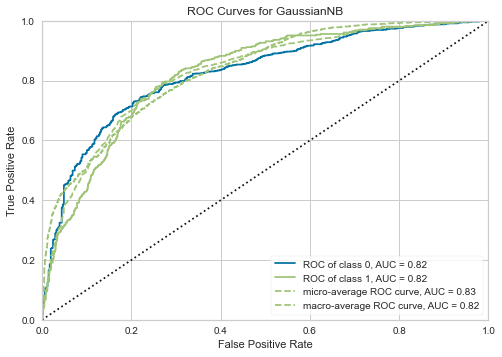

In [50]:
## AUC Plot¶

plot_model(nb, plot = 'auc')

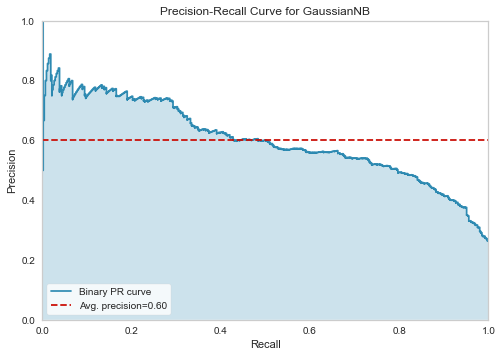

In [51]:
## Precision-Recall Curve¶
plot_model(nb, plot = 'pr')

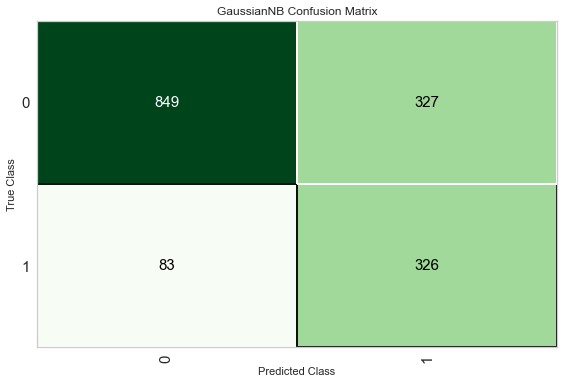

In [53]:
plot_model(nb, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

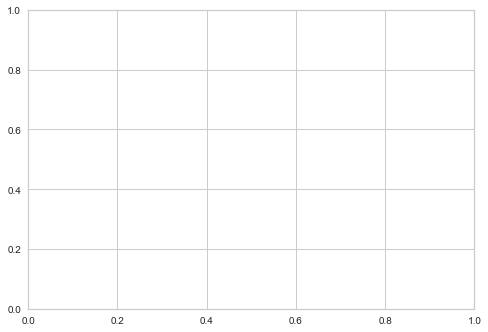

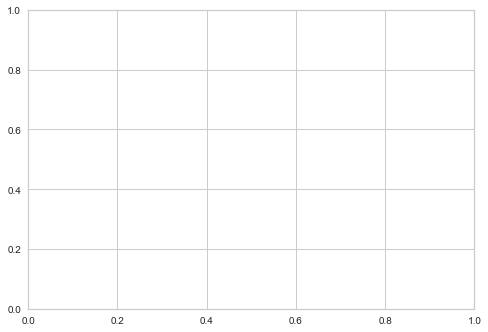

<Figure size 576x396 with 0 Axes>

In [204]:
evaluate_model(tuned_lg)

In [149]:
final_nb=finalize_model(tuned_lg)

In [150]:
predict_model(final_nb);

In [59]:
predictions = predict_model(nb, data=df_test)

In [63]:
predictions.Label

0       1
1       0
2       0
3       1
4       0
       ..
1756    1
1757    1
1758    0
1759    1
1760    1
Name: Label, Length: 1761, dtype: int32

In [65]:
df_send.Churn=predictions.Label
df_send.to_csv('Cabanillas1.csv', index=False)